In [10]:
import numpy as np
%matplotlib inline

import importlib
import sys
import pickle
from RodeoMethods import *
importlib.reload(sys.modules['RodeoMethods'])
from OutdatedMethods import search_spectrum, process_data
from qiskit import IBMQ
from qiskit.circuit import QuantumCircuit
from qiskit.compiler import transpile

General form of the 2-qubit Hamiltonian is
$$ H = xMod X_0 Z_1 + zMod Z_0 X_1 $$.

For testing, $xMod = 2.5$, $zMod = 1.5$ with $\lambda = -4, -1, 1, 4$. For actual runs, I use $xMod =
2.7395604855596334$ and $zMod = -0.6112156024794768$.

Qiskit initializes all qubits to 0 before the Hadamard gates. This has overlap with all eigenvalues.

I use $\sigma = 2, 7, 12$ for the first, second, and third pass respectively with three cycles of the rodeo algorithm per pass.

In [2]:
#eigenvalues of -3.350776088039110, -2.128344883080157, 2.128344883080156, 3.350776088039110]
mods = np.random.default_rng(42)

prodXMod = (mods.random() - 0.5) * 10
prodZMod = (mods.random() - 0.5) * 10
print(prodXMod)
print(prodZMod)

2.7395604855596334
-0.6112156024794768


In [6]:
print(provider.backends())

backendLagos = provider.get_backend('ibm_lagos')
backendNairobi = provider.get_backend('ibm_nairobi')
backendJakarta = provider.get_backend('ibm_nairobi')
# backendJakarta = provider.get_backend('ibmq_jakarta')
# jakarta also retired
# backendCasablanca = provider.get_backend('ibmq_jakarta')
# casablanca was retired
# backendQuito = provider.get_backend('ibmq_quito')
# backendBelem = provider.get_backend('ibmq_belem')
# quito and belem also retired
backendPerth = provider.get_backend('ibm_perth')
backendQASM = provider.get_backend('ibmq_qasm_simulator')
# backendStatevector = provider.get_backend('simulator_statevector')
backendStatevector = Aer.get_backend('aer_simulator')
backend = backendPerth
print(backend)

[<IBMBackend('ibm_perth')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_statevector')>, <IBMBackend('ibm_lagos')>]
<IBMBackend('ibm_perth')>


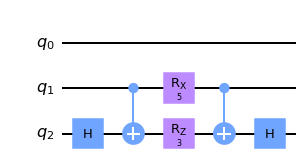

In [3]:
# make a test circuit and draw it
temp = QuantumCircuit(3)
temp.compose(make_cont_sys_circ(1, 2.5, 1.5), [0, 1, 2], inplace=True)
temp.draw('mpl')

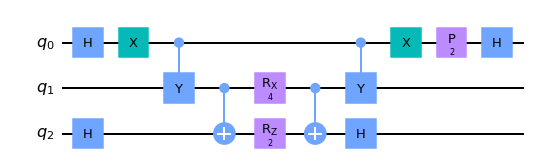

In [9]:
# make a circuit with 1 cycle of the rodeo algorithm
test = QuantumCircuit(3)
test.compose(make_cycle(1, 1, 2, 1), [0, 1, 2], inplace=True)
test.draw('mpl')

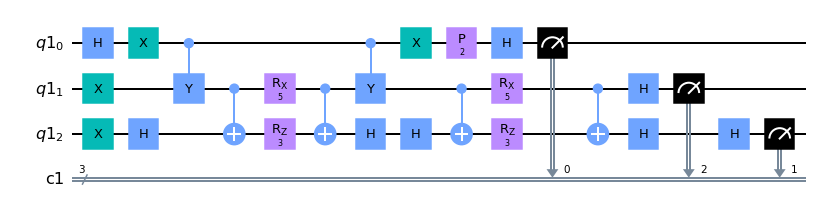

In [10]:
# make and draw a test circuit
cycleTest = run_rodeo([1], 1, 1, 2.5, 1.5, twoStateTime=1, measurements="xx")
cycleTest.draw('mpl')

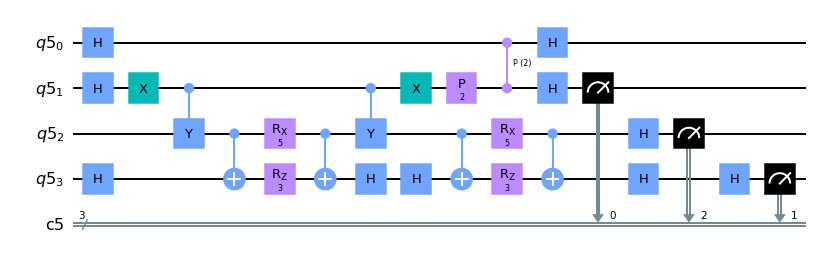

In [12]:
twoStateTest = run_two_state_rodeo([1], 1, 1, 2, 2.5, 1.5, 1, "xx")
twoStateTest.draw('mpl')

In [11]:
counts = [8, 4, 1, 1, 4, 7, 8, 7, 3, 2, 5, 9, 3, 1]
energies = [8, 4, 1, 1, 4, 7, 8, 7, 3, 2, 5, 9, 3, 1]
print(find_second_peaks(counts, energies, 3))

[8, 8, 9]


first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-4.0, -1.0, 2.0, 4.0, 5.0]
done w/ second pass
2
[[[-4.5, 88.44], [-4.45, 147.12], [-4.4, 117.24], [-4.35, 119.32], [-4.3, 143.84], [-4.25, 99.52], [-4.2, 114.64], [-4.15, 187.32], [-4.1, 82.8], [-4.05, 145.68], [-4.0, 168.24], [-3.95, 132.24], [-3.9, 169.0], [-3.85, 142.16], [-3.8, 79.76], [-3.75, 123.36], [-3.7, 120.84], [-3.65, 122.28], [-3.6, 145.12], [-3.55, 142.92], [-3.5, 88.2]], [[-1.5, 148.44], [-1.4500000000000002, 168.0], [-1.4, 160.12], [-1.35, 142.64], [-1.3, 119.52], [-1.25, 164.48], [-1.2000000000000002, 104.84], [-1.15, 160.64], [-1.1, 205.08], [-1.05, 457.28], [-1.0, 616.48], [-0.95, 415.48], [-0.9, 216.08], [-0.8500000000000001, 145.44], [-0.8, 127.8], [-0.75, 60.36], [-0.7, 129.16], [-0.65, 160.24], [-0.6, 92.6], [-0.55, 112.6], [-0.5, 144.76]], [[1.5, 147.04], [1.5499999999999998, 194.48], [1.6, 94.68], [1.65, 144.88], [1.7, 148.24], [1.75, 100.08], [1.7999999999999998, 172.2

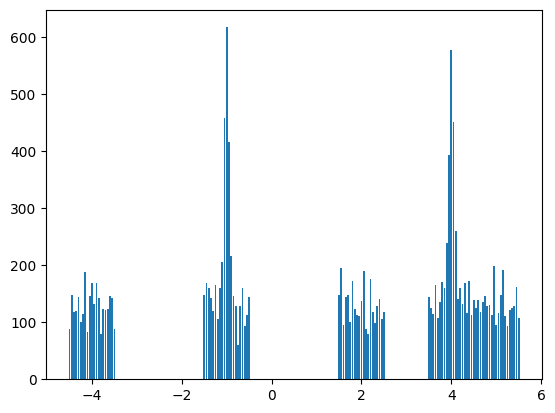

In [14]:
threeCycleOut = search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, 2.5, 1.5)
# print(threeCycleOut)
print(len(threeCycleOut[1][1]))
threeCycle2 = process_data(threeCycleOut, 1)
print(threeCycle2)

plot_scans(threeCycle2)

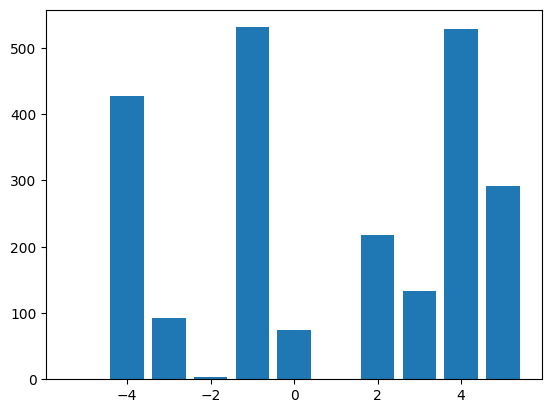

In [15]:
threeCycle1 = process_data(threeCycleOut, 0)
plot_scans(threeCycle1)

In [12]:
xmod1 = 1#.3359430644
zmod1 = 2.7803609513

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-2.0, 0.0, 2.0, 3.0, 4.0, 5.0]
done w/ second pass
[[[-2.5, 140.52], [-2.45, 151.12], [-2.4, 174.28], [-2.35, 101.96], [-2.3, 79.08], [-2.25, 131.04], [-2.2, 117.12], [-2.15, 127.08], [-2.1, 120.2], [-2.05, 114.64], [-2.0, 109.2], [-1.95, 113.96], [-1.9, 157.6], [-1.85, 154.84], [-1.8, 162.96], [-1.75, 205.48], [-1.7, 138.24], [-1.65, 119.72], [-1.6, 142.76], [-1.55, 175.4], [-1.5, 107.28]], [[-0.5, 79.0], [-0.45000000000000007, 71.92], [-0.4, 146.88], [-0.3500000000000001, 97.8], [-0.30000000000000004, 120.96], [-0.25, 127.6], [-0.20000000000000007, 100.96], [-0.15000000000000002, 112.64], [-0.10000000000000009, 119.56], [-0.050000000000000044, 118.64], [0.0, 126.76], [0.04999999999999999, 132.92], [0.09999999999999998, 104.52], [0.14999999999999997, 156.72], [0.19999999999999996, 111.4], [0.25, 66.16], [0.3, 110.8], [0.35, 149.96], [0.4, 114.0], [0.45, 112.44], [0.5, 124.92]], [[1.5, 120.52], 

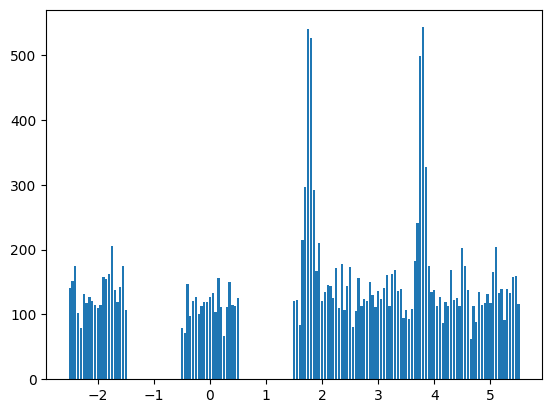

In [18]:
randomTest = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, xmod1, zmod1), 1)
print(randomTest)
plot_scans(randomTest)

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-5.0, -2.0, -1.0, 2.0, 3.0, 4.0, 5.0]


managedjob._async_submit:WARNING:2021-10-22 15:10:56,110: Job limit reached, waiting for job 61730cb5731fe680eebce245 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-22 15:13:57,821: Job limit reached, waiting for job 61730cb8976ff9693281c634 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-22 15:14:28,294: Job limit reached, waiting for job 61730cba976ff983b481c635 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-22 15:14:56,945: Job limit reached, waiting for job 61730cbc976ff9bfea81c636 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-22 15:15:29,063: Job limit reached, waiting for job 61730cbe706f42c99d432c01 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-22 15:15:59,461: Job limit reached, waiting for job 61730d73731fe6551cbce24a to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10

done w/ second pass
[[[-5.5, 129.12], [-5.45, 165.8], [-5.4, 127.2], [-5.35, 111.0], [-5.3, 124.8], [-5.25, 130.16], [-5.2, 144.2], [-5.15, 144.24], [-5.1, 171.32], [-5.05, 141.12], [-5.0, 156.4], [-4.95, 146.72], [-4.9, 127.2], [-4.85, 131.16], [-4.8, 120.8], [-4.75, 127.8], [-4.7, 153.56], [-4.65, 135.88], [-4.6, 134.36], [-4.55, 123.16], [-4.5, 144.32]], [[-2.5, 149.16], [-2.45, 147.88], [-2.4, 108.6], [-2.35, 149.48], [-2.3, 155.72], [-2.25, 114.36], [-2.2, 148.56], [-2.15, 147.96], [-2.1, 133.28], [-2.05, 172.88], [-2.0, 112.44], [-1.95, 113.52], [-1.9, 124.64], [-1.85, 134.32], [-1.8, 166.96], [-1.75, 185.36], [-1.7, 168.2], [-1.65, 139.52], [-1.6, 169.16], [-1.55, 105.76], [-1.5, 129.2]], [[-1.5, 138.36], [-1.4500000000000002, 135.2], [-1.4, 142.44], [-1.35, 132.88], [-1.3, 120.6], [-1.25, 151.44], [-1.2000000000000002, 165.28], [-1.15, 119.56], [-1.1, 154.08], [-1.05, 113.72], [-1.0, 153.44], [-0.95, 148.28], [-0.9, 130.16], [-0.8500000000000001, 160.4], [-0.8, 165.08], [-0.75,

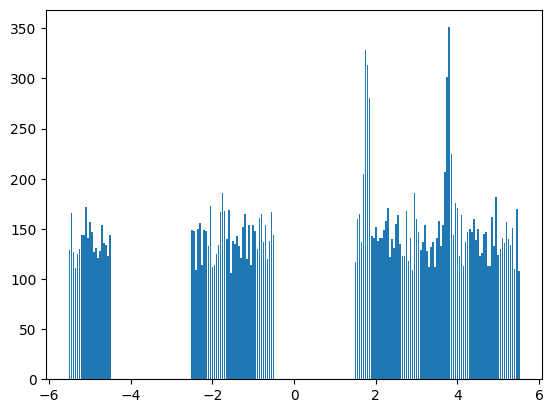

In [20]:
randomTestQ = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, xmod1, zmod1), 1)
print(randomTestQ)
plot_scans(randomTestQ)

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-4.0, -2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0]


managedjob._async_submit:WARNING:2021-10-24 00:52:39,735: Job limit reached, waiting for job 6174e68d731fe62419bcf1b5 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-24 00:53:14,194: Job limit reached, waiting for job 6174e68f706f426d59433b60 to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-24 00:53:43,384: Job limit reached, waiting for job 6174e6909e07dd733b57995b to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-24 00:54:11,400: Job limit reached, waiting for job 6174e6924829a00a7616262b to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-24 00:54:39,980: Job limit reached, waiting for job 6174e6946ab940b0d710ed9d to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10-24 00:55:08,083: Job limit reached, waiting for job 6174e6b69e07ddb09257995d to finish before submitting the next one.
managedjob._async_submit:WARNING:2021-10

done w/ second pass
[[[-4.5, 250.92], [-4.45, 243.44], [-4.4, 314.52], [-4.35, 259.6], [-4.3, 207.16], [-4.25, 302.76], [-4.2, 245.92], [-4.15, 274.44], [-4.1, 253.52], [-4.05, 262.0], [-4.0, 271.2], [-3.95, 251.2], [-3.9, 230.48], [-3.85, 270.8], [-3.8, 267.64], [-3.75, 298.68], [-3.7, 298.36], [-3.65, 244.88], [-3.6, 209.24], [-3.55, 329.04], [-3.5, 336.72]], [[-2.5, 273.36], [-2.45, 258.12], [-2.4, 312.72], [-2.35, 316.96], [-2.3, 323.68], [-2.25, 266.4], [-2.2, 261.72], [-2.15, 283.08], [-2.1, 297.24], [-2.05, 280.36], [-2.0, 241.08], [-1.95, 275.68], [-1.9, 243.16], [-1.85, 281.92], [-1.8, 287.96], [-1.75, 253.88], [-1.7, 226.16], [-1.65, 278.4], [-1.6, 282.16], [-1.55, 314.64], [-1.5, 262.12]], [[-1.5, 243.6], [-1.4500000000000002, 256.92], [-1.4, 333.04], [-1.35, 290.84], [-1.3, 301.04], [-1.25, 270.52], [-1.2000000000000002, 282.64], [-1.15, 264.28], [-1.1, 310.84], [-1.05, 277.12], [-1.0, 328.56], [-0.95, 308.56], [-0.9, 262.68], [-0.8500000000000001, 316.16], [-0.8, 243.32], 

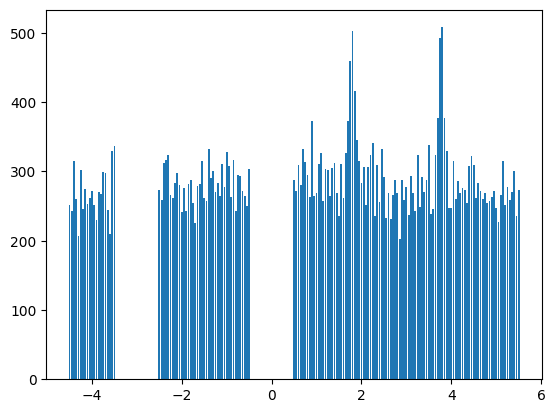

In [12]:
randomTestQ2 = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 2, 21, 25, xmod1, zmod1), 1)
print(randomTestQ2)
plot_scans(randomTestQ2)

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-5.0, -2.0, 0.0, 1.0, 2.0, 4.0]
done w/ second pass
[[[-5.5, 122.76], [-5.45, 143.56], [-5.4, 101.76], [-5.35, 159.52], [-5.3, 137.76], [-5.25, 123.12], [-5.2, 136.6], [-5.15, 147.0], [-5.1, 116.64], [-5.05, 156.88], [-5.0, 127.36], [-4.95, 125.4], [-4.9, 183.44], [-4.85, 139.28], [-4.8, 120.8], [-4.75, 123.8], [-4.7, 145.48], [-4.65, 96.32], [-4.6, 136.36], [-4.55, 108.64], [-4.5, 111.08]], [[-2.5, 112.84], [-2.45, 161.72], [-2.4, 121.68], [-2.35, 142.88], [-2.3, 106.36], [-2.25, 107.32], [-2.2, 135.8], [-2.15, 106.4], [-2.1, 172.64], [-2.05, 99.44], [-2.0, 143.36], [-1.95, 123.12], [-1.9, 147.0], [-1.85, 100.64], [-1.8, 164.6], [-1.75, 174.52], [-1.7, 159.52], [-1.65, 137.04], [-1.6, 134.88], [-1.55, 139.6], [-1.5, 143.48]], [[-0.5, 108.84], [-0.45000000000000007, 147.24], [-0.4, 120.4], [-0.3500000000000001, 149.56], [-0.30000000000000004, 110.28], [-0.25, 116.52], [-0.20000000000000007, 152.

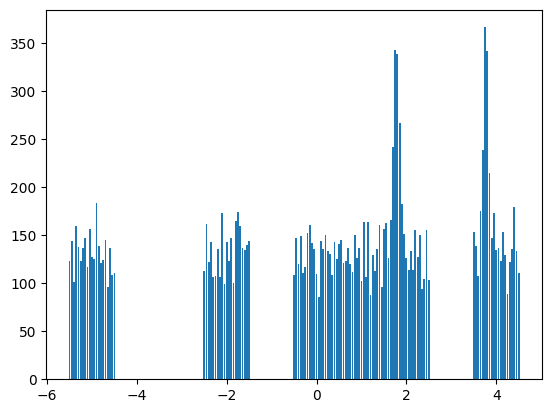

In [19]:
randomTestCasablanca = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, xmod1, zmod1), 1)
print(randomTestCasablanca)
plot_scans(randomTestCasablanca)

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-3.0, 1.0, 2.0, 3.0, 4.0, 5.0]
done w/ second pass
[[[-3.5, 166.32], [-3.45, 106.68], [-3.4, 131.28], [-3.35, 173.36], [-3.3, 144.44], [-3.25, 114.56], [-3.2, 136.72], [-3.15, 149.04], [-3.1, 111.2], [-3.05, 121.4], [-3.0, 104.16], [-2.95, 127.12], [-2.9, 136.4], [-2.85, 131.96], [-2.8, 113.72], [-2.75, 99.44], [-2.7, 132.6], [-2.65, 99.88], [-2.6, 126.16], [-2.55, 118.24], [-2.5, 128.72]], [[0.5, 141.76], [0.5499999999999999, 141.52], [0.6, 151.96], [0.6499999999999999, 122.8], [0.7, 163.12], [0.75, 110.72], [0.7999999999999999, 127.44], [0.85, 178.0], [0.8999999999999999, 117.36], [0.95, 150.72], [1.0, 104.96], [1.05, 129.52], [1.1, 137.04], [1.15, 153.0], [1.2, 166.84], [1.25, 134.92], [1.3, 177.8], [1.35, 118.92], [1.4, 121.4], [1.45, 133.76], [1.5, 140.04]], [[1.5, 124.32], [1.5499999999999998, 140.92], [1.6, 157.4], [1.65, 210.48], [1.7, 220.44], [1.75, 320.16], [1.7999999999999998, 347.8]

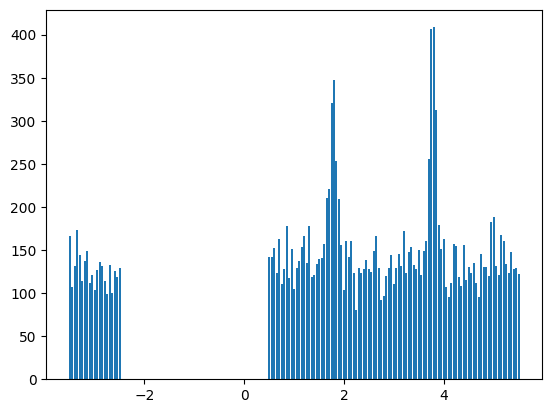

In [21]:
randomTestJakarta = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, xmod1, zmod1), 1)
print(randomTestJakarta)
plot_scans(randomTestJakarta)

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[2.0, 4.0]
done w/ second pass
[[<qiskit.providers.ibmq.managed.managedresults.ManagedResults object at 0x000002677D7C5340>, <qiskit.providers.ibmq.managed.managedresults.ManagedResults object at 0x000002677E781880>], [array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), [2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.45, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.35, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 

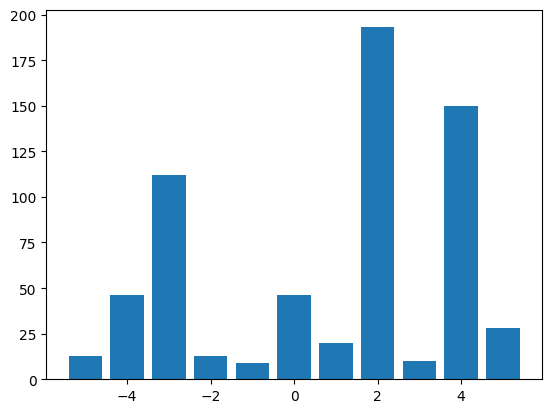

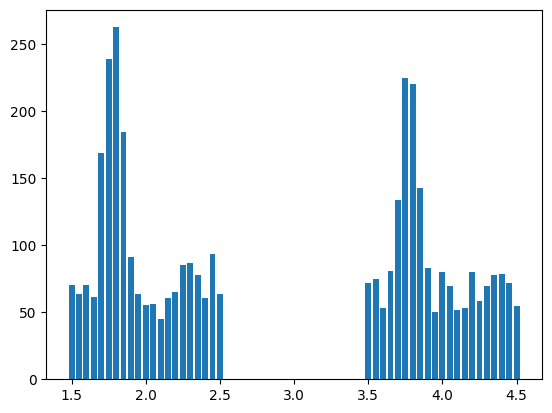

In [14]:
randomTestJakarta4Cycle = search_spectrum(np.linspace(-5, 5, 11), 150, 4, 21, 25, xmod1, zmod1)
randomTestJakarta4CycleInitial = process_data(randomTestJakarta4Cycle, 0)
randomTestJakarta4CycleFinal = process_data(randomTestJakarta4Cycle, 1)
print(randomTestJakarta4Cycle)
plot_scans(randomTestJakarta4CycleInitial)
plot_scans(randomTestJakarta4CycleFinal)

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
second pass w/ peaks:
[-2.0, -1.0, 2.0, 4.0]
done w/ second pass
[[<qiskit.providers.ibmq.managed.managedresults.ManagedResults object at 0x000002677EA93AC0>, <qiskit.providers.ibmq.managed.managedresults.ManagedResults object at 0x000002671AF84D60>], [array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.55, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65, -1.65

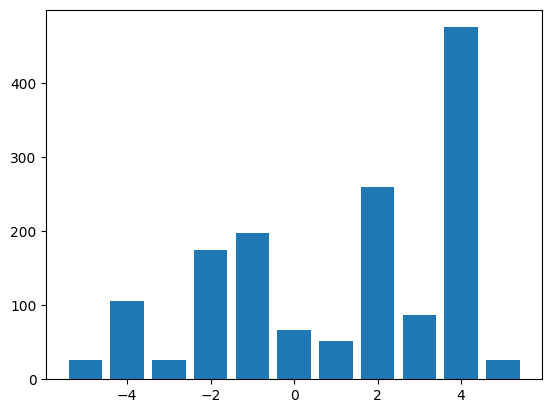

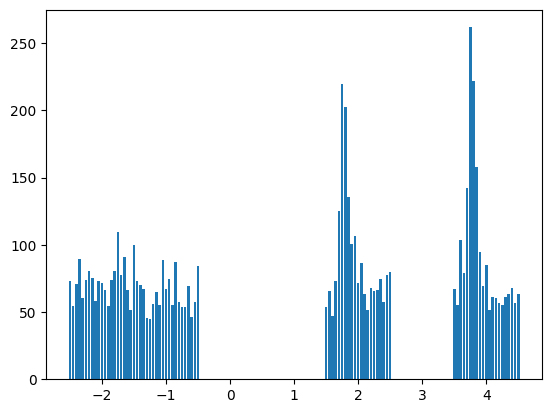

In [15]:
randomTestJakarta4Cycle2 = search_spectrum(np.linspace(-5, 5, 11), 150, 4, 21, 25, xmod1, zmod1)
randomTestJakarta4CycleInitial2 = process_data(randomTestJakarta4Cycle2, 0)
randomTestJakarta4CycleFinal2 = process_data(randomTestJakarta4Cycle2, 1)
print(randomTestJakarta4Cycle2)
plot_scans(randomTestJakarta4CycleInitial2)
plot_scans(randomTestJakarta4CycleFinal2)



In [24]:
fourRange = list(range(100))
fourRange[:] = [x / 25 for x in fourRange]

# fourJob = run_two_state(3, fourRange, 2.5, 1.5, -1, 4)
fourJob = jobManager.retrieve_job_set('eb379bacddad4a89a4efef94e987f0bd-1636140982352417', provider)
print(fourJob.job_set_id())
fourResults = fourJob.results()

C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\qiskit\providers\ibmq\managed\managedjobset.py:195: DeprecationWarning: The ``IBMQJob.qobj()`` method is deprecated and will be removed in a future release. You can now pass circuits to ``IBMQBackend.run()`` and use ``IBMQJob.circuits()``, ``IBMQJob.backend_options()``, and ``IBMQJob.header()`` to retrieve circuits, run configuration, and Qobj header, respectively.
  experiments_count=len(job.qobj().experiments),


eb379bacddad4a89a4efef94e987f0bd-1636140982352417


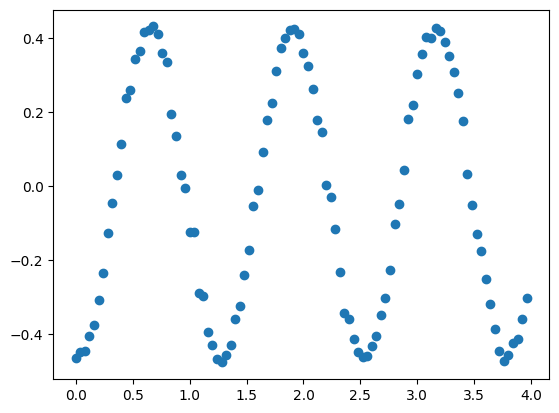

In [15]:
plt.scatter(fourRange, process_two_state(fourResults, "0000"))
plt.show()

In [28]:
fourJob2 = run_two_state(3, fourRange, 2.5, 1.5, -1, 4)
print(fourJob2.job_set_id())
fourResults2 = fourJob2.results()

14fc1ae7d2494aa3850c76af70c4d411-16376708627117543


[435, 412, 453, 409, 422, 443, 400, 407, 400, 430, 415, 405, 439, 410, 422, 425, 386, 419, 407, 392, 422, 452, 420, 420, 456, 432, 387, 430, 443, 415, 435, 403, 428, 417, 415, 439, 418, 424, 443, 407, 418, 426, 401, 419, 437, 421, 415, 409, 389, 414, 422, 412, 395, 431, 426, 417, 414, 455, 404, 413, 402, 405, 410, 439, 441, 395, 416, 429, 401, 410, 398, 400, 438, 407, 421, 427, 445, 428, 407, 425, 410, 404, 406, 414, 416, 409, 426, 399, 434, 418, 429, 414, 406, 412, 407, 441, 417, 429, 427, 418]


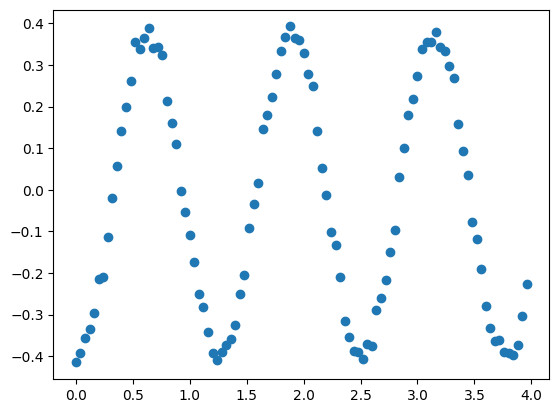

In [30]:
plt.scatter(fourRange, process_two_state(fourResults2, "0000"))
plt.show()

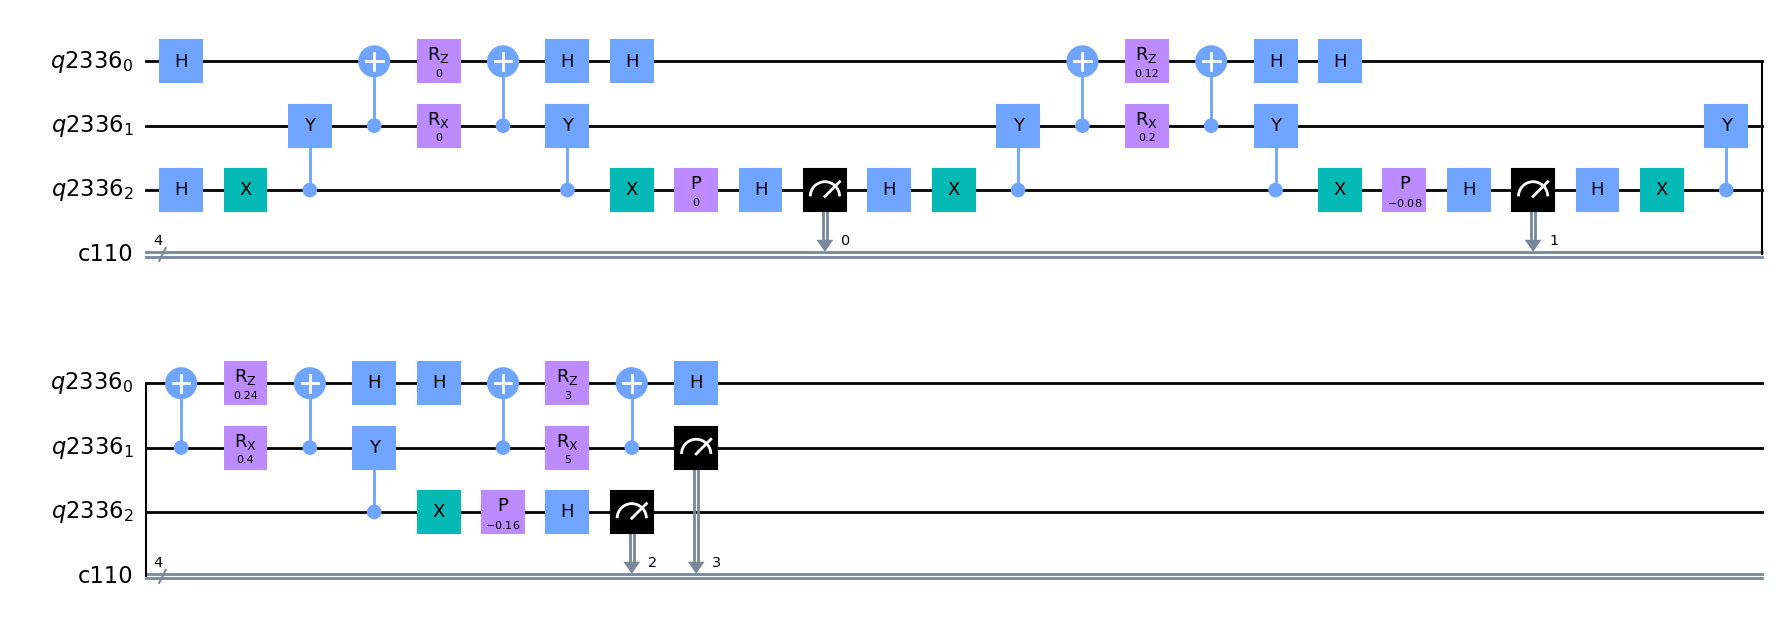

In [29]:
circ = run_rodeo(fourRange, 3, -1, 2.5, 1.5, 1)
circ.draw('mpl')

In [31]:
run1Range = list(range(100))
run1Range[:] = [x / 10 for x in run1Range]

# run1Job = run_two_state(3, run1Range, 2.5, 1.5, -1, 4, backendJakarta)
run1Job = jobManager.retrieve_job_set('0113f01d576942539ef3e6db95e581ca-1636258522398855', provider)
print(run1Job.job_set_id())
run1Results = run1Job.results()

C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\qiskit\providers\ibmq\managed\managedjobset.py:195: DeprecationWarning: The ``IBMQJob.qobj()`` method is deprecated and will be removed in a future release. You can now pass circuits to ``IBMQBackend.run()`` and use ``IBMQJob.circuits()``, ``IBMQJob.backend_options()``, and ``IBMQJob.header()`` to retrieve circuits, run configuration, and Qobj header, respectively.
  experiments_count=len(job.qobj().experiments),


0113f01d576942539ef3e6db95e581ca-1636258522398855


[-0.4662921348314607, -0.42911392405063287, -0.27142857142857146, -0.04225352112676062, 0.2071428571428571, 0.3619854721549637, 0.44063926940639275, 0.4282296650717703, 0.2780487804878049, 0.10563380281690146, -0.08392434988179664, -0.33114035087719296, -0.45707070707070707, -0.4634703196347032, -0.3443396226415094, -0.1772616136919315, 0.04952830188679247, 0.24634146341463414, 0.3886138613861386, 0.4250585480093677, 0.3906605922551253, 0.19194312796208532, -0.001187648456057011, -0.19844789356984482, -0.38809523809523805, -0.4578454332552693, -0.42396313364055305, -0.31861575178997614, -0.06896551724137934, 0.1244343891402715, 0.33521444695259595, 0.42700729927007297, 0.42592592592592593, 0.3089887640449438, 0.14186046511627912, -0.07894736842105265, -0.3009367681498829, -0.42874109263657956, -0.458128078817734, -0.3789346246973365, -0.19047619047619047, 0.04629629629629628, 0.2396061269146608, 0.3883720930232558, 0.44736842105263164, 0.41034482758620694, 0.22817955112219448, 0.004587

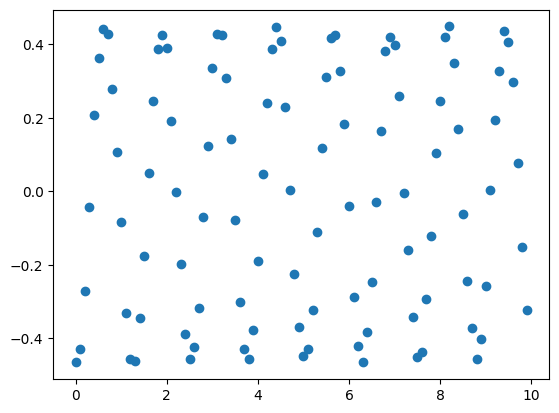

In [20]:
print(process_two_state(run1Results, "0000"))
plt.scatter(run1Range, process_two_state(run1Results, "0000"))
plt.show()

In [24]:
#run with hadamard on 1st qubit for time evolution; bad data
run2Range = list(range(100))
run2Range[:] = [x / 10 for x in run2Range]

run2Job = run_two_state(3, run2Range, 2.5, 1.5, 1, 4, backendJakarta)
print(run2Job.job_set_id())
run2Results = run2Job.results()

d453bb67ce3f45aa8ada23f0ddac1426-16362952522716198


[-0.46445497630331756, -0.4451371571072319, -0.3811369509043928, -0.2766990291262136, -0.19417475728155342, -0.06521739130434778, 0.057213930348258724, 0.18226600985221675, 0.3045977011494253, 0.408641975308642, 0.41183879093198994, 0.42091836734693877, 0.3987341772151899, 0.3163265306122449, 0.2153846153846154, 0.09114583333333329, -0.08968058968058967, -0.15159574468085102, -0.2931034482758621, -0.38916256157635465, -0.43041237113402064, -0.4362244897959183, -0.4363867684478372, -0.38601036269430056, -0.3075, -0.1633663366336634, -0.04707379134860046, 0.10447761194029856, 0.2021276595744681, 0.29104477611940305, 0.37760416666666663, 0.39973614775725597, 0.4285714285714286, 0.3850855745721271, 0.2777777777777778, 0.17766497461928932, 0.06973995271867614, -0.08695652173913049, -0.15263157894736845, -0.30052493438320205, -0.35121951219512193, -0.4251870324189526, -0.45663265306122447, -0.4151670951156813, -0.3307692307692308, -0.3112244897959183, -0.2132530120481928, -0.0808823529411765

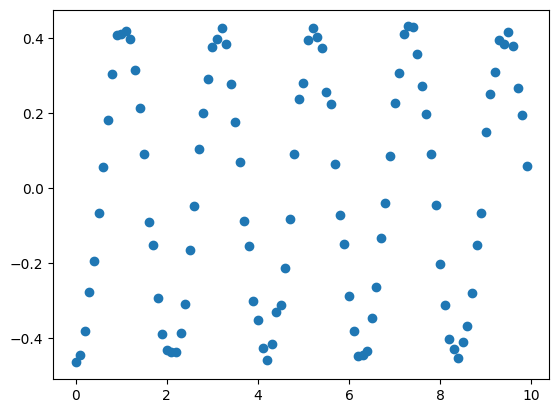

In [25]:
#run with hadamard on 1st qubit for time evolution; bad data
print(process_two_state(run2Results, "0000"))
plt.scatter(run2Range, process_two_state(run2Results, "0000"))
plt.show()

In [27]:
run3Range = list(range(100))
run3Range[:] = [x / 10 for x in run3Range]

# run3Job = run_two_state(3, run3Range, 2.5, 1.5, 1, 4, backendCasablanca)
run3Job = jobManager.retrieve_job_set('e68c0f9ee75a4bc688bd5773baa84cb5-1636295587006089', provider)
print(run3Job.job_set_id())
run3Results = run3Job.results()

e68c0f9ee75a4bc688bd5773baa84cb5-1636295587006089


[0.09999999999999998, -0.025925925925925908, -0.026717557251908386, -0.017985611510791366, -0.020270270270270285, -0.03076923076923077, 0.0, -0.05737704918032782, 0.04263565891472873, -0.011450381679389277, -0.06944444444444442, -0.02941176470588236, -0.0798319327731093, 0.02941176470588236, -0.05639097744360899, 0.017730496453900707, -0.07046979865771807, -0.0037037037037036535, -0.023809523809523836, -0.020325203252032575, -0.011811023622047223, -0.07241379310344831, -0.03125, -0.021739130434782594, -0.08461538461538465, -0.0703125, -0.05147058823529416, 0.02517985611510795, -0.020000000000000018, 0.0, 0.04014598540145986, 0.018796992481203034, 0.024590163934426257, -0.02941176470588236, -0.04014598540145986, -0.04744525547445255, -0.10483870967741937, -0.06060606060606055, 0.038461538461538436, 0.044378698224852076, 0.14347826086956525, -0.04471544715447151, 0.057046979865771785, -0.026717557251908386, 0.02892561983471076, -0.0234375, -0.011811023622047223, -0.0855855855855856, -0.0

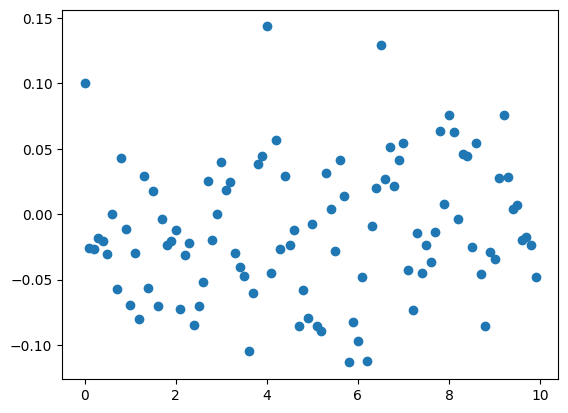

In [28]:
print(process_two_state(run3Results, "0000"))
plt.scatter(run3Range, process_two_state(run3Results, "0000"))
plt.show()

In [35]:
run4Job1Cycle = run_two_state(1, run1Range, 2.5, 1.5, -1, 4, backendJakarta)
print(run4Job1Cycle.job_set_id())
run41CycleResults = run4Job1Cycle.results()

run4Job2Cycle = run_two_state(2, run1Range, 2.5, 1.5, -1, 4, backendJakarta)
print(run4Job2Cycle.job_set_id())
run42CycleResults = run4Job2Cycle.results()

run4Job3Cycle = run_two_state(3, run1Range, 2.5, 1.5, -1, 4, backendJakarta)
print(run4Job3Cycle.job_set_id())
run43CycleResults = run4Job3Cycle.results()

run4Job4Cycle = run_two_state(4, run1Range, 2.5, 1.5, -1, 4, backendJakarta)
print(run4Job4Cycle.job_set_id())
run44CycleResults = run4Job4Cycle.results()

10faa0f1091d47449b460a910ca6f038-1636297440729653
8c64b883b944451599ff6287a1215316-1636297529660125
3eadafa198e248de891631d862105eb4-16362975861800056
175939a699f14141b8956b96c21e6ab5-16362976478864727


[-0.48080614203454897, -0.40751445086705207, -0.25183823529411764, -0.012670565302144277, 0.2288461538461539, 0.36837294332723947, 0.4343629343629344, 0.40858208955223885, 0.23567467652495377, 0.024436090225563922, -0.19739478957915835, -0.376425855513308, -0.46953405017921146, -0.44609665427509293, -0.31056466302367947, -0.12407407407407411, 0.11481481481481481, 0.30996309963099633, 0.428698752228164, 0.42871287128712876, 0.3349514563106796, 0.14165103189493433, -0.08674463937621835, -0.25806451612903225, -0.43398058252427185, -0.48378378378378384, -0.3809946714031972, -0.25529865125240847, -0.051656920077972734, 0.17041198501872665, 0.3798449612403101, 0.4444444444444444, 0.41204588910133844, 0.26717557251908397, 0.05555555555555558, -0.16666666666666663, -0.35144927536231885, -0.4595375722543352, -0.4467680608365019, -0.3176691729323309, -0.17463235294117652, 0.07090909090909092, 0.2657142857142857, 0.412621359223301, 0.43482309124767227, 0.34980237154150196, 0.13068181818181815, -0

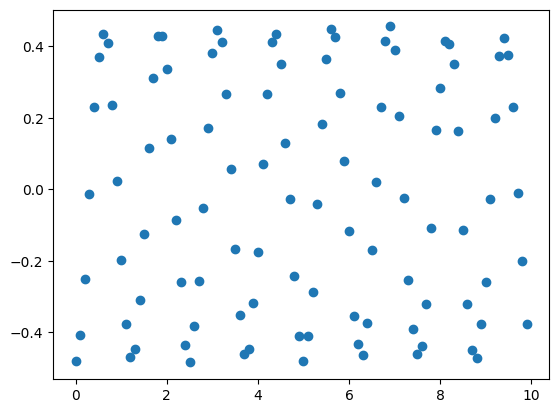

In [41]:
print(process_two_state(run41CycleResults, "00"))
plt.scatter(run3Range, process_two_state(run41CycleResults, "00"))
plt.show()

[-0.47836166924265844, -0.4296407185628742, -0.323170731707317, -0.09829059829059827, 0.12462006079027355, 0.2840579710144928, 0.4532428355957767, 0.4329268292682926, 0.34259259259259256, 0.09907120743034056, -0.09398496240601506, -0.31008902077151335, -0.4370314842578711, -0.4687034277198212, -0.3802395209580839, -0.2305389221556886, 0.008371385083713906, 0.2360482654600302, 0.3734567901234568, 0.44298921417565484, 0.3830409356725146, 0.23806078147612156, 0.038226299694189586, -0.17391304347826086, -0.3748137108792846, -0.46711509715994026, -0.4499241274658573, -0.31818181818181823, -0.11180124223602483, 0.09848484848484851, 0.31060606060606055, 0.420704845814978, 0.4323899371069182, 0.35053929121725735, 0.13931888544891644, -0.09661495063469672, -0.3130699088145896, -0.41594202898550725, -0.4709480122324159, -0.3923766816143498, -0.25113808801213966, -0.03055141579731746, 0.20044052863436124, 0.3533333333333333, 0.4420970266040689, 0.3973607038123167, 0.2436281859070465, 0.0598290598

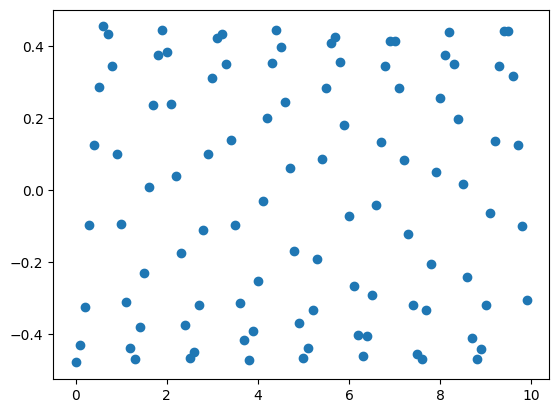

In [42]:
print(process_two_state(run42CycleResults, "000"))
plt.scatter(run3Range, process_two_state(run42CycleResults, "000"))
plt.show()

[553, 545, 541, 508, 508, 550, 521, 541, 550, 526, 553, 526, 526, 535, 554, 525, 508, 549, 521, 535, 537, 517, 571, 533, 537, 534, 555, 536, 564, 539, 546, 550, 558, 535, 527, 510, 535, 510, 506, 528, 560, 502, 527, 535, 532, 544, 548, 560, 529, 546, 542, 555, 520, 557, 549, 533, 543, 507, 535, 530, 546, 536, 560, 516, 510, 538, 551, 541, 525, 526, 564, 550, 557, 538, 522, 535, 554, 535, 547, 522, 541, 568, 516, 561, 542, 538, 550, 557, 568, 531, 515, 530, 538, 525, 539, 537, 545, 519, 535, 525]
[-0.4529837251356239, -0.41559633027522935, -0.27264325323475047, -0.017716535433070835, 0.17716535433070868, 0.3218181818181818, 0.41938579654510555, 0.422365988909427, 0.26727272727272733, 0.09695817490494296, -0.14918625678119346, -0.31558935361216733, -0.4505703422053232, -0.4495327102803738, -0.3592057761732852, -0.17047619047619045, 0.025590551181102345, 0.25045537340619306, 0.3963531669865643, 0.4214953271028037, 0.36592178770949724, 0.19632495164410058, 0.004378283712784592, -0.25046904

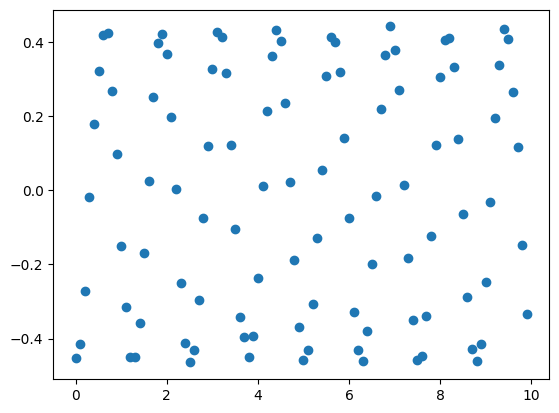

In [66]:
print(process_two_state(run43CycleResults, "0000"))
plt.scatter(run3Range, process_two_state(run43CycleResults, "0000"))
plt.show()

[410, 415, 404, 398, 394, 394, 416, 404, 387, 374, 389, 386, 414, 401, 387, 388, 408, 401, 402, 404, 388, 405, 360, 412, 377, 434, 394, 379, 348, 385, 367, 393, 410, 393, 346, 398, 399, 379, 389, 357, 391, 349, 399, 409, 378, 360, 370, 393, 389, 374, 398, 392, 382, 396, 394, 408, 371, 387, 417, 402, 384, 390, 420, 384, 406, 396, 404, 394, 415, 395, 426, 390, 415, 409, 355, 417, 397, 407, 389, 418, 389, 388, 409, 398, 388, 404, 399, 388, 426, 400, 387, 391, 425, 426, 407, 387, 376, 380, 403, 375]
[-0.4463414634146341, -0.4036144578313253, -0.2698019801980198, -0.042713567839196, 0.14467005076142134, 0.35279187817258884, 0.4326923076923077, 0.4331683168316831, 0.28552971576227393, 0.12834224598930485, -0.12724935732647813, -0.3341968911917098, -0.4371980676328503, -0.4625935162094763, -0.3630490956072352, -0.20876288659793818, -0.004901960784313708, 0.24812967581047382, 0.37810945273631846, 0.43811881188118806, 0.3608247422680413, 0.1987654320987654, 0.04722222222222225, -0.2233009708737

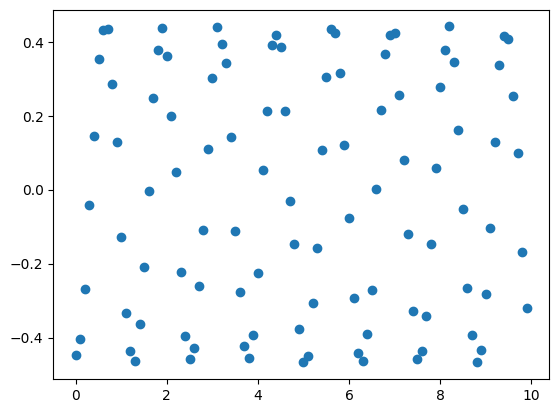

In [65]:
print(process_two_state(run44CycleResults, "00000"))
plt.scatter(run3Range, process_two_state(run44CycleResults, "00000"))
plt.show()

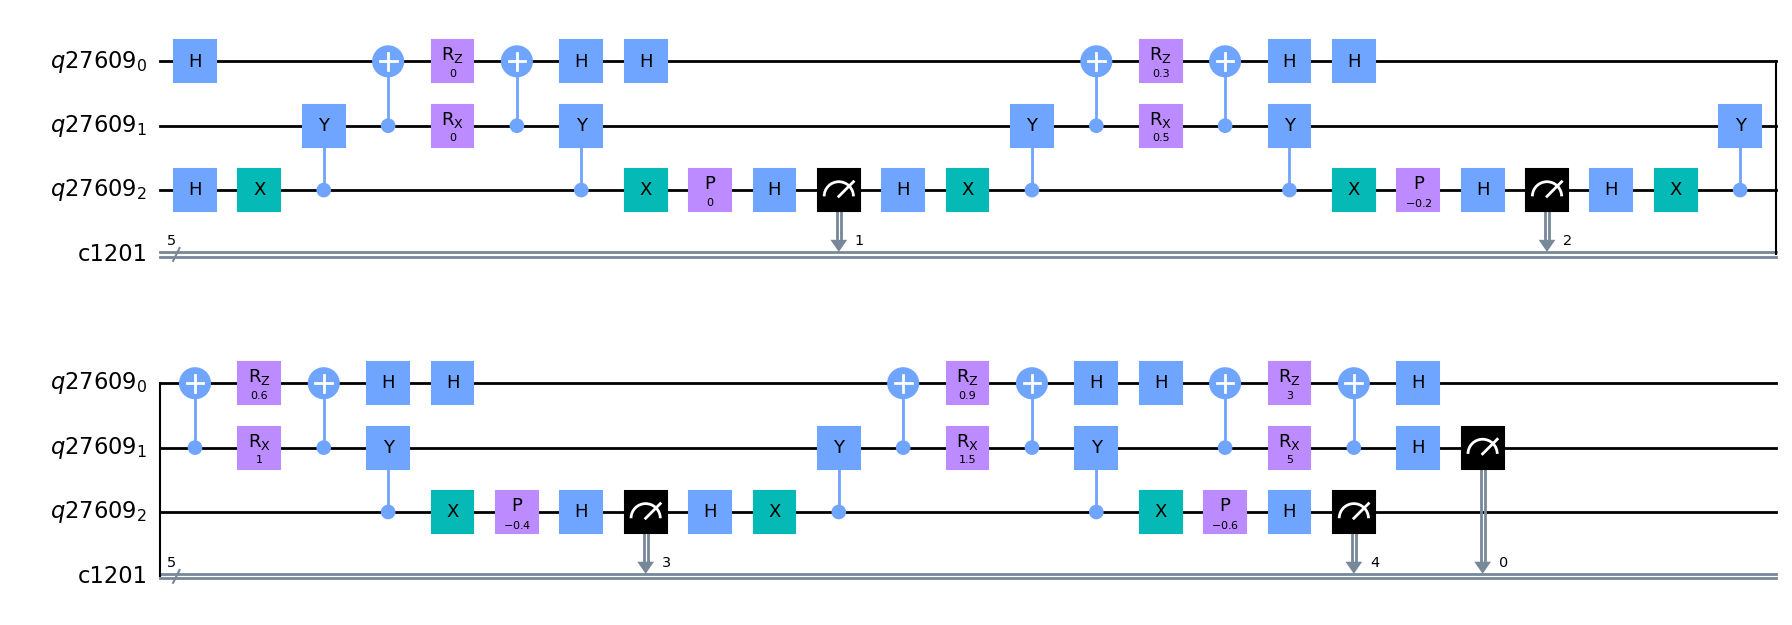

In [47]:
circ = run_rodeo(run1Range, 4, -1, 2.5, 1.5, 1, True)
circ.draw('mpl')

In [50]:
run5Job1Cycle = run_two_state(1, run1Range, 2.5, 1.5, -1, 4, backendJakarta, True)
print(run5Job1Cycle.job_set_id())
run51CycleResults = run5Job1Cycle.results()

run5Job2Cycle = run_two_state(2, run1Range, 2.5, 1.5, -1, 4, backendJakarta, True)
print(run5Job2Cycle.job_set_id())
run52CycleResults = run5Job2Cycle.results()

run5Job3Cycle = run_two_state(3, run1Range, 2.5, 1.5, -1, 4, backendJakarta, True)
print(run5Job3Cycle.job_set_id())
run53CycleResults = run5Job3Cycle.results()

run5Job4Cycle = run_two_state(4, run1Range, 2.5, 1.5, -1, 4, backendJakarta, True)
print(run5Job4Cycle.job_set_id())
run54CycleResults = run5Job4Cycle.results()

6eebabcf8686434984bec5f4fdefaefb-16362992230827897
065efc482ce64d96b6cdddb1ee1bf01b-16362992711233456
f9631d5b3172421e951eded7f1badca1-16362993287257757
649fdb61b0994502870d872a6ce321ec-16362993882994504


[0.005119453924914669, 0.03251318101933218, -0.03608247422680411, -0.01488616462346759, -0.017123287671232834, -0.002546689303904892, 0.002617801047120394, 0.0017605633802817156, -0.03344768439108059, -0.04878048780487809, -0.03658536585365857, -0.026936026936026924, -0.03637901861252113, -0.02447552447552448, -0.01832460732984298, 0.009031198686371117, 0.0, -0.028911564625850317, -0.027545909849749584, -0.028239202657807327, 0.014529914529914506, 0.03088480801335558, 0.01960784313725486, 0.06122448979591841, 0.038732394366197215, 0.04166666666666671, -0.03678929765886285, -0.037288135593220306, -0.010526315789473717, -0.00545454545454549, -0.03542009884678743, -0.027491408934707917, -0.04483925549915402, -0.058260869565217366, -0.042314335060449015, -0.0383275261324042, -0.011627906976744207, -0.004273504273504258, -0.04895104895104896, -0.012520868113522488, -0.006734006734006703, 0.032094594594594544, -0.02533783783783783, -0.0050167224080267525, -0.005785123966942196, -0.0017857142

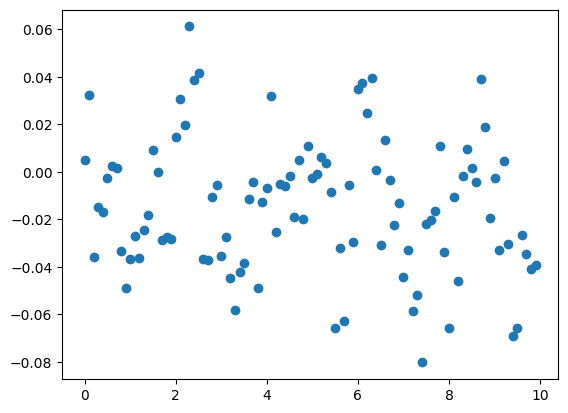

In [51]:
print(process_two_state(run51CycleResults, "00"))
plt.scatter(run3Range, process_two_state(run51CycleResults, "00"))
plt.show()

[0.05353535353535355, 0.007968127490039834, -0.014970059880239472, -0.030487804878048808, -0.022821576763485507, -0.038461538461538436, -0.06262833675564683, -0.12815126050420167, -0.10358565737051795, -0.1015625, -0.04697286012526092, -0.047945205479452024, -0.01807228915662651, -0.012096774193548376, 0.027542372881355942, -0.01650485436893201, 0.03526970954356845, 0.030571992110453666, 0.03725490196078429, 0.04811715481171544, 0.020467836257309968, 0.06972111553784857, 0.015686274509803894, 0.038775510204081653, -0.036821705426356544, -0.007128309572301372, -0.048387096774193505, -0.07113821138211385, -0.09748427672955973, -0.07287449392712553, -0.10912698412698407, -0.0805084745762712, -0.05214723926380371, -0.10236220472440949, -0.030271398747390377, -0.004166666666666652, 0.05397148676171082, 0.05060728744939269, 0.009960159362549792, 0.0353319057815846, 0.030655391120507414, 0.0426829268292683, 0.044910179640718556, 0.01491053677932408, 0.0019379844961240345, -0.05093555093555091

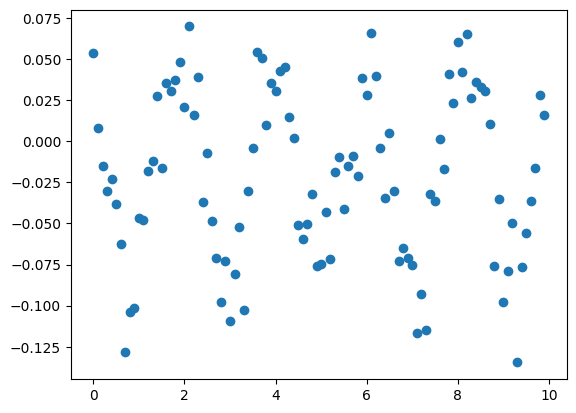

In [52]:
print(process_two_state(run52CycleResults, "000"))
plt.scatter(run3Range, process_two_state(run52CycleResults, "000"))
plt.show()

[-0.0611510791366906, -0.11554192229038851, -0.06762295081967218, -0.046534653465346576, -0.01984877126654061, -0.014227642276422814, 0.03280318091451287, 0.027450980392156876, 0.06673511293634496, 0.05601659751037347, 0.06470588235294117, 0.0506958250497018, 0.04705882352941179, -0.017525773195876337, -0.04417670682730923, -0.005725190839694694, -0.03620352250489234, -0.08522727272727271, -0.05769230769230771, -0.07058823529411762, -0.12523900573613767, -0.0741811175337187, -0.06995884773662553, -0.05900621118012417, -0.033742331288343586, -0.03200000000000003, -0.0031185031185031464, 0.014506769825918725, 0.08895705521472388, 0.07028112449799195, 0.02577319587628868, 0.013238289205702608, -0.019607843137254943, 0.05711422845691383, 0.014099783080260303, -0.007968127490039834, -0.02164948453608251, -0.017034068136272507, -0.06799999999999995, -0.0677799607072691, -0.08283433133732532, -0.06716417910447758, -0.05193482688391038, -0.09631147540983609, -0.044061302681992376, -0.058704453

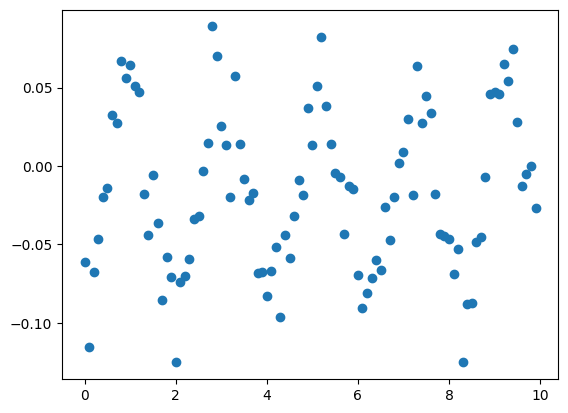

In [53]:
print(process_two_state(run53CycleResults, "0000"))
plt.scatter(run3Range, process_two_state(run53CycleResults, "0000"))
plt.show()

[402, 410, 366, 392, 394, 395, 403, 382, 390, 403, 410, 408, 394, 406, 372, 383, 397, 387, 398, 390, 396, 407, 396, 411, 440, 396, 357, 387, 370, 413, 412, 388, 395, 395, 375, 404, 385, 403, 398, 382, 404, 394, 391, 419, 389, 388, 387, 391, 399, 396, 423, 391, 396, 402, 412, 405, 411, 399, 403, 400, 402, 405, 404, 399, 396, 419, 408, 407, 384, 403, 401, 382, 395, 375, 384, 384, 385, 415, 409, 370, 402, 381, 405, 383, 391, 382, 357, 390, 373, 382, 387, 402, 372, 394, 394, 393, 423, 382, 412, 403]
[0.04726368159203978, 0.03170731707317073, 0.010928961748633892, 0.020408163265306145, -0.0025380710659898, -0.01898734177215189, -0.06079404466501237, -0.03926701570680624, -0.02051282051282055, -0.053349875930521096, -0.060975609756097615, -0.0759803921568627, -0.06598984771573602, -0.007389162561576401, -0.07526881720430112, 0.011749347258485643, -0.041561712846347576, 0.003875968992248069, 0.02010050251256279, 0.023076923076923023, -0.002525252525252486, -0.023341523341523396, 0.00252525252

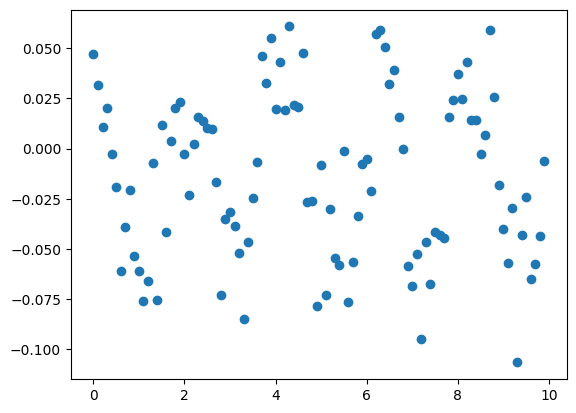

In [64]:
print(process_two_state(run54CycleResults, "00000"))
plt.scatter(run3Range, process_two_state(run54CycleResults, "00000"))
plt.show()

In [56]:
run6Job0Cycle = run_two_state(0, run1Range, 2.5, 1.5, -1, 4, backendJakarta, True)
print(run6Job0Cycle.job_set_id())
run60CycleResults = run6Job0Cycle.results()

9bf1de8f3e5847b0a50bea540ecffcaf-16362997508717487


[-0.0400390625, -0.0146484375, -0.0205078125, -0.0048828125, -0.0263671875, -0.046875, -0.044921875, -0.0595703125, -0.0048828125, -0.013671875, -0.0361328125, -0.001953125, -0.001953125, -0.01171875, 0.01171875, -0.005859375, -0.0068359375, 0.00390625, -0.02734375, -0.0087890625, -0.0234375, 0.0166015625, 0.0087890625, 0.005859375, 0.00390625, -0.0078125, -0.0068359375, -0.017578125, -0.0244140625, 0.0009765625, -0.013671875, -0.0517578125, -0.0224609375, -0.03125, -0.05078125, -0.01171875, -0.0166015625, -0.01953125, -0.0009765625, -0.037109375, -0.0390625, 0.001953125, -0.0234375, -0.0263671875, -0.0224609375, -0.0234375, -0.0205078125, -0.009765625, 0.00390625, -0.015625, -0.00390625, 0.0048828125, 0.017578125, 0.0068359375, 0.0302734375, -0.017578125, -0.05859375, -0.017578125, -0.005859375, 0.00390625, -0.0341796875, 0.009765625, -0.001953125, -0.005859375, -0.03515625, -0.0126953125, -0.0419921875, -0.048828125, -0.0029296875, -0.0166015625, -0.0439453125, -0.0478515625, -0.0390

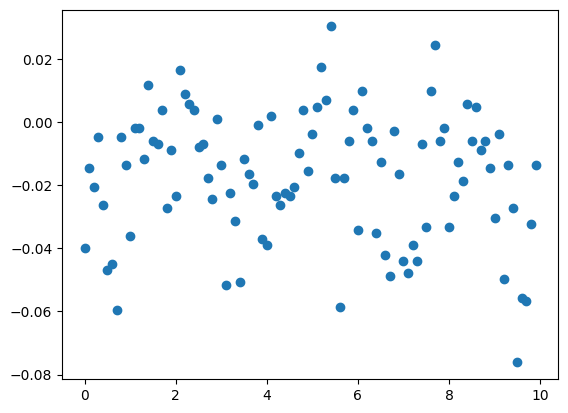

In [58]:
print(process_two_state(run60CycleResults, "0"))
plt.scatter(run3Range, process_two_state(run60CycleResults, "0"))
plt.show()

In [60]:
run7Job0Cycle = run_two_state(0, run1Range, 2.5, 1.5, -1, 4, backendJakarta, False)
print(run7Job0Cycle.job_set_id())
run70CycleResults = run7Job0Cycle.results()

df9cfcdb300a4a8091d59bba493df85e-16363002101311603


[1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]
[-0.490234375, -0.4306640625, -0.279296875, -0.0810546875, 0.1630859375, 0.3681640625, 0.4501953125, 0.4267578125, 0.2783203125, 0.0927734375, -0.166015625, -0.353515625, -0.4736328125, -0.46875, -0.3701171875, -0.1318359375, 0.0341796875, 0.244140625, 0.416015625, 0.46484375, 0.392578125, 0.1982421875, 0.0107421875, -0.232421875, -0.408203125, -0.4931640625, -0.443359375, -0.302734375, -0.0625, 

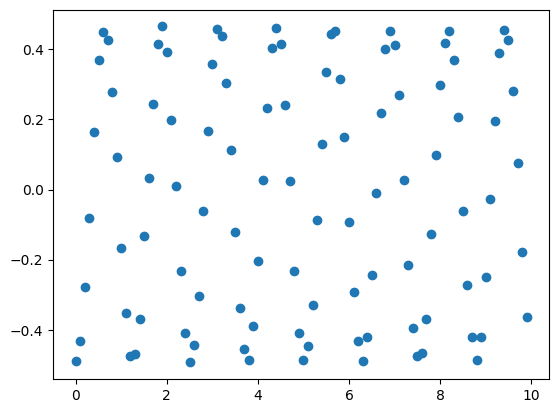

In [63]:
print(process_two_state(run70CycleResults, "0"))
plt.scatter(run3Range, process_two_state(run70CycleResults, "0"))
plt.show()

In [67]:
run8Job1Cycle = run_two_state(1, run1Range, 2.5, 1.5, 1, 4, backendJakarta, True)
print(run8Job1Cycle.job_set_id())
run81CycleResults = run8Job1Cycle.results()

run8Job2Cycle = run_two_state(2, run1Range, 2.5, 1.5, 1, 4, backendJakarta, True)
print(run8Job2Cycle.job_set_id())
run82CycleResults = run8Job2Cycle.results()

run8Job3Cycle = run_two_state(3, run1Range, 2.5, 1.5, 1, 4, backendJakarta, True)
print(run8Job3Cycle.job_set_id())
run83CycleResults = run8Job3Cycle.results()

run8Job4Cycle = run_two_state(4, run1Range, 2.5, 1.5, 1, 4, backendJakarta, True)
print(run8Job4Cycle.job_set_id())
run84CycleResults = run8Job4Cycle.results()

ab197678dab44fe0b9c8da1a7168d3ec-1636301096413536
313800d9d95d41379a3cacc7e727f980-16363013051810856
68f092d040de4053bfc10018533738fe-16363015443579872
88f34879305048b1a7169acb80131183-1636301739849467


[652, 672, 662, 648, 659, 640, 693, 644, 642, 674, 653, 657, 655, 659, 646, 666, 651, 628, 643, 653, 677, 663, 669, 662, 671, 673, 664, 682, 665, 672, 657, 656, 686, 643, 654, 658, 669, 666, 646, 674, 677, 643, 642, 660, 657, 640, 657, 647, 658, 665, 681, 673, 643, 666, 658, 647, 669, 667, 642, 652, 656, 670, 664, 679, 644, 669, 650, 668, 669, 629, 638, 673, 651, 669, 648, 652, 655, 669, 638, 650, 664, 665, 652, 645, 661, 668, 638, 682, 655, 670, 638, 682, 661, 627, 623, 669, 622, 666, 659, 649]
[-0.32515337423312884, -0.28869047619047616, -0.24773413897280971, -0.17901234567901236, -0.11001517450682852, -0.03281250000000002, 0.039682539682539736, 0.12267080745341616, 0.16043613707165114, 0.2537091988130564, 0.2718223583460949, 0.28234398782343995, 0.22366412213740453, 0.19802731411229135, 0.14241486068111453, 0.08858858858858862, -0.025345622119815614, -0.05095541401273884, -0.19673405909797825, -0.20903522205206737, -0.2991137370753324, -0.2737556561085973, -0.26681614349775784, -0.2

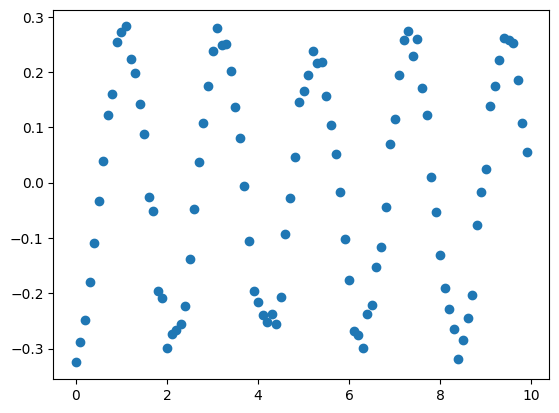

In [68]:
print(process_two_state(run81CycleResults, "00"))
plt.scatter(run3Range, process_two_state(run81CycleResults, "00"))
plt.show()

[387, 381, 373, 391, 403, 366, 366, 397, 350, 377, 411, 372, 398, 371, 366, 367, 336, 405, 367, 363, 355, 360, 384, 365, 374, 371, 369, 383, 367, 353, 388, 376, 380, 366, 366, 362, 392, 380, 384, 364, 368, 372, 374, 350, 361, 342, 400, 356, 384, 377, 371, 368, 369, 378, 373, 348, 408, 377, 399, 390, 353, 378, 377, 358, 361, 382, 373, 382, 382, 382, 386, 364, 360, 373, 358, 373, 375, 395, 364, 375, 361, 352, 365, 349, 374, 352, 390, 391, 382, 379, 405, 395, 384, 360, 371, 376, 408, 376, 362, 399]
[0.07881136950904397, 0.03280839895013121, -0.06836461126005366, -0.02941176470588236, -0.1253101736972705, -0.08743169398907102, -0.12295081967213117, -0.13476070528967254, -0.14857142857142858, -0.1816976127320955, -0.0888077858880778, -0.09139784946236562, -0.002512562814070307, -0.01752021563342321, 0.08469945355191255, 0.08583106267029972, 0.09226190476190477, 0.08518518518518522, 0.11580381471389645, 0.14462809917355376, 0.1507042253521127, 0.07222222222222222, 0.05989583333333329, 0.0013

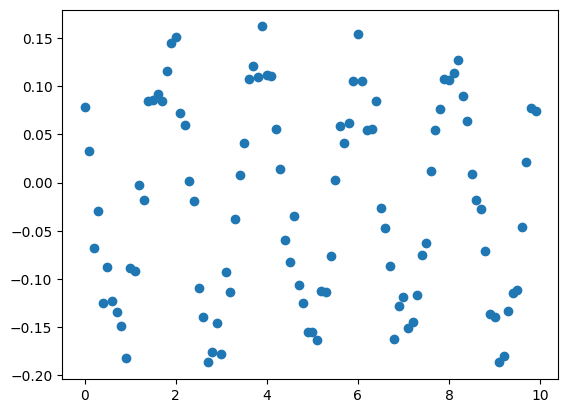

In [69]:
print(process_two_state(run82CycleResults, "000"))
plt.scatter(run3Range, process_two_state(run82CycleResults, "000"))
plt.show()

[286, 274, 277, 274, 283, 295, 263, 293, 308, 293, 272, 279, 304, 280, 258, 291, 280, 284, 285, 287, 294, 279, 268, 278, 251, 279, 313, 282, 295, 305, 272, 274, 285, 302, 286, 327, 281, 279, 296, 294, 302, 265, 277, 302, 301, 341, 288, 265, 257, 277, 284, 292, 246, 310, 271, 310, 287, 296, 295, 301, 273, 304, 295, 281, 289, 281, 292, 302, 292, 278, 313, 289, 309, 286, 315, 293, 280, 285, 294, 260, 286, 286, 297, 290, 271, 306, 270, 278, 286, 299, 284, 294, 253, 314, 302, 296, 292, 309, 295, 260]
[0.16083916083916083, 0.19343065693430653, 0.10649819494584836, 0.0948905109489051, -0.026501766784452263, -0.07288135593220335, -0.13498098859315588, -0.20989761092150172, -0.2727272727272727, -0.26791808873720135, -0.21691176470588236, -0.2060931899641577, -0.14802631578947367, -0.11428571428571432, -0.03100775193798455, 0.015463917525773169, 0.11071428571428574, 0.13028169014084504, 0.17368421052631577, 0.2073170731707317, 0.20068027210884354, 0.20967741935483872, 0.18283582089552233, 0.1043

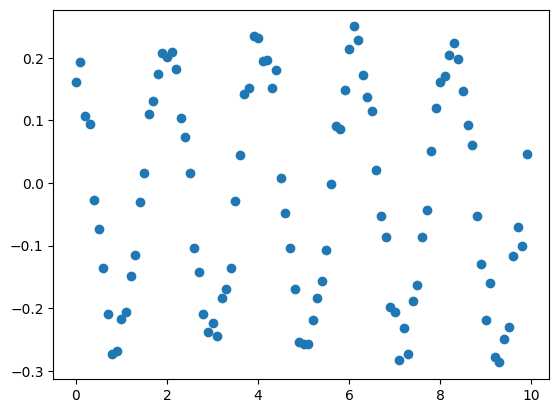

In [70]:
print(process_two_state(run83CycleResults, "0000"))
plt.scatter(run3Range, process_two_state(run83CycleResults, "0000"))
plt.show()

[286, 285, 278, 294, 273, 314, 308, 295, 277, 279, 282, 307, 309, 317, 313, 296, 303, 281, 312, 287, 267, 297, 289, 262, 295, 273, 273, 303, 293, 303, 305, 283, 291, 270, 313, 284, 311, 275, 278, 289, 287, 290, 285, 289, 270, 317, 313, 303, 273, 289, 283, 287, 298, 274, 290, 308, 305, 270, 295, 267, 321, 274, 277, 278, 291, 281, 280, 315, 281, 277, 297, 296, 307, 294, 299, 324, 324, 282, 285, 309, 284, 284, 290, 289, 297, 264, 277, 288, 286, 297, 289, 294, 285, 296, 298, 285, 283, 298, 266, 281]
[0.006993006993006978, 0.015789473684210548, 0.07194244604316546, 0.09183673469387754, 0.07142857142857142, 0.08917197452229297, 0.09415584415584413, 0.05254237288135591, -0.016245487364620947, 0.0017921146953405465, 0.007092198581560294, -0.021172638436482094, -0.1181229773462783, -0.08359621451104104, -0.07507987220447288, -0.10810810810810811, -0.05775577557755773, 0.008896797153024938, -0.022435897435897467, -0.06794425087108014, -0.028089887640449396, 0.06902356902356901, 0.043252595155709

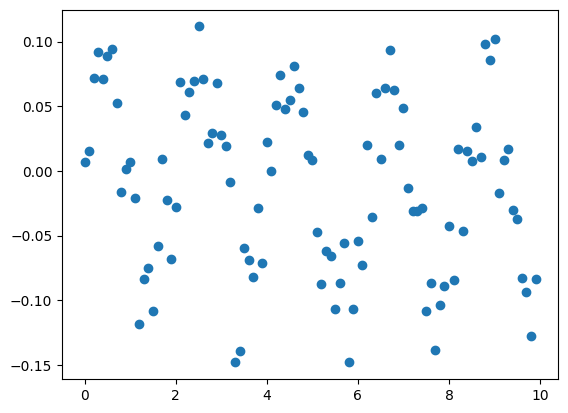

In [71]:
print(process_two_state(run84CycleResults, "00000"))
plt.scatter(run3Range, process_two_state(run84CycleResults, "00000"))
plt.show()

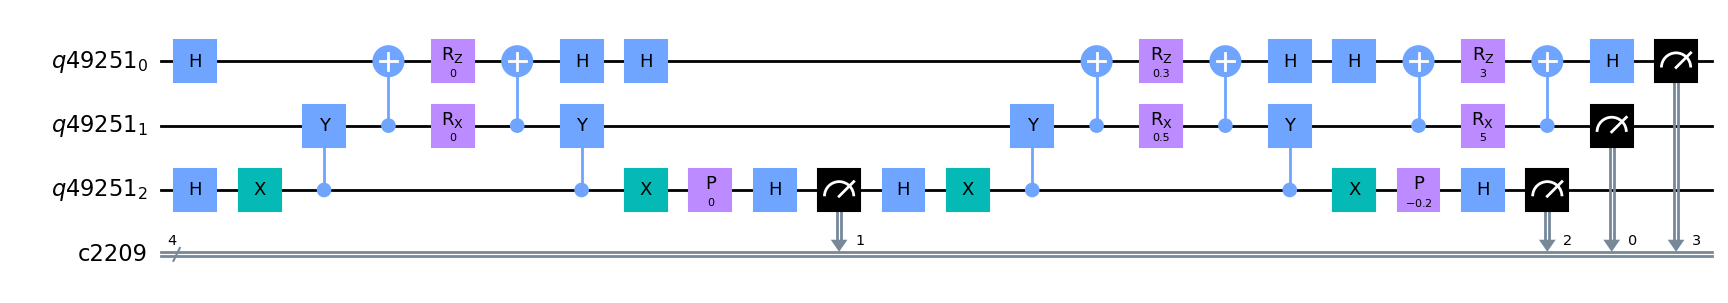

In [80]:
circ = run_rodeo(run1Range, 2, -1, 2.5, 1.5, 1, False, True)
circ.draw('mpl')

In [82]:
run9Job = run_two_state(3, run1Range, 2.5, 1.5, -1, 4, backendJakarta, False, True)
print(run9Job.job_set_id())
run9Results = run9Job.results()

cd7f8c76063642b7825e524d3abcaf21-16363457514317062


[640, 611, 608, 590, 586, 598, 612, 605, 588, 602, 605, 635, 599, 618, 590, 594, 583, 627, 588, 619, 606, 627, 576, 600, 619, 626, 609, 616, 636, 612, 614, 616, 629, 607, 631, 618, 599, 629, 632, 625, 605, 599, 604, 591, 582, 553, 583, 626, 599, 591, 609, 602, 610, 609, 608, 612, 586, 605, 619, 596, 595, 614, 633, 607, 616, 609, 599, 598, 598, 606, 616, 631, 589, 593, 586, 627, 608, 611, 631, 609, 617, 604, 626, 597, 623, 609, 591, 604, 612, 628, 619, 607, 605, 594, 613, 576, 620, 607, 601, 629]
[-0.5109374999999999, -0.46153846153846156, -0.2993421052631579, -0.07288135593220335, 0.18259385665529007, 0.37625418060200666, 0.4852941176470589, 0.4413223140495868, 0.3282312925170068, 0.207641196013289, -0.047933884297520546, -0.3181102362204724, -0.38397328881469106, -0.4692556634304207, -0.34915254237288135, -0.22558922558922556, -0.005145797598627766, 0.17703349282296643, 0.30102040816326525, 0.3570274636510501, 0.34818481848184824, 0.164274322169059, -0.05034722222222221, -0.1849999999

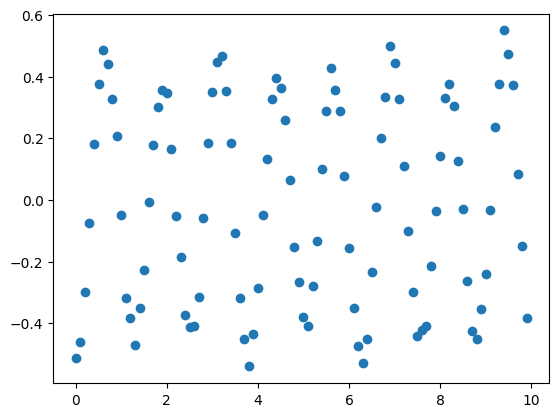

In [83]:
print(process_two_state_dual(run9Results, "00000"))
plt.scatter(run1Range, process_two_state_dual(run9Results, "00000"))
plt.show()

In [32]:
run9Job2 = run_two_state(3, run1Range, 2.5, 1.5, -1, 4, backendJakarta, False, True)
print(run9Job2.job_set_id())
run9Results2 = run9Job2.results()

2b92619e0f7c4cfaa574806f45fb48dd-16376710896343613


[445, 424, 445, 432, 466, 430, 439, 440, 448, 457, 448, 430, 435, 460, 439, 427, 467, 436, 452, 431, 458, 431, 424, 417, 440, 434, 432, 432, 415, 451, 433, 420, 436, 428, 437, 451, 443, 423, 414, 423, 456, 420, 446, 453, 418, 449, 439, 424, 412, 425, 434, 456, 443, 438, 481, 447, 435, 423, 413, 399, 423, 448, 467, 434, 431, 465, 456, 454, 440, 427, 470, 411, 445, 444, 440, 484, 440, 436, 444, 431, 452, 445, 452, 452, 432, 443, 415, 434, 458, 467, 453, 445, 471, 434, 434, 438, 430, 473, 435, 452]
[-0.4876404494382022, -0.5306603773584906, -0.3303370786516853, -0.12037037037037035, 0.1201716738197425, 0.32558139534883734, 0.48747152619589973, 0.4772727272727273, 0.3705357142857143, 0.19256017505470457, -0.024553571428571508, -0.17906976744186043, -0.3655172413793103, -0.417391304347826, -0.3644646924829158, -0.20843091334894615, -0.0770877944325482, 0.15825688073394495, 0.2588495575221238, 0.30626450116009285, 0.29694323144104795, 0.18561484918793503, -0.04952830188679247, -0.30215827338

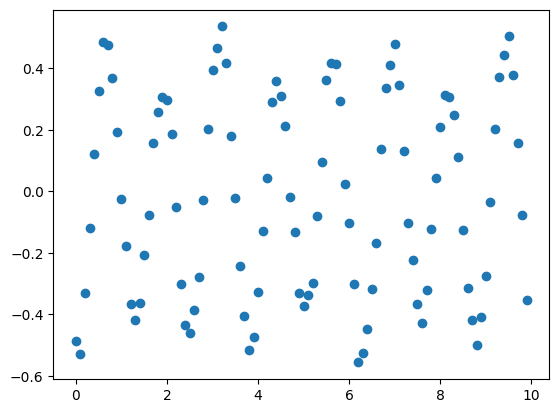

In [33]:
print(process_two_state_dual(run9Results2, "00000"))
plt.scatter(run1Range, process_two_state_dual(run9Results2, "00000"))
plt.show()

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
first run job id: 31b41e1412514a22bb2bd1c4c43fa237-16363468422700083
second pass w/ peaks:
[-4.0, -1.0, 0.0, 1.0, 3.0, 4.0]
first run job id: 8e8a8f99e91341b09c2312eb6298b6c1-16363471783677413
done w/ second pass


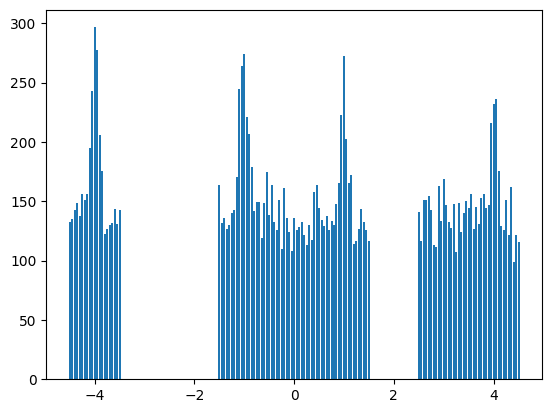

In [86]:
allOverlapSpec = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, 2.5, 1.5, backend=backendJakarta), 1)
plot_scans(allOverlapSpec)

In [87]:
print(allOverlapSpec)

[[[-4.5, 132.84], [-4.45, 135.12], [-4.4, 142.92], [-4.35, 148.2], [-4.3, 137.8], [-4.25, 155.88], [-4.2, 151.08], [-4.15, 156.24], [-4.1, 195.0], [-4.05, 243.0], [-4.0, 296.64], [-3.95, 277.48], [-3.9, 206.12], [-3.85, 175.52], [-3.8, 122.28], [-3.75, 126.32], [-3.7, 129.8], [-3.65, 132.12], [-3.6, 143.48], [-3.55, 131.0], [-3.5, 142.84]], [[-1.5, 163.6], [-1.4500000000000002, 131.72], [-1.4, 135.96], [-1.35, 126.44], [-1.3, 129.68], [-1.25, 140.32], [-1.2000000000000002, 143.0], [-1.15, 170.84], [-1.1, 244.24], [-1.05, 264.32], [-1.0, 274.32], [-0.95, 221.36], [-0.9, 206.56], [-0.8500000000000001, 179.0], [-0.8, 141.4], [-0.75, 149.32], [-0.7, 149.24], [-0.65, 118.88], [-0.6, 148.4], [-0.55, 174.92], [-0.5, 138.72]], [[-0.5, 129.12], [-0.45000000000000007, 163.72], [-0.4, 132.36], [-0.3500000000000001, 125.76], [-0.30000000000000004, 151.4], [-0.25, 109.52], [-0.20000000000000007, 161.6], [-0.15000000000000002, 136.32], [-0.10000000000000009, 123.84], [-0.050000000000000044, 108.2], 

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
first run job id: c88acbca74134a7e9655fd3c85d8e7c4-16363487498615456
second pass w/ peaks:
[-5.0, -4.0, -2.0, -1.0, 0.0, 1.0, 4.0, 5.0]
first run job id: 810ec2f0fbc04ea6988ad86c53b538e2-1636349046568691
done w/ second pass


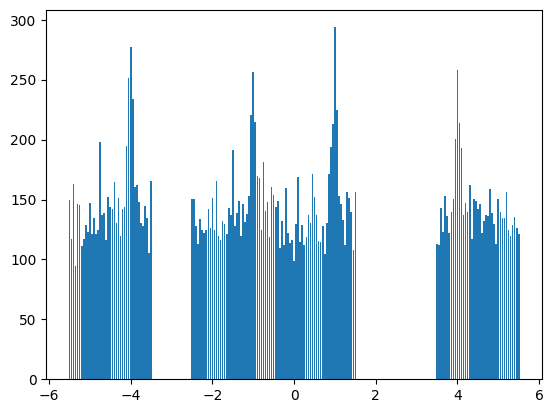

[[[-5.5, 149.36], [-5.45, 117.2], [-5.4, 162.64], [-5.35, 94.72], [-5.3, 146.2], [-5.25, 145.2], [-5.2, 111.6], [-5.15, 117.32], [-5.1, 128.76], [-5.05, 122.72], [-5.0, 147.32], [-4.95, 120.84], [-4.9, 134.32], [-4.85, 121.44], [-4.8, 124.96], [-4.75, 198.32], [-4.7, 136.84], [-4.65, 139.12], [-4.6, 116.56], [-4.55, 152.44], [-4.5, 122.88]], [[-4.5, 143.76], [-4.45, 142.4], [-4.4, 164.48], [-4.35, 130.2], [-4.3, 150.88], [-4.25, 119.68], [-4.2, 142.24], [-4.15, 144.04], [-4.1, 194.36], [-4.05, 251.4], [-4.0, 277.4], [-3.95, 234.16], [-3.9, 160.52], [-3.85, 162.4], [-3.8, 148.04], [-3.75, 130.44], [-3.7, 128.04], [-3.65, 144.88], [-3.6, 134.56], [-3.55, 105.44], [-3.5, 165.16]], [[-2.5, 150.12], [-2.45, 150.2], [-2.4, 128.16], [-2.35, 112.76], [-2.3, 133.8], [-2.25, 124.52], [-2.2, 121.92], [-2.15, 124.76], [-2.1, 141.68], [-2.05, 125.84], [-2.0, 151.16], [-1.95, 124.92], [-1.9, 165.48], [-1.85, 119.36], [-1.8, 116.44], [-1.75, 131.84], [-1.7, 129.76], [-1.65, 121.08], [-1.6, 142.88], [

In [88]:
allOverlapSpec2 = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, 2.5, 1.5, backend=backendJakarta), 1)
plot_scans(allOverlapSpec2)
print(allOverlapSpec2)

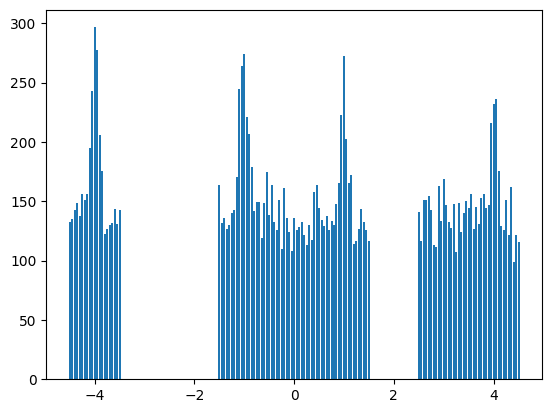

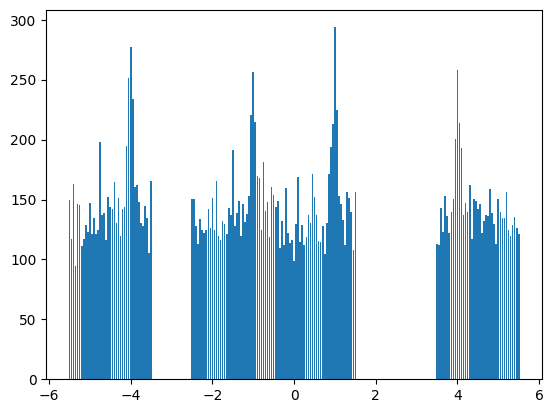

In [89]:
plot_scans(allOverlapSpec)
plot_scans(allOverlapSpec2)

In [90]:
run10Job0 = run_two_state(0, run1Range, 2.5, 1.5, -1, 4, backendJakarta, False, True)
print(run10Job0.job_set_id())
run10Results0 = run10Job0.results()

run10Job1 = run_two_state(1, run1Range, 2.5, 1.5, -1, 4, backendJakarta, False, True)
print(run10Job1.job_set_id())
run10Results1 = run10Job1.results()

run10Job2 = run_two_state(2, run1Range, 2.5, 1.5, -1, 4, backendJakarta, False, True)
print(run10Job2.job_set_id())
run10Results2 = run10Job2.results()

run10Job3 = run_two_state(3, run1Range, 2.5, 1.5, -1, 4, backendJakarta, False, True)
print(run10Job3.job_set_id())
run10Results3 = run10Job3.results()

run10Job4 = run_two_state(4, run1Range, 2.5, 1.5, -1, 4, backendJakarta, False, True)
print(run10Job4.job_set_id())
run10Results4 = run10Job4.results()

run10Job5 = run_two_state(5, run1Range, 2.5, 1.5, -1, 4, backendJakarta, False, True)
print(run10Job5.job_set_id())
run10Results5 = run10Job5.results()

print("done with all")

4d34aca733c143679372033076bbc461-16363775384703617
14a69ab302b44fa1a2fd369444fb3023-1636377671323529
9041c8fbcecc4f4dbf70c93aa32d4b43-16363778924858296
51d18d3b0f71434aaa1ebd03fcd8239b-16363780891270692
b64dcce65b184b7fa1262875209ad9de-16363782918624887
b9f45b9d0953462195ddb86f76b4d9af-16363784040733578
done with all


[1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]
[-0.9501953125, -0.8876953125, -0.681640625, -0.4111328125, -0.0625, 0.26171875, 0.501953125, 0.5771484375, 0.529296875, 0.4033203125, 0.2451171875, 0.0361328125, -0.1171875, -0.1669921875, -0.169921875, -0.123046875, -0.0166015625, 0.0244140625, 0.05859375, 0.01171875, -0.1162109375, -0.3115234375, -0.4609375, -0.630859375, -0.7216796875, -0.662109375, -0.5390625, -0.267578125, 0.150390625, 0.42

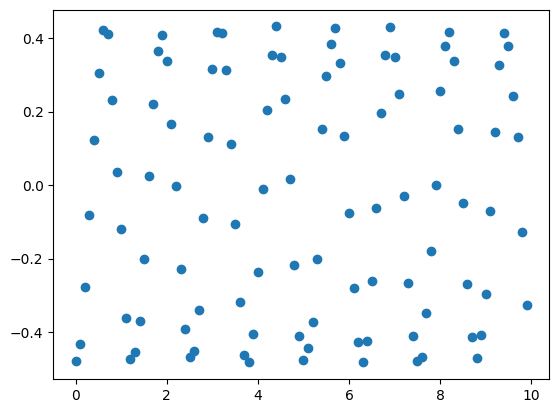

In [92]:
print(process_two_state_dual(run10Results0, "00"))
plt.scatter(run1Range, process_two_state(run10Results0, "00"))
plt.show()

[855, 857, 844, 855, 846, 870, 868, 860, 859, 875, 856, 872, 848, 856, 882, 876, 841, 869, 854, 859, 864, 834, 850, 864, 871, 852, 849, 855, 864, 842, 839, 871, 893, 873, 863, 866, 848, 852, 873, 848, 860, 869, 866, 870, 898, 865, 857, 866, 861, 850, 865, 861, 865, 868, 856, 818, 870, 856, 843, 854, 868, 881, 859, 879, 850, 845, 866, 872, 857, 841, 863, 858, 851, 865, 844, 860, 866, 854, 870, 863, 864, 868, 849, 851, 873, 849, 859, 849, 851, 834, 847, 874, 855, 851, 847, 855, 869, 855, 860, 853]
[-0.10643274853801166, -0.037339556592765444, 0.08530805687203802, 0.20701754385964913, 0.2836879432624114, 0.3275862068965517, 0.2569124423963134, 0.13372093023255816, -0.14435389988358557, -0.3931428571428571, -0.6565420560747663, -0.8165137614678899, -0.8761792452830189, -0.8014018691588785, -0.5419501133786848, -0.23972602739726023, 0.13793103448275865, 0.4131185270425777, 0.6241217798594847, 0.7217694994179278, 0.6435185185185185, 0.460431654676259, 0.23764705882352943, -0.0243055555555555

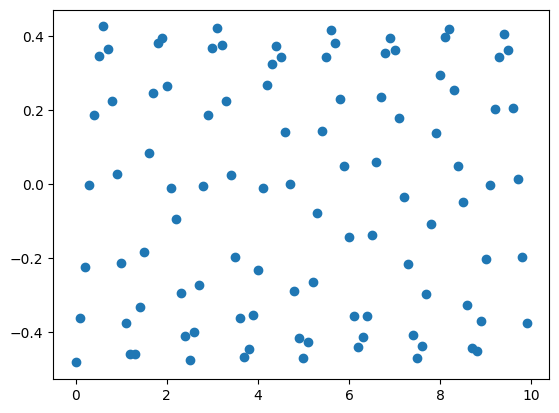

In [91]:
print(process_two_state_dual(run10Results1, "000"))
plt.scatter(run1Range, process_two_state(run10Results1, "000"))
plt.show()

[579, 581, 559, 523, 552, 553, 555, 582, 597, 554, 562, 559, 593, 553, 549, 570, 560, 566, 539, 530, 555, 550, 579, 570, 555, 597, 551, 540, 584, 564, 566, 592, 547, 547, 557, 546, 560, 569, 554, 558, 567, 565, 580, 561, 557, 535, 569, 562, 562, 550, 568, 569, 558, 552, 552, 550, 534, 548, 559, 546, 547, 581, 575, 519, 534, 520, 563, 546, 556, 574, 570, 588, 534, 558, 582, 528, 558, 530, 560, 565, 577, 544, 552, 559, 522, 566, 539, 543, 527, 576, 562, 545, 561, 564, 564, 562, 575, 574, 554, 543]
[-0.3367875647668394, -0.2512908777969018, -0.16994633273703041, 0.030592734225621476, 0.10144927536231885, 0.3309222423146474, 0.28828828828828834, 0.23024054982817876, 0.06030150753768837, -0.14259927797833938, -0.32562277580071175, -0.5456171735241503, -0.5699831365935919, -0.6292947558770343, -0.4954462659380693, -0.3070175438596492, -0.0357142857142857, 0.21378091872791516, 0.4452690166975881, 0.539622641509434, 0.4396396396396396, 0.3563636363636364, 0.17616580310880828, -0.09824561403508

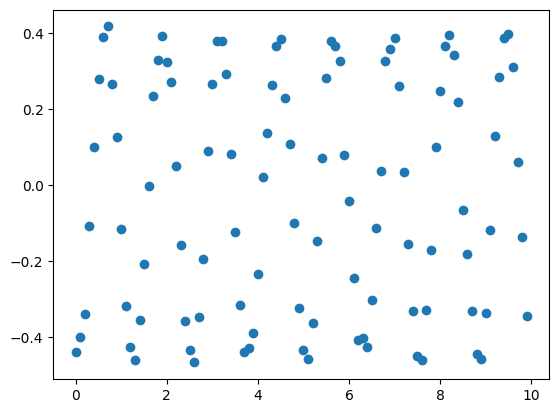

In [93]:
print(process_two_state_dual(run10Results2, "0000"))
plt.scatter(run1Range, process_two_state(run10Results2, "0000"))
plt.show()

[659, 605, 629, 630, 639, 648, 595, 629, 644, 653, 628, 641, 641, 623, 640, 638, 627, 610, 630, 643, 638, 615, 644, 634, 642, 615, 625, 649, 650, 656, 618, 634, 636, 619, 635, 618, 598, 600, 643, 647, 601, 627, 640, 664, 613, 627, 651, 648, 630, 629, 628, 634, 612, 643, 651, 637, 631, 650, 632, 640, 620, 634, 649, 600, 621, 646, 648, 634, 642, 644, 614, 658, 629, 631, 630, 650, 639, 638, 589, 610, 622, 626, 638, 645, 627, 633, 620, 623, 629, 631, 625, 642, 614, 650, 609, 640, 630, 639, 615, 612]
[-0.7223065250379364, -0.7388429752066116, -0.5659777424483308, -0.3396825396825396, -0.1408450704225352, 0.18055555555555558, 0.3445378151260504, 0.3926868044515104, 0.3555900621118012, 0.2679938744257274, 0.019108280254777066, -0.03744149765990645, -0.17472698907956324, -0.24558587479935784, -0.221875, -0.11442006269592475, 0.07177033492822962, 0.13770491803278684, 0.14761904761904765, 0.20684292379471225, 0.08307210031347956, -0.07642276422764227, -0.2515527950310559, -0.4700315457413249, -0

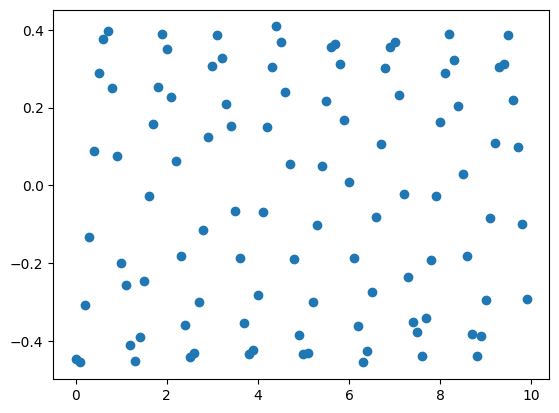

In [94]:
print(process_two_state_dual(run10Results3, "00000"))
plt.scatter(run1Range, process_two_state(run10Results3, "00000"))
plt.show()

[390, 325, 342, 358, 361, 352, 341, 345, 352, 311, 334, 357, 355, 361, 354, 365, 366, 349, 359, 338, 346, 340, 376, 355, 354, 347, 377, 353, 350, 366, 348, 349, 335, 352, 381, 373, 351, 345, 351, 346, 388, 353, 329, 323, 352, 336, 349, 353, 361, 343, 331, 363, 353, 320, 350, 330, 328, 364, 351, 330, 350, 353, 344, 362, 377, 372, 354, 344, 348, 362, 361, 355, 320, 355, 351, 335, 355, 354, 367, 355, 347, 356, 327, 336, 388, 351, 367, 307, 324, 363, 348, 342, 359, 361, 364, 360, 361, 354, 350, 346]
[-0.4743589743589743, -0.4523076923076924, -0.34795321637426907, -0.07541899441340782, 0.14127423822714688, 0.2755681818181819, 0.3812316715542522, 0.36811594202898557, 0.2414772727272728, 0.022508038585209028, -0.14071856287425144, -0.42296918767507, -0.4929577464788732, -0.5567867036011079, -0.4096045197740113, -0.32602739726027397, 0.0, 0.0515759312320917, 0.2339832869080779, 0.3017751479289942, 0.2774566473988439, 0.18529411764705883, -0.007978723404255261, -0.22535211267605626, -0.32203389

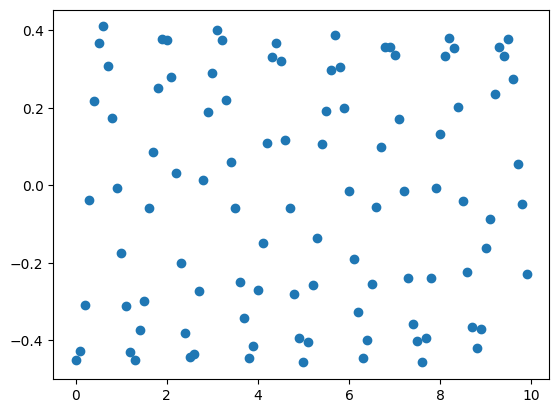

In [95]:
print(process_two_state_dual(run10Results4, "000000"))
plt.scatter(run1Range, process_two_state(run10Results4, "000000"))
plt.show()

[374, 340, 383, 351, 364, 376, 365, 372, 363, 399, 379, 370, 345, 388, 365, 378, 387, 358, 363, 379, 373, 371, 361, 373, 402, 356, 365, 338, 371, 365, 351, 357, 351, 342, 368, 393, 362, 384, 339, 365, 360, 376, 369, 348, 367, 383, 333, 365, 368, 375, 344, 368, 355, 386, 381, 356, 371, 353, 362, 383, 367, 386, 361, 372, 365, 346, 370, 397, 352, 334, 395, 341, 380, 374, 392, 344, 368, 372, 358, 373, 356, 367, 373, 361, 355, 350, 376, 369, 372, 385, 343, 370, 349, 377, 374, 361, 351, 349, 359, 353]
[-0.4919786096256684, -0.4088235294117647, -0.2898172323759792, -0.11396011396011396, 0.07142857142857148, 0.29255319148936165, 0.3671232876712329, 0.3978494623655914, 0.23691460055096425, 0.040100250626566414, -0.12928759894459096, -0.33513513513513504, -0.45507246376811594, -0.5025773195876289, -0.3616438356164384, -0.2063492063492064, -0.031007751937984523, 0.16480446927374304, 0.27548209366391185, 0.36939313984168864, 0.2654155495978553, 0.2048517520215634, -0.08033240997229918, -0.25469168

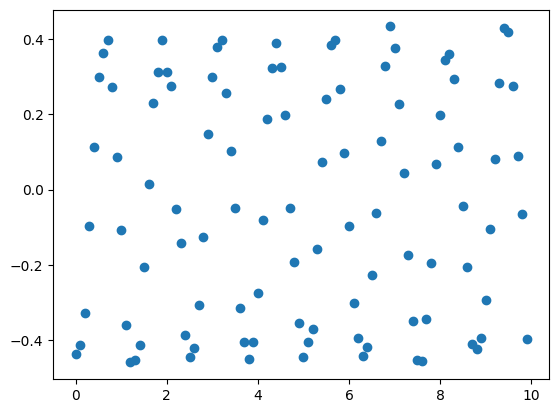

In [96]:
print(process_two_state_dual(run10Results5, "0000000"))
plt.scatter(run1Range, process_two_state(run10Results5, "0000000"))
plt.show()

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
first run job id: 37bf87c6569e40fb85bd1be1df538073-16365684427928798
second pass w/ peaks:
[-1.0, 4.0]
second run job id: 08ac3e41242c463e940fe5a4fa3e204f-16365685470063767
done w/ second pass
[[[-1.5, 29.96], [-1.4500000000000002, 33.4], [-1.4, 31.2], [-1.35, 32.08], [-1.3, 33.8], [-1.25, 31.72], [-1.2000000000000002, 27.12], [-1.15, 62.6], [-1.1, 52.96], [-1.05, 127.64], [-1.0, 204.52], [-0.95, 149.72], [-0.9, 61.56], [-0.8500000000000001, 33.32], [-0.8, 33.28], [-0.75, 43.44], [-0.7, 46.24], [-0.65, 32.6], [-0.6, 32.08], [-0.55, 35.68], [-0.5, 37.28]], [[3.5, 44.4], [3.55, 29.44], [3.6, 37.52], [3.65, 38.0], [3.7, 40.72], [3.75, 27.8], [3.8, 41.36], [3.85, 66.6], [3.9, 75.04], [3.95, 159.08], [4.0, 204.44], [4.05, 132.16], [4.1, 63.64], [4.15, 47.84], [4.2, 31.76], [4.25, 27.0], [4.3, 23.84], [4.35, 42.24], [4.4, 38.36], [4.45, 33.8], [4.5, 37.56]]]


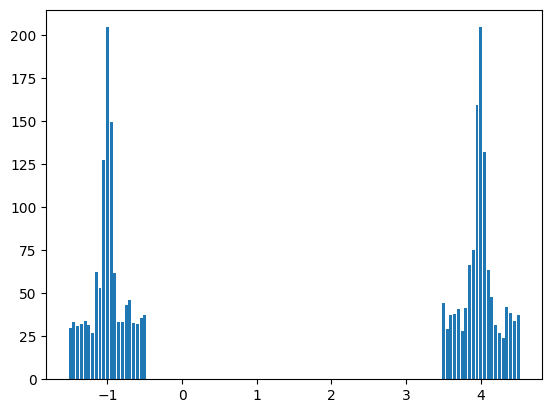

In [12]:
fiveCycle = process_data(search_spectrum(np.linspace(-5, 5, 11), 150, 5, 21, 25, 2.5, 1.5, backendJakarta), 1)
print(fiveCycle)
plot_scans(fiveCycle)

In [18]:
run11Job = run_two_state(3, run1Range, 2.5, 1.5, -1, 4, backendJakarta, False, True)
print(run11Job.job_set_id())
run11Results = run11Job.results()

08074e7d650643138c8a7aa7374a04bc-1637047850140956


[453, 434, 463, 459, 468, 465, 455, 461, 454, 483, 453, 476, 417, 425, 483, 474, 451, 461, 456, 453, 448, 457, 440, 475, 441, 467, 446, 462, 456, 449, 479, 419, 448, 453, 456, 466, 448, 470, 448, 455, 444, 461, 452, 434, 455, 443, 446, 423, 473, 440, 442, 453, 446, 465, 461, 455, 440, 465, 476, 449, 480, 477, 453, 460, 433, 455, 471, 425, 466, 438, 483, 460, 460, 464, 481, 434, 449, 446, 444, 435, 448, 449, 458, 469, 476, 444, 458, 412, 461, 459, 438, 444, 467, 427, 463, 447, 477, 452, 435, 441]
[-0.4922737306843266, -0.47695852534562216, -0.35205183585313177, -0.08932461873638342, 0.14316239316239313, 0.34838709677419355, 0.41538461538461546, 0.4490238611713666, 0.29074889867841414, 0.062111801242235976, -0.13024282560706402, -0.2836134453781513, -0.4100719424460432, -0.4376470588235294, -0.3581780538302277, -0.23839662447257381, 0.05321507760532154, 0.19956616052060736, 0.3157894736842105, 0.4370860927152318, 0.3258928571428571, 0.17067833698030632, -0.11818181818181817, -0.223157894

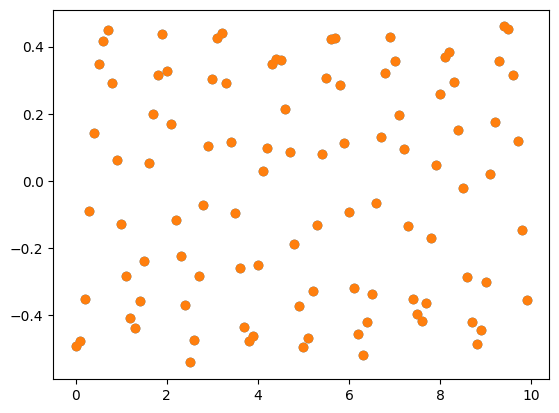

In [20]:
print(process_two_state_dual(run11Results, "00000"))
plt.scatter(run1Range, process_two_state_dual(run11Results, "00000"))
plt.show()

In [21]:
averageSuccesses = list()
times = []
state = '0'
for i in range(6):
    state = state + '0'
    times.append(np.random.normal(0, 7))
    circs = []
    for j in range(25):
        circs.append(run_rodeo(times, i+1, 4, 2.5, 1.5))
    circs = transpile(circs, backend=backend)
    job = jobManager.run(circs, backend=backend, shots=1024)
    temp = 0
    for k in range(25):
        temp = temp + deNone(job.results().get_counts(k).get(state))
    temp = temp/25
    averageSuccesses.append(temp)

In [23]:
#ids (1 up through 6):
#619361c01fe02d2167c3eea7
#619361e20fca888fe20f3768
#619361f9fc46da11868e725d
#619362169c22c3f1cee61a24
#6193622b0b2c1277b1701458
#619362444633b702742235fb

print(averageSuccesses)

[644.6, 493.56, 248.28, 113.24, 87.12, 58.16]


In [26]:
averageSuccesses2 = list()
times = []
state = '0'
for i in range(6):
    state = state + '0'
    times.append(np.random.normal(0, 7))
    circs = []
    for j in range(25):
        circs.append(run_rodeo(times, i+1, 2.5, 2.5, 1.5))
    circs = transpile(circs, backend=backend)
    job = jobManager.run(circs, backend=backend, shots=1024)
    print('job: ' + str(i+1))
    print(job.job_set_id())
    temp = 0
    for k in range(25):
        temp = temp + deNone(job.results().get_counts(k).get(state))
    temp = temp/25
    averageSuccesses2.append(temp)

job: 1
84711b3e56f449dc9579f7468b8cd6ff-163704998959255
job: 2
d0794fba60424ebdaf4575a1569e3dae-16370500839235544
job: 3
6861e92acce94ef4aa83a6b8a56e8d70-163705010457876
job: 4
2bd0c45e86ec44a0be02027147c33b4d-16370501583886209
job: 5
8dd98c6866524ff6878e0813ad6b2d8b-163705018155113
job: 6
61bff71621bb4a73a102602729c6df5a-16370502049272296


In [27]:
print(averageSuccesses2)

[508.24, 296.04, 52.28, 26.32, 12.88, 6.8]


In [15]:
averageSuccesses3 = list()
times = []
state = '0'

jobs = list()

jobs.append(jobManager.retrieve_job_set('0e56a8df1b224e4f92b18ca855104744-16372231264776256', provider))
jobs.append(jobManager.retrieve_job_set('63302af4e3fe40ad8910e2ae6d380c4c-16372249336051407', provider))
jobs.append(jobManager.retrieve_job_set('6395aa665d78446286670d913b9f2076-16372259460399103', provider))
jobs.append(jobManager.retrieve_job_set('48568c9bc07c4368bbb086b9a71854da-16372273729760299', provider))
jobs.append(jobManager.retrieve_job_set('9bec5554c33f4490af279f794b2cf32c-1637249220195117', provider))
jobs.append(jobManager.retrieve_job_set('9aa760561b164f5bbfb152b3b123877f-1637288351876479', provider))
for job in jobs:
    state = state + '0'
    temp = 0
    for k in range(1024):
        temp = temp + deNone(job.results().get_counts(k).get(state))
    temp = temp/1024
    averageSuccesses3.append(temp)
print("done with -1")
print(averageSuccesses3)

C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\qiskit\providers\ibmq\managed\managedjobset.py:195: DeprecationWarning: The ``IBMQJob.qobj()`` method is deprecated and will be removed in a future release. You can now pass circuits to ``IBMQBackend.run()`` and use ``IBMQJob.circuits()``, ``IBMQJob.backend_options()``, and ``IBMQJob.header()`` to retrieve circuits, run configuration, and Qobj header, respectively.
  experiments_count=len(job.qobj().experiments),


done with -1
[769.0498046875, 388.673828125, 230.4833984375, 143.1318359375, 81.1552734375, 50.728515625]


In [19]:
averageSuccesses4 = list()
state = '0'
times = []
jobs = []

jobs.append(jobManager.retrieve_job_set('2f09f0c2d91f4e4d8d34293b803058f0-16372961681295235', provider))
jobs.append(jobManager.retrieve_job_set('5745882d47ed46c88950fbdebe985d89-1637297152964673', provider))
jobs.append(jobManager.retrieve_job_set('13fe7dda81dd4920af4cba9b951fe01e-16372986311821728', provider))
jobs.append(jobManager.retrieve_job_set('316f45cc39844f6087174f1d2a70cdce-1637308077648706', provider))
jobs.append(jobManager.retrieve_job_set('eefbc8c1eebe4f2396018cb0f1859ea5-16373402735990226', provider))

for i in range(6):
    times.append(np.random.normal(0,7))

circs = []
for i in range(1024):
    circs.append(run_rodeo(times, 6, 4, 2.5, 1.5))
circs = transpile(circs, backend=backend)
print('running job 6')
jobs.append(jobManager.run(circs, backend=backend, shots=1024))
print(jobs[5].job_set_id())

for job in jobs:
    state = state + '0'
    temp = 0
    for k in range(1024):
        temp = temp + deNone(job.results().get_counts(k).get(state))
    temp = temp/1024
    averageSuccesses4.append(temp)
print("done with 4")
print(averageSuccesses4)

running job 6
e289686fe44042dc8750e6666404bd9d-16373468899512572
done with 4
[891.8251953125, 568.8251953125, 348.107421875, 289.6630859375, 226.8125, 53.8662109375]


In [20]:
averageSuccesses5 = list()
times = []
state = '0'
for i in range(6):
    state = state + '0'
    times.append(np.random.normal(0, 7))
    circs = []
    for j in range(1024):
        circs.append(run_rodeo(times, i+1, 0, 2.5, 1.5))
    circs = transpile(circs, backend=backend)
    job = jobManager.run(circs, backend=backend, shots=1024)
    print('job: ' + str(i+1))
    print(job.job_set_id())
    temp = 0
    for k in range(1024):
        temp = temp + deNone(job.results().get_counts(k).get(state))
    temp = temp/1024
    averageSuccesses5.append(temp)
print("done with 0")
print(averageSuccesses5)

job: 1
7831710778854a80bb8cf84f36a75c96-16373486879670866
job: 2
b2e99bcd3a1740e993143153c6c25cde-1637349096627502
job: 3
7d328130b1a04aaa8690f74905a5cbb1-1637349544450923
job: 4
d893b6f43e1d4e5bbee02ce8f33490db-16373500005959709
job: 5
bb57a7873d994b34a2973118c4e3f920-16373506392842793
job: 6
ddc50af8a8ab44b29cfa1d9155514a36-163735130612608
done with 0
[415.205078125, 212.314453125, 73.693359375, 46.95703125, 40.6181640625, 31.013671875]


In [23]:
averageSuccesses6 = list()
state = '0'
for i in range(6):
    state = state + '0'
    circs = []
    for j in range(1024):
        times = []
        for k in range(i+1):
            times.append(np.random.normal(0, 7))
        circs.append(run_rodeo(times, i+1, -1, 2.5, 1.5))
    circs = transpile(circs, backend=backend)
    job = jobManager.run(circs, backend=backend, shots=1024)
    print('job: ' + str(i+1))
    print(job.job_set_id())
    temp = 0
    for k in range(1024):
        temp = temp + deNone(job.results().get_counts(k).get(state))
    temp = temp/1024
    averageSuccesses6.append(temp)
print("done with -1")
print(averageSuccesses6)

job: 1
d32af01c8bdb41b092df59eb175e1202-16373548709481738
job: 2
1c9c816dcdb441c19c4e0ca2f3aee739-16373602292860484
job: 3
89f1bdec4b274668a05da21f136ab991-16373610499465005
job: 4
1ce0b0568905410eb435918cc4a055d4-16373616630527878
job: 5
cc5d9fb5edf34253973b0942c039ff4b-16373622403380942
job: 6
62660a8254ef4c8e9eab112e86b9dcea-16373628326656618
done with -1
[622.662109375, 390.0224609375, 257.7216796875, 160.5986328125, 111.056640625, 72.1279296875]


In [25]:
averageSuccesses7 = list()
state = '0'
for i in range(6):
    state = state + '0'
    circs = []
    for j in range(1024):
        times = []
        for k in range(i+1):
            times.append(np.random.normal(0, 7))
        circs.append(run_rodeo(times, i+1, 4, 2.5, 1.5))
    circs = transpile(circs, backend=backend)
    job = jobManager.run(circs, backend=backend, shots=1024)
    print('job: ' + str(i+1))
    print(job.job_set_id())
    temp = 0
    for k in range(1024):
        temp = temp + deNone(job.results().get_counts(k).get(state))
    temp = temp/1024
    averageSuccesses7.append(temp)
print("done with 4")
print(averageSuccesses7)

job: 1
b294b7e9c7f14f03914bb5899b24c23b-16373637220239582
job: 2
26b8ae8e91914229a33009e3da7f1f3b-16373641766786351
job: 3
47b365ec5b11449bafa915d601e8fbd2-1637364823196747
job: 4
93cca31966b74ab29b2932306024bf95-1637365345773776
job: 5
9ac35cc34c2644ef822901e9cd2e1f4f-16373658722231896
job: 6
af45901057e14777b472b415d34a2112-163736684298813
done with -1
[628.5693359375, 396.435546875, 255.62109375, 176.9287109375, 111.21484375, 79.01953125]
job: 1
9855b76ac46941038737a7831058032b-16373674865824015


C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\qiskit\providers\ibmq\managed\managedjob.py:202: UserWarning: Unable to retrieve job result for experiments 0-299, job ID=61983ebf68476d36708a754c: 'Unable to retrieve result for job 61983ebf68476d36708a754c. Job was cancelled.' 
  warnings.warn(
C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\qiskit\providers\ibmq\managed\managedjob.py:202: UserWarning: Unable to retrieve job result for experiments 300-599, job ID=61983ec2580e75335014e1ef: 'Unable to retrieve result for job 61983ec2580e75335014e1ef. Job was cancelled.' 
  warnings.warn(
C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\qiskit\providers\ibmq\managed\managedjob.py:202: UserWarning: Unable to retrieve job result for experiments 600-899, job ID=61983ec41db79f776fda279c: 'Unable to retrieve result for job 61983ec41db79f776fda279c. Job was cancelled.' 
  warnings.warn(
C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\qiskit\providers\ibmq\manag

IBMQManagedResultDataNotAvailable: 'Result data for experiment 0 is not available.'

In [26]:
averageSuccesses8 = list()
state = '0'
for i in range(6):
    state = state + '0'
    circs = []
    for j in range(1024):
        times = []
        for k in range(i+1):
            times.append(np.random.normal(0, 7))
        circs.append(run_rodeo(times, i+1, 0, 2.5, 1.5))
    circs = transpile(circs, backend=backend)
    job = jobManager.run(circs, backend=backend, shots=1024)
    print('job: ' + str(i+1))
    print(job.job_set_id())
    temp = 0
    for k in range(1024):
        temp = temp + deNone(job.results().get_counts(k).get(state))
    temp = temp/1024
    averageSuccesses8.append(temp)
print("done with 0")
print(averageSuccesses8)

job: 1
39bfe00bccae479aaf5c2033d95a9cb2-16373675615539527
job: 2
cbace1a099ac40b4ad9e2fa73931b06e-16373680348038223
job: 3
b0a161b4c8f54181b8edb7505a6f858a-16373685873499124
job: 4
894c6514321f435f87df842045b2ed97-16373694147475128
job: 5
bb37c346d5f64b79bee57729dbb5dea2-16373699478942406
job: 6
7e319ee32461410292bedcc692df2eac-1637370509874053
done with 0
[504.140625, 256.65234375, 129.1337890625, 67.4716796875, 36.1748046875, 15.171875]


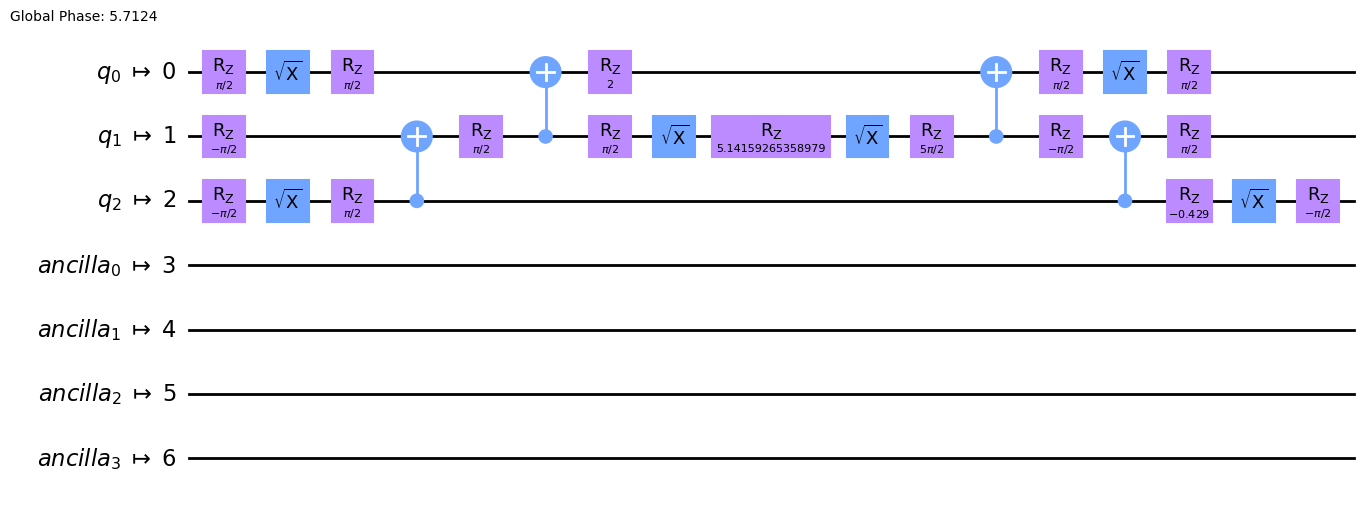

In [34]:
test = make_cycle(1, 1, 1, 1)
test = transpile(test, backend)
test.draw('mpl')

first pass w/ energies
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
first run job id: 3aebd200e01542d18ecb8e352a55a146-16382619247297838
second pass w/ peaks:
[-5.0, -3.0, -2.0, 2.0, 3.0, 5.0]
second run job id: 49ebab28efb84b6f89edd381e971dfae-1638262105883612
done w/ second pass


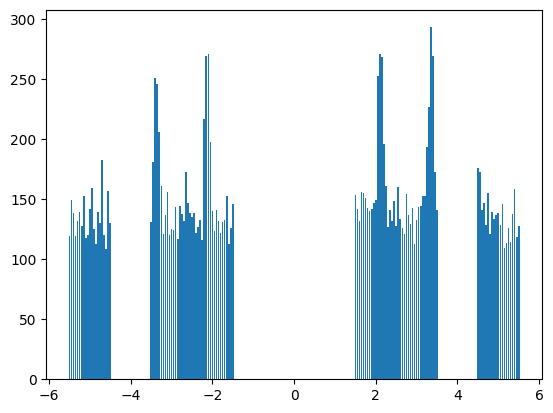

In [32]:
testRun = search_spectrum(np.linspace(-5, 5, 11), 150, 3, 21, 25, prodXMod, prodZMod, backendJakarta)
testRunData = process_data(testRun, 1)
plot_scans(testRunData)

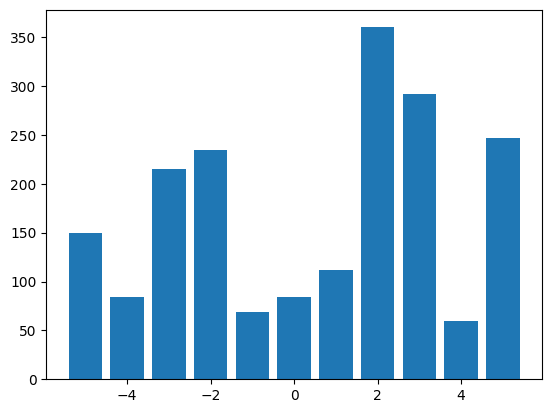

In [33]:
plot_scans(process_data(testRun, 0))

first run job id: 5e8afb88e25a4f008a3994d86e076619-16397677817660146
[-4.0, -1.0, 1.0, 4.0]
[-4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.8999999999999999, -0.7999999999999999, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4, 1.5, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5]
second run job id: e584f605d7944746852bcf552737536c-16397677951862838
[-4.0, -1.3, -1.0, 0.9, 3.8]
third run job id: f06a05b1569b4155a10deb23f0f63d33-1639767868285702
[array([  0.,  82.,  34.,  60., 162., 450., 137.,  11., 312., 104.,  13.,
       107., 151., 153.,  65., 203., 312., 260., 207.,  46., 235.,   1.,
         0., 213.,  97.,  40., 255., 241., 153., 144., 102., 253.,   1.,
       214., 229., 155., 259.,  53., 270., 137.,  92.,  15.,  37., 144.]), [-4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.8999999999999999, -0.7999999999999999, -0.7, -0.6, -

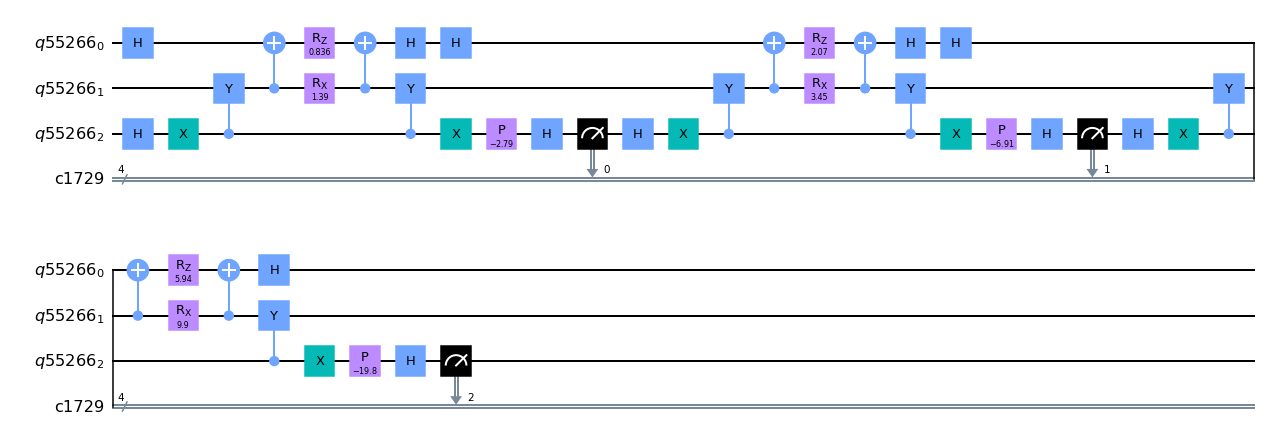

In [18]:
refactorTrial = identify_peaks(2.5, 1.5, 3, [11, 11, 11], 25, backend=backendQASM)
print(refactorTrial)

In [19]:
temp = list()
for i in range(len(refactorTrial[2])):
    temp.append([refactorTrial[4][i], refactorTrial[3][i]])
print(temp)

temp2 = list()
for i in range(len(refactorTrial[1])):
    temp2.append([refactorTrial[1][i], refactorTrial[0][i]])
print(temp2)

[[-4.25, 106.4], [-4.2, 120.56], [-4.15, 121.48], [-4.1, 127.44], [-4.05, 142.76]]
[[-4.5, 0.0], [-4.4, 82.0], [-4.3, 34.0], [-4.2, 60.0], [-4.1, 162.0], [-4.0, 450.0], [-3.9, 137.0], [-3.8, 11.0], [-3.7, 312.0], [-3.6, 104.0], [-3.5, 13.0], [-1.5, 107.0], [-1.4, 151.0], [-1.3, 153.0], [-1.2, 65.0], [-1.1, 203.0], [-1.0, 312.0], [-0.8999999999999999, 260.0], [-0.7999999999999999, 207.0], [-0.7, 46.0], [-0.6, 235.0], [-0.5, 1.0], [0.5, 0.0], [0.6, 213.0], [0.7, 97.0], [0.8, 40.0], [0.9, 255.0], [1.0, 241.0], [1.1, 153.0], [1.2000000000000002, 144.0], [1.3, 102.0], [1.4, 253.0], [1.5, 1.0], [3.5, 214.0], [3.6, 229.0], [3.7, 155.0], [3.8, 259.0], [3.9, 53.0], [4.0, 270.0], [4.1, 137.0], [4.2, 92.0], [4.3, 15.0], [4.4, 37.0], [4.5, 144.0]]


In [ ]:
scanNums = [11,11,11]
xMod = 2.5
zMod = 1.5
numCycles = 3
maxEigenvalue = 5 # replace this with an actual estimate from xMod and zMod
firstRunEnergies = np.linspace(-maxEigenvalue, maxEigenvalue, scanNums[0])
firstRunEnergies = firstRunEnergies.tolist()
firstStepSize = abs(firstRunEnergies[1]) - abs(firstRunEnergies[0])
print([firstRunEnergies])
firstPassCircuits = make_scan(xMod, zMod, numCycles, [firstRunEnergies], 2, 1)
firstPassCircuits[10].draw('mpl')

In [ ]:

# refactorRun2 = identify_peaks(prodXMod, prodZMod, 3, [11, 21, 21], 10, backend=backendCasablanca)
refactorRun2 = jobManager.retrieve_job_set('0a50aa415b37407abaf60474e516f83e-16420574305708077', provider)
# 41ead9adfb3748bd8001b1672674531b-16420571211654227
# cb3babe5f4df4294aa1448f160639762-1642057217872826
# 0a50aa415b37407abaf60474e516f83e-16420574305708077
print(refactorRun2)

first run job id: 41ead9adfb3748bd8001b1672674531b-16420571211654227
[-4.0, -1.0]
[-4.5, -4.45, -4.4, -4.35, -4.3, -4.25, -4.2, -4.15, -4.1, -4.05, -4.0, -3.95, -3.9, -3.85, -3.8, -3.75, -3.7, -3.65, -3.6, -3.55, -3.5, -1.5, -1.45, -1.4, -1.35, -1.3, -1.25, -1.2, -1.15, -1.1, -1.05, -1.0, -0.95, -0.8999999999999999, -0.85, -0.7999999999999999, -0.75, -0.7, -0.6499999999999999, -0.6, -0.5499999999999999, -0.5]
second run job id: cb3babe5f4df4294aa1448f160639762-1642057217872826
[-4.0, -3.7, -1.4, -0.95]
third run job id: 0a50aa415b37407abaf60474e516f83e-16420574305708077


first run job id: be33ba3e44c44ff7831a2f4c7affad6e-16429011161819072
[-4.0, -1.0, 1.0, 2.0, 4.0]
[-4.5, -4.45, -4.4, -4.35, -4.3, -4.25, -4.2, -4.15, -4.1, -4.05, -4.0, -3.95, -3.9, -3.85, -3.8, -3.75, -3.7, -3.65, -3.6, -3.55, -1.5, -1.45, -1.4, -1.35, -1.3, -1.25, -1.2, -1.15, -1.1, -1.05, -1.0, -0.95, -0.8999999999999999, -0.85, -0.7999999999999999, -0.75, -0.7, -0.6499999999999999, -0.6, -0.5499999999999999, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.8500000000000001, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4, 1.4500000000000002, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 3.5, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45]
second run job id: 3ed9c832a55441e5bce8c144a16316f2-16429012330029085
[-4.0, -1.0, 1.0, 2.0, 4.0]
[[Model]]
    (((((Model(constant) + Model(gaussian, prefix='peak0_')) + Model(gaussian, prefix='peak1_')) + Mode

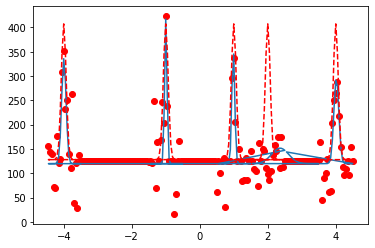

[[-3.9958333287825947, 0.00907329305362718], [-0.9973310025547153, 0.005166615049910483], [0.9865533013431972, 0.006632300073706314], [2.36288144326516, 0.12014826009916481], [4.016778672467781, 0.011732059244234075]]
third run job id: c27e298d3dbc4201a9569654ebf93e85-16429013992725527
[[Model]]
    (((((Model(constant) + Model(gaussian, prefix='peak0_')) + Model(gaussian, prefix='peak1_')) + Model(gaussian, prefix='peak2_')) + Model(gaussian, prefix='peak3_')) + Model(gaussian, prefix='peak4_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 11252
    # data points      = 105
    # variables        = 16
    chi-square         = 90907.8371
    reduced chi-square = 1021.43637
    Akaike info crit   = 742.182320
    Bayesian info crit = 784.645686
[[Variables]]
    c:                117.262422 +/- 4.13544285 (3.53%) (init = 128)
    peak0_amplitude:  17.2289005 +/- 2.04872573 (11.89%) (init = 50)
    peak0_center:    -4.00298938 +/- 0.00375439 (0.09%) (i

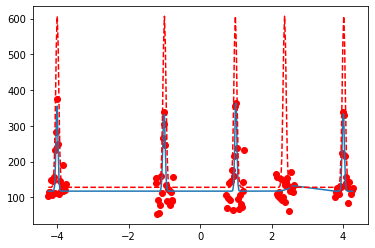

[[-4.002989384487659, 0.003754390905352323], [-1.0094609543664368, 0.004154139429118514], [0.9996706668049524, 0.0032434416315953976], [4.004137084355083, 0.003931329094864638]]
[[Model]]
    (Model(constant) + Model(gaussian, prefix='peak0_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 66
    # data points      = 8
    # variables        = 4
    chi-square         = 5699.41786
    reduced chi-square = 1424.85446
    Akaike info crit   = 60.5494222
    Bayesian info crit = 60.8671884
[[Variables]]
    c:                117.243578 +/- 32.4652760 (27.69%) (init = 128)
    peak0_amplitude:  17.3461151 +/- 5.22017409 (30.09%) (init = 50)
    peak0_center:    -3.98917452 +/- 0.00405174 (0.10%) (init = -4.002989)
    peak0_sigma:      0.02723987 +/- 0.00602075 (22.10%) (init = 0.04166667)
    peak0_fwhm:       0.06414499 +/- 0.01417777 (22.10%) == '2.3548200*peak0_sigma'
    peak0_height:     254.043026 +/- 37.0993830 (14.60%) == '0.3989423*peak0_amplitude/m

In [30]:
identifyPeaksTest = identify_peaks(2.5, 1.5, 3, [9, 21, 21], [1, 3, 10], backend=backendQASM)
print(identifyPeaksTest)

first run job id: cdb29782dcb94d7d84fa5a5fcb88fcf6-16428625766277957
[-4.0, -3.0, -1.0, 1.0, 4.0]
[-4.5, -4.45, -4.4, -4.35, -4.3, -4.25, -4.2, -4.15, -4.1, -4.05, -4.0, -3.95, -3.9, -3.85, -3.8, -3.75, -3.7, -3.65, -3.6, -3.55, -3.5, -3.45, -3.4, -3.35, -3.3, -3.25, -3.2, -3.15, -3.1, -3.05, -3.0, -2.95, -2.9, -2.85, -2.8, -2.75, -2.7, -2.65, -2.6, -2.55, -1.5, -1.45, -1.4, -1.35, -1.3, -1.25, -1.2, -1.15, -1.1, -1.05, -1.0, -0.95, -0.8999999999999999, -0.85, -0.7999999999999999, -0.75, -0.7, -0.6499999999999999, -0.6, -0.5499999999999999, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.8500000000000001, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4, 1.4500000000000002, 3.5, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45]
second run job id: 14d0be33218b48fb8471148ae4670fab-16428631569513228
[-4.0, -3.0, -1.0, 1.0, 4.0]
[[Model]]
    (((((Model(constant) + Model(gaussian, prefix='peak0_')) + Model(gaussian, pr

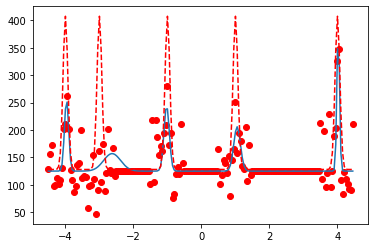

[[-3.9670173344632884, None], [-2.6271288842992973, None], [-1.0241187278556376, None], [1.0484976639273935, None], [4.021125381764786, None]]
third run job id: cd6d8166ff0d4884a49d87b03dc7c9ee-164286339686823
[[Model]]
    (((((Model(constant) + Model(gaussian, prefix='peak0_')) + Model(gaussian, prefix='peak1_')) + Model(gaussian, prefix='peak2_')) + Model(gaussian, prefix='peak3_')) + Model(gaussian, prefix='peak4_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 9435
    # data points      = 105
    # variables        = 16
    chi-square         = 104640.285
    reduced chi-square = 1175.73354
    Akaike info crit   = 756.953971
    Bayesian info crit = 799.417337
##  Warning: uncertainties could not be estimated:
[[Variables]]
    c:                120.775742 +/- 3.59708619 (2.98%) (init = 128)
    peak0_amplitude:  20.0031399 +/- 0.06744112 (0.34%) (init = 50)
    peak0_center:    -3.99618871 +/- 0.00691475 (0.17%) (init = -3.967017)
    peak0_s

C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


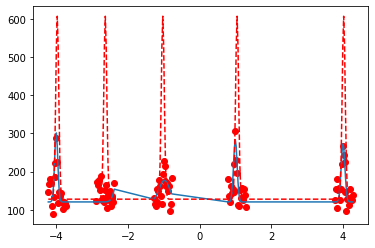

[[-3.9961887070782596, 0.006914748824815079], [-2.162823492371003, 0.5704566619062097], [-0.9793238642116483, 0.046717165322828165], [0.9991130470427836, 0.008158927816339404], [4.00279036834846, 0.0087738693233225]]
[[[-4.001394603621197, 0.0028610885621105134], [-0.9962225854928792, 0.0038340122486523035], [0.9994322395160189, 0.004714691446951064], [3.9867400114792555, 0.004126440199915574]], [[-3.9828395021771605, 0.00708597469137013], [-1.0000729847132983, 0.011964253091672417], [0.9996891256103783, 0.0068297514766171045], [3.9030212752819504, 0.0313531673580913]], array([139.6, 101.2, 131.3,  81.3, 138.2, 133.1,  89.9, 198.7, 201.1,
       381.3, 346. , 126.3,  99.5,  92.7, 105.5, 114.4, 181.6, 186.7,
       118.2, 133.6, 134.6,  92.5,  83.1,  96.8,  95.1, 110.6,  77.8,
       121.1,  97.8, 167.7, 282.6, 327.6, 321.4, 179.9, 134.5,  92.5,
       111.5,  86.6,  91.8, 164.7, 118.1, 107.9, 140.9,  97.8, 168.1,
       139.7, 155.9, 130.7,  97.2,  96.1, 222.2, 221.9, 330.5, 259.2,
   

In [17]:
quantumIDTest = identify_peaks(2.5, 1.5, 3, [9, 21, 21], [1, 3, 10], backend=backendJakarta)
print(quantumIDTest)

first run job id: cb94e8159de84e36970763d666562046-1642915308701706
[-3.35077608803911, -2.010465652823466, -0.6701552176078218, 2.0104656528234663, 3.35077608803911]
[-3.685853696843021, -3.6523459359626296, -3.6188381750822387, -3.585330414201848, -3.5518226533214565, -3.518314892441065, -3.4848071315606743, -3.4512993706802835, -3.417791609799892, -3.384283848919501, -3.35077608803911, -3.317268327158719, -3.283760566278328, -3.2502528053979365, -3.2167450445175456, -3.1832372836371547, -3.1497295227567634, -3.116221761876372, -3.0827140009959813, -3.0492062401155904, -2.345543261627377, -2.312035500746986, -2.2785277398665946, -2.2450199789862033, -2.2115122181058124, -2.1780044572254216, -2.1444966963450303, -2.110988935464639, -2.077481174584248, -2.043973413703857, -2.010465652823466, -1.9769578919430748, -1.9434501310626837, -1.9099423701822926, -1.8764346093019015, -1.8429268484215104, -1.8094190875411194, -1.7759113266607283, -1.7424035657803372, -1.708895804899946, -1.005232

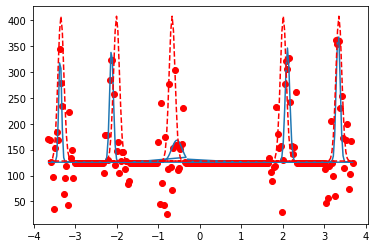

[[-3.3695080057374076, 0.0063118246439097195, 0.03407889237077141], [-2.131468465118699, 0.0069511601700594245, 0.045300585173210395], [-0.5538019054844723, 0.0689355951761435, 0.12622037110956816], [2.111757014588731, 0.007805037166986861, 0.05474056784438189], [3.334521004447259, 0.007149238578243146, 0.047467087010989825]]
third run job id: 68a91cfa59474023a444feb0e1d0f777-1642915708842905
[[Model]]
    (((((Model(constant) + Model(gaussian, prefix='peak0_')) + Model(gaussian, prefix='peak1_')) + Model(gaussian, prefix='peak2_')) + Model(gaussian, prefix='peak3_')) + Model(gaussian, prefix='peak4_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 9382
    # data points      = 105
    # variables        = 16
    chi-square         = 15362.2749
    reduced chi-square = 172.609831
    Akaike info crit   = 555.499524
    Bayesian info crit = 597.962890
[[Variables]]
    c:                113.742704 +/- 2.48484321 (2.18%) (init = 128)
    peak0_amplitude

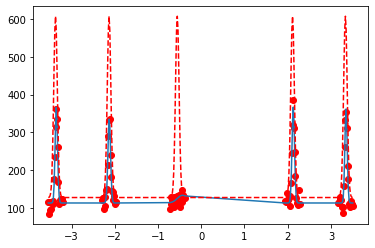

[[-3.35102669669772, 0.0012133777828250848, 0.028469975772955625], [-2.127172256868104, 0.0014064840554403467, 0.03051776146921932], [-0.43468001544852386, 0.15069095860409742, 0.11658043731591518], [2.128911592917163, 0.0012164613267979774, 0.029068184914694317], [3.348790990462398, 0.0012000844671424505, 0.027257959974837084]]
[[Model]]
    (Model(constant) + Model(gaussian, prefix='peak0_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 8
    # variables        = 4
    chi-square         = 327.334435
    reduced chi-square = 81.8336087
    Akaike info crit   = 37.6923267
    Bayesian info crit = 38.0100929
[[Variables]]
    c:                116.776277 +/- 30.3519213 (25.99%) (init = 128)
    peak0_amplitude:  18.1478449 +/- 4.22503136 (23.28%) (init = 50)
    peak0_center:    -3.35452476 +/- 8.9207e-04 (0.03%) (init = -3.351027)
    peak0_sigma:      0.02951992 +/- 0.00356013 (12.06%) (init = 0.04166667)
    peak0_fwhm:    

In [69]:
prodTest = identify_peaks(prodXMod, prodZMod, 3, [11, 21, 21], [1, 3, 50], backend=backendQASM)
print(prodTest)

first run job id: 4e8caa0b10f34edf81e3ad806096dff0-16429838313760266
[-3.35077608803911, -2.2338507253594067, -1.675388044019555, -0.5584626813398517, 0.5584626813398517, 3.35077608803911]
[-3.630007428709036, -3.6020842946420433, -3.5741611605750507, -3.546238026508058, -3.5183148924410657, -3.4903917583740727, -3.46246862430708, -3.4345454902400876, -3.406622356173095, -3.3786992221061025, -3.35077608803911, -3.3228529539721174, -3.294929819905125, -3.2670066858381324, -3.23908355177114, -3.2111604177041473, -3.1832372836371543, -3.1553141495701618, -3.1273910155031692, -3.0994678814361767, -2.5130820660293325, -2.48515893196234, -2.4572357978953474, -2.429312663828355, -2.4013895297613623, -2.3734663956943693, -2.345543261627377, -2.3176201275603843, -2.2896969934933917, -2.261773859426399, -2.2338507253594067, -2.205927591292414, -2.1780044572254216, -2.150081323158429, -2.1221581890914365, -2.094235055024444, -2.066311920957451, -2.0383887868904584, -2.010465652823466, -1.98254251

C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\.conda\envs\pythonProject\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


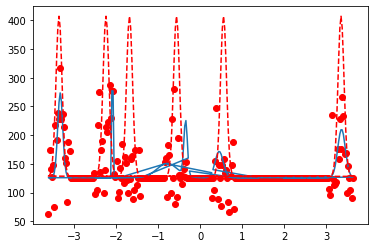

[[-3.3213567867466223, 0.010743124055170814, 0.059487044721936166], [-2.080276824041904, 0.00033455475326205254, 0.005390496077167378], [-0.34171889972630454, 0.027933892984883232, 0.04165869149373003], [0.45571789808909574, 0.1086095083243357, 0.0966357689031836], [3.3634012427200104, 0.026262639322027513, 0.09046008079087085]]
third run job id: 7bef850ca1c74932a5eb296b29e0470f-16429842080769396
[[Model]]
    (((((Model(constant) + Model(gaussian, prefix='peak0_')) + Model(gaussian, prefix='peak1_')) + Model(gaussian, prefix='peak2_')) + Model(gaussian, prefix='peak3_')) + Model(gaussian, prefix='peak4_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 9885
    # data points      = 125
    # variables        = 16
    chi-square         = 71527.6197
    reduced chi-square = 656.216695
    Akaike info crit   = 825.690651
    Bayesian info crit = 870.943671
##  Warning: uncertainties could not be estimated:
[[Variables]]
    c:                139.430944 

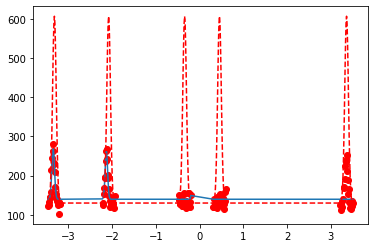

[[-3.3492987185765166, None, 0.030804107267724895], [-2.132114164043174, None, 0.02798440565675657], [0.04633103604625069, None, 0.047513913073598646], [-0.18913277039927542, None, 0.004227164986377277]]
[[Model]]
    (Model(constant) + Model(gaussian, prefix='peak0_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 106
    # data points      = 8
    # variables        = 4
    chi-square         = 730.051614
    reduced chi-square = 182.512903
    Akaike info crit   = 44.1093896
    Bayesian info crit = 44.4271557
[[Variables]]
    c:                175.079476 +/- 67.5189185 (38.56%) (init = 128)
    peak0_amplitude:  5.83333333 +/- 0.03759386 (0.64%) (init = 50)
    peak0_center:    -3.34057833 +/- 0.00270792 (0.08%) (init = -3.349299)
    peak0_sigma:      0.02388616 +/- 0.01417940 (59.36%) (init = 0.04166667)
    peak0_fwhm:       0.05624762 +/- 0.03338994 (59.36%) == '2.3548200*peak0_sigma'
    peak0_height:     97.4272550 +/- 58.4556228 (60.00%) == '0

In [98]:
# 4e8caa0b10f34edf81e3ad806096dff0-16429838313760266
# 2a51183ebcd4482fb7f40875596fe8c2-16429838750533879
# 7bef850ca1c74932a5eb296b29e0470f-16429842080769396
# quantProdTest = identify_peaks(prodXMod, prodZMod, 3, [13, 21, 25], [1, 3, 40], backend=backendCasablanca)
quantProdTest = jobManager.retrieve_job_set('7bef850ca1c74932a5eb296b29e0470f-16429842080769396', provider)
print(quantProdTest)

In [97]:
print(find_final_final_peaks(quantProdTest[3], quantProdTest[2], [[3.40000118], [-2.1], [2.13], [3.33]], 125, 12, 3))

[[Model]]
    (Model(constant) + Model(gaussian, prefix='peak0_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 242
    # data points      = 6
    # variables        = 4
    chi-square         = 66.9979897
    reduced chi-square = 33.4989948
    Akaike info crit   = 22.4774189
    Bayesian info crit = 21.6444567
[[Variables]]
    c:                116.364615 +/- 19.7130807 (16.94%) (init = 125)
    peak0_amplitude:  299.999930 +/- 5492.93375 (1830.98%) (init = 50)
    peak0_center:     3.56090835 +/- 0.68720292 (19.30%) (init = 3.400001)
    peak0_sigma:      0.05440278 +/- 0.13904239 (255.58%) (init = 0.04166667)
    peak0_fwhm:       0.12810877 +/- 0.32741980 (255.58%) == '2.3548200*peak0_sigma'
    peak0_height:     2199.93632 +/- 34667.5228 (1575.84%) == '0.3989423*peak0_amplitude/max(1e-15, peak0_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(peak0_amplitude, peak0_center) = 1.000
    C(peak0_center, peak0_sigma)     = 0.999
  

In [ ]:
# not used. Energy expectation ended up not working for theoretical and practical reasons

def get_spins(results, state, numShots):
    topExpect = 0
    botExpect = 0
    countsLower = list()
    countsUpper = list()
    totals = list()
    #first index is upper, second is lower
    # 0 for upper and lower, 0 for upper 1 for lower, 1 for upper 0 for lower, 1 for upper 1 for lower
    states = [state, '01' + state[2:], '10' + state[2:], '11' + state[2:]]

    for i in range(numShots):
        temp = deNone(results.get_counts(i).get(states[0]))
        temp = temp + deNone(results.get_counts(i).get(states[1]))
        temp = temp + deNone(results.get_counts(i).get(states[2]))
        temp = temp + deNone(results.get_counts(i).get(states[3]))
        totals.append(temp)

    for i in range(numShots):
        # append all top down. (00000) (top down, bot down) and (01000) (top down, bot up)
        countsLower.append((deNone(results.get_counts(i).get(state)) + deNone(results.get_counts(i).get(states[1]))) / totals[i])
        # append all bot down (00000) (top down, bot down) and (10000) (top up, bot down)
        countsUpper.append((deNone(results.get_counts(i).get(state)) + deNone(results.get_counts(i).get(states[2]))) / totals[i])

    for upperCount, lowerCount in zip(countsUpper, countsLower):
        topExpect = topExpect + upperCount * -0.5 + (1 - upperCount) * 0.5
        botExpect = botExpect + lowerCount * -0.5 + (1 - lowerCount) * 0.5

    topExpect = topExpect / (1 * numShots)
    botExpect = botExpect / (1 * numShots)

    return [topExpect, botExpect]

In [28]:
zztest = list()
xxtest = list()
for i in range(100):
    zztest.append(run_rodeo(make_good_times(12, 3, 12/5, 12*3), 3, 4, 2.5, 1.5, measurements="zz"))
    xxtest.append(run_rodeo(make_good_times(12, 3, 12/5, 12*3), 3, 4, 2.5, 1.5, measurements="zz"))

zztest = transpile(zztest, backend=backendQASM)
zzjob = jobManager.run(zztest, backend=backendQASM, shots=1024)
zzresults = zzjob.results()

xxtest = transpile(xxtest, backend=backendQASM)
xxjob = jobManager.run(xxtest, backend=backendQASM, shots=1024)
xxresults = xxjob.results()

zSpins = get_spins(zzresults, "00000", 100)
print(zSpins)
zTop = zSpins[0]
zBot = zSpins[1]

xSpins = get_spins(xxresults, "00000", 100)
print(xSpins)
xTop = xSpins[0]
xBot = xSpins[1]

print(2.5 * zBot * xTop + 1.5 * xBot * zTop)

[-0.013683524212967755, -0.048599811695886556]
[-0.0011913473058041118, -0.00949400338152795]
0.0003396152745399072


In [30]:
# not used. Energy expectation ended up not working for theoretical and practical reasons
def calculate_average_expectation(xResults, zResults, xMod, zMod):
    xMemory = list()
    zMemory = list()
    for i in range(100):
        for (xMem, zMem) in zip(xResults.get_memory(i), zResults.get_memory(i)):
            xMemory.append(xMem)
            zMemory.append(zMem)

    totalEnergy = 0
    for i in range(len(xMemory)):
        if xMemory[i][0] == xMemory[i][1]:
            totalEnergy += xMod
        else:
            totalEnergy -= xMod

        if zMemory[i][0] == zMemory[i][1]:
            totalEnergy += zMod
        else:
            totalEnergy -= zMod


        # totalEnergy += int(list(xMemory[i])[0]) * int(list(xMemory[i])[1]) * xMod
        # totalEnergy += int(list(zMemory[i])[0]) * int(list(zMemory[i])[1]) * zMod
    return totalEnergy/(1024 * 100)

def calculate_average_expectation_success(xResults, zResults, xMod, zMod):
    xMemory = list()
    zMemory = list()
    for i in range(100):
        for (xMem, zMem) in zip(xResults.get_memory(i), zResults.get_memory(i)):
            xMemory.append(xMem)
            zMemory.append(zMem)

    totalX = 0
    totalZ = 0
    zSuccess = 1024*100
    xSuccess = 1024*100
    for i in range(len(xMemory)):
        if xMemory[i] == "11" or xMemory[i] == "00":
            totalX += xMod
        # elif xMemory[i][-9:] == "000"*3:
        #     totalX -= xMod
        if zMemory[i] == "11" or zMemory[i] == "00":
            totalZ += zMod
        # elif zMemory[i][-9:] == "000"*3:
        #     totalZ -= zMod

    # for i in range(len(xMemory)):
    #     if xMemory[i][-9:] == "000"*3:
    #         xSuccess += 1
    #     if zMemory[i][-9:] == "000"*3:
    #         zSuccess += 1

    return totalX / xSuccess + totalZ / zSuccess

def count_ones(xResults, zResults, xMod, zMod):
    xMemory = list()
    zMemory = list()
    for i in range(100):
        for (xMem, zMem) in zip(xResults.get_memory(i), zResults.get_memory(i)):
            xMemory.append(xMem)
            zMemory.append(zMem)

    total1 = 0
    for i in range(len(xMemory)):
        if xMemory[i] == "11000" or zMemory[i] == "11000":
            total1 += 1

    return total1


def get_spin_expect(result):
    total1Down = 0
    total2Down = 0
    for i in range(100):
        total1Down += deNone(result.get_counts(i).get("00000")) + deNone(result.get_counts(i).get("01000"))
        total2Down += deNone(result.get_counts(i).get("00000")) + deNone(result.get_counts(i).get("10000"))
    return [total1Down / 1, total2Down / 1]

def get_num_successes(result):
    totalCounts = 0
    for i in range(100):
        counts = result.get_counts(i)
        totalCounts += deNone(counts.get("00000")) + deNone(counts.get("10000")) + deNone(counts.get("01000")) + deNone(counts.get("11000"))
    return totalCounts

def calculate_expectation(spins, expect):
    expect1 = spins[0] / expect * -0.5 + (1 - spins[0]) / expect * 0.5
    expect2 = spins[1] / expect * -0.5 + (1 - spins[1]) / expect * 0.5
    return [expect1, expect2]

def calculate_energy(expect, xMod, zMod):
    return expect[1][0] * expect[0][1] * xMod + expect[0][0] * expect[1][1] * zMod

In [28]:
xCircs = list()
for i in range(100):
    xCircs.append(run_rodeo(make_good_times(12, 3, 12/5, 36), 3, 4, 2.5, 1.5, measurements="xz"))

xCircs = transpile(xCircs, backend=backendJakarta)
xJob = jobManager.run(xCircs, backend=backendJakarta, shots=1024, memory=True)


zCircs = list()
for i in range(100):
    zCircs.append(run_rodeo(make_good_times(12, 3, 12/5, 36), 3, 4, 2.5, 1.5, measurements="zx"))

zCircs = transpile(zCircs, backend=backendJakarta)
zJob = jobManager.run(zCircs, backend=backendJakarta, shots=1024, memory=True)

expect = calculate_average_expectation(xJob.results(), zJob.results(), 2.5, 1.5)
backwards = calculate_average_expectation(xJob.results(), zJob.results(), 1.5, 2.5)
print(expect, backwards)

0.9121923828125 0.8923779296875


In [33]:
xCircs = list()
for i in range(100):
    xCircs.append(run_rodeo(make_good_times(12, 3, 12/5, 36), 0, 4, 2.5, 1.5, measurements="xz"))

xCircs = transpile(xCircs, backend=backendQASM)
xJob = jobManager.run(xCircs, backend=backendQASM, shots=1024, memory=True)


zCircs = list()
for i in range(100):
    zCircs.append(run_rodeo(make_good_times(12, 3, 12/5, 36), 0, 4, 2.5, 1.5, measurements="zx"))

zCircs = transpile(zCircs, backend=backendQASM)
zJob = jobManager.run(zCircs, backend=backendQASM, shots=1024, memory=True)

successesOnly = calculate_average_expectation_success(xJob.results(), zJob.results(), 2.5, 1.5)
negativePositive = calculate_average_expectation(xJob.results(), zJob.results(), 2.5, 1.5)
print(successesOnly, negativePositive)


2.0055126953125 0.011025390625


In [31]:
test = get_simple_overlap(3, [-4, -1, 1, 4], 2.5, 1.5, 100, backend=backendPerth)
print(test)

print("qasm test")
test = get_simple_overlap(3, [-4, -1, 1, 4], 2.5, 1.5, 100, backend=backendQASM)
print(test)

overlapJob job id: 09bc5875829a43318badac70c577e1b2-16442187103419986
[308.66]
overlapJob job id: fedbc5ec6284411986119d7335e3e606-16442187698416815
[329.19]
overlapJob job id: ef7e6b94f26e4a15ba617a484c85689f-16442188186836429
[317.06]
overlapJob job id: b1516198723345a8a8dc5d0ad7f8aa92-16442188812564478
[310.83]
[array([316., 336., 335., 296., 278., 285., 237., 224., 319., 273., 351.,
       343., 238., 241., 260., 214., 340., 259., 221., 351., 377., 330.,
       226., 293., 451., 305., 315., 357., 225., 255., 187., 277., 362.,
       477., 282., 204., 411., 492., 254., 227., 454., 522., 217., 232.,
       280., 368., 280., 551., 567., 254., 299., 263., 320., 307., 263.,
       246., 316., 405., 259., 338., 304., 241., 501., 248., 377., 249.,
       352., 385., 317., 249., 331., 292., 237., 280., 416., 330., 305.,
       200., 202., 411., 282., 386., 395., 200., 364., 264., 244., 183.,
       368., 248., 311., 355., 201., 241., 356., 260., 231., 294., 413.,
       278.]), array([226.

In [32]:
test1 = get_simple_overlap(1, [-4, -1, 1, 4], 2.5, 1.5, 100, backend=backendPerth)
print(test1)
test2 = get_simple_overlap(2, [-4, -1, 1, 4], 2.5, 1.5, 100, backend=backendPerth)
print(test2)
test3 = get_simple_overlap(3, [-4, -1, 1, 4], 2.5, 1.5, 100, backend=backendPerth)
print(test3)
test4 = get_simple_overlap(4, [-4, -1, 1, 4], 2.5, 1.5, 100, backend=backendPerth)
print(test4)
test5 = get_simple_overlap(5, [-4, -1, 1, 4], 2.5, 1.5, 100, backend=backendPerth)
print(test5)
test6 = get_simple_overlap(6, [-4, -1, 1, 4], 2.5, 1.5, 100, backend=backendPerth)

overlapJob job id: 082682ce65af459b92e72fa5a73bd396-16442191283784332
[660.3]
overlapJob job id: d2a064b5cac941caaf0563311e81a1d1-164421918766526
[650.16]
overlapJob job id: acccd37b2749413c9d8084cf2e46c491-1644219236677832
[644.78]
overlapJob job id: 6c490ae3db8447969c62ce3048bbd38d-16442192765777204
[638.33]
[array([714., 670., 797., 574., 650., 414., 878., 670., 542., 790., 576.,
       615., 573., 697., 512., 704., 512., 668., 546., 469., 697., 581.,
       588., 514., 544., 912., 868., 909., 857., 488., 918., 649., 461.,
       613., 550., 553., 528., 524., 565., 564., 513., 944., 692., 634.,
       874., 843., 556., 777., 900., 897., 593., 837., 595., 725., 423.,
       414., 789., 837., 686., 957., 739., 518., 529., 908., 729., 845.,
       711., 691., 551., 707., 562., 493., 681., 743., 849., 595., 875.,
       613., 513., 872., 623., 874., 540., 674., 649., 556., 573., 452.,
       544., 639., 557., 623., 477., 569., 753., 803., 727., 774., 520.,
       439.]), array([636., 55

NameError: name 'test7' is not defined

In [33]:
print(test6)

[array([159., 171., 166., 160., 168., 160., 156., 158., 186., 145., 169.,
       140., 190., 138., 184., 181., 138., 179., 182., 137., 163., 183.,
       215., 199., 147., 257., 146., 133., 146., 175., 153., 170., 290.,
       145., 162., 171., 187., 169., 215., 161., 152., 172., 148., 182.,
       130., 192., 156., 144., 153., 186., 196., 207., 176., 250., 208.,
       182., 144., 133., 168., 196., 141., 172., 206., 136., 162., 218.,
       152., 161., 229., 144., 196., 119., 186., 139., 161., 183., 161.,
       169., 174., 177., 175., 164., 161., 164., 173., 157., 157., 176.,
       159., 133., 182., 150., 178., 321., 161., 154., 159., 155., 152.,
       138.]), array([175., 171., 144., 176., 157., 163., 176., 151., 134., 125., 173.,
       198., 199., 204., 142., 169., 165., 183., 159., 188., 213., 173.,
       169., 192., 214., 225., 157., 176., 193., 189., 134., 169., 155.,
       148., 161., 141., 205., 166., 188., 172., 178., 179., 180., 144.,
       180., 219., 198., 149., 177.

In [37]:
averageCounts = list()
for i in range(6):
    temp = get_simple_overlap(i+1, [-4, -1, 1, 4], 2.5, 1.5, 1000, backend=backendPerth)
    print(temp)
    averageCounts.append(temp)

overlapJob job id: 32ae481bb40447a6b313000d4c70e202-16442459138082438
[628.61]
overlapJob job id: d42ff88e9efb4489b2aa7093b9b40580-16442464162779047
[635.941]
overlapJob job id: 99350f6e897041c78a34f400ff164759-164424770723167
[629.995]
overlapJob job id: 8e055c8ce4734666a15bda66e809e019-16442485383635032
[632.593]
[array([628.61]), array([635.941]), array([629.995]), array([632.593])]
overlapJob job id: dda9c23764514721915cc0307d546cbb-1644249007341152
[415.317]
overlapJob job id: 8b5e7b4524014ed2b4ec7bb47f210c08-1644249493811442
[425.337]
overlapJob job id: 46c78ec63e7d48d994d929044745ad53-16442499547754505
[423.849]
overlapJob job id: a62925a308514619a73df078be1d5a9a-16442504247919877
[428.525]
[array([415.317]), array([425.337]), array([423.849]), array([428.525])]
overlapJob job id: 4f34f27e923a4bbda2bdf8085e62d413-16442509600433106
[305.994]
overlapJob job id: a81d3e65e05443279deb26bb70ac0946-1644251447229955
[311.685]
overlapJob job id: d6bfb7de64484ab3ae926d868f172b08-164425193

In [ ]:
#TODO: randomize eigenvalue order
baseEnergies = [-4, -1, 1, 4]
averageCountsRandom = list()
for i in range(4):
    print(str(i+3) + " cycle energies: ")
    random.shuffle(baseEnergies)
    print(baseEnergies)
    temp = get_simple_overlap(i+2, baseEnergies, 2.5, 1.5, 1000, backend=backendPerth)
    print("counts: ", temp)
    averageCountsRandom.append([baseEnergies, temp])

3 cycle energies: 
[4, -1, -4, 1]
4 overlapJob job id: d68bdb939874471ea21ced32fb06d79f-1644392124464922
433.49
-1 overlapJob job id: 7970387bf2ca4f10a479d0db6f9382bc-16443925205085003
422.733
-4 overlapJob job id: 2d3e177a7d6d4e4a9860c8e96a062574-164439294992352
408.542
1 overlapJob job id: cbe0b81bad2444c1a48fb87929c87b0d-16443934088362153
425.947
counts:  [433.49, 422.733, 408.542, 425.947]
4 cycle energies: 
[-1, 1, -4, 4]
-1 overlapJob job id: 29ae0ea12cbf4338b78d3a84ac69cbbe-16443938788403637
299.514
1 overlapJob job id: 8f998f8f4e2c404e82d79cb7f3b852dd-16443943515618567
307.218
-4 overlapJob job id: e23fca51fd5a4759aaab7cac1031002e-16443948211922581
276.135
4 overlapJob job id: f152ff695a2842879968323bb3b4cd93-16443954542770507
305.905
counts:  [299.514, 307.218, 276.135, 305.905]
5 cycle energies: 
[-4, 1, 4, -1]
-4 overlapJob job id: ef3772bfd363407ca2fa63e0fb7dc13d-16443959342038949
211.252
1 overlapJob job id: 927776f5d5ec4604be77da2f0714c925-16443963933514037
236.114
4 over

In [ ]:
averageCountsInverse = list()
for i in range(6):
    print(str(i+1) + " cycle energies: ")
    temp = get_simple_overlap(i+1, [-4, -1, 1, 4], 2.5, 1.5, 1000, backend=backendPerth)
    print("counts: ", temp)
    averageCountsInverse.append(temp)

In [5]:
highRedundacyIDs = ["f4a277f072564f55a0830eb08fad5f36-16444287004715824", "4ea6d2949cfd4361bece6762df949e26-16444288810868614", "00a5f02aa95b4df59fb324051048efa6-16444298577281668"]
highRedundancyPeaks = identify_peaks(2.5, 1.5, 3, [9, 21, 41], [33, 12, 40], jobIDs = highRedundacyIDs, backend=backendPerth)
print(highRedundancyPeaks["secondDual"])

first run job id: f4a277f072564f55a0830eb08fad5f36-16444287004715824
[[281.8787878787879, 132.87878787878788, 114.72727272727273, 286.6969696969697, 139.8181818181818, 307.8181818181818, 113.78787878787878, 150.4848484848485, 318.93939393939394]]
[[-4.0, -1.0, 1.0, 4.0]]
second run job id: 4ea6d2949cfd4361bece6762df949e26-16444288810868614
[[-4.5, -4.45, -4.4, -4.35, -4.3, -4.25, -4.2, -4.15, -4.1, -4.05, -4.0, -3.95, -3.9, -3.85, -3.8, -3.75, -3.7, -3.65, -3.6, -3.55, -1.5, -1.45, -1.4, -1.35, -1.3, -1.25, -1.2, -1.15, -1.1, -1.05, -1.0, -0.95, -0.8999999999999999, -0.85, -0.7999999999999999, -0.75, -0.7, -0.6499999999999999, -0.6, -0.5499999999999999, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.8500000000000001, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4, 1.4500000000000002, 3.5, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45]]
[[[-3.973644398682776, 0.0035777814165631676, 0.047827272267069926], [-0.9

In [7]:
for energy, count in zip(highRedundancyPeaks["secondDual"][0][0], highRedundancyPeaks["secondDual"][1][0]):
    print(energy, count)

150.5 -4.5
133.33333333333334 -4.45
122.66666666666667 -4.4
192.08333333333334 -4.35
113.0 -4.3
127.0 -4.25
169.66666666666666 -4.2
71.33333333333333 -4.15
140.75 -4.1
197.33333333333334 -4.05
294.6666666666667 -4.0
320.5 -3.95
186.5 -3.9
116.08333333333333 -3.85
136.08333333333334 -3.8
125.75 -3.75
134.0 -3.7
111.08333333333333 -3.65
125.66666666666667 -3.6
157.41666666666666 -3.55
131.66666666666666 -1.5
130.75 -1.45
172.0 -1.4
101.33333333333333 -1.35
79.83333333333333 -1.3
95.58333333333333 -1.25
130.33333333333334 -1.2
103.58333333333333 -1.15
132.5 -1.1
192.75 -1.05
345.1666666666667 -1.0
276.9166666666667 -0.95
245.66666666666666 -0.8999999999999999
161.5 -0.85
160.25 -0.7999999999999999
146.5 -0.75
135.25 -0.7
148.0 -0.6499999999999999
124.33333333333333 -0.6
138.08333333333334 -0.5499999999999999
147.75 0.5
118.25 0.55
146.91666666666666 0.6
129.58333333333334 0.65
160.5 0.7
186.41666666666666 0.75
132.25 0.8
151.0 0.8500000000000001
117.58333333333333 0.9
240.08333333333334 0

In [32]:
IdentifiedPeaksAverageCounts = list()
for i in range(6):
    print(str(i+1) + " cycle: ")
    temp = get_simple_overlap(i+1, [-0.98745422, 4.00113417], 2.5, 1.5, 900, backend=backendPerth)
    print("counts: ", temp)
    IdentifiedPeaksAverageCounts.append(temp)

1 cycle: 
-0.98745422 overlapJob job id: 0e47b62fe12b4e128385a0845c59adf7-16444335537017455
636.1833333333333
4.00113417 overlapJob job id: b0b40c44f05c4ea3b99322e62c807b5d-16444338954678643
651.58
counts:  [636.1833333333333, 651.58]
2 cycle: 
-0.98745422 overlapJob job id: 49863b4106c6438aa39b29005fb379ac-16444343545482101
435.72222222222223
4.00113417 overlapJob job id: f0fc8243e5f2468f99d4e02b7b8987ad-16444349229708133
435.6911111111111
counts:  [435.72222222222223, 435.6911111111111]
3 cycle: 
-0.98745422 overlapJob job id: 83d62061218d4e08a1199960c2d0bd92-16444355503902552
319.71666666666664
4.00113417 overlapJob job id: 255dc07642d24b58b195f464defa06ce-16444361258235624
326.6988888888889
counts:  [319.71666666666664, 326.6988888888889]
4 cycle: 
-0.98745422 overlapJob job id: 1ea4606d98c8484982cd2e59c15ae660-1644436606357239
248.7
4.00113417 overlapJob job id: 25d17161bb9545ce87394c2fca7355ae-16444371605991004
247.8188888888889
counts:  [248.7, 247.8188888888889]
5 cycle: 
-0.98

In [37]:
for cycles in range(6):
    print(str(cycles+1) + " cycle: ")
    temp = get_simple_overlap(cycles+1, [-0.98745422], 2.5, 1.5, 900, twoStateEnergies=[-0.98745422, 4.00113417], backend=backendPerth)
    print("counts: ", temp)
    IdentifiedPeaksAverageCounts.append(temp)

1 cycle: 
-0.98745422 overlapJob job id: 6417261b351e43e99fe41f055ddce097-16444417821265469
731.8033333333333
counts:  [731.8033333333333]
2 cycle: 
-0.98745422 overlapJob job id: 045e49cf4ce54b07a203fe6d70694b7f-16444428156253407
590.0622222222222
counts:  [590.0622222222222]
3 cycle: 
-0.98745422 overlapJob job id: 046c2408abc646c5a4f6f2287b0f0325-16444436359117029
485.19666666666666
counts:  [485.19666666666666]
4 cycle: 
-0.98745422 overlapJob job id: 5e1fed54c938499e8b20c55e847dc56a-16444461346761763
443.55444444444447
counts:  [443.55444444444447]
5 cycle: 
-0.98745422 overlapJob job id: ed77de2b753a46efa43f760f86735456-1644446587836355
405.8
counts:  [405.8]
6 cycle: 
-0.98745422 overlapJob job id: b90c6e483ac542aeb538ed61b9502b9d-16444473655800338
376.7811111111111
counts:  [376.7811111111111]


In [29]:
sanityCheck = run_two_state(3, 3, np.linspace(0, 5, 25), 2.5, 1.5, -1, 4, "zz", backend=backendQASM)

two state job530754ed70d044cab8f15d222c5573d0-16446374024080663
[-0.8030592734225621, -0.4237918215613382, 0.6296296296296295, 0.9536679536679538, 0.4418604651162792, -0.6412825651302605, -1.1354359925788498, -0.556, 0.41886792452830185, 1.1434034416826004, 0.6003552397868561, -0.2350746268656716, -0.981060606060606, -0.6165137614678899, 0.3820662768031189, 0.959847036328872, 0.30616302186878736, -0.5763358778625955, -0.9725490196078432, -0.5540275049115914, 0.5606361829025845, 1.2047713717693835, 0.6309523809523809, -0.4061895551257253, -1.0648854961832064]
[-1.114173228346457, -0.5136186770428015, 0.43121149897330596, 0.930966469428008, 0.5029239766081872, -0.5691382765531061, -1.106382978723404, -0.4023210831721471, 0.379506641366224, 1.0875763747454175, 0.5963488843813387, -0.44874274661508695, -0.8935361216730038, -0.7613636363636362, 0.30916030534351147, 1.0180505415162453, 0.47272727272727266, -0.5486381322957199, -0.9711934156378601, -0.5755395683453237, 0.5887096774193548, 1.2

In [31]:
finerSanityCheck = run_two_state(3, 10, np.linspace(0, 5, 50), 2.5, 1.5, -1, 4, "zz", backend=backendQASM)

two state job1e36c9dbd6574ccf80e8eb8a2062486f-16446379935067265
[-0.8587570621468927, -0.66796875, -0.4189723320158101, 0.14770459081836324, 0.4929859719438877, 0.8576998050682263, 0.8913857677902621, 0.8621359223300971, 0.40625, 0.09126984126984139, -0.5764023210831721, -0.9503816793893128, -1.1505791505791505, -0.9917355371900827, -0.8085106382978722, -0.194059405940594, 0.41282565130260535, 0.7258687258687258, 1.100371747211896, 1.0266159695817492, 0.9005628517823641, 0.4107485604606526, -0.05999999999999989, -0.6551059730250481, -0.8930581613508444, -0.888030888030888, -0.781609195402299, -0.3742690058479532, -0.003929273084479323, 0.46875, 0.7879924953095685, 0.9203187250996017, 0.7443609022556392, 0.3567134268537074, -0.20272904483430798, -0.7065637065637065, -0.8793774319066148, -0.9770992366412212, -0.7538461538461538, -0.40074906367041185, 0.14872798434442275, 0.7054263565891472, 0.9552845528455285, 1.1728395061728394, 0.9688715953307394, 0.6187624750499001, 0.0980392156862746

In [40]:
# fullRun = run_two_state(3, 27, np.linspace(0, 10, 100), 2.5, 1.5, -0.98745422, 4.00113417, "zz", backend=backendCasablanca, jobID='4246e6d9d90843e9aa8dfd84cbf6b62a-16446390077529044')
fullRun = jobManager.retrieve_job_set('job4246e6d9d90843e9aa8dfd84cbf6b62a-16446390077529044', provider)
print(fullRun)

two state job4246e6d9d90843e9aa8dfd84cbf6b62a-16446390077529044
[-1.103448275862069, -0.8557457212713937, -0.5079365079365079, -0.08450704225352124, 0.34895833333333326, 0.8244274809160306, 0.8762376237623763, 0.9470752089136489, 0.7394540942928041, 0.3703703703703704, -0.18499999999999994, -0.34517766497461944, -0.6535626535626533, -0.8484848484848484, -0.6243654822335025, -0.272, 0.12345679012345673, 0.3659147869674186, 0.594315245478036, 0.6492146596858639, 0.5436893203883495, 0.19148936170212777, -0.1483375959079285, -0.7434052757793763, -0.827930174563591, -0.8563968668407309, -0.6048780487804878, -0.303030303030303, 0.2180094786729858, 0.548076923076923, 1.092783505154639, 1.1002570694087406, 0.8797953964194373, 0.6381909547738692, 0.09245742092457415, -0.34328358208955234, -0.7402298850574711, -0.8528678304239401, -0.9648241206030151, -0.7156398104265405, -0.4439024390243902, 0.03149606299212615, 0.4937027707808565, 0.6813725490196079, 0.6982543640897756, 0.6487804878048782, 0.2

In [41]:
perthRun = run_two_state(3, 30, np.linspace(0, 10, 100), 2.5, 1.5, -0.98745422, 4.00113417, "zz", backend=backendPerth)
print(perthRun)

two state job62d3acf6fa004f60b27cc240b0f648cf-16447076338807232
[-0.8558758314855877, -0.6697459584295612, -0.4129930394431556, 0.04444444444444451, 0.4229885057471264, 0.7614457831325301, 0.8883720930232557, 0.8752735229759299, 0.8240534521158129, 0.27659574468085113, -0.05764966740576494, -0.6071428571428572, -0.8845315904139435, -1.0657596371882085, -0.8893905191873588, -0.5115207373271888, -0.3153153153153152, 0.248868778280543, 0.7488986784140967, 0.9750566893424035, 0.8946135831381732, 0.6594827586206897, 0.3155452436194895, -0.027027027027026973, -0.4009324009324009, -0.7251184834123222, -0.6507592190889372, -0.5411255411255411, -0.12328767123287676, 0.191588785046729, 0.44954128440366975, 0.6285714285714286, 0.6866952789699572, 0.45833333333333326, 0.20785219399538118, -0.19501133786848057, -0.6904761904761905, -0.8775055679287307, -0.9030837004405285, -0.7940552016985138, -0.3721973094170403, 0.046838407494145085, 0.6069868995633186, 0.9475982532751093, 1.1159420289855073, 0.9

In [44]:
zxTest = run_two_state(3, 30, np.linspace(0, 10, 101), 2.5, 1.5, -0.98745422, 4.00113417, "zx", backend=backendPerth)

two state job93c6f34ef3914cf79b2af49c6b12be80-16447328141502523
[-1.782178217821782, -1.7411764705882353, -1.204878048780488, -0.44803695150115463, 0.49523809523809526, 1.0641330166270784, 1.537712895377129, 1.73621103117506, 1.3302752293577982, 0.6714975845410629, -0.22935779816513757, -1.0545454545454545, -1.5560747663551404, -1.7671232876712328, -1.515587529976019, -0.9739952718676123, -0.1785714285714286, 0.6411483253588517, 1.3564814814814814, 1.6683168316831685, 1.62877030162413, 1.2431192660550459, 0.39814814814814825, -0.5767441860465115, -1.289760348583878, -1.7603911980440095, -1.6926713947990542, -1.167420814479638, -0.5885057471264368, 0.16666666666666669, 1.0637254901960784, 1.673758865248227, 1.7339449541284402, 1.375, 0.8284313725490196, -0.13363028953229383, -0.9671361502347419, -1.5436893203883497, -1.7635467980295565, -1.563380281690141, -1.087557603686636, -0.2822966507177034, 0.6453089244851258, 1.3775743707093822, 1.6496350364963503, 1.6577017114914427, 1.164383561

In [43]:
print(np.linspace(0,10,101))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


In [45]:
perthGoodTimes = run_two_state(3, 30, np.linspace(0, 10, 101), 2.5, 1.5, -0.98745422, 4.00113417, "zz", backend=backendPerth)
print(perthGoodTimes)

two state job9a3ac986eec9487da4a4a4d358e8e1aa-16447349254570699
[-0.592734225621415, -0.5976095617529881, -0.3896103896103895, 0.08677685950413228, 0.3544303797468355, 0.6231578947368421, 0.8278688524590163, 0.9365426695842449, 0.5403050108932461, 0.1186440677966103, -0.048458149779735615, -0.5726141078838174, -0.9075630252100838, -0.8622754491017963, -0.8079999999999998, -0.46696035242290734, -0.042553191489361764, 0.4282744282744281, 0.8401639344262295, 0.8932461873638344, 0.8275862068965516, 0.6285714285714286, 0.2555780933062881, -0.02183406113537112, -0.35564853556485354, -0.6512605042016807, -0.7154150197628458, -0.5258799171842652, -0.29769392033542985, 0.06299212598425208, 0.4132231404958678, 0.711018711018711, 0.5458248472505092, 0.490872210953347, 0.22641509433962276, -0.20858895705521463, -0.5902912621359224, -0.6824034334763949, -0.8040816326530613, -0.6892430278884463, -0.36904761904761896, 0.03711340206185576, 0.46610169491525416, 0.7957894736842105, 0.9958506224066389, 0

In [21]:
qasmSwapTimeEvolve = run_two_state(3, 3, np.linspace(0, 10, 101), 2.5, 1.5, -0.98745422, 4.00113417, "zz", backend=backendQASM)
print(qasmSwapTimeEvolve)

two state job4f2b66426bbf479e887cebb569b21651-1645634879351784
[0.6343283582089552, 0.5789473684210527, 0.1807909604519773, -0.18713450292397638, -0.5471698113207546, -0.7700729927007299, -0.8876811594202898, -0.6583184257602862, -0.39703153988868267, 0.058212058212058215, 0.6880907372400755, 1.1162790697674418, 1.332046332046332, 1.2771535580524345, 1.0425138632162663, 0.4361493123772102, -0.27118644067796605, -0.803960396039604, -1.3005464480874318, -1.3561904761904764, -1.2610441767068274, -0.8434622467771641, -0.4638783269961977, 0.158607350096712, 0.6398537477148079, 0.9111531190926276, 0.9028571428571428, 0.7567567567567568, 0.4232209737827715, 0.007434944237918073, -0.3333333333333334, -0.5625, -0.5333333333333333, -0.3102803738317757, 0.05850091407678243, 0.39852398523985233, 0.7323420074349443, 0.911439114391144, 0.7286245353159853, 0.5911504424778762, 0.13793103448275867, -0.4282982791586998, -0.9805447470817122, -1.2037037037037037, -1.3102189781021898, -1.0852173913043477, 

first run job id: d205a92c6561492d947b9bbb5f2f37dd-16478414206090186
[-4.0, -1.0, 1.0, 4.0]
[162.  250.2 153.4 177.2 281.6 102.6 304.2 103.6 129.  250.6  93.2]
[-4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.8999999999999999, -0.7999999999999999, -0.7, -0.6, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4]
second run job id: d603066ea70a440fb90a44d0918a1a09-16478458216059048


C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


[[Model]]
    ((((Model(constant) + Model(gaussian, prefix='peak0_')) + Model(gaussian, prefix='peak1_')) + Model(gaussian, prefix='peak2_')) + Model(gaussian, prefix='peak3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 5488
    # data points      = 110
    # variables        = 13
    chi-square         = 42694.7972
    reduced chi-square = 440.152549
    Akaike info crit   = 681.748718
    Bayesian info crit = 716.854963
##  Warning: uncertainties could not be estimated:
[[Variables]]
    c:                123.148865 +/- 2.11133534 (1.71%) (init = 128)
    peak0_amplitude:  29.6686933 +/- 4.26923761 (14.39%) (init = 50)
    peak0_center:    -3.96980892 +/- 0.01256954 (0.32%) (init = -4)
    peak0_sigma:      0.07682658 +/- 0.01248879 (16.26%) (init = 0.07142857)
    peak1_amplitude:  20.0753253 +/- 3.86182350 (19.24%) (init = 50)
    peak1_center:    -1.03590850 +/- 0.03032842 (2.93%) (init = -1)
    peak1_sigma:      0.04557233 +/- 0.04821347 (1

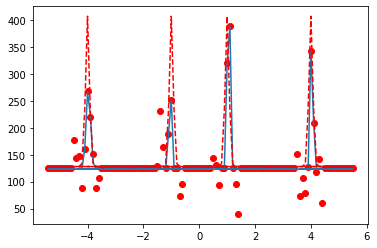

[[-3.9698089187896155, 0.012569543832796185, 0.07682657885790103], [-1.0359084950474207, 0.030328416919779094, 0.045572331026961635], [1.0512475291564272, nan, 0.020461999570336634], [4.046681037225451, nan, 0.01864886126521463]]
third run job id: 7bc15c9e83074745996877256e302a1b-16478532115534074


C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


[[Model]]
    ((((Model(constant) + Model(gaussian, prefix='peak0_')) + Model(gaussian, prefix='peak1_')) + Model(gaussian, prefix='peak2_')) + Model(gaussian, prefix='peak3_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 6975
    # data points      = 88
    # variables        = 13
    chi-square         = 475714.993
    reduced chi-square = 6342.86657
    Akaike info crit   = 782.380890
    Bayesian info crit = 814.586269
##  Warning: uncertainties could not be estimated:
[[Variables]]
    c:                105.104994 +/- 15.4571743 (14.71%) (init = 128)
    peak0_amplitude:  21.6617928 +/- 4.44529281 (20.52%) (init = 50)
    peak0_center:    -3.99552392 +/- 0.00813289 (0.20%) (init = -3.969809)
    peak0_sigma:      0.03782127 +/- 0.00735179 (19.44%) (init = 0.04166667)
    peak1_amplitude:  10.9821774 +/- 3.54407383 (32.27%) (init = 50)
    peak1_center:    -0.99945923 +/- 0.00597525 (0.60%) (init = -1.035908)
    peak1_sigma:      0.01688352 +/-

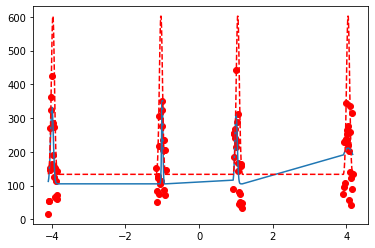

[[-3.995523917745147, 0.008132891100665875, 0.03782126785372626], [-0.9994592290823423, 0.005975250952278082, 0.01688351604312302], [1.0055694966414506, 0.009319723059882792, 0.032710043169143]]
[[Model]]
    (Model(constant) + Model(gaussian, prefix='peak0_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 184
    # data points      = 8
    # variables        = 4
    chi-square         = 63063.8969
    reduced chi-square = 15765.9742
    Akaike info crit   = 79.7796975
    Bayesian info crit = 80.0974637
[[Variables]]
    c:                258.028685 +/- 204.413694 (79.22%) (init = 128)
    peak0_amplitude:  5.83333333 +/- 430.272786 (7376.10%) (init = 50)
    peak0_center:    -3.93050323 +/- 2.66864588 (67.90%) (init = -3.995524)
    peak0_sigma:      0.03769521 +/- 1.16435981 (3088.88%) (init = 0.04166667)
    peak0_fwhm:       0.08876543 +/- 2.74185777 (3088.88%) == '2.3548200*peak0_sigma'
    peak0_height:     61.7363223 +/- 2673.81522 (4331.02%) == '

In [18]:
quantinuumRun = identify_peaks(2.5, 1.5, 3, [11, 11, 22], [5, 2, 1], maxEigenvalue = 5, scanWidths = [0.5, 0.125], backend = backendPerth)

In [19]:
print(quantinuumRun)

[[[-3.9305032318226707, 2.668645883799691], [-0.9953081910994503, 0.004806173017115744], [1.009021444976844, 0.0036874513263561413]], [[-3.9698089187896155, 0.012569543832796185, 0.07682657885790103], [-1.0359084950474207, 0.030328416919779094, 0.045572331026961635], [1.0512475291564272, nan, 0.020461999570336634], [4.046681037225451, nan, 0.01864886126521463]], array([ 16.,  53.,  55., 145., 152., 270., 323., 363., 165., 426., 191.,
       286., 154., 274., 125.,  65., 152., 115.,  62.,  72.,  60., 142.,
       152.,  51.,  84., 129., 123., 306.,  76., 217., 106., 114., 110.,
       115., 278., 352., 323., 236., 204., 236.,  87.,  73., 205., 145.,
        91., 257., 185., 254., 240., 268., 215., 442., 231., 288., 143.,
       311., 168.,  81.,  45.,  75.,  52.,  39., 164., 157.,  49.,  33.,
        76.,  95., 229., 232., 108., 344., 239., 234., 265., 253., 277.,
       219.,  57., 203., 141., 259., 335., 123.,  43., 314.,  90., 135.]), [-4.0948089187896155, -4.082904156884854, -4.0709

In [3]:
# quantinuumRunIDs = ['d205a92c6561492d947b9bbb5f2f37dd-16478414206090186', 'd603066ea70a440fb90a44d0918a1a09-16478458216059048', '7bc15c9e83074745996877256e302a1b-16478532115534074']
# quantinuumRunIDs = ['d205a92c6561492d947b9bbb5f2f37dd-16478414206090186', 'd603066ea70a440fb90a44d0918a1a09-16478458216059048', '24bea523dd184b3380f3bc4b0a15716b-16480113778964682']
quantinuumRunIDs = ['d205a92c6561492d947b9bbb5f2f37dd-16478414206090186', 'd603066ea70a440fb90a44d0918a1a09-16478458216059048', '797186127165467ea1e7ec072253203b-16484408538306303']
quantinuumRunRetrieval = identify_peaks(2.5, 1.5, 3, [11, 11, 22], [5, 2, 4], maxEigenvalue = 5, scanWidths = [0.5, 0.125], jobIDs = quantinuumRunIDs, backend = backendPerth)

first run job id: d205a92c6561492d947b9bbb5f2f37dd-16478414206090186
[[162.0, 250.2, 153.4, 177.2, 281.6, 102.6, 304.2, 103.6, 129.0, 250.6, 93.2]]
[[-4.0, -1.0, 1.0, 4.0]]
second run job id: d603066ea70a440fb90a44d0918a1a09-16478458216059048
[[-4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.8999999999999999, -0.7999999999999999, -0.7, -0.6, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4]]


C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


[[[-3.9699595954211793, 0.01271090133637225, 0.07361831300891797], [-1.0430873394170193, 0.15203873750450847, 0.031035320550017356], [1.0543693246160557, 0.024360100573570253, 0.03788498915925903], [4.046028615183631, nan, 0.020019419922006107]]]
third run job id: 797186127165467ea1e7ec072253203b-16484408538306303
4 88 88
[[[-3.986777856833487, 0.0037925662766943704, 0.034810047971715066], [-0.99677291219123, 0.002362519476289287, 0.029133462133115837], [1.0092781996655225, 0.003948157965760015, 0.035584655781134636], [4.0067172469700125, 0.006109791665183098, 0.03459213932097996]]]


In [7]:
for i, j in zip(quantinuumRunRetrieval["secondDual"][0][0],quantinuumRunRetrieval["secondDual"][1][0]):
    print(i, j)

177.0 -4.5
144.0 -4.4
147.5 -4.3
87.5 -4.2
160.5 -4.1
268.0 -4.0
220.5 -3.9
151.5 -3.8
88.5 -3.7
107.0 -3.6
128.5 -1.5
231.0 -1.4
164.5 -1.3
218.5 -1.2
188.5 -1.1
252.0 -1.0
401.0 -0.8999999999999999
140.5 -0.7999999999999999
74.0 -0.7
96.0 -0.6
144.0 0.5
130.0 0.6
94.0 0.7
89.0 0.8
138.0 0.9
320.5 1.0
389.0 1.1
109.0 1.2000000000000002
95.5 1.3
40.0 1.4
150.5 3.5
73.5 3.6
106.5 3.7
79.5 3.8
127.5 3.9
343.5 4.0
208.0 4.1
118.0 4.2
142.0 4.3
59.5 4.4


In [72]:
fourRunIDs = ["61bd8c84034e4ca08c9cbf8f423b0055-16486212922403014", "78fe1d645d4947b3bb8b981b099a2e53-16486239991218922", "8eff8da6f7524639867bbcf2d227d351-16486260382894452"]
fourRuns = identify_peaks(2.5, 1.5, 3, [11, 11, 22], [5, 2, 4], maxEigenvalue = 5, scanWidths = [0.5, 0.125],jobIDs = fourRunIDs, repetitions = 30, backend = backendPerth)
with open('Redundancy4.pickle', 'wb') as file:
    pickle.dump(fourRuns, file)

first run job id: 61bd8c84034e4ca08c9cbf8f423b0055-16486212922403014
[[131.0, 289.8, 78.8, 82.6, 287.2, 117.6, 313.6, 164.0, 89.8, 290.2, 77.2], [149.0, 372.8, 126.0, 128.4, 278.4, 85.4, 332.6, 188.4, 147.8, 285.0, 89.0], [142.4, 324.2, 100.2, 88.4, 276.0, 159.4, 289.6, 117.6, 118.0, 280.2, 138.4], [133.6, 317.4, 175.6, 125.2, 357.6, 118.0, 269.2, 145.6, 149.0, 333.8, 155.8], [135.8, 456.0, 95.4, 106.2, 314.0, 81.4, 315.0, 141.6, 206.2, 268.8, 211.4], [108.6, 246.6, 141.6, 119.6, 312.2, 170.2, 292.2, 152.4, 83.6, 297.2, 117.8], [174.6, 290.4, 110.6, 149.4, 331.0, 100.6, 295.6, 150.6, 125.2, 248.4, 129.4], [137.0, 353.8, 93.8, 83.2, 304.8, 233.0, 308.2, 135.8, 132.4, 237.4, 128.0], [132.2, 258.8, 142.0, 117.4, 280.2, 108.2, 290.4, 166.4, 113.6, 273.0, 109.6], [130.8, 265.8, 156.2, 132.4, 297.0, 120.8, 259.2, 113.0, 153.8, 293.6, 121.6], [128.6, 261.6, 133.4, 108.0, 297.0, 118.8, 282.2, 83.6, 109.6, 269.8, 138.8], [81.4, 262.6, 115.6, 111.6, 243.2, 228.0, 280.2, 118.2, 124.2, 281.2, 161.

C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:1

[[[-3.9582944278319827, 0.04747761622619327, 0.029070279363758222], [-1.0240531273376203, 0.29366110227831227, 0.03302841576268868], [1.0428835038938253, nan, 0.019156044230954766], [4.007467399598745, 0.02601255835223643, 0.11449488539048601]], [[-1.0358934390744632, nan, 0.012208827174076745], [1.0461828121793602, 0.02436412085766168, 0.019103112832514854], [4.04148065386092, 0.019322245162720474, 0.03328667333018556]], [[-4.012307726247075, 0.0013302255016812998, 0.0062218799794696855], [-1.0367279438094625, nan, 0.02964453218818805], [1.006649339502168, 0.06427179523556925, 0.04129407561200414], [3.9551318682375163, nan, 0.03245162297852934]], [[-4.007208587304573, 0.020998121615281185, 0.1398310259803215], [-0.9974086355553506, 1.1457102414391899e-05, 0.000767864273378327], [1.0170377777428015, 0.47143872558861705, 0.019500872824757695], [3.963188557872746, 0.20259083008555703, 0.03759390484209085]], [[-4.040564645084077, nan, 0.02437714016130965], [-1.0329780938297852, nan, 0.024

C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


4 88 88
4 88 88
4 88 88
4 88 88


C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


4 88 88
4 88 88
4 88 88
4 88 88
4 88 88
4 88 88
3 88 88
4 88 88
4 88 88
3 88 88


C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


5 88 88
[[[-3.9818147901539005, 0.0032669245270542865, 0.02799830005354567], [-1.0006513600573608, 0.005155625357352677, 0.0325907327489172], [1.0006723948299734, 0.002826559366869281, 0.020185421179292687], [3.9958824020801487, 0.005127048666661054, 0.02724235045682631]], [[-0.9842052136692192, 0.007241873663103385, 0.042227427951912005], [1.01561957656332, 0.002594444406373127, 0.02839230527546739], [4.001476534205488, 0.005936022598699664, 0.032217028278254345]], [[-3.985671765113727, None, 0.04164803443364505], [-0.9871682291144346, None, 0.04164803443364505], [1.0078297931467155, None, 0.04164803443364505], [3.9973806649255437, None, 0.04164803443364505]], [[-3.989769767014937, None, 0.04164803443364505], [-0.9940069409176555, None, 0.04164803443364505], [1.0075806090060584, None, 0.04164803443364505], [3.997851529020278, None, 0.04164803443364505]], [[-3.991709363980327, None, 0.04164803443364505], [-0.993186033914067, None, 0.04164803443364505], [1.0114351068493348, None, 0.0416

In [ ]:
threeRuns = identify_peaks(2.5, 1.5, 3, [11, 11, 22], [5, 2, 3], maxEigenvalue = 5, scanWidths = [0.5, 0.125], repetitions = 30, backend = backendPerth)
with open('Redundancy3.pickle', 'wb') as file:
    pickle.dump(threeRuns, file)

In [ ]:
twoRuns = identify_peaks(2.5, 1.5, 3, [11, 11, 22], [5, 2, 2], maxEigenvalue = 5, scanWidths = [0.5, 0.125], repetitions = 30, backend = backendPerth)
with open('Redundancy2.pickle', 'wb') as file:
    pickle.dump(twoRuns, file)

In [13]:
toRun = list()
firstRunEnergies = np.linspace(-5, 5, 11)
for i in range(3):
    toRun.append(make_scan(2.5, 1.5, 3, firstRunEnergies, 3))
toRun = flatten(toRun)

jobManager.run(transpile(toRun, backend=backendQASM), backend=backendQASM, name = "multi dimension test", shots=1024)

In [51]:
ids = ["474b518e041a477e8ce34eac7920e50e-16486186316017895", "571beb0c067d4f1f836d8e529ef98713-1648619610834415", "ef0147fce3284f53a8240a89c9624b46-1648620028051905"]
repetitionTest = identify_peaks(2.5, 1.5, 3, [11, 11, 22], [5, 2, 2], maxEigenvalue = 5, scanWidths = [0.5, 0.125], jobIDs = ids, repetitions = 5, backend = backendQASM)

first run job id: 474b518e041a477e8ce34eac7920e50e-16486186316017895
[[151.6, 344.8, 151.8, 160.4, 310.4, 191.0, 381.0, 93.8, 79.6, 332.4, 129.4], [52.8, 323.4, 176.8, 105.2, 336.2, 177.2, 321.6, 128.6, 57.4, 349.6, 181.4], [132.4, 379.8, 97.6, 117.0, 362.0, 93.6, 295.0, 97.6, 136.4, 321.2, 141.6], [126.0, 325.4, 145.4, 88.0, 338.0, 124.8, 429.0, 115.8, 93.8, 330.6, 112.6], [98.0, 310.2, 67.0, 137.6, 370.8, 101.2, 348.6, 84.0, 169.6, 349.8, 73.2]]
[[-4.0, -1.0, 1.0, 4.0], [-4.0, -1.0, 1.0, 4.0], [-4.0, -1.0, 1.0, 4.0], [-4.0, -1.0, 1.0, 4.0], [-4.0, -1.0, 1.0, 4.0]]
second run job id: 571beb0c067d4f1f836d8e529ef98713-1648619610834415
[[-4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.8999999999999999, -0.7999999999999999, -0.7, -0.6, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4], [-4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -1.5, -1.4, -1.3, -1.2, -1.1,

C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:1

[[[-4.033060937303556, 0.08300907249078247, 0.032748792954563274], [-1.0104582010171925, nan, 0.007342646049794718], [1.0469654991954496, 0.05132487435398749, 0.026311085822920216], [3.9620332334122876, 0.05682778121594815, 0.035721443534612984]], [[-4.008934252681675, nan, 0.012405941657986433], [-1.0346653888026753, nan, 0.029387281862716552], [0.9664588290339228, 0.009331277080564325, 0.012121632305095956], [3.9552034940393686, nan, 0.020883146616940115]], [[-3.95778116562043, nan, 0.01848519443225423], [-1.0442561125374152, nan, 0.018144546740259185], [1.0483551929767003, 0.19586343600594933, 0.029246396918780948], [4.041524256195281, nan, 0.022803782494552338]], [[-4.003318336728945, 0.01717903171502822, 0.05399682563554757], [-1.0383344915633335, nan, 0.021001649804364836], [1.0176850568383178, 0.07745342488745038, 0.03686165905238459], [3.975010163078789, 0.024599606684978542, 0.047266444137082364]], [[-3.995299680809598, 0.0179871417484659, 0.04259595595556667], [-1.01693275601

C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


[[[-4.006744336349717, 0.004999040700815425, 0.023189718447168106], [-0.9921378386335198, 0.006464552186250597, 0.02903803411010092], [1.003260638840387, 0.006809397277582649, 0.03751044816709968], [3.992327448644204, 0.0055342778206531, 0.029996240185620374]], [[-0.9944758747976927, None, 0.04164803443364505], [1.0043080613329884, None, 0.04164803443364505], [4.005779876660027, None, 0.04164803443364505]], [[-4.001306230502102, 0.00460022194718288, 0.024573438009389215], [-0.9935730728897592, 0.007375198915230638, 0.030567219666237808], [1.0091160089745246, 0.006034155734528706, 0.02507943209614691], [3.9932451122710644, 0.0032431698822085807, 0.014072680513258162]], [[-3.9857016989319876, 0.005038772937022206, 0.03126766321328053], [-1.0064129533624508, 0.004700174524441259, 0.023682592386335577], [1.0008553382220335, 0.0046710526818282624, 0.0247993026843933], [4.001639494161157, 0.00457732322498484, 0.026072833993965802]], [[-3.999385965030268, 0.0065675438791255505, 0.027732532377

In [ ]:
for i, j in zip(repetitionTest['thirdDual'][0], repetitionTest['thirdDual'][1]):
    for k, l in zip(i, j):
        print(k, l)

In [74]:
for i in fourRuns['finalPeaks']:
    temp = list()
    for j in i:
        temp.append(j[0])
    print(temp)

[-3.9818147901539005, -1.0006513600573608, 1.0006723948299734, 3.9958824020801487]
[-0.9842052136692192, 1.01561957656332, 4.001476534205488]
[-3.985671765113727, -0.9871682291144346, 1.0078297931467155, 3.9973806649255437]
[-3.989769767014937, -0.9940069409176555, 1.0075806090060584, 3.997851529020278]
[-3.991709363980327, -0.993186033914067, 1.0114351068493348, 4.003531117973655]
[-3.9830996157196203, -0.9995884431235953, 1.0114539002253937, 4.0040268939809245]
[-3.9836539665354076, -0.9900681756741354, 1.0062610122209152, 3.9964437009823497]
[-2.566878972146037, -0.9926007634841626, 0.0021435219463819674, 1.0057248413461697]
[-0.9900407429318561, 1.0051202857317842, 6.036198847034001]
[-3.9877957109265365, -0.9930760755073311, 1.0043716635470679, 4.000644360167598]
[-2.9760271594752608, -0.9864279167596137, 1.0063177869209863, 4.008822197986171]
[-0.9939024085107466, 1.0103433835330529, 3.998626055256494]
[-3.993023472983527, 1.0067352054999432, 4.003217575200004]
[-2.04205742281574

In [11]:
noiselessIDs = ["3f58488a0bae41a29b59aacf48c30372-16491156566330135", 'd603066ea70a440fb90a44d0918a1a09-16478458216059048', '797186127165467ea1e7ec072253203b-16484408538306303']
quantinuumRunRetrieval = identify_peaks(2.5, 1.5, 3, [11, 11, 22], [10, 2, 4], maxEigenvalue = 5, scanWidths = [0.5, 0.125], jobIDs = noiselessIDs, backend = backendQASM)

first run job id: 3f58488a0bae41a29b59aacf48c30372-16491156566330135
[[98.3, 342.5, 81.3, 88.3, 373.0, 65.0, 320.7, 154.0, 131.2, 358.4, 176.1]]
[[-4.0, -1.0, 1.0, 4.0]]
second run job id: d603066ea70a440fb90a44d0918a1a09-16478458216059048
[[-4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.8999999999999999, -0.7999999999999999, -0.7, -0.6, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4]]


C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


[[[-3.9699595954211793, 0.01271090133637225, 0.07361831300891797], [-1.0430873394170193, 0.15203873750450847, 0.031035320550017356], [1.0543693246160557, 0.024360100573570253, 0.03788498915925903], [4.046028615183631, nan, 0.020019419922006107]]]
third run job id: 797186127165467ea1e7ec072253203b-16484408538306303
4 88 88
[[[-3.986777856833487, 0.0037925662766943704, 0.034810047971715066], [-0.99677291219123, 0.002362519476289287, 0.029133462133115837], [1.0092781996655225, 0.003948157965760015, 0.035584655781134636], [4.0067172469700125, 0.006109791665183098, 0.03459213932097996]]]


In [4]:
fixParamIDs = ["773c86460a6047609fdb96a325b97fd4-16496586007497926","93d54db12f9549dc8bcb4320b9c81996-16496586377701151","cad17d17275248cc8ec5bf974aa2c740-16496587210295777"]
fixedParams = identify_peaks(2.5, 1.5, 3, [11, 11, 22], [5, 2, 4], maxEigenvalue = 5, scanWidths = [0.5, 0.125], jobIDs = fixParamIDs, backend = backendPerth)

first run job id: 773c86460a6047609fdb96a325b97fd4-16496586007497926
[[115.6, 267.6, 96.0, 132.0, 316.6, 155.8, 326.4, 87.8, 101.4, 244.2, 177.2]]
[[-4.0, -1.0, 1.0, 4.0]]
second run job id: 93d54db12f9549dc8bcb4320b9c81996-16496586377701151
[[-4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.8999999999999999, -0.7999999999999999, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4, 1.5, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5]]


C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


[[[-3.9800779443959184, 0.035039501194690514, 0.044214030071530755], [-0.995307667494594, 7.013864151417273e-05, 0.001344795288232184], [1.0307028905221762, 0.0350293734381854, 0.04346291095395784], [4.045558161962251, 0.014810704402320839, 0.03259831988305688]]]
third run job id: cad17d17275248cc8ec5bf974aa2c740-16496587210295777
4 88 88
[[[-3.9960967051968277, 0.00483680510688586, 0.03551640618422444], [-0.9888144233180767, 0.005995903583449149, 0.03358515098460377], [1.0018470431336195, 0.004287303133665236, 0.022439984742835817], [3.99699395222641, 0.004811386007253417, 0.029745284710199715]]]


In [33]:
for i, j in zip(fixedParams['thirdDual'][0], fixedParams['thirdDual'][1]):
    for k, l in zip(i, j):
        print(k, l)

101.0 -4.105077944395918
186.75 -4.093173182491157
110.5 -4.081268420586395
108.0 -4.069363658681633
172.25 -4.057458896776871
193.75 -4.045554134872109
211.5 -4.033649372967347
270.25 -4.021744611062585
288.5 -4.0098398491578235
301.25 -3.9979350872530612
265.25 -3.9860303253482994
253.25 -3.9741255634435375
200.25 -3.9622208015387756
257.25 -3.950316039634014
186.0 -3.938411277729252
131.75 -3.92650651582449
131.75 -3.9146017539197278
108.25 -3.902696992014966
130.75 -3.890792230110204
186.0 -3.878887468205442
117.0 -3.8669827063006803
219.75 -3.8550779443959184
246.25 -1.120307667494594
134.75 -1.1084029055898321
181.75 -1.0964981436850703
167.5 -1.0845933817803082
135.5 -1.0726886198755463
129.25 -1.0607838579707844
172.5 -1.0488790960660226
142.5 -1.0369743341612607
278.5 -1.0250695722564989
241.75 -1.0131648103517368
289.75 -1.001260048446975
307.0 -0.989355286542213
268.25 -0.9774505246374512
249.0 -0.9655457627326892
290.0 -0.9536410008279274
191.75 -0.9417362389231654
112.0 -0

In [31]:
for i in fixedParams['firstDual'][0][0]:
    print(i)

115.6
267.6
96.0
132.0
316.6
155.8
326.4
87.8
101.4
244.2
177.2


In [5]:
exactMatchIDs = ["88abecdbd6184d0681e555676a52a06b-1649890550213251", "7252c0af2d164c78ad4abb4835a036a0-16498906088526008", "2f4753d469f9434f82130b6d61ed1f25-16498906520504653"]
exactMatch = identify_peaks(2.5, 1.5, 3, [11, 11, 22], [5, 2, 1], maxEigenvalue = 5, scanWidths = [0.5, 0.125], backend = backendPerth)

first run job id: 88abecdbd6184d0681e555676a52a06b-1649890550213251
[[187.4, 252.6, 81.0, 149.6, 372.6, 117.0, 282.6, 142.6, 196.6, 334.0, 132.2]]
[[-4.0, -1.0, 1.0, 4.0]]
second run job id: 7252c0af2d164c78ad4abb4835a036a0-16498906088526008
[[-4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.8999999999999999, -0.7999999999999999, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4, 1.5, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5]]


C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\anaconda3\envs\threeten\lib\site-packages\uncertainties\core.py:171: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


[[[-3.9515775657548957, nan, 0.017612037382367787], [-1.0532238211768963, 0.04537878025507121, 0.03675422073720358], [1.0419566195401484, 0.102852469449891, 0.02511430609999822], [3.9970889651510433, 1.981030588417578e-05, 0.0009992223550995133]]]
third run job id: 2f4753d469f9434f82130b6d61ed1f25-16498906520504653
[[[-3.995203587875194, 0.01087670926833973, 0.03694225431599786], [-0.983918551251858, 0.006079490884572616, 0.027164290924881623], [1.0018504809163793, 0.0024368183374262587, 0.013209582311780987], [4.0104158274542865, 0.0088585522770272, 0.036215184303298786]]]


In [7]:
for i, j in zip(exactMatch['secondDual'][0], exactMatch['secondDual'][1]):
    for k, l in zip(i, j):
        print(k, l)

110.0 -4.5
116.0 -4.4
149.0 -4.3
57.0 -4.2
85.0 -4.1
268.5 -4.0
212.5 -3.9
119.0 -3.8
110.0 -3.7
101.5 -3.6
178.5 -3.5
61.0 -1.5
197.0 -1.4
157.0 -1.3
103.0 -1.2
290.5 -1.1
256.0 -1.0
122.5 -0.8999999999999999
183.5 -0.7999999999999999
279.5 -0.7
174.5 -0.6
124.5 -0.5
190.5 0.5
296.0 0.6
133.5 0.7
265.0 0.8
66.0 0.9
285.5 1.0
172.0 1.1
200.0 1.2000000000000002
87.0 1.3
92.5 1.4
132.0 1.5
112.0 3.5
40.5 3.6
70.0 3.7
163.5 3.8
116.0 3.9
312.0 4.0
97.0 4.1
161.5 4.2
157.5 4.3
136.0 4.4
126.0 4.5


In [9]:
for i in exactMatch['firstDual'][0][0]:
    print(i)

187.4
252.6
81.0
149.6
372.6
117.0
282.6
142.6
196.6
334.0
132.2


In [4]:
twoStateRunIDs = ["9b7b358099b24265a38d309bf43ce98d-16611027522715662", "ff8f8a407f324948bf050b968ea906a4-16611034649173205", "e0a651581db34d41a63291522efd9724-16611045530229166"]
twoStateRun = identify_peaks(2.5, 1.5, 5, [11, 11, 22], [50, 20, 10], jobIDs=twoStateRunIDs,maxEigenvalue=5, backend=backendPerth)

first run job id: 9b7b358099b24265a38d309bf43ce98d-16611027522715662
[[36.18, 186.04, 28.1, 28.08, 174.26, 17.72, 211.98, 26.24, 37.76, 185.34, 48.62]]
[[-4.0, -1.0, 1.0, 4.0]]
second run job id: ff8f8a407f324948bf050b968ea906a4-16611034649173205
[[-4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.8999999999999999, -0.7999999999999999, -0.7, -0.6, -0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4, 1.5, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5]]
[[[-3.994870784372826, None, 0.04137024727623352], [-1.031199232297047, None, 0.022757994840088155], [1.0315883286378085, None, 0.02888422190864172], [3.9642317191725405, None, 0.026897846225764493]]]
third run job id: e0a651581db34d41a63291522efd9724-16611045530229166
[[[-3.988790074490031, None, 0.023965378898355108, array([ 32.        ,  32.        ,  32.        ,  32.        ,
        32.00000003,  32.00001328,  32.0023767 ,  32.15852827,
        35.94071

In [8]:
testRange = np.linspace(0, 5, 51)
controlledTwoStateTest = run_controlled_two_state(4, 1, testRange, 2.5, 1.5, -1, 4, "xx", backend=backendQASM)

two state job 0e5409bd778d417c901b7075f6f91e21-16623429327933815
[0.45016077170418023, 0.39344262295081966, 0.23100303951367795, -0.019108280254777066, -0.27190332326283984, -0.39999999999999997, -0.4041095890410958, -0.5016501650165017, -0.14532871972318356, 0.05633802816901401, 0.19935691318327953, 0.6730769230769232, 0.6645161290322582, 0.628930817610063, 0.4066666666666665, 0.10738255033557031, -0.07453416149068337, -0.3897058823529411, -0.5454545454545454, -0.7335640138408304, -0.6558441558441559, -0.343042071197411, -0.15576323987538954, 0.13953488372093026, 0.47651006711409405, 0.4522292993630572, 0.3848797250859106, 0.2953020134228188, 0.23948220064724923, -0.17228464419475653, -0.3141025641025641, -0.5472972972972974, -0.4548736462093862, -0.34246575342465757, -0.21086261980830662, 0.21621621621621623, 0.43887147335423204, 0.6053639846743295, 0.5016949152542374, 0.41967213114754087, 0.07894736842105265, -0.032786885245901676, -0.4169184290030211, -0.6357615894039734, -0.506578

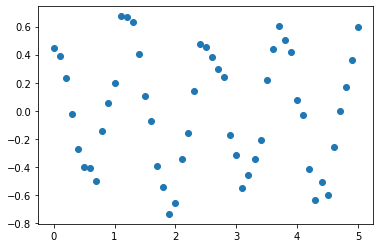

In [12]:
plt.scatter(testRange.tolist(), controlledTwoStateTest[0])

two state job d1f34bf997b54c13a46596891bc4a64b-16623431593915415
[0.0, 0.0546875, -0.02290076335877872, -0.021352313167259773, 0.028880866425992746, 0.17670682730923692, 0.013937282229965209, -0.1412639405204461, -0.14814814814814814, -2.220446049250313e-16, -0.16091954022988508, 0.10108303249097461, 0.03649635036496335, 0.07746478873239426, 0.014760147601476037, 0.21014492753623193, 0.08540925266903909, 0.09558823529411775, -0.0434782608695653, 0.03404255319148919, -0.015209125475285079, -0.03041825095057038, 0.028368794326241176, 0.1853281853281854, 0.0, 0.11857707509881443, 0.14893617021276606, 0.05128205128205132, -0.11023622047244097, 0.06593406593406614, -0.021739130434782483, -0.04411764705882343, -0.03200000000000003, -0.035587188612099696, -0.050000000000000044, 0.029090909090909056, 0.036101083032491044, 0.15384615384615374, -0.02307692307692305, 0.006968641114982521, 0.04528301886792452, -0.1274900398406374, -0.08461538461538459, -0.04285714285714293, -0.06405693950177921, -

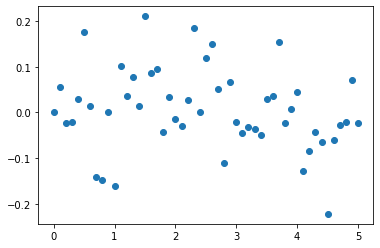

In [13]:
controlledTwoStateTest5 = run_controlled_two_state(5, 1, testRange, 2.5, 1.5, -1, 4, "xx", backend=backendQASM)
plt.scatter(testRange.tolist(), controlledTwoStateTest5[0])

two state job 8bed196de8b34b209c24fceb4ea59ef4-16623432257883682
[0.3539094650205761, 0.26819923371647514, 0.06920415224913512, -2.220446049250313e-16, -0.1278195488721805, -0.16487455197132617, -0.4980842911877395, -0.3866171003717471, -0.21305841924398639, -0.025806451612903125, 0.1376811594202898, 0.26811594202898537, 0.4609665427509293, 0.3602941176470589, 0.2696629213483146, 0.2941176470588234, 0.0347222222222221, -0.20195439739413684, -0.4176706827309236, -0.26819923371647514, -0.22535211267605643, -0.2164179104477611, 0.14229249011857714, 0.1333333333333333, 0.32352941176470584, 0.5107913669064748, 0.26086956521739135, 0.29166666666666674, -0.06644518272425248, -0.20930232558139544, -0.2491582491582493, -0.41877256317689543, -0.272, -0.111111111111111, -0.1231884057971015, 0.10400000000000009, 0.0826446280991735, 0.2681159420289856, 0.32055749128919864, 0.2071713147410359, 0.04580152671755733, 0.08791208791208782, -0.2442748091603053, -0.3346303501945525, -0.33948339483394835, -

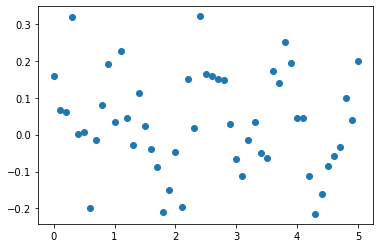

In [14]:
controlledTwoStateTestRedundancy4 = run_controlled_two_state(4, 3, testRange, 2.5, 1.5, -1, 4, "xx", backend=backendQASM)
plt.scatter(testRange.tolist(), controlledTwoStateTestRedundancy4[0])

two state job 28a78defe98c47c892980c3bfdeb8cd7-1662343451725674
[-0.07713498622589543, -0.046620046620046596, 0.00515463917525788, -0.015873015873015817, 0.22506393861892593, 0.3170731707317074, 0.263013698630137, 0.19024390243902434, 0.09090909090909083, -0.09547738693467323, -0.24137931034482762, -0.4205128205128205, -0.20283018867924524, -0.4041994750656168, -0.21568627450980388, -0.17042606516290743, 0.06896551724137923, 0.20151133501259455, 0.3641160949868074, 0.36692506459948326, 0.49874055415617113, 0.4432717678100264, 0.2639593908629443, 0.03030303030303033, -0.10554089709762532, -0.16836734693877542, -0.18372703412073488, -0.20999999999999996, -0.00995024875621886, 0.05994550408719346, 0.11764705882352944, 0.06896551724137945, 0.10106382978723416, -0.03015075376884413, -0.110843373493976, -0.02380952380952378, 0.11428571428571432, -0.4018264840182648, -0.10268948655256721, -0.05626598465473137, -0.009852216748768461, 0.17346938775510212, 0.3065693430656935, 0.31805929919137466

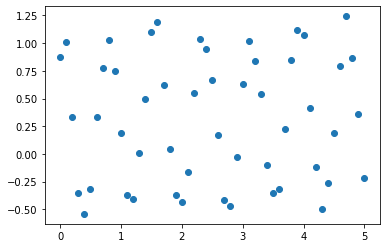

In [20]:
controlledTwoStateTestHighRedundancy = run_controlled_two_state(4, 30, testRange, 2.5, 1.5, -1, 4, "xx", backend=backendQASM, jobID="28a78defe98c47c892980c3bfdeb8cd7-1662343451725674")
plt.scatter(testRange.tolist(), controlledTwoStateTestHighRedundancy[0])

two state job 07b42d2b8eb34700be0d25691e9f842e-16623440112353704
[-0.08783783783783772, 0.14869888475836435, 0.14864864864864868, 0.04026845637583909, -0.050724637681159535, -0.027874564459930418, -0.11985018726591762, 0.03344481605351168, -0.021201413427561766, -0.02266288951841361, -0.027210884353741527, 1.6653345369377348e-16, -0.06691449814126393, -0.06369426751592355, 0.040000000000000036, -0.06896551724137939, -0.0546075085324233, 0.15841584158415833, 0.0, 0.0, 0.06498194945848368, -0.07096774193548394, 0.025316455696202556, -0.05185185185185187, 0.0766550522648084, 0.07868852459016384, 0.007547169811320753, 0.0692041522491349, -0.08480565371024745, -0.09459459459459468, 0.046666666666666856, -0.16370106761565834, 0.21323529411764697, 0.06338028169014076, -0.014545454545454473, 0.020134228187919323, 0.12925170068027225, 0.028673835125448077, -0.04635761589403958, -0.006688963210702337, 0.1276595744680853, -0.040677966101694885, 0.006430868167202508, -0.03412969283276451, -0.04946

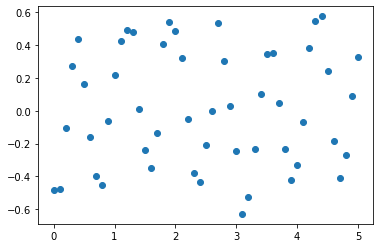

In [21]:
controlledTwoStateTestHighRedundancy2 = run_controlled_two_state(4, 30, testRange, 2.5, 1.5, -1, 4, "xx", backend=backendQASM)
plt.scatter(testRange.tolist(), controlledTwoStateTestHighRedundancy2[0])

two state job cced5091fcc14da2ac783a0863ac286a-16623446175161214


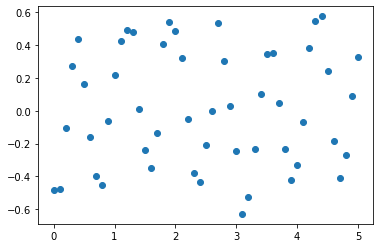

In [26]:
controlledTwoStateTestSymmetric = run_controlled_two_state(4, 30, testRange, 2, 1, -3, -1, "xx", backend=backendQASM)
plt.scatter(testRange.tolist(), controlledTwoStateTestHighRedundancy2[0])

two state job 5c147d43cba24e3285b9ad045b33421f-16623448196068614


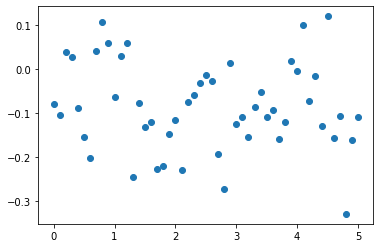

In [30]:
controlledTwoStateTestSymmetric2 = run_controlled_two_state(4, 30, testRange, 2, 1, -1, 3, "xx", backend=backendQASM, jobID="5c147d43cba24e3285b9ad045b33421f-16623448196068614")
plt.scatter(testRange.tolist(), controlledTwoStateTestSymmetric2[0])

two state job c1fa7e8f34ba41c0b71e49a027b5aad3-16623456345505123


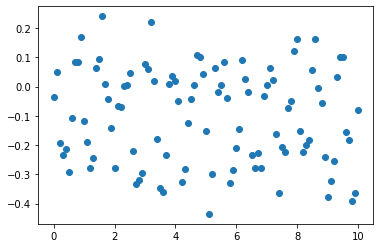

In [29]:
testRange2 = np.linspace(0, 10, 101).tolist()
controlledTwoStateTestVeryHighRedundancy = run_controlled_two_state(4, 100, testRange2, 2.5, 1.5, -1, 4, "xx", backend=backendQASM)
plt.scatter(testRange2, controlledTwoStateTestVeryHighRedundancy[0])

two state job 6fab6425569443c9a4c086e6d4206eb5-16623458133033655


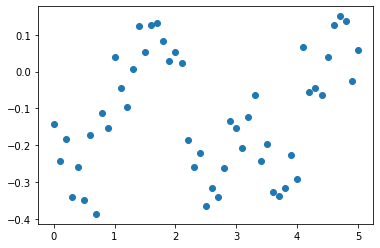

In [31]:
controlledTwoStateTestSymmetric3 = run_controlled_two_state(4, 30, testRange, 2, 1, -1, 3, "zz", backend=backendQASM)
plt.scatter(testRange.tolist(), controlledTwoStateTestSymmetric3[0])

two state job 3c1229f9aacf4870b3ff4faa3d2a1f49-1662345944374755


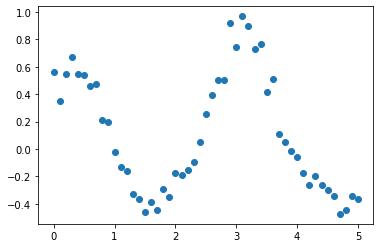

In [32]:
controlledTwoStateTestHighRedundancy3 = run_controlled_two_state(4, 30, testRange, 2.5, 1.5, -1, 4, "zz", backend=backendQASM)
plt.scatter(testRange.tolist(), controlledTwoStateTestHighRedundancy3[0])

two state job f8831599d4f740a99ec57b15bde83800-16623463620358655


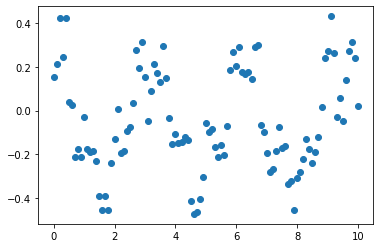

In [34]:
controlledTwoStateTestHighRedundancy4 = run_controlled_two_state(4, 30, testRange2, 2.5, 1.5, -1, 4, "zz", backend=backendQASM)
plt.scatter(testRange2, controlledTwoStateTestHighRedundancy4[0])

In [15]:
contTwoStateTest = run_cont_two_state_test(2, 10, 2.5, 1.5, -1, 4)
print(contTwoStateTest)
#test with ancilla ancilla measure for each cycle

two state job c0aded4c59c14b2580d1cb7d204d1f9d-16635639958588598


In [18]:
test = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
test.h(1)
test.measure(0, 0)
test.measure(1, 1)
test = [test, test]
test = transpile(test, backend=backendQASM)
job = jobManager.run(test, backend=backendQASM, name="test", shots=1024)

In [22]:
print(process_cont_test(contTwoStateTest, 2, 10))

382.0


In [23]:
contTwoStateTest2 = run_cont_two_state_test(3, 10, 2.5, 1.5, -1, 4)
print(process_cont_test(contTwoStateTest2, 3, 10))
#test with ancilla ancilla measure for each cycle

two state job 6222797a3a8e4152b50563d3469da423-16635653296861556
263.7


In [26]:
contTwoStateTest3 = run_cont_two_state_test(3, 10, 2.5, 1.5, -1, 4)
print(process_cont_test(contTwoStateTest3, 3, 10))
#test with one ancilla ancilla measure at end of entire thing

two state job 5d7bed901fa149a690c18fbce1ae84ce-16635655735485196
122.0


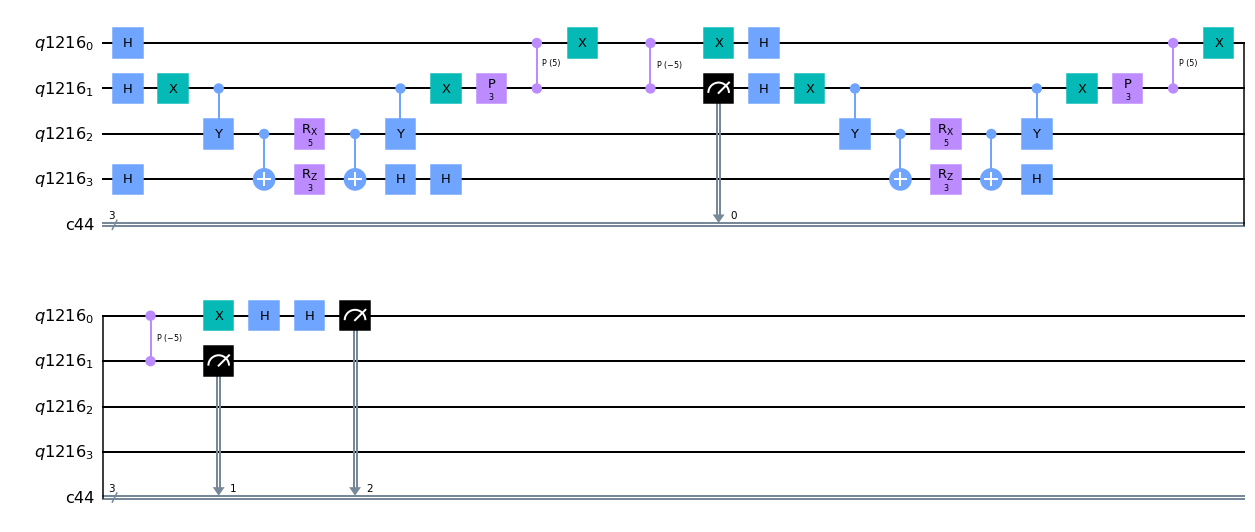

In [27]:
test = test_cont_two_state([1, 1], 2, -1, 4, 2.5, 1.5)
test.draw('mpl')

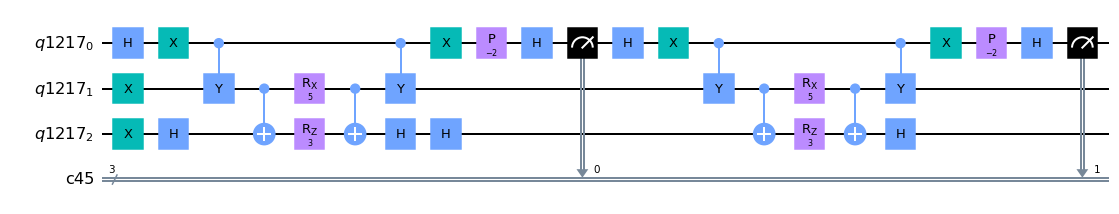

In [28]:
test = run_rodeo([1, 1], 2, -1, 2.5, 1.5)
test.draw('mpl')

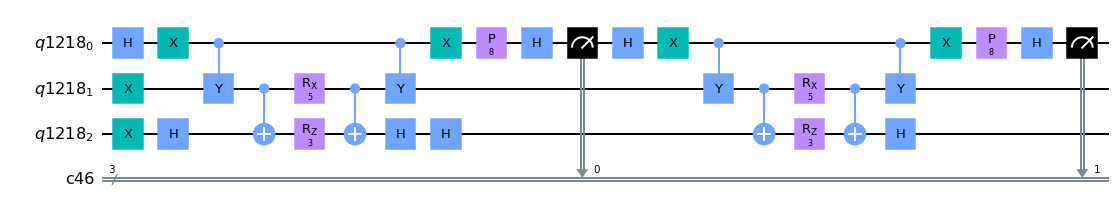

In [29]:
test = run_rodeo([1, 1], 2, 4, 2.5, 1.5)
test.draw('mpl')

Ancilla ancilla has extra Hadamard gates after each cycle; arena qubit doesn't

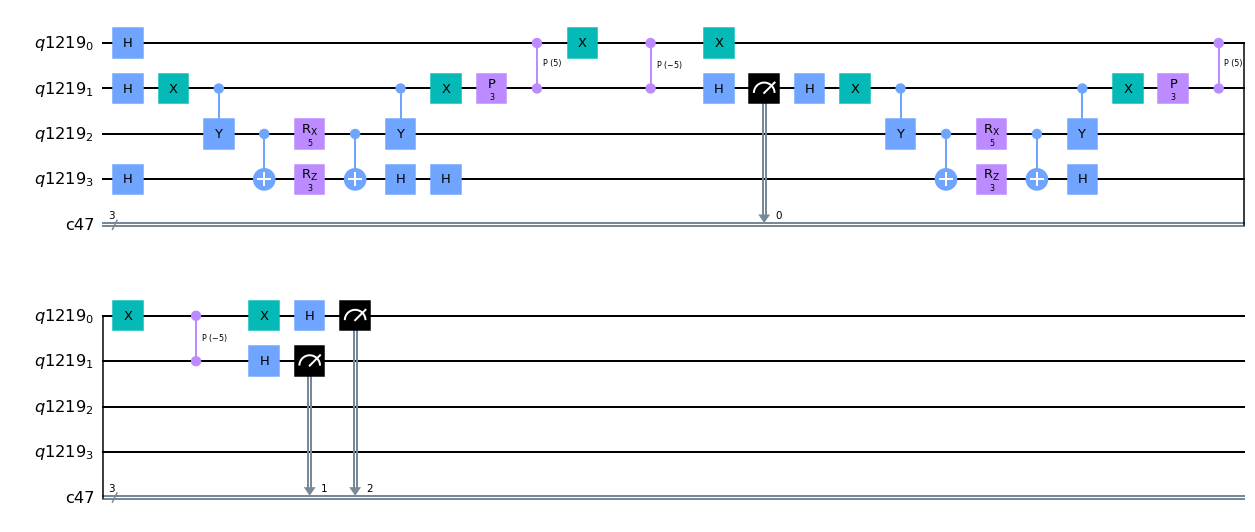

In [33]:
test = test_cont_two_state([1, 1], 2, -1, 4, 2.5, 1.5)
test.draw('mpl')

fixed

In [35]:
contTwoStateTest4 = run_cont_two_state_test(3, 10, 2.5, 1.5, -1, 4)
print(process_cont_test(contTwoStateTest4, 3, 10))
#test with one ancilla ancilla measure at end of entire thing and fixed Hadamard

two state job 21ef61731f584bc7b982fde4c16e2895-1663566002074095
332.9
two state job 4bae5b26ee8143809b283da93446f353-16635660373995807
380.8


In [36]:
contTwoStateTest5 = run_cont_two_state_test(2, 10, 2.5, 1.5, -1, 4)
print(process_cont_test(contTwoStateTest5, 2, 10))
contTwoStateTest6 = run_cont_two_state_test(4, 10, 2.5, 1.5, -1, 4)
print(process_cont_test(contTwoStateTest6, 4, 10))
contTwoStateTest7 = run_cont_two_state_test(5, 10, 2.5, 1.5, -1, 4)
print(process_cont_test(contTwoStateTest7, 5, 10))
#tests with one ancilla ancilla measure at end of entire thing and fixed Hadamard

two state job a44ce06f1e114b8caee913ff79dc80ea-16635661911743448
427.3
two state job df4af0042078484ca6ba68190ba3f45c-16635661989276211
313.0
two state job 886693ca9eca4ebeb5357a671028c5f7-1663566205025928
272.3


In [37]:
contTwoStateTest8 = run_cont_two_state_test(1, 100, 2.5, 1.5, -1, 4)
print(process_cont_test(contTwoStateTest8, 1, 100))

two state job 398f403a275a4dc78a419f3f3ce7567b-16635663775658548
679.22


In [38]:
contTwoStateTest9 = run_cont_two_state_test(10, 100, 2.5, 1.5, -1, 4)
print(process_cont_test(contTwoStateTest9, 10, 100))

two state job 3ca3d4fcb2794832a1fc651c340c88f0-16635664537346966
255.28


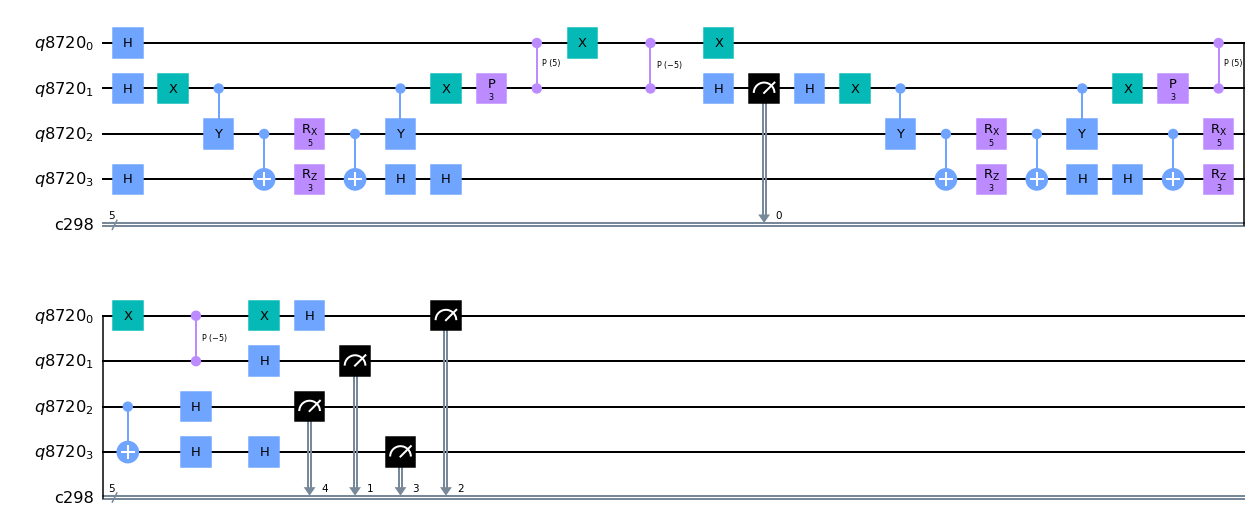

In [43]:
test = test_cont_two_state([1, 1], 2, -1, 4, 2.5, 1.5, 1)
test.draw('mpl')

added uncontrolled time evolution

two state job b05917671aeb468b9475aa6f8208d74d-16635679398269138


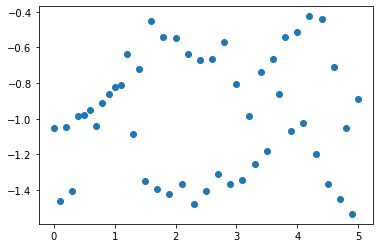

In [49]:
testRange = np.linspace(0, 5, 51)
contTwoStateTest10 = run_cont_two_state_test(5, 3, 2.5, 1.5, -1, 4, testRange, jobID="b05917671aeb468b9475aa6f8208d74d-16635679398269138")
plt.scatter(testRange, process_two_state_dual_test(contTwoStateTest10, 5, 51, 3)[0])

two state job 84c55ec7107e473f8f43330fc7da7c46-16635681671049116


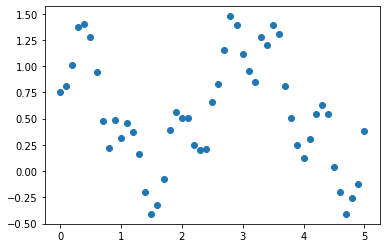

In [61]:
contTwoStateTest10 = run_cont_two_state_test(2, 3, 2.5, 1.5, -1, 4, testRange, jobID="84c55ec7107e473f8f43330fc7da7c46-16635681671049116")
plt.scatter(testRange, process_two_state_dual_test(contTwoStateTest10, 2, 51, 3)[0])

In [62]:
print(process_two_state_dual_test(contTwoStateTest10, 2, 51, 3)[0])

[0.7565823488469278, 0.8124909538283399, 1.0137785215941009, 1.3705274882844976, 1.4005241821200773, 1.2738674918417472, 0.9481667720162456, 0.48171089811610596, 0.22352853078284718, 0.4871374596565436, 0.31761196747599607, 0.4611211767181896, 0.3730177307440122, 0.16578671993911714, -0.19737142771015337, -0.4046446832072759, -0.32570515122622684, -0.07871581316255842, 0.3922440880549925, 0.5593607896044575, 0.5016476185614193, 0.5083448535145855, 0.24940076446312454, 0.20195784481498769, 0.20941921952495002, 0.659558771368955, 0.8285817108280877, 1.15175715631312, 1.4757030619079723, 1.3910922058395132, 1.1202459742169797, 0.9513390121925066, 0.8504684066425708, 1.2819929455719457, 1.2063413289219742, 1.3900995368227897, 1.3087774590328016, 0.8092270465233073, 0.5017025969926828, 0.2524537124165766, 0.1232677216923279, 0.30200258397932817, 0.5451322751380415, 0.6296763067612079, 0.5421881427335116, 0.041340316898283325, -0.20127480246796128, -0.40831224271848104, -0.2527950829269636, 

two state job 8dd396ad3a834196b936d1b2e9998549-16635688098851006


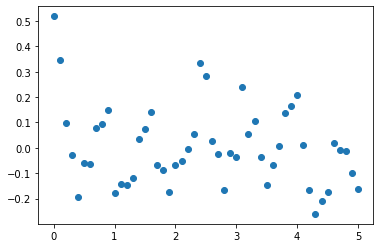

In [64]:
contTwoStateTest11 = run_cont_two_state_test(5, 5, 2.5, 1.5, -1, 4, testRange, jobID="8dd396ad3a834196b936d1b2e9998549-16635688098851006")
plt.scatter(testRange, process_two_state_dual_test(contTwoStateTest11, 5, 51, 5)[0])

two state job 6579cba09e9f41589e5d2db409ddecd4-1663569066481385


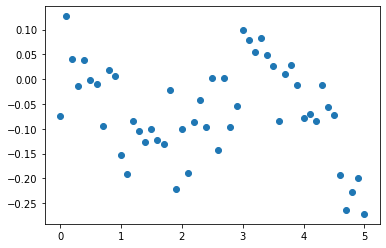

In [66]:
contTwoStateTest12 = run_cont_two_state_test(5, 30, 2.5, 1.5, -1, 4, testRange)
plt.scatter(testRange, process_two_state_dual_test(contTwoStateTest12, 5, 51, 30)[0])

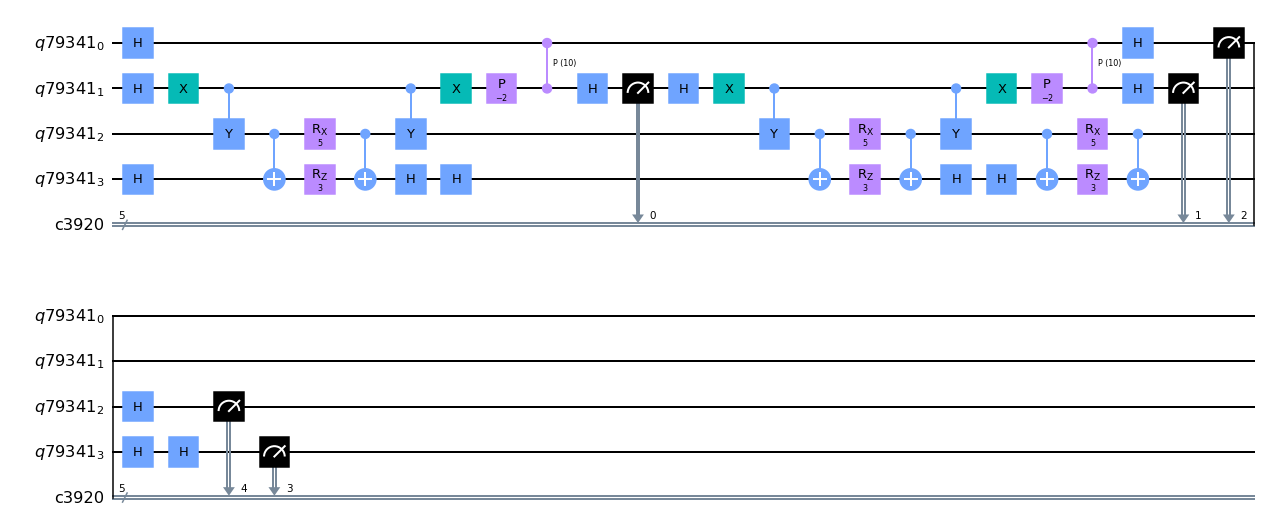

In [70]:
test = test_cont_two_state([1, 1], 2, -1, 4, 2.5, 1.5, 1)
test.draw('mpl')

moved to single phase gate

two state job b2b80443f5b842a89fc3dff1d92c602c-1663569659823159


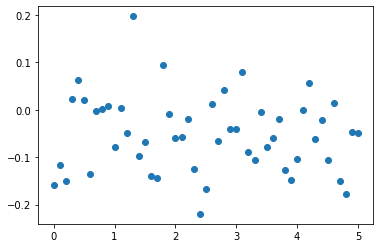

In [71]:
contTwoStateTest13 = run_cont_two_state_test(5, 30, 2.5, 1.5, -1, 4, testRange)
plt.scatter(testRange, process_two_state_dual_test(contTwoStateTest13, 5, 51, 30)[0])

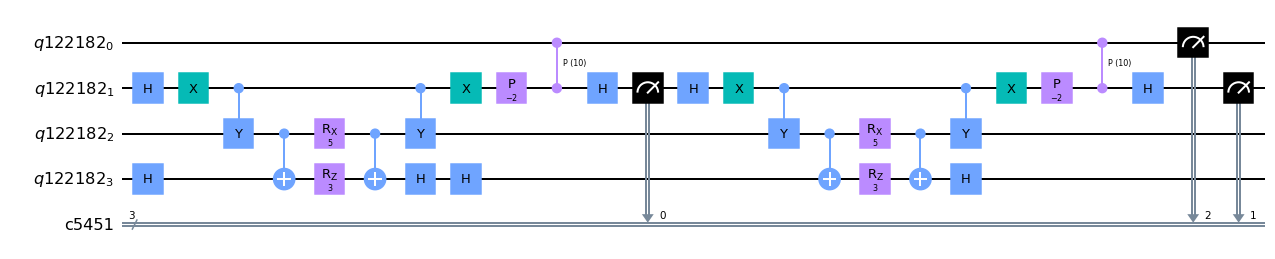

In [74]:
test = test_cont_two_state([1, 1], 2, -1, 4, 2.5, 1.5, 1)
test.draw('mpl')

In [75]:
contTwoStateTest14 = run_cont_two_state_test(3, 10, 2.5, 1.5, -1, 4, [0])
print(process_cont_test(contTwoStateTest14, 3, 10))

two state job 6cab8cbd452f40f5a920daca8478a737-16635913840221019
341.9


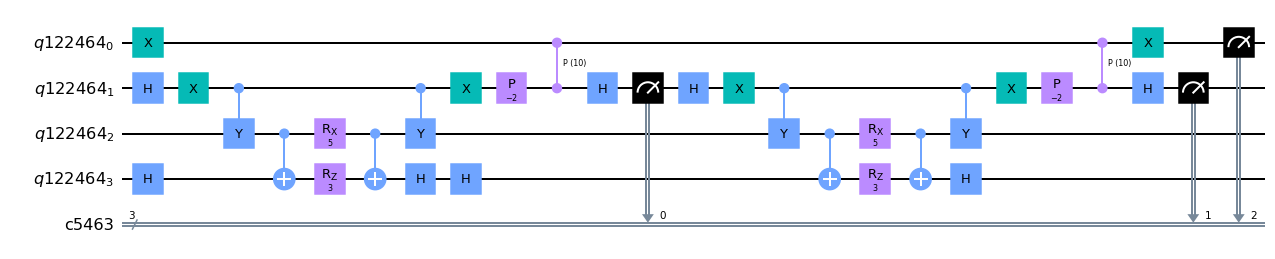

In [80]:
test = test_cont_two_state([1, 1], 2, -1, 4, 2.5, 1.5, 1)
test.draw('mpl')

In [82]:
contTwoStateTest15 = run_cont_two_state_test(3, 10, 2.5, 1.5, -1, 4, [0])
print(process_cont_test(contTwoStateTest15, 3, 10))

two state job 0d70bbbb043447d5a08ddb083d14b239-1663591630880096
367.2


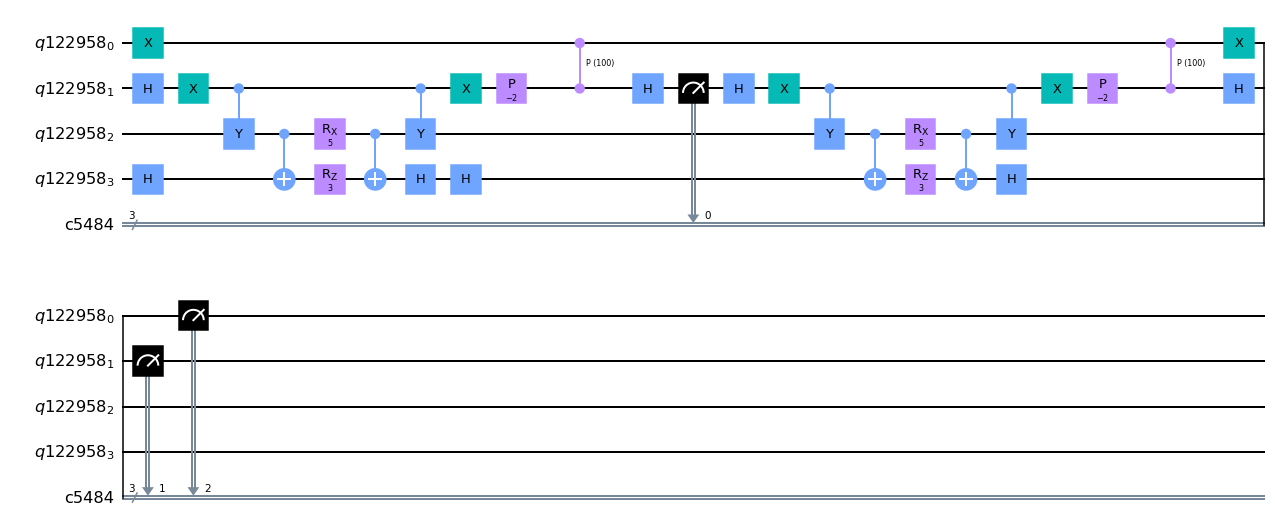

In [85]:
test = test_cont_two_state([1, 1], 2, -1, 4, 2.5, 1.5, 1)
test.draw('mpl')

In [86]:
contTwoStateTest15 = run_cont_two_state_test(3, 10, 2.5, 1.5, -1, 4, [0])
print(process_cont_test(contTwoStateTest15, 3, 10))

two state job ebeca57b55bc47d98f6818952bd4e71b-16635917068475907
86.6


In [89]:
test = test_cont_two_state([1, 1], 2, -1, 4, 2.5, 1.5, 1)
test.draw('mpl')
contTwoStateTest16 = run_cont_two_state_test(3, 10, 2.5, 1.5, -1, 4, [0])
print(process_cont_test(contTwoStateTest16, 3, 10))

two state job 0b49728d62aa4b3fa7dbb68aa0274d9c-16635918445931401
333.8


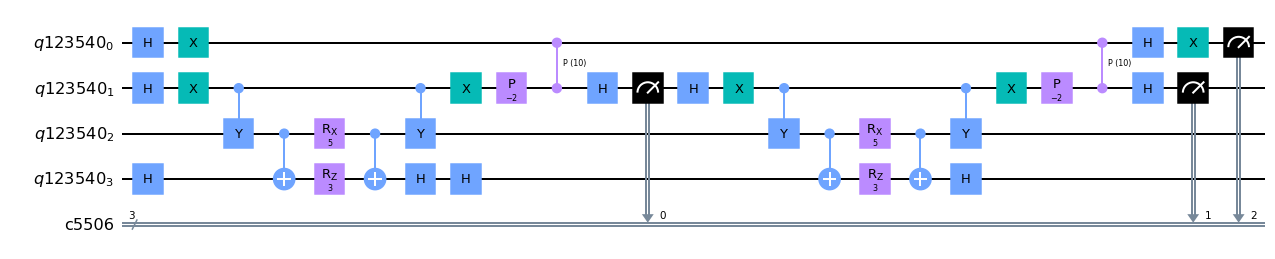

In [90]:
test = test_cont_two_state([1, 1], 2, -1, 4, 2.5, 1.5, 1)
test.draw('mpl')

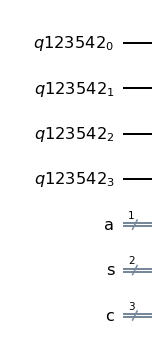

In [92]:
test = QuantumCircuit(QuantumRegister(4), ClassicalRegister(1, "a"), ClassicalRegister(2, "s"), ClassicalRegister(3, "c"))
test.draw('mpl')

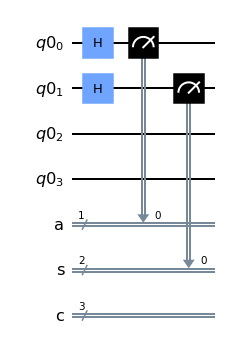

In [4]:
test = QuantumCircuit(QuantumRegister(4), ClassicalRegister(1, "a"), ClassicalRegister(2, "s"), ClassicalRegister(3, "c"))
test.h(0)
test.h(1)
test.measure([0,1], [0,1])
test.draw('mpl')

In [12]:
test = [test, test]
test = transpile(test, backend=backendQASM)
job = jobManager.run(test, backend=backendQASM, name="test", shots=1024)

QiskitError: 'No memory for experiment "0". Please verify that you either ran a measurement level 2 job with the memory flag set, eg., "memory=True", or a measurement level 0/1 job.'

In [6]:
test = transpile(test, backend=backendQASM)
testjob = backendQASM.run(test)

In [21]:
print(testjob.result().get_counts())
print(job.results().get_counts(0)['000 00 0'])

{'000 00 0': 1043, '000 00 1': 1027, '000 01 0': 953, '000 01 1': 977}
271


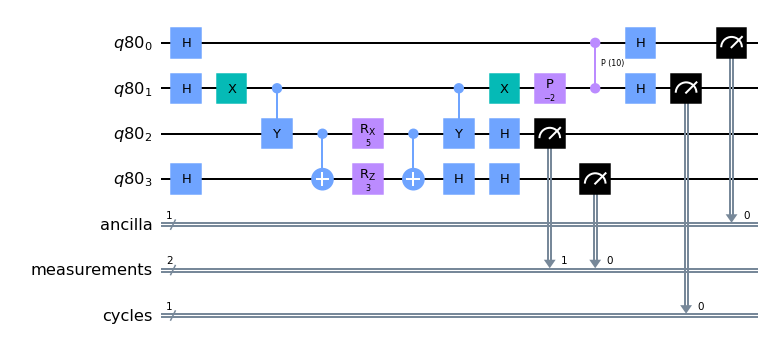

In [38]:
test = test_cont_two_state([1], 1, -1, 4, 2.5, 1.5, 1)
test.draw('mpl')

In [46]:
test = run_cont_two_state_test(5, 2, 2.5, 1.5, -1, 4, [0], jobID='6779edffaac049419cb96f1ad7fa2223-1664154312939769')
print(test.get_counts(0))
successes = dict(filter(lambda item: "00000" in item[0], test.get_counts(0).items()))
print(successes, np.sum(list(successes.values())))

two state job 6779edffaac049419cb96f1ad7fa2223-1664154312939769
{'00000 00 0': 63, '00000 00 1': 10, '00010 10 0': 1, '00011 01 1': 3, '00011 10 0': 1, '00011 10 1': 2, '00011 11 0': 1, '00011 11 1': 1, '00000 01 0': 16, '00000 01 1': 54, '00110 01 0': 1, '00110 10 1': 1, '00110 11 0': 2, '00110 11 1': 1, '00111 01 0': 1, '00000 10 0': 40, '01000 01 0': 1, '01000 10 0': 2, '01000 11 1': 1, '01001 10 0': 1, '01001 11 0': 1, '00000 10 1': 11, '01010 00 0': 5, '01010 00 1': 2, '01010 01 0': 6, '01010 01 1': 11, '01010 10 1': 2, '01010 11 0': 3, '01011 00 0': 1, '01011 01 0': 2, '01011 10 0': 2, '01011 10 1': 1, '01011 11 1': 1, '00000 11 0': 8, '01100 00 0': 2, '01100 00 1': 3, '01100 10 0': 18, '01100 10 1': 2, '01100 11 0': 1, '01100 11 1': 28, '01101 00 0': 10, '01101 00 1': 3, '01101 01 0': 3, '01101 01 1': 16, '01101 10 0': 8, '01101 10 1': 3, '01101 11 0': 1, '01101 11 1': 3, '00000 11 1': 52, '01110 00 0': 19, '01110 00 1': 1, '01110 01 0': 5, '01110 01 1': 17, '01110 10 0': 1, '01

In [55]:
process_two_state_register(test, 5, 2)

{'00000 00 0': 63, '00000 00 1': 10, '00000 01 0': 16, '00000 01 1': 54, '00000 10 0': 40, '00000 10 1': 11, '00000 11 0': 8, '00000 11 1': 52}
254
{'00000 00 0': 16, '00000 00 1': 58, '00000 01 0': 41, '00000 01 1': 11, '00000 10 0': 10, '00000 10 1': 40, '00000 11 0': 64, '00000 11 1': 18}
258


[0.020173350424220304,
 [0.051364219007507816, -0.031190868583287568],
 [0.05118110236220476, -0.031007751937984496],
 [[0.06299212598425198, -0.011811023622047251],
  [-0.011627906976744207, -0.01937984496124029]]]

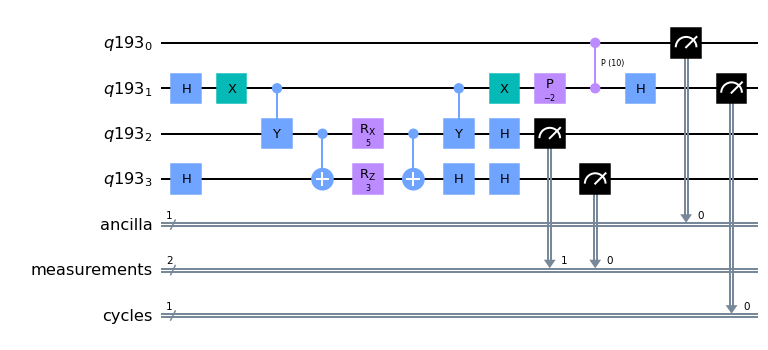

In [56]:
test = test_cont_two_state([1], 1, -1, 4, 2.5, 1.5, 1)
test.draw('mpl')

In [57]:
test = run_cont_two_state_test(5, 2, 2.5, 1.5, -1, 4, [0])

two state job c6a14dd95718433a8822ef5c5838a342-1664159549683748


In [60]:
process_two_state_register(test, 5, 2)

{'00000 00 0': 59, '00000 01 0': 109, '00000 10 0': 11, '00000 11 0': 110}
289
{'00000 00 0': 6, '00000 01 0': 4, '00000 10 0': 189, '00000 11 0': 170}
369


[-0.6209150326797386,
 [-0.39158485010455646, -0.22933018257518215],
 [-0.1764705882352941, -0.4444444444444444],
 [[0.08131487889273356, -0.2577854671280277],
  [-0.47289972899729, 0.028455284552845544]]]

In [69]:
test = run_cont_two_state_test(5, 2, 2.5, 1.5, -1, 4, [0])
process_two_state_register(test, 5, 2)

two state job f4d925de4bad452aa52340d74c471e17-16641608039654973
{'00000 00 0': 87, '00000 01 0': 41, '00000 10 0': 57, '00000 11 0': 57}
242
{'00000 00 0': 79, '00000 01 0': 63, '00000 10 0': 55, '00000 11 0': 54}
251


[0.44713707154851656,
 [0.1893253432550788, 0.2578117282934378],
 [0.24793388429752072, 0.19920318725099598],
 [[0.05785123966942152, 0.1900826446280992],
  [0.13147410358565728, 0.06772908366533861]]]

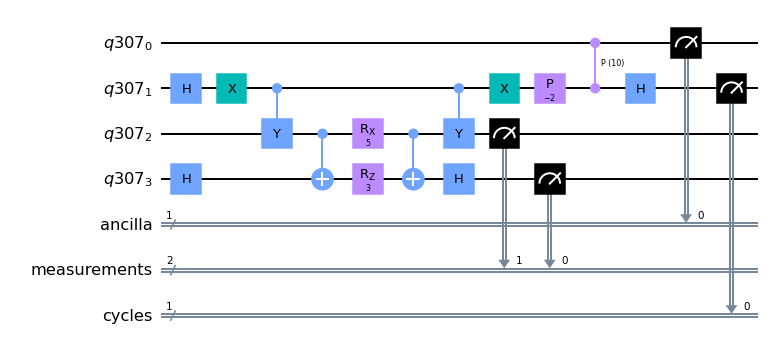

In [65]:
test = test_cont_two_state([1], 1, -1, 4, 2.5, 1.5, 1)
test.draw('mpl')

[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D349BE1F60>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34C4B99F0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34C4BAE60>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34C4BA140>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34C4C4DC0>]
[Statevector([ 0.        +0.j        ,  0.        +0.j        ,
             -0.3666734 +0.39660755j,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
             -0.38229378+0.41350313j,  0.        +0.j        ,
              0.        -0.j        ,  0.        +0.j        ,
              0.29229194-0.3161538j ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
             -0.30791232+0.33304938j,  0.        +0.j        ],
            dims=(2, 2, 2, 2)), Statevector([0.0653265 -0.1572972j , 0.        +0.j        ,
             0.

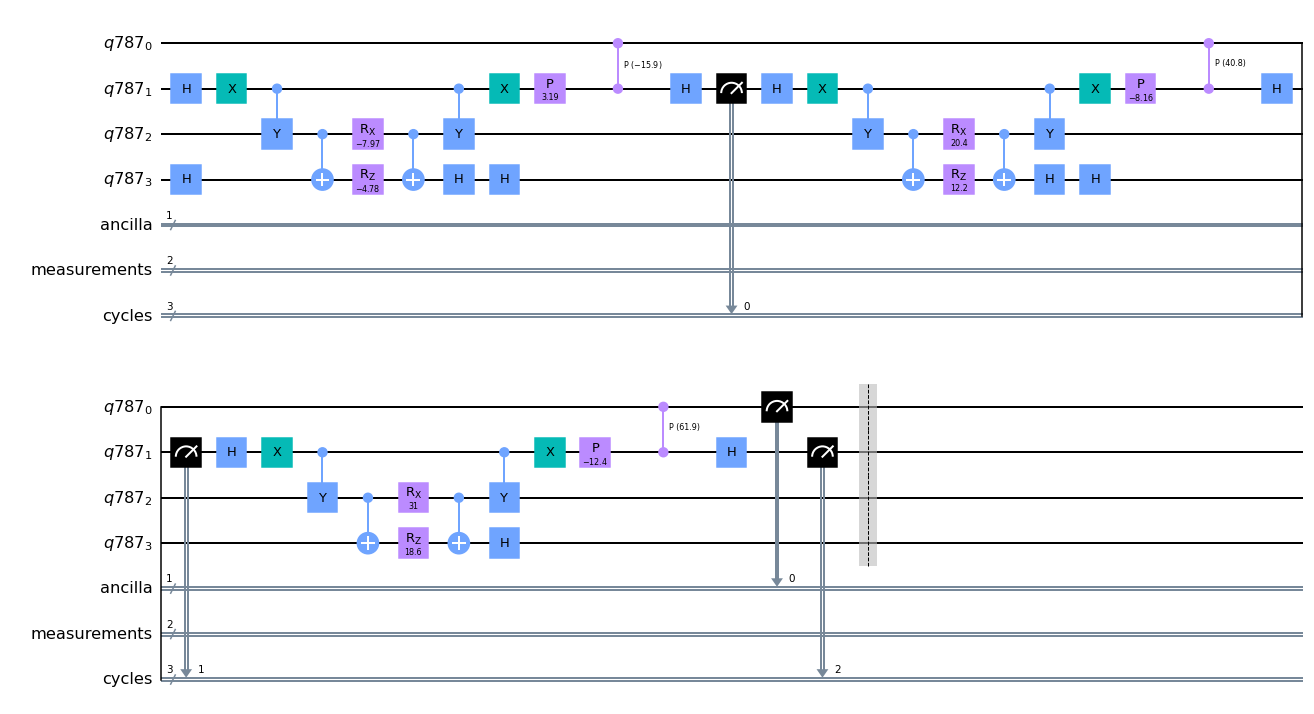

In [44]:
test = make_cont_two_state_test_circs(3, 5, 2.5, 1.5, -1, 4, [0])
print(test)
transpiledTest = [transpile(circ, backendStatevector) for circ in test]
results = [backendStatevector.run(transcirc).result() for transcirc in transpiledTest]
statevectors = [result.get_statevector(0) for result in results]
print(statevectors)
test[0].draw('mpl')


[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34B1517B0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34B1506D0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34B12F910>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34BA541C0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34BADC220>]
[Statevector([ 0.        +0.j        ,  0.        +0.j        ,
             -0.13691717-0.43456462j,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ,
              0.16219165+0.51478387j,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ,
              0.16564534+0.52574563j,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ,
              0.13346348+0.42360286j,  0.        +0.j        ],
            dims=(2, 2, 2, 2)), Statevector([ 0.        +0.j        ,  0.        +0.j        ,
             

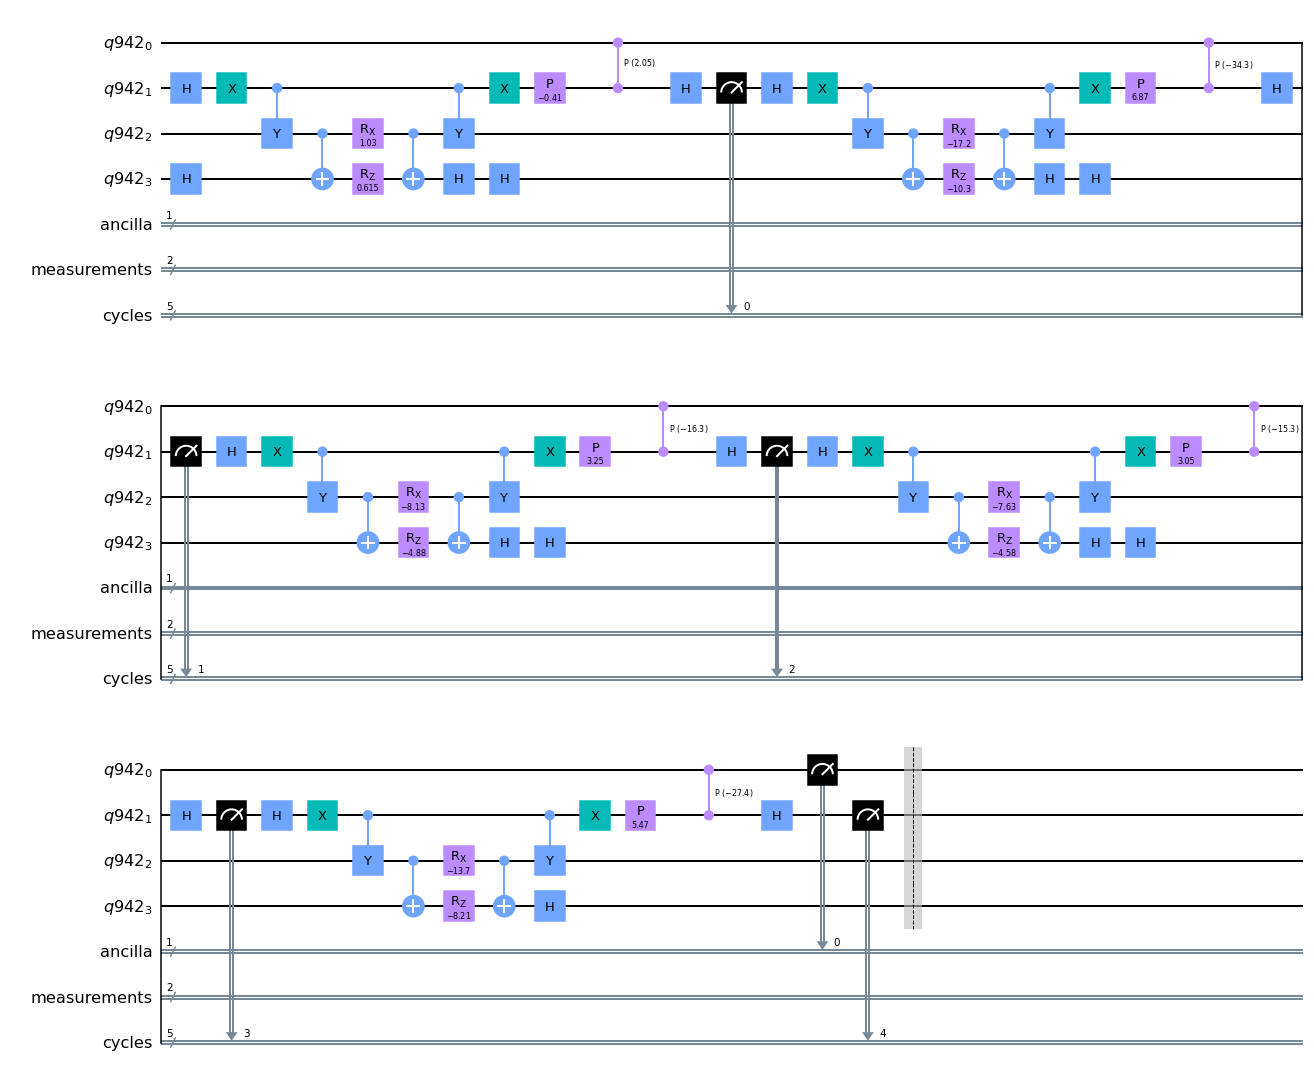

In [45]:
test = make_cont_two_state_test_circs(5, 5, 2.5, 1.5, -1, 4, [0])
print(test)
transpiledTest = [transpile(circ, backendStatevector) for circ in test]
results = [backendStatevector.run(transcirc).result() for transcirc in transpiledTest]
statevectors = [result.get_statevector(0) for result in results]
print(statevectors)
test[0].draw('mpl')

[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D349304E50>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34AC0C9A0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34ABDEEF0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34ABDE830>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001D34ABE4C40>]
[Statevector([ 0.        -0.j        ,  0.        +0.j        ,
              0.26129174-0.23078594j,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
             -0.47768952-0.38735537j,  0.        +0.j        ,
              0.        -0.j        ,  0.        +0.j        ,
             -0.12494558+0.32601526j,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ,
             -0.52879351-0.31418639j, -0.        +0.j        ],
            dims=(2, 2, 2, 2)), Statevector([ 0.        -0.j        ,  0.        +0.j        ,
             

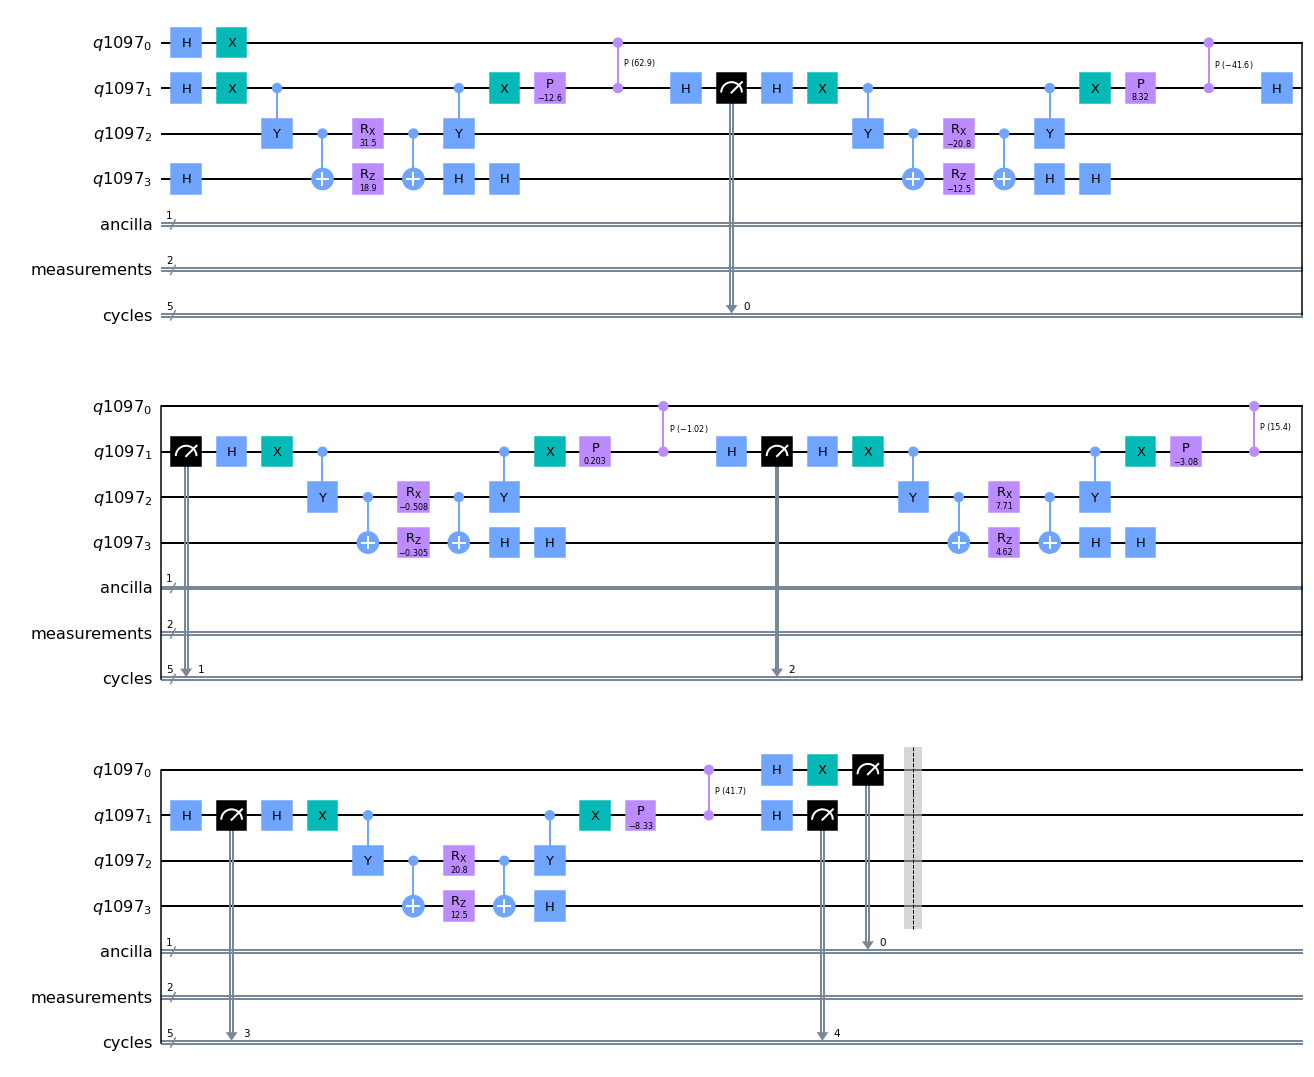

In [48]:
test = make_cont_two_state_test_circs(5, 5, 2.5, 1.5, -1, 4, [0])
print(test)
transpiledTest = [transpile(circ, backendStatevector) for circ in test]
results = [backendStatevector.run(transcirc).result() for transcirc in transpiledTest]
statevectors = [result.get_statevector(0) for result in results]
print(statevectors)
test[0].draw('mpl')

In [50]:
quantinuumCircs = make_cont_two_state_test_circs(3, 5, 2.5, 1.5, -1, 4, [0])

{'10010 00 0': 182, '11111 00 0': 52, '01101 00 0': 89, '11110 00 0': 44, '01100 00 0': 29, '10000 00 0': 47, '01110 00 0': 68, '01010 00 0': 1, '00000 00 0': 276, '00001 00 0': 49, '11101 00 0': 26, '11100 00 0': 31, '01111 00 0': 16, '10011 00 0': 43, '00010 00 0': 36, '10001 00 0': 13, '00011 00 0': 20, '01001 00 0': 1, '10101 00 0': 1}
0b0: (0.13269630529587367-0.22574397867590082j)
0b1: (0.2048262768165154+0.10662572930620612j)
0b10: (-0+0j)
0b11: 0j
0b100: (0.17497939119752473+0.1601216465897129j)
0b101: (0.0855288404383428-0.2520600416584215j)
0b110: -0j
0b111: 0j
0b1000: (0.1388000939794972+0.3772195002973992j)
0b1001: (-0.0330273048001929-0.4145487640140211j)
0b1010: 0j
0b1011: -0j
0b1100: (0.0031804191812022913+0.46804468129752785j)
0b1101: (-0.18596755883702806-0.4035355632799199j)
0b1110: -0j
0b1111: 0j
{'11001 00 0': 39, '00001 00 0': 29, '10111 00 0': 35, '00000 00 0': 250, '11111 00 0': 16, '10001 00 0': 41, '10100 00 0': 76, '00011 00 0': 98, '01001 00 0': 74, '00010 00

C:\Users\Max\AppData\Local\Temp\ipykernel_46120\4146455009.py:10: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for j in range(len(statevectors[i])):


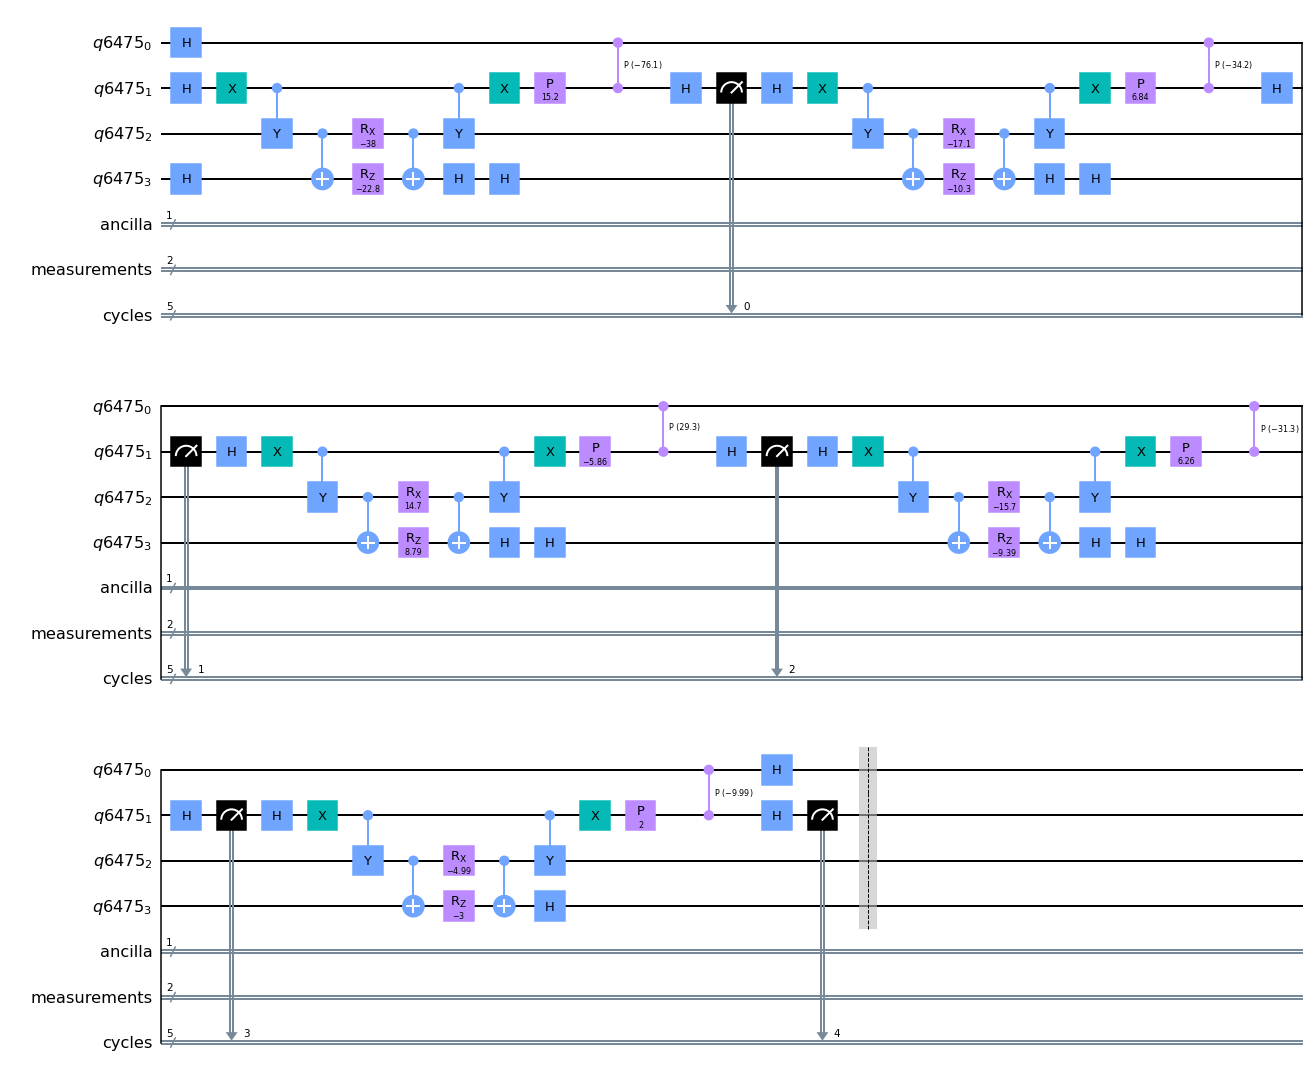

In [53]:
test = make_cont_two_state_test_circs(5, 5, 2.5, 1.5, -1, 4, [0])
# print(test)
transpiledTest = [transpile(circ, backendStatevector) for circ in test]
results = [backendStatevector.run(transcirc).result() for transcirc in transpiledTest]
# print(results)
statevectors = [result.get_statevector(0) for result in results]
readouts = [result.get_counts(0) for result in results]
for i in range(len(readouts)):
    print(readouts[i])
    for j in range(len(statevectors[i])):
        print(bin(j) +": "+ statevectors[i][j].astype('|S100').decode('UTF-8'))
test[0].draw('mpl')

In [7]:
test = make_cont_two_state_test_circs(5, 10, 2.5, 1.5, -1, 4, [0])
# print(test)
transpiledTest = [transpile(circ, backendStatevector) for circ in test]
results = [backendStatevector.run(transcirc).result() for transcirc in transpiledTest]
# print(results)
total0 = list()
total1 = list()
statevectors = [result.get_statevector(0) for result in results]
readouts = [result.get_counts(0) for result in results]
for i in range(len(readouts)):
    # print(readouts[i])
    isSuccess = True
    state = list()
    combinedState0 = [0, 0, 0, 0]
    combinedState1 = [0, 0, 0, 0]
    for k in range(len(np.asarray(statevectors[i]))):
        if isSuccess and k != 192 and k != 193 and k!= 0 and k != 1 and k != 64 and k!= 65 and k!= 128 and k!= 129:
            isSuccess = np.real_if_close(statevectors[i][k]) == 0
    if isSuccess:
        for j in range(len(np.asarray(statevectors[i]))):
            if j == 192 or j == 193 or j== 0 or j == 1 or j == 64 or j == 65 or j == 128 or j == 129:
                print(bin(j) +": "+ statevectors[i][j].astype('|S100').decode('UTF-8'))
                state.append(statevectors[i][j])
        for j in range(4):
            combinedState0[j] = state[2*j]
            combinedState1[j] = +state[2*j+1]
        print(combinedState0)
        print(np.angle(combinedState0))
        print(combinedState1)
        print(np.angle(combinedState1))
        state = list()
        total0.append(combinedState0)
        combinedState0 = [0, 0, 0, 0]
        total1.append(combinedState1)
        combinedState1 = [0, 0, 0, 0]

    else:
        print("Failed RA")
test[0].draw('mpl')

print(total1)
average1 = [0, 0, 0, 0]
for successfulState in total1:
    for j in range(len(successfulState)):
        average1[j] += np.abs(successfulState[j])/len(total1)
print("averaged for ancilla = 1 state: ")
print(average1)

print(total0)
average0 = [0, 0, 0, 0]
for successfulState in total0:
    for j in range(len(successfulState)):
        average0[j] += np.abs(successfulState[j])/len(total0)

print("averaged for ancilla = 0 state: ")
print(average0) 

NameError: name 'make_cont_two_state_test_circs' is not defined

In [27]:
test = make_cont_two_state_test_circs(5, 10, 2.5, 1.5, -1, 4, [0])
# print(test)
transpiledTest = [transpile(circ, backendStatevector) for circ in test]
results = [backendStatevector.run(transcirc).result() for transcirc in transpiledTest]
# print(results)
total0 = list()
total1 = list()
statevectors = [result.get_statevector(0) for result in results]
readouts = [result.get_counts(0) for result in results]
for i in range(len(readouts)):
    # print(readouts[i])
    isSuccess = True
    state = list()
    combinedState0 = [0, 0, 0, 0]
    combinedState1 = [0, 0, 0, 0]
    for k in range(len(np.asarray(statevectors[i]))):
        if isSuccess and k != 192 and k != 193 and k!= 0 and k != 1 and k != 64 and k!= 65 and k!= 128 and k!= 129:
            isSuccess = np.real_if_close(statevectors[i][k]) == 0
    if isSuccess:
        for j in range(len(np.asarray(statevectors[i]))):
            if j == 192 or j == 193 or j== 0 or j == 1 or j == 64 or j == 65 or j == 128 or j == 129:
                print(bin(j) +": "+ statevectors[i][j].astype('|S100').decode('UTF-8'))
                state.append(statevectors[i][j])
        for j in range(4):
            combinedState0[j] = state[2*j]
            combinedState1[j] = +state[2*j+1]
        print(combinedState0)
        print(np.angle(combinedState0))
        print(combinedState1)
        print(np.angle(combinedState1))
        state = list()
        total0.append(combinedState0)
        combinedState0 = [0, 0, 0, 0]
        total1.append(combinedState1)
        combinedState1 = [0, 0, 0, 0]

    else:
        print("Failed RA")
test[0].draw('mpl')

print(total1)
average1 = [0, 0, 0, 0]
for successfulState in total1:
    for j in range(len(successfulState)):
        average1[j] += np.abs(successfulState[j])/len(total1)
print("averaged for ancilla = 1 state: ")
print(average1)

print(total0)
average0 = [0, 0, 0, 0]
for successfulState in total0:
    for j in range(len(successfulState)):
        average0[j] += np.abs(successfulState[j])/len(total0)

print("averaged for ancilla = 0 state: ")
print(average0)

Failed RA
0b0: 0j
0b1: (0.3189279824485235-0.47078486589374796j)
0b1000000: 0j
0b1000001: (0.22362772707722844-0.33010759574591253j)
0b10000000: 0j
0b10000001: (0.3183343833541788-0.4699086258477028j)
0b11000000: 0j
0b11000001: (-0.24799573913630008+0.3660783851424777j)
[0j, 0j, 0j, 0j]
[0. 0. 0. 0.]
[(0.3189279824485235-0.47078486589374796j), (0.22362772707722844-0.33010759574591253j), (0.3183343833541788-0.4699086258477028j), (-0.24799573913630008+0.3660783851424777j)]
[-0.97537305 -0.97537305 -0.97537305  2.1662196 ]
Failed RA
Failed RA
0b0: 0j
0b1: (-0.48255700646204736-0.437206951408411j)
0b1000000: 0j
0b1000001: (-0.14828777249558073-0.1343518881204678j)
0b10000000: 0j
0b10000001: (-0.4908708930321569-0.4447395101589774j)
0b11000000: 0j
0b11000001: (0.23104512395797183+0.2093318155797785j)
[0j, 0j, 0j, 0j]
[0. 0. 0. 0.]
[(-0.48255700646204736-0.437206951408411j), (-0.14828777249558073-0.1343518881204678j), (-0.4908708930321569-0.4447395101589774j), (0.23104512395797183+0.20933181

In [28]:
test = make_cont_two_state_test_circs(5, 100, 2.5, 1.5, -1, 4, [0])
# print(test)
transpiledTest = [transpile(circ, backendStatevector) for circ in test]
results = [backendStatevector.run(transcirc).result() for transcirc in transpiledTest]
# print(results)
total0 = list()
total1 = list()
statevectors = [result.get_statevector(0) for result in results]
readouts = [result.get_counts(0) for result in results]
for i in range(len(readouts)):
    # print(readouts[i])
    isSuccess = True
    state = list()
    combinedState0 = [0, 0, 0, 0]
    combinedState1 = [0, 0, 0, 0]
    for k in range(len(np.asarray(statevectors[i]))):
        if isSuccess and k != 192 and k != 193 and k!= 0 and k != 1 and k != 64 and k!= 65 and k!= 128 and k!= 129:
            isSuccess = np.real_if_close(statevectors[i][k]) == 0
    if isSuccess:
        for j in range(len(np.asarray(statevectors[i]))):
            if j == 192 or j == 193 or j== 0 or j == 1 or j == 64 or j == 65 or j == 128 or j == 129:
                print(bin(j) +": "+ statevectors[i][j].astype('|S100').decode('UTF-8'))
                state.append(statevectors[i][j])
        for j in range(4):
            combinedState0[j] = state[2*j]
            combinedState1[j] = +state[2*j+1]
        print(combinedState0)
        print(np.angle(combinedState0))
        print(combinedState1)
        print(np.angle(combinedState1))
        state = list()
        total0.append(combinedState0)
        combinedState0 = [0, 0, 0, 0]
        total1.append(combinedState1)
        combinedState1 = [0, 0, 0, 0]

    else:
        print("Failed RA")
test[0].draw('mpl')

print(total1)
average1 = [0, 0, 0, 0]
averagePhase1 = [0, 0, 0, 0]
for successfulState in total1:
    for j in range(len(successfulState)):
        average1[j] += np.abs(successfulState[j])/len(total1)
        averagePhase1[j] += np.abs(np.angle(successfulState[j])/len(total1))

average1 = average1/np.linalg.norm(average1)
print("averaged for ancilla = 1 state: ")
print(average1)
print(averagePhase1)

print(total0)
average0 = [0, 0, 0, 0]
averagePhase0 = [0, 0, 0, 0]
for successfulState in total0:
    for j in range(len(successfulState)):
        average0[j] += np.abs(successfulState[j])/len(total0)
        averagePhase0[j] += np.abs(np.angle(successfulState[j])/len(total0))

average0 = average0/np.linalg.norm(average0)
print("averaged for ancilla = 0 state: ")
print(average0)
print(averagePhase0)

Failed RA
0b0: (0.34665896282531405-2.376922107474629e-16j)
0b1: (0.14586716140666448-1.727236173159406e-16j)
0b1000000: (0.1458671614066645-1.65624271157874e-16j)
0b1000001: (-0.5534953348147782+6.046939973433855e-16j)
0b10000000: (0.6425594633981833-6.965365440439113e-16j)
0b10000001: (-0.14586716140666448+2.410648724107185e-16j)
0b11000000: (0.1458671614066645-1.5893279205564214e-16j)
0b11000001: (0.2747342328892439-3.150864003899162e-16j)
[(0.34665896282531405-2.376922107474629e-16j), (0.1458671614066645-1.65624271157874e-16j), (0.6425594633981833-6.965365440439113e-16j), (0.1458671614066645-1.5893279205564214e-16j)]
[-6.85665845e-16 -1.13544591e-15 -1.08400325e-15 -1.08957212e-15]
[(0.14586716140666448-1.727236173159406e-16j), (-0.5534953348147782+6.046939973433855e-16j), (-0.14586716140666448+2.410648724107185e-16j), (0.2747342328892439-3.150864003899162e-16j)]
[-1.18411585e-15  3.14159265e+00  3.14159265e+00 -1.14687710e-15]
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Fail

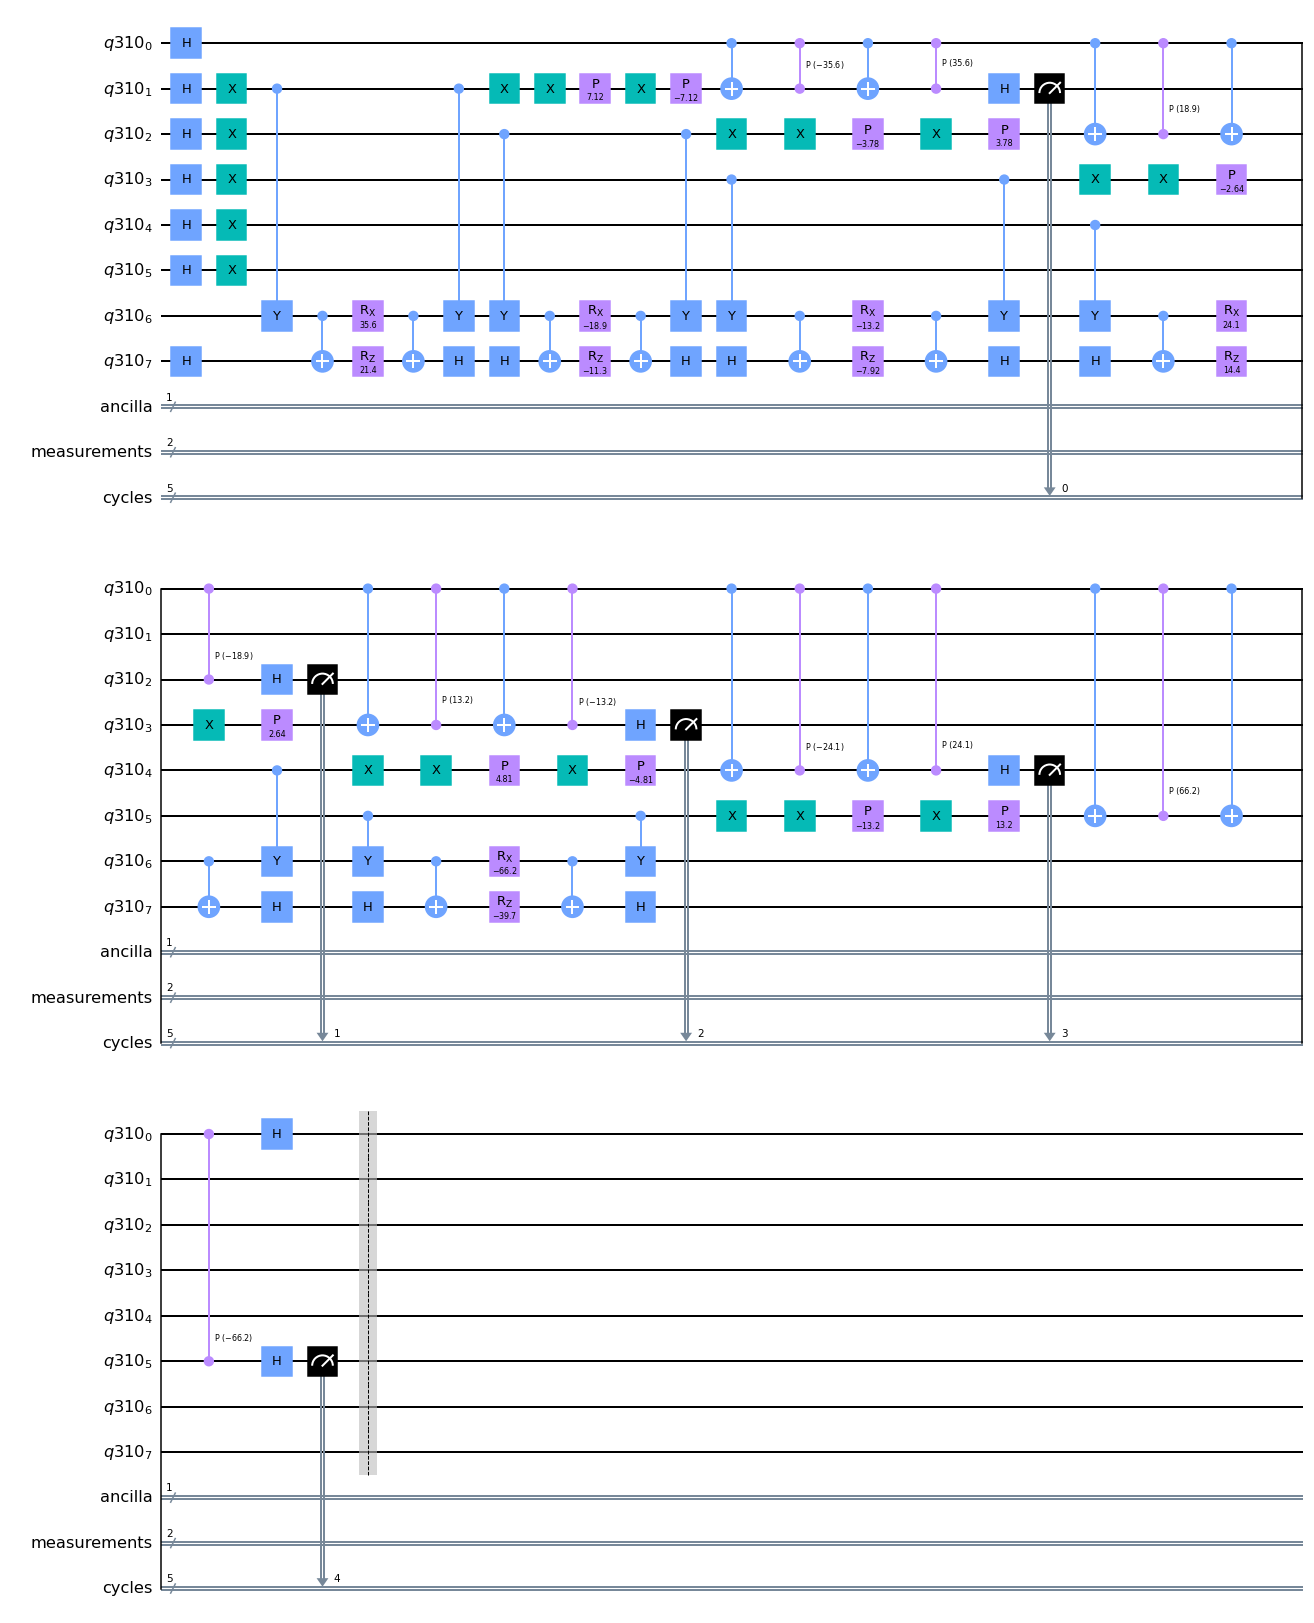

In [19]:
test[0].draw('mpl')

In [37]:
test = make_cont_two_state_test_circs(5, 100, 2.5, 1.5, -1, 4, [0])
# print(test)
transpiledTest = [transpile(circ, backendStatevector) for circ in test]
results = [backendStatevector.run(transcirc).result() for transcirc in transpiledTest]
# print(results)
total0 = list()
total1 = list()
statevectors = [result.get_statevector(0) for result in results]
readouts = [result.get_counts(0) for result in results]
for i in range(len(readouts)):
    # print(readouts[i])
    isSuccess = True
    state = list()
    combinedState0 = [0, 0, 0, 0]
    combinedState1 = [0, 0, 0, 0]
    for k in range(len(np.asarray(statevectors[i]))):
        if isSuccess and k != 192 and k != 193 and k!= 0 and k != 1 and k != 64 and k!= 65 and k!= 128 and k!= 129:
            isSuccess = np.real_if_close(statevectors[i][k]) == 0
    if isSuccess:
        for j in range(len(np.asarray(statevectors[i]))):
            if j == 192 or j == 193 or j== 0 or j == 1 or j == 64 or j == 65 or j == 128 or j == 129:
                print(bin(j) +": "+ statevectors[i][j].astype('|S100').decode('UTF-8'))
                state.append(statevectors[i][j])
        for j in range(4):
            combinedState0[j] = state[2*j]
            combinedState1[j] = +state[2*j+1]
        print(combinedState0)
        print(np.angle(combinedState0))
        print(combinedState1)
        print(np.angle(combinedState1))
        state = list()
        total0.append(combinedState0)
        combinedState0 = [0, 0, 0, 0]
        total1.append(combinedState1)
        combinedState1 = [0, 0, 0, 0]

    else:
        print("Failed RA")
test[0].draw('mpl')

print(total1)
average1 = [0, 0, 0, 0]
averagePhase1 = [0, 0, 0, 0]
for successfulState in total1:
    for j in range(len(successfulState)):
        average1[j] += np.abs(successfulState[j])/len(total1)
        averagePhase1[j] += np.abs(np.angle(successfulState[j])/len(total1))

average1 = average1/np.linalg.norm(average1)
print("averaged for ancilla = 1 state: ")
print(average1)
print(averagePhase1)

print(total0)
average0 = [0, 0, 0, 0]
averagePhase0 = [0, 0, 0, 0]
for successfulState in total0:
    for j in range(len(successfulState)):
        average0[j] += np.abs(successfulState[j])/len(total0)
        averagePhase0[j] += np.abs(np.angle(successfulState[j])/len(total0))

average0 = average0/np.linalg.norm(average0)
print("averaged for ancilla = 0 state: ")
print(average0)
print(averagePhase0)

Failed RA
0b0: (0.4850836120733236-4.4036560645299357e-17j)
0b1: (-0.017779608989128958+2.1543778203733904e-17j)
0b1000000: (-0.017779608989128858-3.852500990146064e-17j)
0b1000001: (-0.5192972030697485+1.1957384271304455e-16j)
0b10000000: (0.5097817641362267-5.792485879354151e-17j)
0b10000001: (0.017779608989128778+1.993630980471117e-17j)
0b11000000: (-0.01777960898912889+4.212706053303471e-17j)
0b11000001: (0.48361389470606064-1.0667821285379676e-16j)
[(0.4850836120733236-4.4036560645299357e-17j), (-0.017779608989128858-3.852500990146064e-17j), (0.5097817641362267-5.792485879354151e-17j), (-0.01777960898912889+4.212706053303471e-17j)]
[-9.07813819e-17 -3.14159265e+00 -1.13626777e-16  3.14159265e+00]
[(-0.017779608989128958+2.1543778203733904e-17j), (-0.5192972030697485+1.1957384271304455e-16j), (0.017779608989128778+1.993630980471117e-17j), (0.48361389470606064-1.0667821285379676e-16j)]
[ 3.14159265e+00  3.14159265e+00  1.12130193e-15 -2.20585500e-16]
Failed RA
Failed RA
Failed RA
Fa

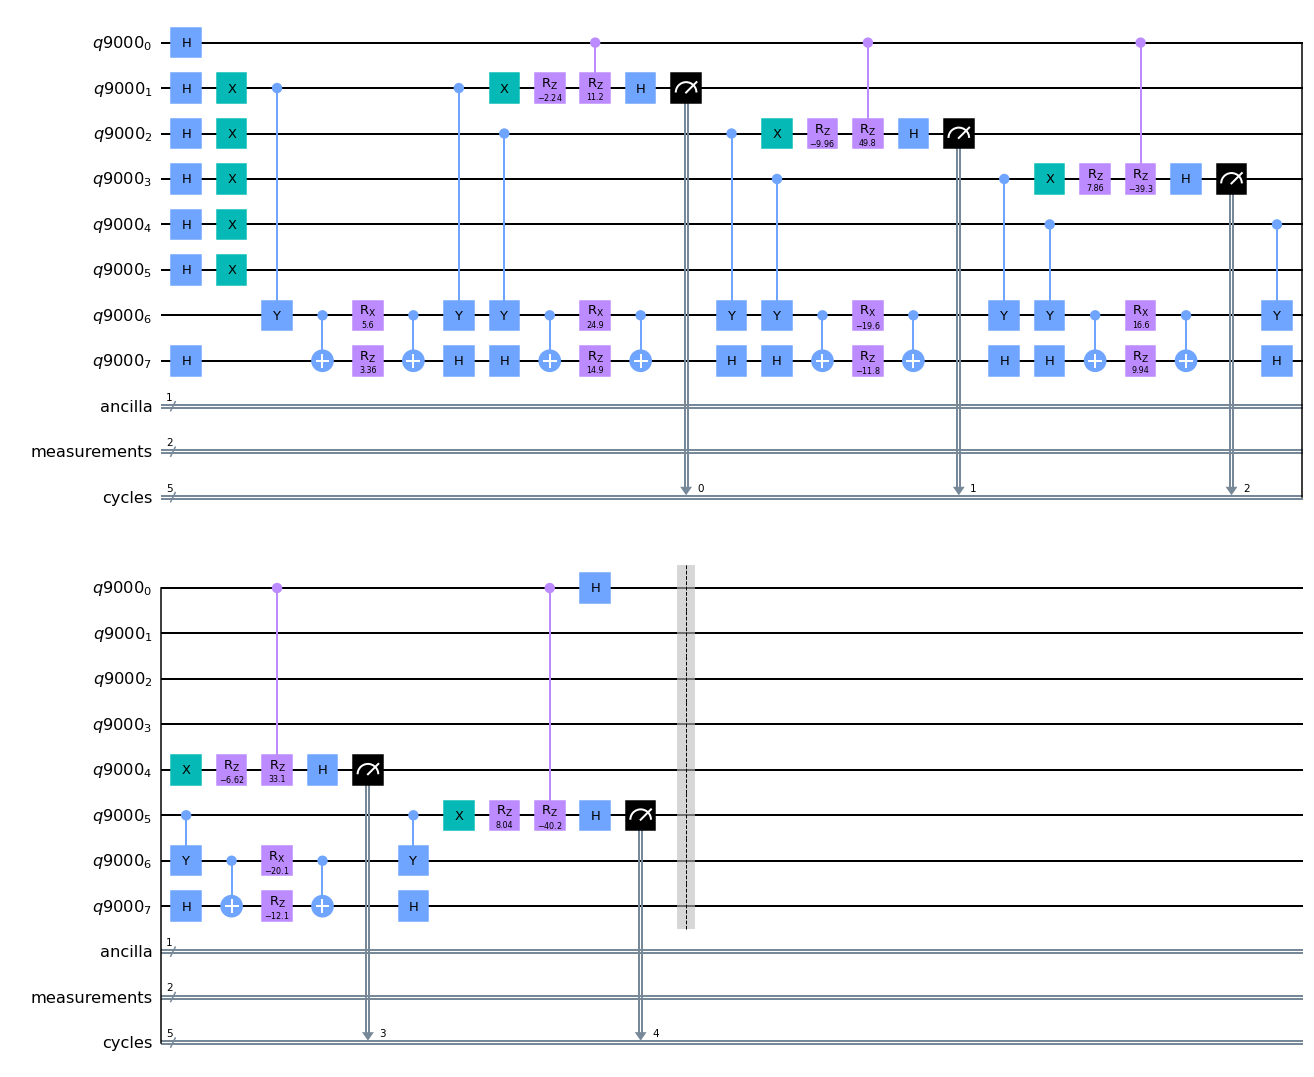

In [38]:
test[0].draw('mpl')

In [3]:
test = run_cont_two_state(5, 5, 2.5, 1.5, -1, 4, 2*np.pi, 20)
process_two_state_register(test, 5, 5, 2*np.pi, 20)

two state job b95664f74bb5456ea92801911120e646-16697418300608091
{'00000 01 0': 21, '00000 01 1': 7, '00000 11 0': 1}
29
{'00': 0.0, '01': 28, '10': 0.0, '11': 1}
{'00000 00 0': 2, '00000 00 1': 1, '00000 01 0': 20, '00000 01 1': 11, '00000 10 1': 1}
35
{'00': 3, '01': 31, '10': 1, '11': 0.0}
{'00000 00 1': 1, '00000 01 0': 12, '00000 01 1': 19, '00000 11 0': 1}
33
{'00': 1, '01': 31, '10': 0.0, '11': 1}
{'00000 00 1': 1, '00000 01 0': 11, '00000 01 1': 23}
35
{'00': 1, '01': 34, '10': 0.0, '11': 0.0}
{'00000 00 1': 1, '00000 01 0': 7, '00000 01 1': 26}
34
{'00': 1, '01': 33, '10': 0.0, '11': 0.0}
{'00000 00 1': 1, '00000 01 0': 6, '00000 01 1': 19, '00000 10 1': 1, '00000 11 0': 1}
28
{'00': 1, '01': 25, '10': 1, '11': 1}
{'00000 00 1': 2, '00000 01 0': 8, '00000 01 1': 24, '00000 11 1': 1}
35
{'00': 2, '01': 32, '10': 0.0, '11': 1}
{'00000 00 0': 1, '00000 01 0': 5, '00000 01 1': 23, '00000 10 1': 1, '00000 11 1': 1}
31
{'00': 1, '01': 28, '10': 1, '11': 1}
{'00000 00 1': 1, '00000 0

[-40.84046464217816,
 [7.965966739783011, -48.806431381961204],
 [-0.06896551724137931,
  0.17142857142857149,
  -5.551115123125783e-17,
  0.05714285714285705,
  0.05882352941176461,
  -2.7755575615628914e-17,
  0.05714285714285708,
  5.551115123125783e-17,
  0.06666666666666676,
  0.0,
  0.052631578947368474,
  0.22222222222222232,
  0.05714285714285705,
  0.07692307692307698,
  0.1777777777777777,
  0.19354838709677413,
  0.0465116279069768,
  0.1818181818181817,
  -5.551115123125783e-17,
  2.7755575615628914e-17,
  1.263157894736842,
  1.2352941176470589,
  0.896551724137931,
  0.9333333333333332,
  1.3571428571428572,
  1.25,
  1.0,
  1.2,
  1.0909090909090908,
  1.3333333333333333,
  1.103448275862069,
  1.4666666666666666,
  0.8888888888888888,
  1.4358974358974361,
  1.1515151515151516,
  1.3333333333333333,
  1.4,
  1.2380952380952381,
  1.0555555555555558,
  1.2,
  -0.7222222222222222,
  -0.6499999999999999,
  -0.96,
  -0.8666666666666667,
  -1.0,
  -1.0588235294117647,
  -0.7

In [6]:
test = run_cont_two_state(5, 5, 2.5, 1.5, -1, 4, 2*np.pi, 20)

two state job 55810795efe94252bcfc5839ce0e0a75-1669742097800131


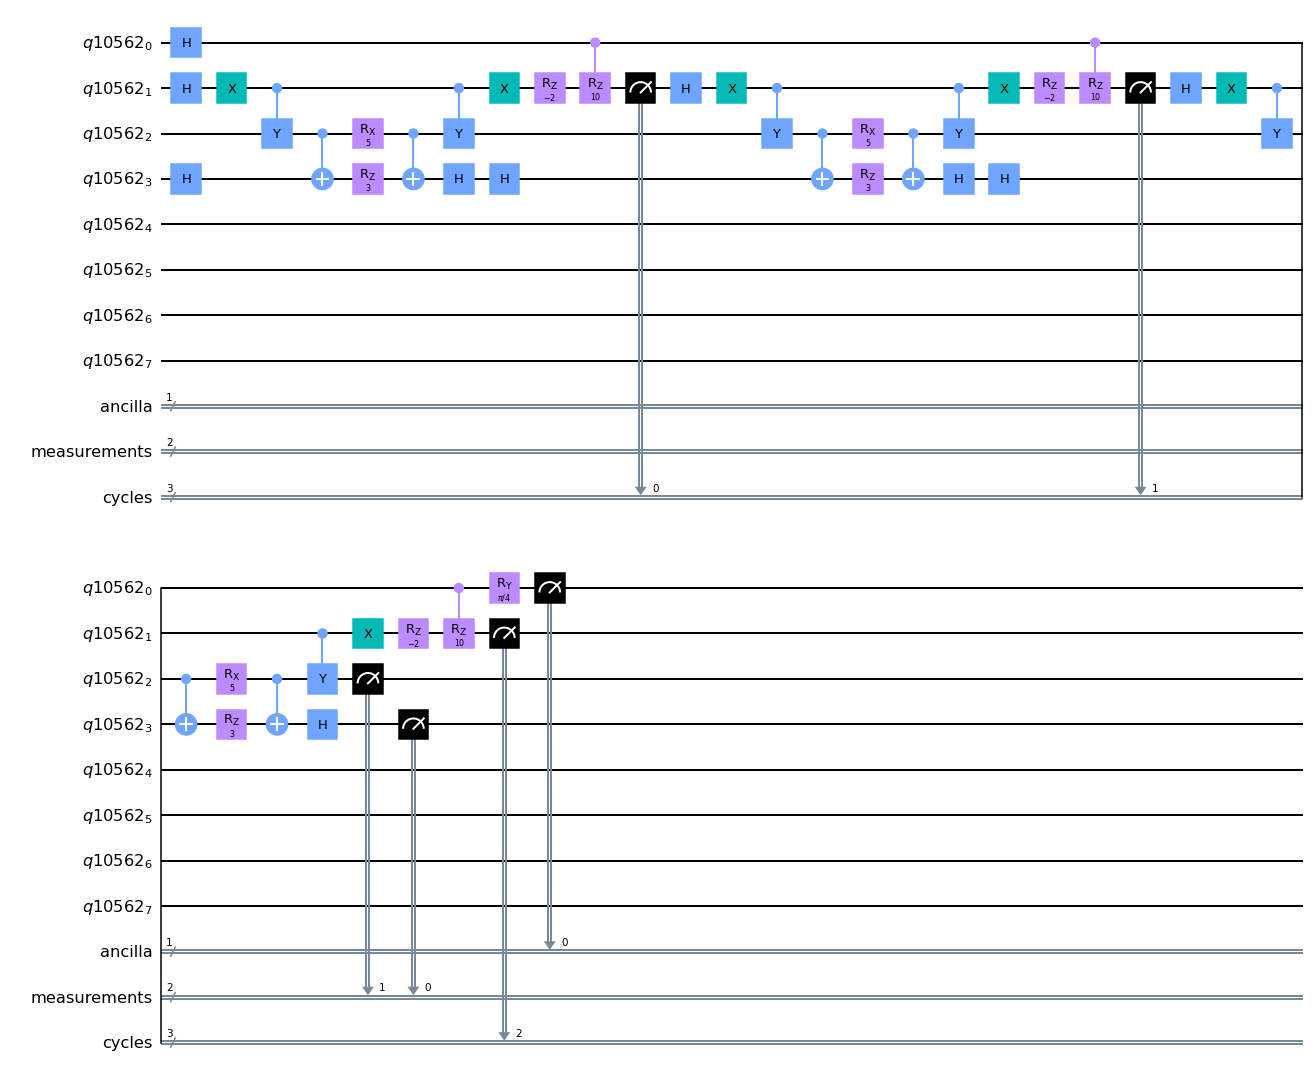

In [9]:
make_two_state_scan([1, 1, 1], 3, -1, 4, 2.5, 1.5, np.pi/4, "y").draw('mpl')

In [15]:
test = run_cont_two_state(5, 5, 2.5, 1.5, -1, 4, 2*np.pi, 20)
test[0][167].draw('mpl')

two state job 13d29757baed4235ace1863c6e7aae53-16697426604183838


TypeError: 'ManagedResults' object is not subscriptable

In [16]:
print(test)

[<qiskit.providers.ibmq.managed.managedresults.ManagedResults object at 0x000001A4C9987670>, [<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A472A26CB0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A472BCB250>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A472A26980>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A4C96C43A0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A472A27AC0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A472BCAFB0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A46F0229B0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A472A256C0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A472A38490>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A4C9633D60>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A4C9680670>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0

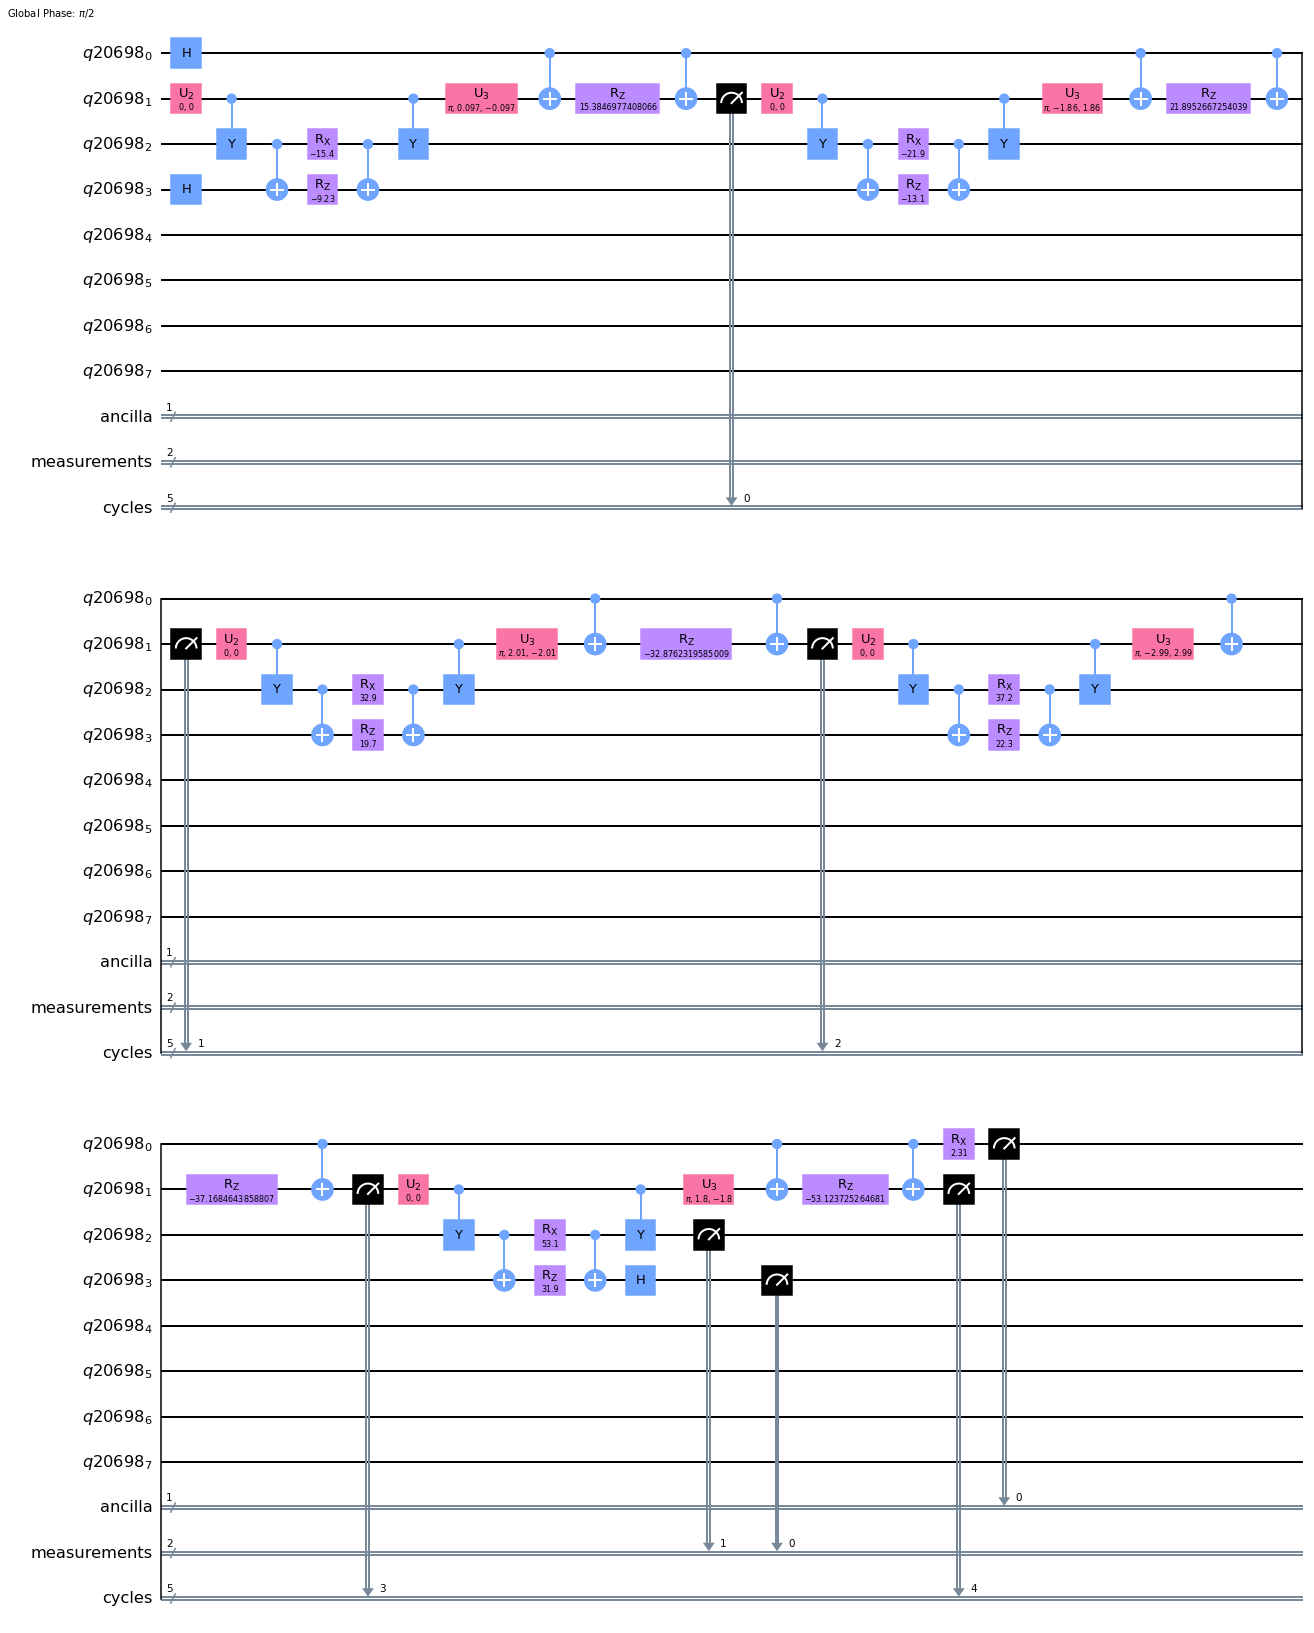

In [17]:
test[1][167].draw('mpl')

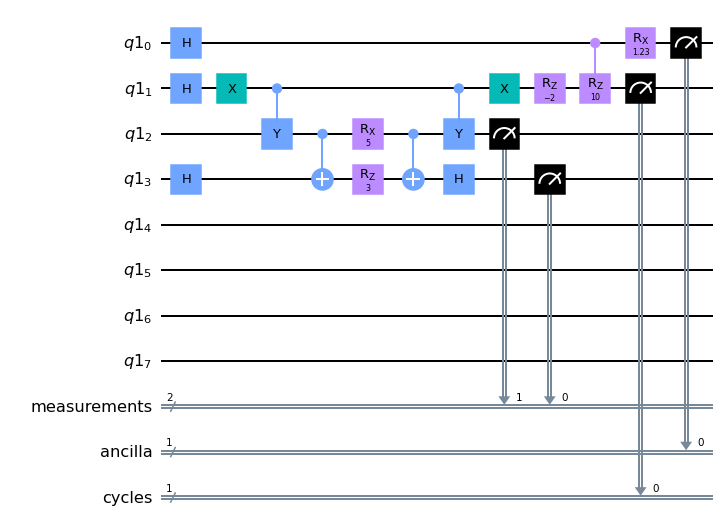

In [6]:
make_two_state_scan([1], 1, -1, 4, 2.5, 1.5, 1.23, 'x').draw('mpl')

two state job 0810b791a6ed45bfa2b80b2f7f9b9bd4-16722918976134253


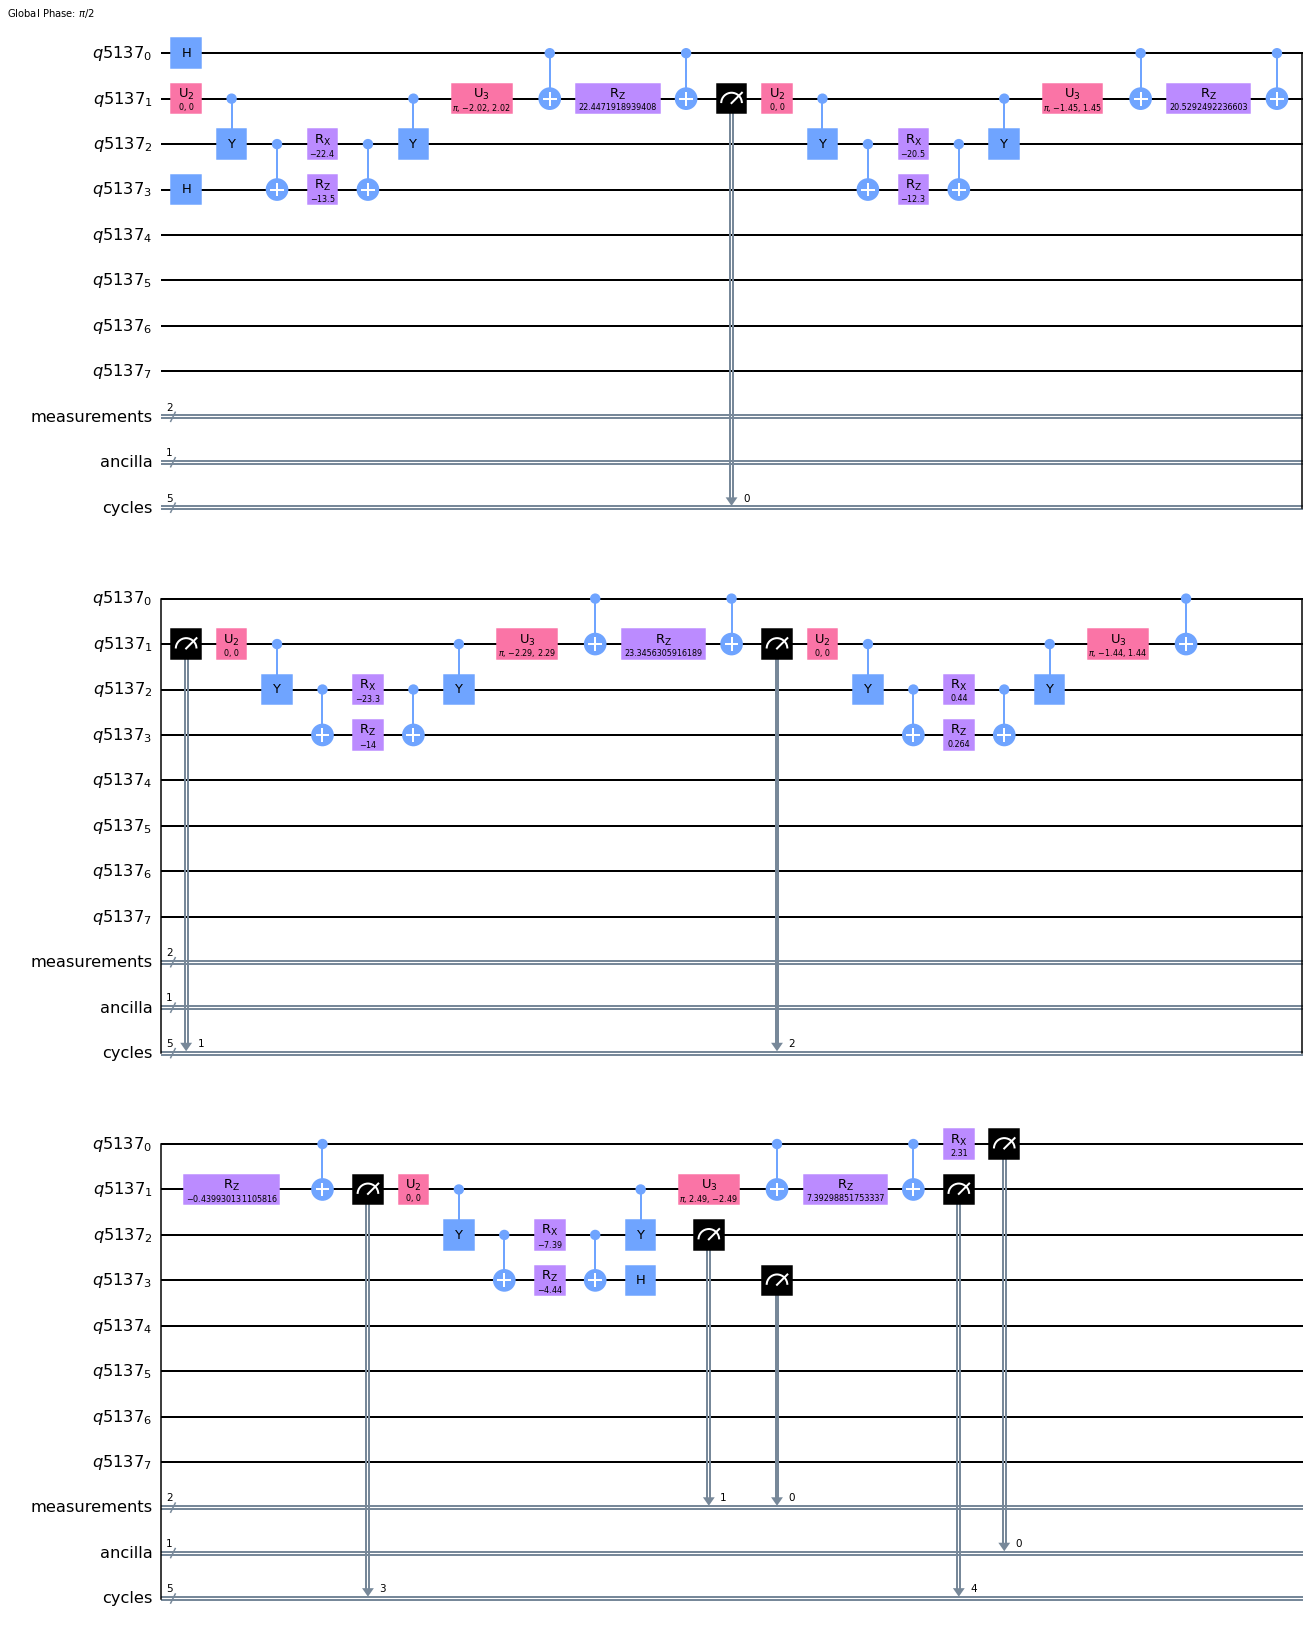

In [8]:
test = run_cont_two_state(5, 5, 2.5, 1.5, -1, 4, 2*np.pi, 20)
test[1][167].draw('mpl')

In [16]:
processed = process_two_state_register(test[0], 5, 5, 2*np.pi, 20)
print(processed)

{'00000 0 00': 5, '00000 0 01': 6, '00000 0 11': 2}
13
{'00000 1 00': 8, '00000 1 01': 11, '00000 1 10': 2}
21
{'00': 8, '01': 11, '10': 2, '11': 0.0}
{'00000 0 00': 6, '00000 0 01': 11, '00000 0 11': 2}
19
{'00000 1 00': 3, '00000 1 01': 9, '00000 1 10': 1, '00000 1 11': 3}
16
{'00': 3, '01': 9, '10': 1, '11': 3}
{'00000 0 00': 7, '00000 0 01': 10, '00000 0 10': 2, '00000 0 11': 2}
21
{'00000 1 00': 3, '00000 1 01': 8}
11
{'00': 3, '01': 8, '10': 0.0, '11': 0.0}
{'00000 0 00': 8, '00000 0 01': 14, '00000 0 10': 1}
23
{'00000 1 00': 3, '00000 1 01': 7, '00000 1 11': 2}
12
{'00': 3, '01': 7, '10': 0.0, '11': 2}
{'00000 0 00': 10, '00000 0 01': 10, '00000 0 10': 1, '00000 0 11': 5}
26
{'00000 1 00': 3, '00000 1 01': 1, '00000 1 11': 2}
6
{'00': 3, '01': 1, '10': 0.0, '11': 2}
{'00000 0 00': 14, '00000 0 01': 8, '00000 0 10': 3, '00000 0 11': 4}
29
{'00000 1 00': 3, '00000 1 01': 2}
5
{'00': 3, '01': 2, '10': 0.0, '11': 0.0}
{'00000 0 00': 8, '00000 0 01': 13, '00000 0 10': 6, '00000 0 11

C:\Users\Max\PycharmProjects\pythonProject\RodeoMethods.py:360: RuntimeWarning: invalid value encountered in double_scalars
  return [overallAverageExpectation, overallQubitExpectations, redundantAverageExpectations, redundantQubitExpectations]


[ 7.61904762e-01  0.00000000e+00  5.45454545e-01  1.66666667e-01
  3.33333333e-01  1.20000000e+00  1.33333333e+00  4.44444444e-01
  0.00000000e+00  7.20000000e-01  3.07692308e-01  7.20000000e-01
  4.54545455e-01  6.66666667e-01  6.00000000e-01  1.11111111e-01
  4.16666667e-01  4.34782609e-01  8.23529412e-01  4.44444444e-01
 -6.66666667e-01 -1.68000000e+00 -1.53846154e+00 -1.55555556e+00
 -1.03448276e+00 -1.61538462e+00 -1.44444444e+00 -1.08333333e+00
 -1.14285714e+00 -1.81818182e+00 -1.69230769e+00 -1.27272727e+00
 -2.00000000e+00 -2.00000000e+00 -1.66666667e+00 -1.50000000e+00
 -1.84615385e+00 -2.00000000e+00 -9.09090909e-01 -1.81818182e+00
  0.00000000e+00  1.81818182e-01  0.00000000e+00 -3.33333333e-01
  1.00000000e+00  0.00000000e+00  5.00000000e-01 -1.33333333e+00
  4.00000000e-01  6.15384615e-01 -1.11022302e-16  5.60000000e-01
 -1.05263158e-01  6.06060606e-02 -7.69230769e-02 -2.14285714e-01
  8.00000000e-02  4.00000000e-01 -1.66666667e-01 -1.33333333e-01
  5.00000000e-01  4.21052

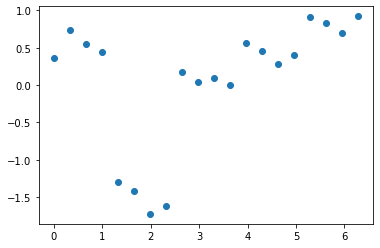

In [24]:
testRange = np.linspace(0, 2*np.pi, 20)
deNand = np.nan_to_num(processed[2])
print(deNand)
print(len(deNand))
averaged = np.mean(np.array(deNand).reshape(-1, 5), axis=1)
print(averaged)

plt.scatter(testRange, averaged)
plt.show()

two state job b6d247cf5d084b00afb5f7eb60d2b657-1672365676022559


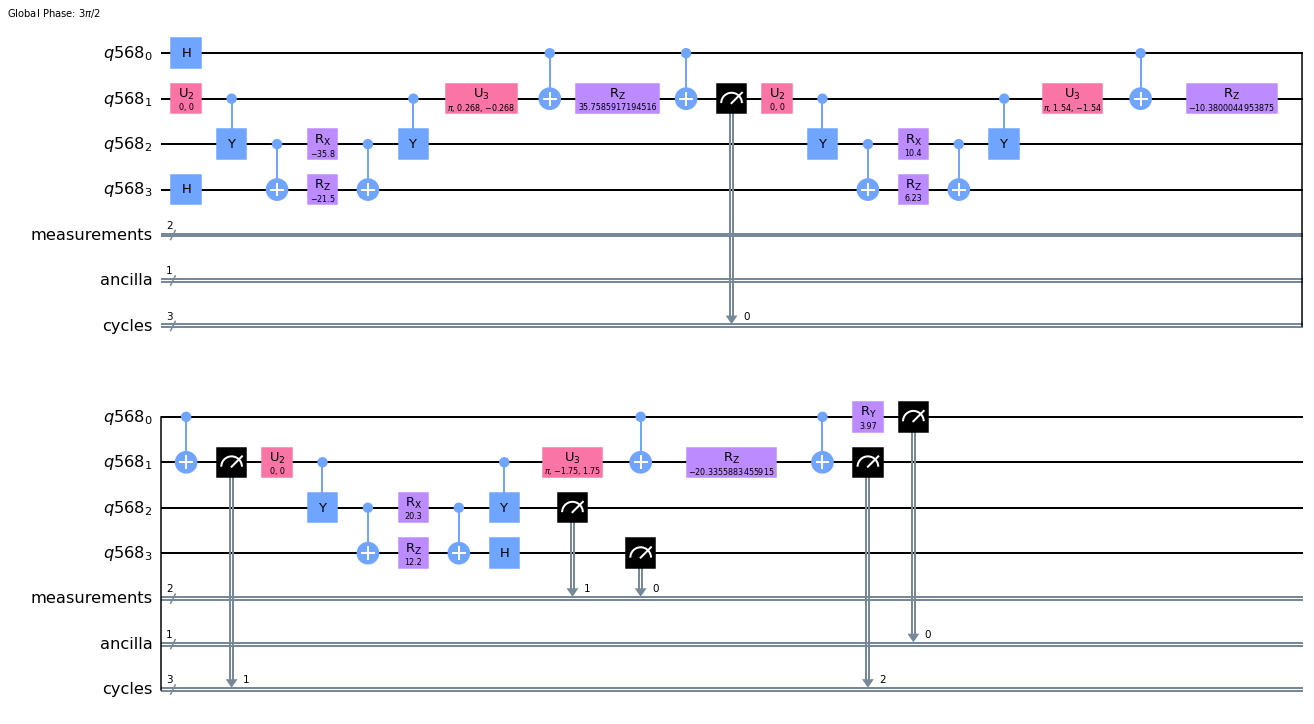

In [5]:
test = run_cont_two_state(3, 1, 2.5, 1.5, -1, 4, 2*np.pi, 20)
test[1][12].draw('mpl')

In [12]:
processed = process_two_state_register(test[0], 3, 1, 2 * np.pi, 20)
print(processed)


{'000 0 01': 40, '000 0 11': 25}
65
{'000 1 01': 41, '000 1 10': 1, '000 1 11': 24}
66
{'00': 0.0, '01': 40, '10': 0.0, '11': 25}
{'00': 0.0, '01': 41, '10': 1, '11': 24}
0
0
0
1
1
0
1
1
{'000 0 01': 35, '000 0 11': 12}
47
{'000 1 00': 1, '000 1 01': 57, '000 1 11': 28}
86
{'00': 0.0, '01': 35, '10': 0.0, '11': 12}
{'00': 1, '01': 57, '10': 0.0, '11': 28}
0
0
0
1
1
0
1
1
{'000 0 01': 24, '000 0 11': 20}
44
{'000 1 01': 52, '000 1 11': 29}
81
{'00': 0.0, '01': 24, '10': 0.0, '11': 20}
{'00': 0.0, '01': 52, '10': 0.0, '11': 29}
0
0
0
1
1
0
1
1
{'000 0 01': 32, '000 0 11': 15}
47
{'000 1 01': 58, '000 1 11': 22}
80
{'00': 0.0, '01': 32, '10': 0.0, '11': 15}
{'00': 0.0, '01': 58, '10': 0.0, '11': 22}
0
0
0
1
1
0
1
1
{'000 0 00': 1, '000 0 01': 29, '000 0 11': 12}
42
{'000 1 01': 58, '000 1 11': 33}
91
{'00': 1, '01': 29, '10': 0.0, '11': 12}
{'00': 0.0, '01': 58, '10': 0.0, '11': 33}
0
0
0
1
1
0
1
1
{'000 0 01': 27, '000 0 11': 13}
40
{'000 1 00': 1, '000 1 01': 53, '000 1 11': 30}
84
{'00

[-0.72727273 -0.62790698 -0.71604938 -0.55       -0.72527473 -0.69047619
 -0.72       -0.55172414 -0.68571429 -0.72222222 -0.57971014 -0.52459016
 -0.45714286 -1.02439024 -0.68571429 -0.61538462 -0.58181818 -0.61818182
 -0.65384615 -0.53521127]
20
[-0.72727273 -0.62790698 -0.71604938 -0.55       -0.72527473 -0.69047619
 -0.72       -0.55172414 -0.68571429 -0.72222222 -0.57971014 -0.52459016
 -0.45714286 -1.02439024 -0.68571429 -0.61538462 -0.58181818 -0.61818182
 -0.65384615 -0.53521127]


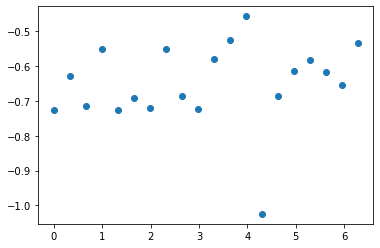

In [9]:
testRange = np.linspace(0, 2*np.pi, 20)
deNand = np.nan_to_num(processed[2])
print(deNand)
print(len(deNand))
averaged = np.mean(np.array(deNand).reshape(-1, 1), axis=1)
print(averaged)

plt.scatter(testRange, averaged)
plt.show()

In [4]:
test = run_cont_two_state(3, 1, 2.5, 1.5, -1, 4, np.pi, 10)

two state job cb7971a870184d4abc6b6e472222d8c6-1673270599924846


In [5]:
process_energy_controlled_two_state(test[0], 3, 10, 1)

ancilla = 0
86
{'000 0 00': 50, '000 0 01': 32, '000 0 10': 3, '000 0 11': 1}
{'00': 50, '01': 32, '10': 3, '11': 1}
ancilla = 1
48
{'000 1 00': 26, '000 1 01': 20, '000 1 10': 2}
{'00': 26, '01': 20, '10': 2, '11': 0.0}
ancilla = 0
46
{'000 0 00': 27, '000 0 01': 17, '000 0 10': 2}
{'00': 27, '01': 17, '10': 2, '11': 0.0}
ancilla = 1
85
{'000 1 00': 47, '000 1 01': 36, '000 1 10': 2}
{'00': 47, '01': 36, '10': 2, '11': 0.0}
ancilla = 0
39
{'000 0 00': 21, '000 0 01': 15, '000 0 10': 2, '000 0 11': 1}
{'00': 21, '01': 15, '10': 2, '11': 1}
ancilla = 1
88
{'000 1 00': 45, '000 1 01': 41, '000 1 10': 1, '000 1 11': 1}
{'00': 45, '01': 41, '10': 1, '11': 1}
ancilla = 0
11
{'000 0 00': 6, '000 0 01': 5}
{'00': 6, '01': 5, '10': 0.0, '11': 0.0}
ancilla = 1
119
{'000 1 00': 50, '000 1 01': 63, '000 1 10': 4, '000 1 11': 2}
{'00': 50, '01': 63, '10': 4, '11': 2}
ancilla = 0
10
{'000 0 00': 6, '000 0 01': 3, '000 0 11': 1}
{'00': 6, '01': 3, '10': 0.0, '11': 1}
ancilla = 1
110
{'000 1 00': 54,

two state job 8e0ecbac424f44feabf941a0ed55c1a4-16732847450722117


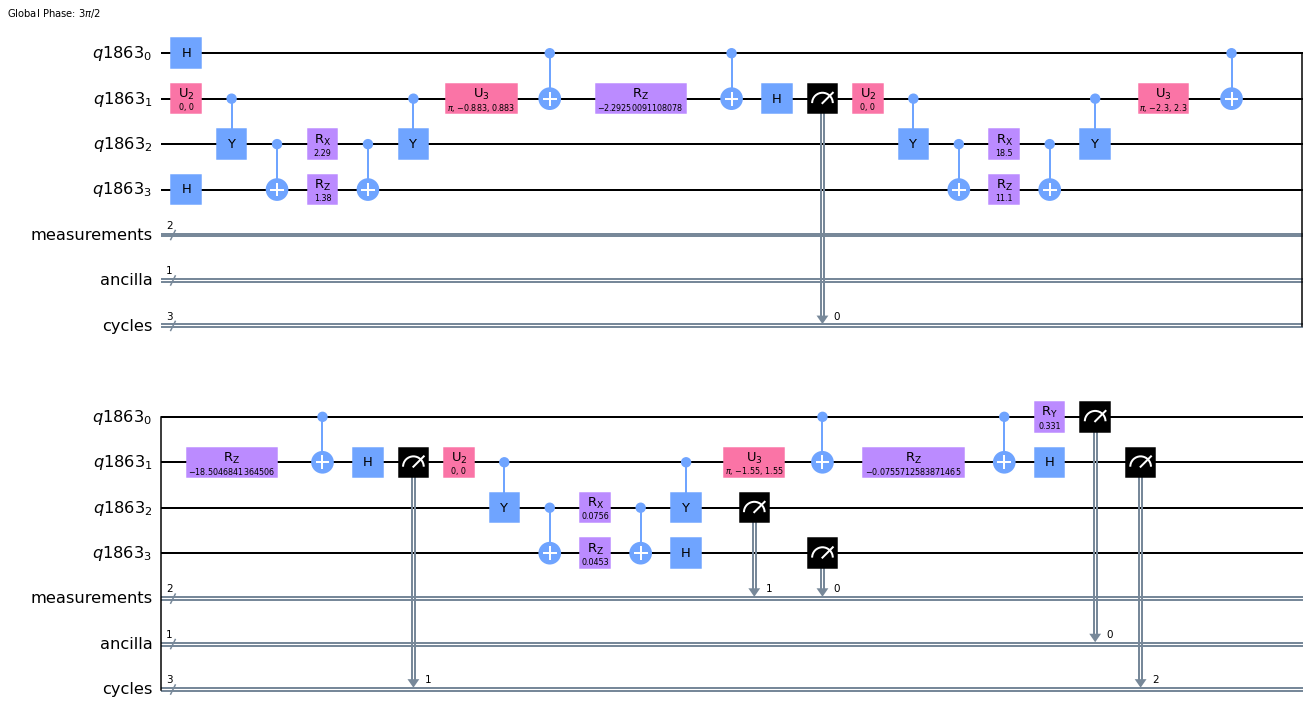

In [28]:
test = run_cont_two_state(3, 1, 2.5, 1.5, -1, 4, 2*np.pi, 20)
test[1][1].draw('mpl')

In [34]:
process_energy_controlled_two_state(test[0], 3, 20, 1)

total
362
ancilla = 0
187
{'000 0 00': 14, '000 0 10': 71, '000 0 11': 102}
{'00': 14, '01': 0.0, '10': 71, '11': 102}
ancilla = 1
175
{'000 1 00': 8, '000 1 01': 2, '000 1 10': 54, '000 1 11': 111}
{'00': 8, '01': 2, '10': 54, '11': 111}
total
361
ancilla = 0
239
{'000 0 00': 7, '000 0 10': 73, '000 0 11': 159}
{'00': 7, '01': 0.0, '10': 73, '11': 159}
ancilla = 1
122
{'000 1 00': 15, '000 1 10': 39, '000 1 11': 68}
{'00': 15, '01': 0.0, '10': 39, '11': 68}
total
382
ancilla = 0
297
{'000 0 00': 4, '000 0 10': 105, '000 0 11': 188}
{'00': 4, '01': 0.0, '10': 105, '11': 188}
ancilla = 1
85
{'000 1 00': 22, '000 1 10': 26, '000 1 11': 37}
{'00': 22, '01': 0.0, '10': 26, '11': 37}
total
361
ancilla = 0
307
{'000 0 00': 5, '000 0 10': 105, '000 0 11': 197}
{'00': 5, '01': 0.0, '10': 105, '11': 197}
ancilla = 1
54
{'000 1 00': 20, '000 1 01': 2, '000 1 10': 14, '000 1 11': 18}
{'00': 20, '01': 2, '10': 14, '11': 18}
total
349
ancilla = 0
312
{'000 0 10': 104, '000 0 11': 208}
{'00': 0.0, '

In [30]:
processed = process_two_state_register(test[0], 3, 1, 2*np.pi, 20)
print(processed)

{'000 0 00': 14, '000 0 10': 71, '000 0 11': 102}
187
{'000 1 00': 8, '000 1 01': 2, '000 1 10': 54, '000 1 11': 111}
175
{'00': 14, '01': 0.0, '10': 71, '11': 102}
{'00': 8, '01': 2, '10': 54, '11': 111}
0
0
0
1
1
0
1
1
{'000 0 00': 7, '000 0 10': 73, '000 0 11': 159}
239
{'000 1 00': 15, '000 1 10': 39, '000 1 11': 68}
122
{'00': 7, '01': 0.0, '10': 73, '11': 159}
{'00': 15, '01': 0.0, '10': 39, '11': 68}
0
0
0
1
1
0
1
1
{'000 0 00': 4, '000 0 10': 105, '000 0 11': 188}
297
{'000 1 00': 22, '000 1 10': 26, '000 1 11': 37}
85
{'00': 4, '01': 0.0, '10': 105, '11': 188}
{'00': 22, '01': 0.0, '10': 26, '11': 37}
0
0
0
1
1
0
1
1
{'000 0 00': 5, '000 0 10': 105, '000 0 11': 197}
307
{'000 1 00': 20, '000 1 01': 2, '000 1 10': 14, '000 1 11': 18}
54
{'00': 5, '01': 0.0, '10': 105, '11': 197}
{'00': 20, '01': 2, '10': 14, '11': 18}
0
0
0
1
1
0
1
1
{'000 0 10': 104, '000 0 11': 208}
312
{'000 1 00': 34, '000 1 10': 1, '000 1 11': 2}
37
{'00': 0.0, '01': 0.0, '10': 104, '11': 208}
{'00': 34, '

[-1.17714286 -0.86885246 -0.35294118  0.07407407  1.72972973  1.73333333
  0.35897436 -0.57142857 -0.96       -0.81290323 -0.99521531 -1.13857678
 -1.24344569 -1.29518072 -1.22898551 -1.22424242 -1.19620253 -1.06227106
 -1.05263158 -0.80503145]
20
[-1.17714286 -0.86885246 -0.35294118  0.07407407  1.72972973  1.73333333
  0.35897436 -0.57142857 -0.96       -0.81290323 -0.99521531 -1.13857678
 -1.24344569 -1.29518072 -1.22898551 -1.22424242 -1.19620253 -1.06227106
 -1.05263158 -0.80503145]


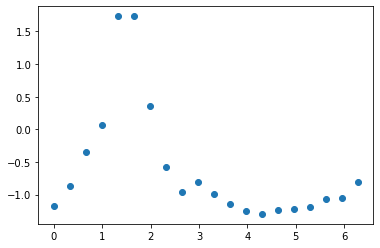

In [31]:
testRange = np.linspace(0, 2*np.pi, 20)
deNand = np.nan_to_num(processed[2])
print(deNand)
print(len(deNand))
averaged = np.mean(np.array(deNand).reshape(-1, 1), axis=1)
print(averaged)

plt.scatter(testRange, averaged)
plt.show()

two state job 34d0aa7be9644a97bc9d33f7557226da-16738746666610177


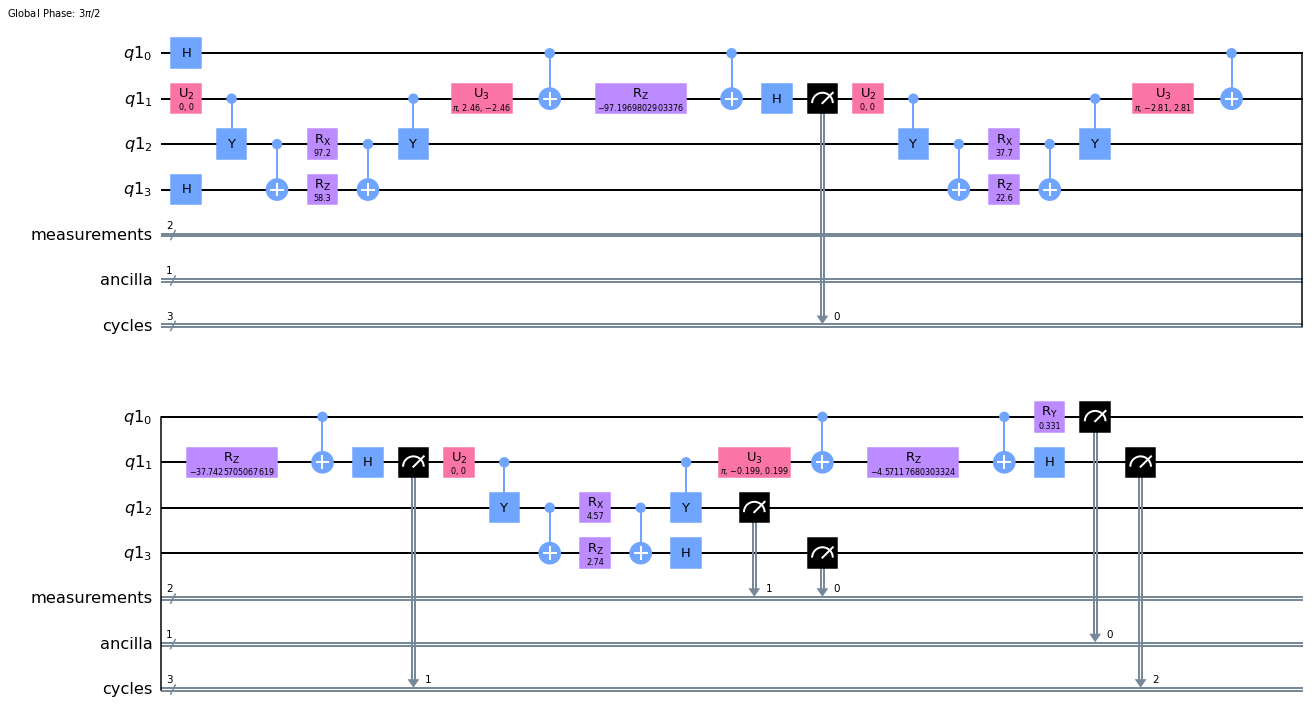

In [4]:
test = run_cont_two_state(3, 1, 2.5, 1.5, -1, 4, 2*np.pi, 20)
test[1][1].draw('mpl')

In [7]:
processed = process_energy_controlled_two_state(test[0], 3, 20, 1)
print(processed)

total
274
ancilla = 0
141
{'000 0 00': 43, '000 0 01': 51, '000 0 10': 12, '000 0 11': 35}
{'00': 43, '01': 51, '10': 12, '11': 35}
ancilla = 1
133
{'000 1 00': 33, '000 1 01': 45, '000 1 10': 14, '000 1 11': 41}
{'00': 33, '01': 45, '10': 14, '11': 41}
expectations: 
-0.11347517730496454
0.12030075187969924
total
254
ancilla = 0
126
{'000 0 00': 35, '000 0 01': 37, '000 0 10': 11, '000 0 11': 43}
{'00': 35, '01': 37, '10': 11, '11': 43}
ancilla = 1
128
{'000 1 00': 41, '000 1 01': 57, '000 1 10': 10, '000 1 11': 20}
{'00': 41, '01': 57, '10': 10, '11': 20}
expectations: 
0.12698412698412698
-0.328125
total
298
ancilla = 0
121
{'000 0 00': 21, '000 0 01': 20, '000 0 10': 26, '000 0 11': 54}
{'00': 21, '01': 20, '10': 26, '11': 54}
ancilla = 1
177
{'000 1 00': 56, '000 1 01': 94, '000 1 10': 12, '000 1 11': 15}
{'00': 56, '01': 94, '10': 12, '11': 15}
expectations: 
0.5454545454545454
-0.46327683615819215
total
267
ancilla = 0
99
{'000 0 00': 8, '000 0 01': 4, '000 0 10': 27, '000 0 11'

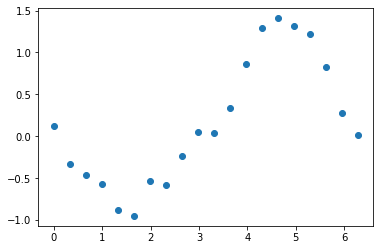

In [10]:
testRange = np.linspace(0, 2*np.pi, 20)
deNand = np.nan_to_num(processed[1])
averaged = np.mean(np.array(deNand).reshape(-1, 1), axis=1)

plt.scatter(testRange, averaged)
plt.show()

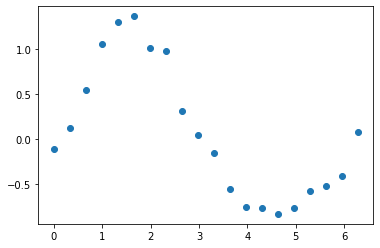

In [11]:
testRange = np.linspace(0, 2*np.pi, 20)
deNand = np.nan_to_num(processed[0])
averaged = np.mean(np.array(deNand).reshape(-1, 1), axis=1)

plt.scatter(testRange, averaged)
plt.show()

In [23]:
# test = run_cont_two_state(5, 5, 2.5, 1.5, -1, 4, 2*np.pi, 60)
# jobID = 63c54f43447dd382e03b5fa8
processed = process_energy_controlled_two_state(test[0], 5, 60, 5)

total
241
ancilla = 0
126
{'00000 0 00': 37, '00000 0 01': 29, '00000 0 10': 33, '00000 0 11': 27}
{'00': 37, '01': 29, '10': 33, '11': 27}
ancilla = 1
115
{'00000 1 00': 11, '00000 1 01': 42, '00000 1 10': 50, '00000 1 11': 12}
{'00': 11, '01': 42, '10': 50, '11': 12}
expectations: 
-0.15873015873015878
0.01739130434782607
total
269
ancilla = 0
134
{'00000 0 00': 26, '00000 0 01': 26, '00000 0 10': 42, '00000 0 11': 40}
{'00': 26, '01': 26, '10': 42, '11': 40}
ancilla = 1
135
{'00000 1 00': 11, '00000 1 01': 48, '00000 1 10': 52, '00000 1 11': 24}
{'00': 11, '01': 48, '10': 52, '11': 24}
expectations: 
0.20895522388059695
0.1925925925925926
total
276
ancilla = 0
139
{'00000 0 00': 25, '00000 0 01': 21, '00000 0 10': 53, '00000 0 11': 40}
{'00': 25, '01': 21, '10': 53, '11': 40}
ancilla = 1
137
{'00000 1 00': 15, '00000 1 01': 69, '00000 1 10': 43, '00000 1 11': 10}
{'00': 15, '01': 69, '10': 43, '11': 10}
expectations: 
0.2158273381294964
-0.07299270072992703
total
275
ancilla = 0
135

60


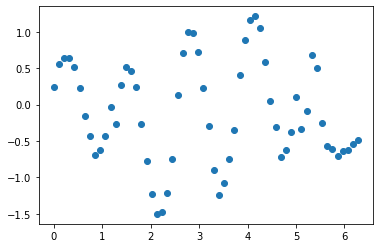

In [24]:
testRange = np.linspace(0, 2*np.pi, 60)
print(len(processed[0]))
plt.scatter(testRange, processed[0])
plt.show()

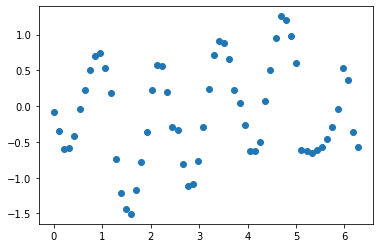

In [25]:
plt.scatter(testRange, processed[1])
plt.show()

In [32]:
test = run_cont_two_state(5, 15, 2.5, 1.5, -1, 4, 2*np.pi, 20)
processed = process_energy_controlled_two_state(test[0], 5, 20, 15)

two state job 51909db8ae344fe5afb55a747fccfdfb-1673875804597233
total
403
ancilla = 0
219
{'00000 0 00': 2, '00000 0 10': 143, '00000 0 11': 74}
{'00': 2, '01': 0.0, '10': 143, '11': 74}
ancilla = 1
184
{'00000 1 00': 1, '00000 1 01': 1, '00000 1 10': 130, '00000 1 11': 52}
{'00': 1, '01': 1, '10': 130, '11': 52}
expectations: 
0.6575342465753424
0.5543478260869564
total
420
ancilla = 0
296
{'00000 0 00': 1, '00000 0 10': 185, '00000 0 11': 110}
{'00': 1, '01': 0.0, '10': 185, '11': 110}
ancilla = 1
124
{'00000 1 00': 3, '00000 1 01': 1, '00000 1 10': 84, '00000 1 11': 36}
{'00': 3, '01': 1, '10': 84, '11': 36}
expectations: 
0.7364864864864864
0.5322580645161291
total
398
ancilla = 0
318
{'00000 0 10': 222, '00000 0 11': 96}
{'00': 0.0, '01': 0.0, '10': 222, '11': 96}
ancilla = 1
80
{'00000 1 00': 2, '00000 1 10': 58, '00000 1 11': 20}
{'00': 2, '01': 0.0, '10': 58, '11': 20}
expectations: 
0.6037735849056604
0.45
total
439
ancilla = 0
393
{'00000 0 10': 255, '00000 0 11': 138}
{'00':

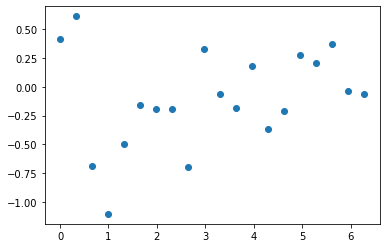

In [33]:
testRange = np.linspace(0, 2*np.pi, 20)
plt.scatter(testRange, processed[0])
plt.show()

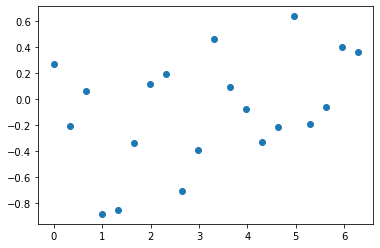

In [34]:
plt.scatter(testRange, processed[1])
plt.show()

In [31]:
print(processed)

[array([ 1.29524815e+00,  2.99475029e-01, -6.69168145e-02, -1.83009935e-01,
        3.17136188e-01,  6.28612427e-04, -3.21415972e-01, -8.07599806e-02,
        2.14908054e-01,  1.61111257e-01, -4.77798749e-01, -1.09919590e+00,
        7.95032973e-01,  3.76998246e-01, -1.69926266e-01, -1.88777865e-01,
        2.32693355e-01,  1.02223946e-01, -3.26062746e-01, -3.21281972e-01]), array([ 0.89701451,  0.18720006, -0.03111912,  0.24774026, -0.10807618,
       -0.22188756,  0.03631815,  0.14258897, -0.14039744, -0.1411723 ,
       -0.13992514, -0.72141332,  0.37905031, -0.01977474,  0.26731394,
        0.21479538, -0.13596083, -0.29740599, -0.09465695,  0.12318771])]


In [42]:
test = run_cont_two_state(5, 15, 2.5, 1.5, -1, 4, 2*np.pi, 60)
processed = process_energy_controlled_two_state(test[0], 5, 60, 15)

two state job 553edc105581403f81674c37d26fa335-16738768504710045
total
344
ancilla = 0
183
{'00000 0 00': 7, '00000 0 01': 4, '00000 0 10': 70, '00000 0 11': 102}
{'00': 7, '01': 4, '10': 70, '11': 102}
ancilla = 1
161
{'00000 1 00': 5, '00000 1 01': 7, '00000 1 10': 86, '00000 1 11': 63}
{'00': 5, '01': 7, '10': 86, '11': 63}
expectations: 
1.0382513661202184
0.7204968944099379
total
332
ancilla = 0
164
{'00000 0 00': 4, '00000 0 01': 4, '00000 0 10': 59, '00000 0 11': 97}
{'00': 4, '01': 4, '10': 59, '11': 97}
ancilla = 1
168
{'00000 1 00': 9, '00000 1 01': 5, '00000 1 10': 65, '00000 1 11': 89}
{'00': 9, '01': 5, '10': 65, '11': 89}
expectations: 
1.1341463414634145
0.9523809523809524
total
307
ancilla = 0
155
{'00000 0 00': 9, '00000 0 01': 5, '00000 0 10': 62, '00000 0 11': 79}
{'00': 9, '01': 5, '10': 62, '11': 79}
ancilla = 1
152
{'00000 1 00': 8, '00000 1 01': 4, '00000 1 10': 68, '00000 1 11': 72}
{'00': 8, '01': 4, '10': 68, '11': 72}
expectations: 
0.9032258064516129
0.84210

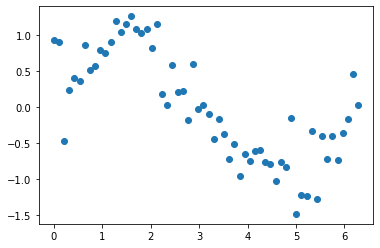

In [43]:
testRange = np.linspace(0, 2*np.pi, 60)
plt.scatter(testRange, processed[0])
plt.show()

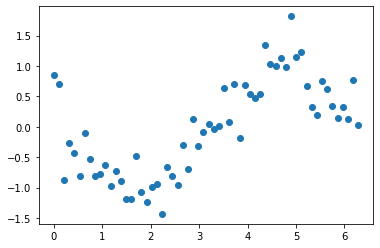

In [45]:
testRange = np.linspace(0, 2*np.pi, 60)
plt.scatter(testRange, processed[1])
plt.show()

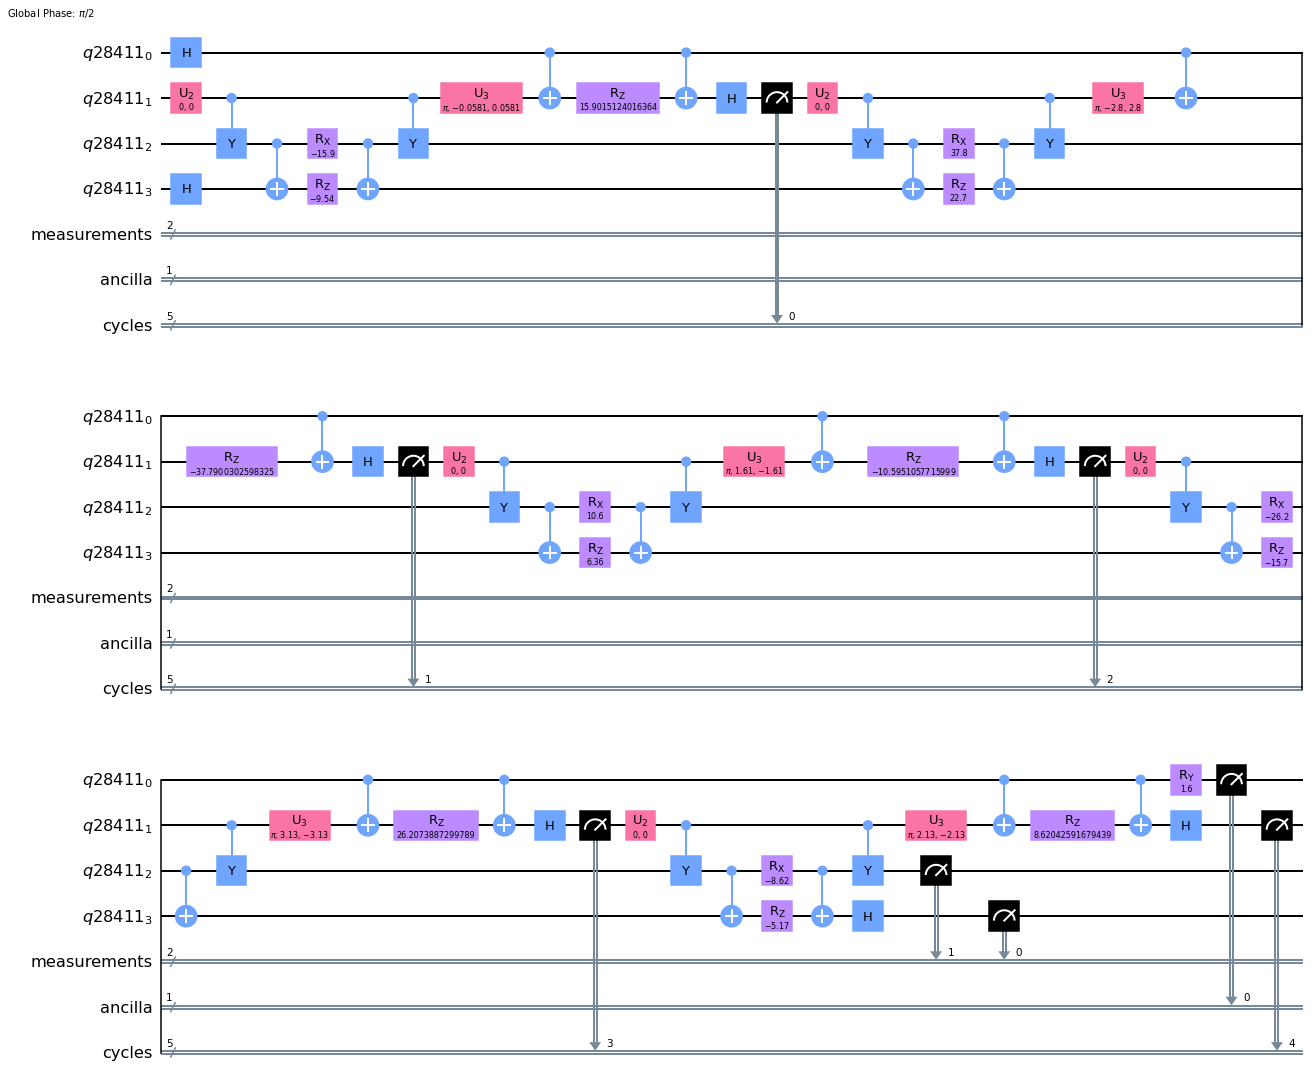

In [39]:
test[1][15].draw('mpl')

In [46]:
test = run_cont_two_state(5, 30, 2.5, 1.5, -1, 4, 2*np.pi, 10)
processed = process_energy_controlled_two_state(test[0], 5, 10, 30)

two state job e8044987e30444af9162c224a5c2d14e-16738770074542675
total
257
ancilla = 0
143
{'00000 0 00': 20, '00000 0 01': 47, '00000 0 10': 29, '00000 0 11': 47}
{'00': 20, '01': 47, '10': 29, '11': 47}
ancilla = 1
114
{'00000 1 00': 16, '00000 1 01': 41, '00000 1 10': 24, '00000 1 11': 33}
{'00': 16, '01': 41, '10': 24, '11': 33}
expectations: 
0.37762237762237755
0.29824561403508776
total
272
ancilla = 0
127
{'00000 0 00': 20, '00000 0 01': 46, '00000 0 10': 20, '00000 0 11': 41}
{'00': 20, '01': 46, '10': 20, '11': 41}
ancilla = 1
145
{'00000 1 00': 17, '00000 1 01': 67, '00000 1 10': 31, '00000 1 11': 30}
{'00': 17, '01': 67, '10': 31, '11': 30}
expectations: 
0.3307086614173228
0.1793103448275862
total
252
ancilla = 0
117
{'00000 0 00': 24, '00000 0 01': 42, '00000 0 10': 12, '00000 0 11': 39}
{'00': 24, '01': 42, '10': 12, '11': 39}
ancilla = 1
135
{'00000 1 00': 17, '00000 1 01': 45, '00000 1 10': 34, '00000 1 11': 39}
{'00': 17, '01': 45, '10': 34, '11': 39}
expectations: 
0.

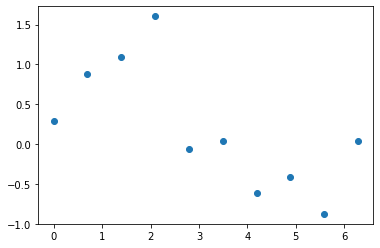

In [47]:
testRange = np.linspace(0, 2*np.pi, 10)
plt.scatter(testRange, processed[0])
plt.show()

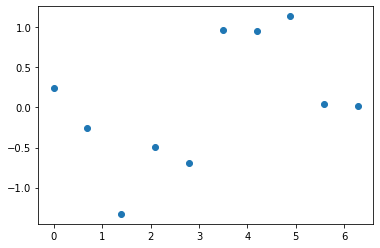

In [48]:
plt.scatter(testRange, processed[1])
plt.show()

In [17]:
cycles5Redundancy30Scans = run_cont_two_state(5, 30, 2.5, 1.5, -1, 4, 2*np.pi, 30)
cycles5Redundancy30ScansProcessed = process_energy_controlled_two_state(test[0], 5, 30, 30)

two state job 4dd4f90d1189405887a7edff707886b5-16752226920839925
total
285
ancilla = 0
136
{'00000 0 00': 25, '00000 0 01': 41, '00000 0 10': 45, '00000 0 11': 25}
{'00': 25, '01': 41, '10': 45, '11': 25}
ancilla = 1
149
{'00000 1 00': 11, '00000 1 01': 58, '00000 1 10': 70, '00000 1 11': 10}
{'00': 11, '01': 58, '10': 70, '11': 10}
expectations: 
0.0
0.013422818791946317
total
325
ancilla = 0
145
{'00000 0 00': 29, '00000 0 01': 51, '00000 0 10': 49, '00000 0 11': 16}
{'00': 29, '01': 51, '10': 49, '11': 16}
ancilla = 1
180
{'00000 1 00': 16, '00000 1 01': 71, '00000 1 10': 82, '00000 1 11': 11}
{'00': 16, '01': 71, '10': 82, '11': 11}
expectations: 
0.17931034482758623
0.055555555555555566
total
269
ancilla = 0
138
{'00000 0 00': 15, '00000 0 01': 47, '00000 0 10': 16, '00000 0 11': 60}
{'00': 15, '01': 47, '10': 16, '11': 60}
ancilla = 1
131
{'00000 1 00': 12, '00000 1 01': 50, '00000 1 10': 11, '00000 1 11': 58}
{'00': 12, '01': 50, '10': 11, '11': 58}
expectations: 
-0.65217391304

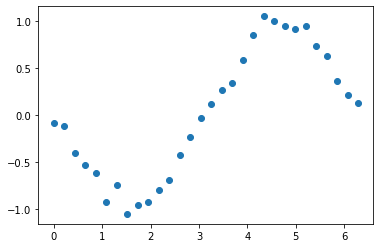

In [20]:
testRange = np.linspace(0, 2*np.pi, 30)
plt.scatter(testRange, cycles5Redundancy30ScansProcessed[0])
plt.show()

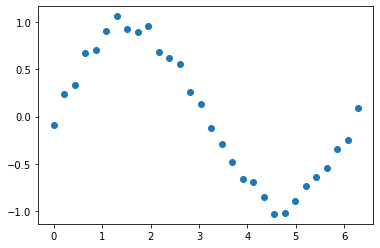

In [21]:
plt.scatter(testRange, cycles5Redundancy30ScansProcessed[1])
plt.show()

[[Model]]
    (((Model(constant, prefix='aa_') + Model(constant, prefix='bb_')) + Model(sine, prefix='selfDifference_')) + Model(sine, prefix='interactionElement_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 390
    # data points      = 30
    # variables        = 4
    chi-square         = 0.17451581
    reduced chi-square = 0.00671215
    Akaike info crit   = -146.408121
    Bayesian info crit = -140.803331
[[Variables]]
    aa_c:                         -0.17553772 +/- 1.67093289 (951.89%) (init = 0)
    bb_c:                          0.19211462 +/- 1.67093722 (869.76%) (init = 0)
    selfDifference_amplitude:      0.36765234 +/- 3.34183655 (908.97%) == 'bb_c-aa_c'
    selfDifference_frequency:      1 (fixed)
    selfDifference_shift:          4.712389 (fixed)
    interactionElement_amplitude:  1.03802972 +/- 1.23366074 (118.85%) (init = 0)
    interactionElement_frequency:  1 (fixed)
    interactionElement_shift:      2.76351697 +/- 2.99201284

C:\Users\Max\AppData\Local\Programs\Python\Python310\lib\site-packages\lmfit\minimizer.py:847: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
C:\Users\Max\AppData\Local\Programs\Python\Python310\lib\site-packages\lmfit\minimizer.py:854: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
C:\Users\Max\AppData\Local\Programs\Python\Python310\lib\site-packages\uncertainties\core.py:173: RuntimeWarning: invalid value encountered in sqrt
  std_devs = numpy.sqrt(numpy.diag(covariance_mat))


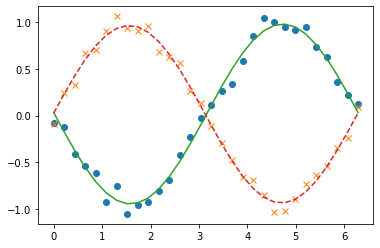

In [35]:
cycles5Redundancy30ScansFitResults = fit_controlled_two_state(cycles5Redundancy30ScansProcessed, 2*np.pi, 30, printResults=True)

[[Variables]]
    amplitude_1:  0.96475034 +/- 0.01932187 (2.00%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:        0.00860595 +/- 0.00813706 (94.55%) (init = 0)
    mbb_1:        0.00698923 +/- 0.00813706 (116.42%) (init = 0)
    amplitude_2:  0.95157950 +/- 0.01932187 (2.03%) (init = 1)
    frequency_2:  1 (fixed)
    maa_2:        0.00860595 +/- 0.00813706 (94.55%) == 'maa_1'
    mbb_2:        0.00698923 +/- 0.00813706 (116.42%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.319


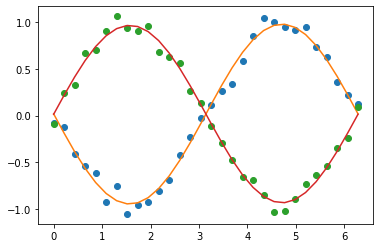

[[0.9647503401666886, 0.019321871783145376], [0.9515795001976304, 0.019321871797963366]]


In [60]:
cycles5Redundancy30ScansSimultaneousFitResults = simultaneous_controlled_two_state_fit(cycles5Redundancy30ScansProcessed, 2*np.pi, 30, printResults=True)
cycles5Redundancy30ScansEstimates = get_estimates(cycles5Redundancy30ScansSimultaneousFitResults)
print(cycles5Redundancy30ScansEstimates)

In [61]:
cycles5Redundancy10Scans30 = run_cont_two_state(5, 10, 2.5, 1.5, -1, 4, 2*np.pi, 30)

two state job 1cb777384fe4436bb9740bffe72f7b2b-16752285068774614
total
285
ancilla = 0
136
{'00000 0 00': 25, '00000 0 01': 41, '00000 0 10': 45, '00000 0 11': 25}
{'00': 25, '01': 41, '10': 45, '11': 25}
ancilla = 1
149
{'00000 1 00': 11, '00000 1 01': 58, '00000 1 10': 70, '00000 1 11': 10}
{'00': 11, '01': 58, '10': 70, '11': 10}
expectations: 
0.0
0.013422818791946317
total
325
ancilla = 0
145
{'00000 0 00': 29, '00000 0 01': 51, '00000 0 10': 49, '00000 0 11': 16}
{'00': 29, '01': 51, '10': 49, '11': 16}
ancilla = 1
180
{'00000 1 00': 16, '00000 1 01': 71, '00000 1 10': 82, '00000 1 11': 11}
{'00': 16, '01': 71, '10': 82, '11': 11}
expectations: 
0.17931034482758623
0.055555555555555566
total
269
ancilla = 0
138
{'00000 0 00': 15, '00000 0 01': 47, '00000 0 10': 16, '00000 0 11': 60}
{'00': 15, '01': 47, '10': 16, '11': 60}
ancilla = 1
131
{'00000 1 00': 12, '00000 1 01': 50, '00000 1 10': 11, '00000 1 11': 58}
{'00': 12, '01': 50, '10': 11, '11': 58}
expectations: 
-0.65217391304

In [75]:
cycles5Redundancy10Scans30Processed = process_energy_controlled_two_state(cycles5Redundancy10Scans30[0], 5, 30, 10)
cycles5Redundancy10Scans30FitResults = simultaneous_controlled_two_state_fit(cycles5Redundancy10Scans30Processed, 2*np.pi, 30, printResults=True)
cycles5Redundancy10Scans30Estimates = get_estimates(cycles5Redundancy10Scans30FitResults)
print(cycles5Redundancy10Scans30Estimates)
print(cycles5Redundancy10Scans30Estimates[0][1]/cycles5Redundancy10Scans30Estimates[0][0], cycles5Redundancy10Scans30Estimates[1][1]/cycles5Redundancy10Scans30Estimates[1][0])

[[0.9633005869924361, 0.03166372028018572], [0.9216841304201768, 0.03166372021430365]]
0.032870031128128384 0.03435419919823163


two state job 9b1a6e31408247b2b3f69a8110cd0f28-16752295877466116
[[Variables]]
    amplitude_1:  0.94761108 +/- 0.04711884 (4.97%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:       -0.04359149 +/- 0.01984325 (45.52%) (init = 0)
    mbb_1:        0.01261531 +/- 0.01984325 (157.29%) (init = 0)
    amplitude_2:  0.95090571 +/- 0.04711884 (4.96%) (init = 1)
    frequency_2:  1 (fixed)
    maa_2:       -0.04359149 +/- 0.01984325 (45.52%) == 'maa_1'
    mbb_2:        0.01261531 +/- 0.01984325 (157.29%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.319


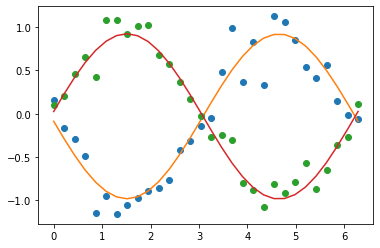

[[0.9476110781126207, 0.04711883640978053], [0.9509057133423024, 0.0471188366709481]]
0.04972381338515821 0.04955153387955982


In [80]:
cycles5Redundancy5Scans30 = run_cont_two_state(5, 5, 2.5, 1.5, -1, 4, 2*np.pi, 30)
cycles5Redundancy5Scans30Processed = process_energy_controlled_two_state(cycles5Redundancy5Scans30[0], 5, 30, 5)
cycles5Redundancy5Scans30FitResults = simultaneous_controlled_two_state_fit(cycles5Redundancy5Scans30Processed, 2*np.pi, 30, printResults=True)
cycles5Redundancy5Scans30Estimates = get_estimates(cycles5Redundancy5Scans30FitResults)
print(cycles5Redundancy5Scans30Estimates)
print(cycles5Redundancy5Scans30Estimates[0][1]/cycles5Redundancy5Scans30Estimates[0][0], cycles5Redundancy5Scans30Estimates[1][1]/cycles5Redundancy5Scans30Estimates[1][0])

two state job f850d1e5607041df98fd2c6bcde934fb-16752296136819968
[[Variables]]
    amplitude_1:  0.97452553 +/- 0.06453317 (6.62%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:        0.00982745 +/- 0.02717698 (276.54%) (init = 0)
    mbb_1:       -0.01078579 +/- 0.02717698 (251.97%) (init = 0)
    amplitude_2:  0.90482736 +/- 0.06453317 (7.13%) (init = 1)
    frequency_2:  1 (fixed)
    maa_2:        0.00982745 +/- 0.02717698 (276.54%) == 'maa_1'
    mbb_2:       -0.01078579 +/- 0.02717698 (251.97%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.319


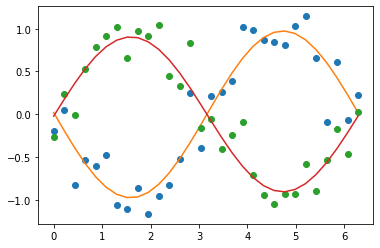

[[0.9745255295093489, 0.06453316887278449], [0.9048273572664572, 0.06453316860806792]]
0.06622009061709799 0.07132097420554


In [81]:
cycles5Redundancy3Scans30 = run_cont_two_state(5, 3, 2.5, 1.5, -1, 4, 2*np.pi, 30)
cycles5Redundancy3Scans30Processed = process_energy_controlled_two_state(cycles5Redundancy3Scans30[0], 5, 30, 3)
cycles5Redundancy3Scans30FitResults = simultaneous_controlled_two_state_fit(cycles5Redundancy3Scans30Processed, 2*np.pi, 30, printResults=True)
cycles5Redundancy3Scans30Estimates = get_estimates(cycles5Redundancy3Scans30FitResults)
print(cycles5Redundancy3Scans30Estimates)
print(cycles5Redundancy3Scans30Estimates[0][1]/cycles5Redundancy3Scans30Estimates[0][0], cycles5Redundancy3Scans30Estimates[1][1]/cycles5Redundancy3Scans30Estimates[1][0])

two state job 3728bbd370b54597aeaa87b9b089984a-1675229644996541
[[Variables]]
    amplitude_1:  0.88618022 +/- 0.11426864 (12.89%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:       -0.03885098 +/- 0.04812218 (123.86%) (init = 0)
    mbb_1:       -0.02116112 +/- 0.04812218 (227.41%) (init = 0)
    amplitude_2:  0.90871196 +/- 0.11426864 (12.57%) (init = 1)
    frequency_2:  1 (fixed)
    maa_2:       -0.03885098 +/- 0.04812218 (123.86%) == 'maa_1'
    mbb_2:       -0.02116112 +/- 0.04812218 (227.41%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.319


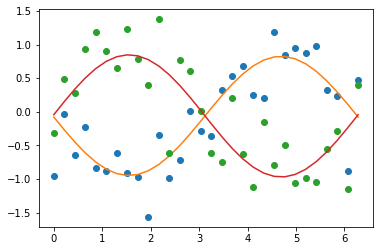

[[0.8861802227299126, 0.11426864456151346], [0.9087119555589841, 0.11426864476478517]]
0.1289451531760712 0.12574792712449137


In [82]:
cycles5Redundancy1Scans30 = run_cont_two_state(5, 1, 2.5, 1.5, -1, 4, 2*np.pi, 30)
cycles5Redundancy1Scans30Processed = process_energy_controlled_two_state(cycles5Redundancy1Scans30[0], 5, 30, 1)
cycles5Redundancy1Scans30FitResults = simultaneous_controlled_two_state_fit(cycles5Redundancy1Scans30Processed, 2*np.pi, 30, printResults=True)
cycles5Redundancy1Scans30Estimates = get_estimates(cycles5Redundancy1Scans30FitResults)
print(cycles5Redundancy1Scans30Estimates)
print(cycles5Redundancy1Scans30Estimates[0][1]/cycles5Redundancy1Scans30Estimates[0][0], cycles5Redundancy1Scans30Estimates[1][1]/cycles5Redundancy1Scans30Estimates[1][0])

In [118]:
test5Cycle3Redundancy30Scans = test_controlled_two_state_params(10, 5, 3, 30)
print(test5Cycle3Redundancy30Scans[1])
print(test5Cycle3Redundancy30Scans[3])

[[0.8179467  0.89601318 1.10222613 0.9113734  0.89656547 1.00184933
  0.88075363 1.00000798 0.95153683 0.89443683]
 [0.9942113  0.93092318 0.73590682 1.04204399 0.87548544 0.93662017
  0.99666596 0.90177804 0.99544103 1.0199057 ]]
[[0.06044294 0.07045136 0.06625027 0.05440038 0.06190205 0.06489568
  0.07629751 0.06474798 0.0557232  0.06703026]
 [0.04972696 0.06780941 0.0992283  0.04757867 0.06339254 0.06941521
  0.0674241  0.07180092 0.05326551 0.05878419]]


In [119]:
print(np.std(test5Cycle3Redundancy30Scans[1][0]),np.std(test5Cycle3Redundancy30Scans[1][1]))

0.07666622256138372 0.07666622256138372


In [28]:
e1 = np.array([0.5, -0.5, 0.5, 0.5])
e4 = np.array([0.5, 0.5, 0.5, -0.5])
initial = 2 * e4 + e1
normalized = initial / np.linalg.norm(initial)
print(normalized.tolist())
test = make_cont_two_state_test_circs(5, 100, 2.5, 1.5, -1, 4, [0], initialState=normalized.tolist())
# print(test)
transpiledTest = [transpile(circ, backendStatevector) for circ in test]
results = [backendStatevector.run(transcirc).result() for transcirc in transpiledTest]
# print(results)
total0 = list()
total1 = list()
statevectors = [result.get_statevector(0) for result in results]
readouts = [result.get_counts(0) for result in results]
for i in range(len(readouts)):
    # print(readouts[i])
    isSuccess = True
    state = list()
    combinedState0 = [0, 0, 0, 0]
    combinedState1 = [0, 0, 0, 0]
    for k in range(len(np.asarray(statevectors[i]))):
        if isSuccess and k != 192 and k != 193 and k!= 0 and k != 1 and k != 64 and k!= 65 and k!= 128 and k!= 129:
            isSuccess = np.real_if_close(statevectors[i][k]) == 0
    if isSuccess:
        for j in range(len(np.asarray(statevectors[i]))):
            if j == 192 or j == 193 or j== 0 or j == 1 or j == 64 or j == 65 or j == 128 or j == 129:
                print(bin(j) +": "+ statevectors[i][j].astype('|S100').decode('UTF-8'))
                state.append(statevectors[i][j])
        for j in range(4):
            combinedState0[j] = state[2*j]
            combinedState1[j] = +state[2*j+1]
        print(combinedState0)
        print(np.angle(combinedState0))
        print(combinedState1)
        print(np.angle(combinedState1))
        state = list()
        total0.append(combinedState0)
        combinedState0 = [0, 0, 0, 0]
        total1.append(combinedState1)
        combinedState1 = [0, 0, 0, 0]

    else:
        print("Failed RA")
test[0].draw('mpl')

print(total1)
average1 = [0, 0, 0, 0]
averagePhase1 = [0, 0, 0, 0]
for successfulState in total1:
    for j in range(len(successfulState)):
        average1[j] += np.abs(successfulState[j])/len(total1)
        averagePhase1[j] += np.abs(np.angle(successfulState[j])/len(total1))

average1 = average1/np.linalg.norm(average1)
print("averaged for ancilla = 1 state: ")
print(average1)
print(averagePhase1)

print(total0)
average0 = [0, 0, 0, 0]
averagePhase0 = [0, 0, 0, 0]
for successfulState in total0:
    for j in range(len(successfulState)):
        average0[j] += np.abs(successfulState[j])/len(total0)
        averagePhase0[j] += np.abs(np.angle(successfulState[j])/len(total0))

average0 = average0/np.linalg.norm(average0)
print("averaged for ancilla = 0 state: ")
print(average0)
print(averagePhase0)

[-0.22360679774997896, 0.6708203932499369, 0.22360679774997896, 0.6708203932499369]
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
0b0: (-0.5749311174476658-6.871271146252206e-16j)
0b1: 0j
0b1000000: (-0.411648163108228-4.52293326970236e-16j)
0b1000001: 0j
0b10000000: (0.574931117447666+5.65214009247832e-16j)
0b10000001: 0j
0b11000000: (-0.411648163108228-5.641780023984357e-16j)
0b11000001: 0j
[(-0.5749311174476658-6.871271146252206e-16j), (-0.411648163108228-4.52293326970236e-16j), (0.574931117447666+5.65214009247832e-16j), (-0.411648163108228-5.641780023984357e-16j)]
[-3.14159265e+00 -3.14159265e+00  9.83098657e-16 -3.14159265e+00]
[0j, 0j, 0j, 0j]
[0. 0. 0. 0.]
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Failed RA
Fail

C:\Users\Max\AppData\Local\Temp\ipykernel_26556\2583689687.py:54: RuntimeWarning: invalid value encountered in true_divide
  average1 = average1/np.linalg.norm(average1)


two state job 2387eef195044a0b8918ae084f2f5d14-16781970493757272
[[Variables]]
    amplitude_1: -0.91323789 +/- 0.02747663 (3.01%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:       -0.01242569 +/- 0.01636428 (131.70%) (init = 0)
    mbb_1:        0.00208274 +/- 0.01636428 (785.71%) (init = 0)
    amplitude_2: -0.91323789 +/- 0.02747663 (3.01%) == 'amplitude_1'
    frequency_2:  1 (fixed)
    maa_2:       -0.01242569 +/- 0.01636428 (131.70%) == 'maa_1'
    mbb_2:        0.00208274 +/- 0.01636428 (785.71%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.319


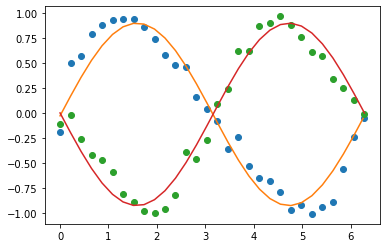

In [58]:
e1 = np.array([0.5, -0.5, 0.5, 0.5])
e4 = np.array([-0.5, -0.5, -0.5, 0.5])
e4Minus = np.array([0.5, -0.5, -0.5, -0.5])
e1Plus = np.array([0.5, -0.5, 0.5, 0.5])
initial = 2 * e4 + e1 + 0.25 * (e4Minus + e1Plus)
normalized = initial / np.linalg.norm(initial)
twoToOneE4toEMinus1 = run_cont_two_state(5, 10, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist())
twoToOneE4toEMinus1Processed = process_energy_controlled_two_state(twoToOneE4toEMinus1[0], 5, 30, 10)
twoToOneE4toEMinus1FitResults = simultaneous_controlled_two_state_fit(twoToOneE4toEMinus1Processed, 2*np.pi, 30, printResults=True)

two state job 243d8bf72a3a448db04dc68ae3dccd53-16781982643052464
[[Variables]]
    amplitude_1: -0.94958744 +/- 0.01790572 (1.89%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:       -0.01770113 +/- 0.01066412 (60.25%) (init = 0)
    mbb_1:       -0.01687632 +/- 0.01066412 (63.19%) (init = 0)
    amplitude_2: -0.94958744 +/- 0.01790572 (1.89%) == 'amplitude_1'
    frequency_2:  1 (fixed)
    maa_2:       -0.01770113 +/- 0.01066412 (60.25%) == 'maa_1'
    mbb_2:       -0.01687632 +/- 0.01066412 (63.19%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.319


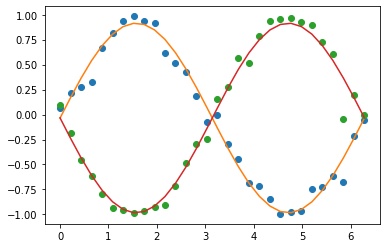

In [60]:
initial = e4 + e1
normalized = initial / np.linalg.norm(initial)
oneToOneE4toEMinus1 = run_cont_two_state(5, 10, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist())
oneToOneE4toEMinus1Processed = process_energy_controlled_two_state(oneToOneE4toEMinus1[0], 5, 30, 10)
oneToOneE4toEMinus1FitResults = simultaneous_controlled_two_state_fit(oneToOneE4toEMinus1Processed, 2*np.pi, 30, printResults=True)

two state job 6cc060e6d341449fa7cb0f4bc578720b-16781909653845038
[[Variables]]
    amplitude_1:  0.92607590 +/- 0.02753171 (2.97%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:        0.00716659 +/- 0.01639708 (228.80%) (init = 0)
    mbb_1:       -0.00801668 +/- 0.01639708 (204.54%) (init = 0)
    amplitude_2:  0.92607590 +/- 0.02753171 (2.97%) == 'amplitude_1'
    frequency_2:  1 (fixed)
    maa_2:        0.00716659 +/- 0.01639708 (228.80%) == 'maa_1'
    mbb_2:       -0.00801668 +/- 0.01639708 (204.54%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.319


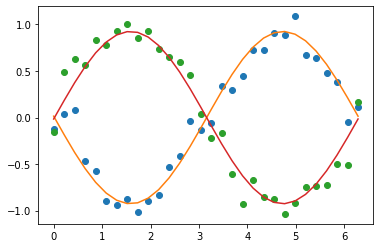

In [47]:
baseline = [1, 0, 0, 0]
baselineRun = run_cont_two_state(5, 10, 2.5, 1.5, -1, 4, 2*np.pi, 30)
baselineProcessed = process_energy_controlled_two_state(baselineRun[0], 5, 30, 10)
baselineFitResults = simultaneous_controlled_two_state_fit(baselineProcessed, 2*np.pi, 30, printResults=True)

two state job d571ff76ad9c490d8b7b3f76d2a71c7d-16781932554291654
[[Variables]]
    amplitude_1: -0.60815506 +/- 0.05106745 (8.40%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:        0.00299726 +/- 0.03041430 (1014.74%) (init = 0)
    mbb_1:       -1.1246e-04 +/- 0.03041442 (27045.78%) (init = 0)
    amplitude_2: -0.60815506 +/- 0.05106745 (8.40%) == 'amplitude_1'
    frequency_2:  1 (fixed)
    maa_2:        0.00299726 +/- 0.03041430 (1014.74%) == 'maa_1'
    mbb_2:       -1.1246e-04 +/- 0.03041442 (27045.78%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.319


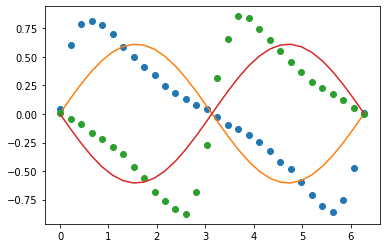

In [56]:
initial = 4 * e4 + e1
normalized = initial / np.linalg.norm(initial)
fourToOneE4toEMinus1 = run_cont_two_state(5, 100, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist())
fourToOneE4toEMinus1Processed = process_energy_controlled_two_state(fourToOneE4toEMinus1[0], 5, 30, 100)
fourToOneE4toEMinus1FitResults = simultaneous_controlled_two_state_fit(fourToOneE4toEMinus1Processed, 2*np.pi, 30, printResults=True)

two state job b03b00eb3e03461fa112ce2fee499ae0-16781918386264493
[[Variables]]
    amplitude_1: -0.37319203 +/- 0.04541438 (12.17%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:       -0.03986430 +/- 0.02704747 (67.85%) (init = 0)
    mbb_1:        0.00977647 +/- 0.02704747 (276.66%) (init = 0)
    amplitude_2: -0.37319203 +/- 0.04541438 (12.17%) == 'amplitude_1'
    frequency_2:  1 (fixed)
    maa_2:       -0.03986430 +/- 0.02704747 (67.85%) == 'maa_1'
    mbb_2:        0.00977647 +/- 0.02704747 (276.66%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.319


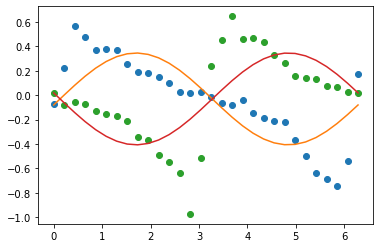

In [52]:
initial = 8 * e4 + e1
normalized = initial / np.linalg.norm(initial)
eightToOneE4toEMinus1 = run_cont_two_state(5, 10, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist())
eightToOneE4toEMinus1Processed = process_energy_controlled_two_state(eightToOneE4toEMinus1[0], 5, 30, 10)
eightToOneE4toEMinus1FitResults = simultaneous_controlled_two_state_fit(eightToOneE4toEMinus1Processed, 2*np.pi, 30, printResults=True)

two state job dcae13f9fc3b4125a4eb19009cfdeb94-16781918905973344
[[Variables]]
    amplitude_1: -0.20535563 +/- 0.03718599 (18.11%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:       -0.02188388 +/- 0.02270938 (103.77%) (init = 0)
    mbb_1:        0.00282670 +/- 0.02220466 (785.53%) (init = 0)
    amplitude_2: -0.20535563 +/- 0.03718599 (18.11%) == 'amplitude_1'
    frequency_2:  1 (fixed)
    maa_2:       -0.02188388 +/- 0.02270938 (103.77%) == 'maa_1'
    mbb_2:        0.00282670 +/- 0.02220466 (785.53%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.326


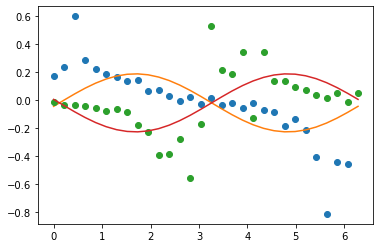

In [53]:
initial = 16 * e4 + e1
normalized = initial / np.linalg.norm(initial)
hexToOneE4toEMinus1 = run_cont_two_state(5, 10, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist())
hexToOneE4toEMinus1Processed = process_energy_controlled_two_state(hexToOneE4toEMinus1[0], 5, 30, 10)
hexToOneE4toEMinus1FitResults = simultaneous_controlled_two_state_fit(hexToOneE4toEMinus1Processed, 2*np.pi, 30, printResults=True)

two state job 21dcb853524e4639a5a3ae5a062ac467-16781927555891402
[[Variables]]
    amplitude_1: -0.00972268 +/- 0.00953165 (98.04%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:        0.01005254 +/- 0.00663528 (66.01%) (init = 0)
    mbb_1:       -0.00194960 +/- 0.00573012 (293.91%) (init = 0)
    amplitude_2: -0.00972268 +/- 0.00953165 (98.04%) == 'amplitude_1'
    frequency_2:  1 (fixed)
    maa_2:        0.01005254 +/- 0.00663528 (66.01%) == 'maa_1'
    mbb_2:       -0.00194960 +/- 0.00573012 (293.91%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.364


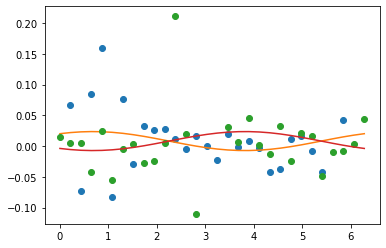

In [54]:
initial = e4
normalized = initial / np.linalg.norm(initial)
monoE4 = run_cont_two_state(5, 10, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist())
monoE4Processed = process_energy_controlled_two_state(monoE4[0], 5, 30, 10)
monoE4FitResults = simultaneous_controlled_two_state_fit(monoE4Processed, 2*np.pi, 30, printResults=True)

two state job f8c971eab93a4000a6e65384bdecee46-16781962423224077
[[Variables]]
    amplitude_1: -0.21014182 +/- 0.00693956 (3.30%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:        0.00902349 +/- 0.00407489 (45.16%) (init = 0)
    mbb_1:        0.00421697 +/- 0.00406981 (96.51%) (init = 0)
    amplitude_2: -0.21014182 +/- 0.00693956 (3.30%) == 'amplitude_1'
    frequency_2:  1 (fixed)
    maa_2:        0.00902349 +/- 0.00407489 (45.16%) == 'maa_1'
    mbb_2:        0.00421697 +/- 0.00406981 (96.51%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.311


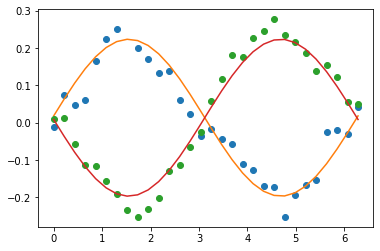

In [57]:
initial = 4 * e4 + e1
normalized = initial / np.linalg.norm(initial)
fourToOneE4toEMinus11Cycle = run_cont_two_state(1, 100, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist())
fourToOneE4toEMinus11CycleProcessed = process_energy_controlled_two_state(fourToOneE4toEMinus11Cycle[0], 1, 30, 100)
fourToOneE4toEMinus11CycleFitResults = simultaneous_controlled_two_state_fit(fourToOneE4toEMinus11CycleProcessed, 2*np.pi, 30, printResults=True)

two state job df098a13302547c1bba56e7bde836695-16781972847274616
[[Variables]]
    amplitude_1: -0.68711783 +/- 0.04783364 (6.96%) (init = 1)
    frequency_1:  1 (fixed)
    maa_1:        0.00159308 +/- 0.02848831 (1788.25%) (init = 0)
    mbb_1:        0.00132992 +/- 0.02848831 (2142.11%) (init = 0)
    amplitude_2: -0.68711783 +/- 0.04783364 (6.96%) == 'amplitude_1'
    frequency_2:  1 (fixed)
    maa_2:        0.00159308 +/- 0.02848831 (1788.25%) == 'maa_1'
    mbb_2:        0.00132992 +/- 0.02848831 (2142.11%) == 'mbb_1'
    shift_1:      3.141593 (fixed)
    shift_2:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.319


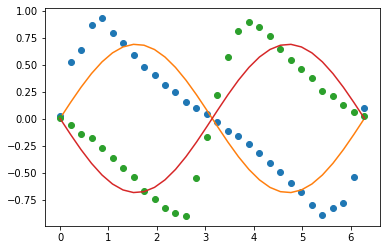

In [59]:
initial = 4 * e4 + e1 + 0.25 * (e4Minus + e1Plus)
normalized = initial / np.linalg.norm(initial)
fourToOneE4toEMinus1Messy = run_cont_two_state(5, 100, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist())
fourToOneE4toEMinus1MessyProcessed = process_energy_controlled_two_state(fourToOneE4toEMinus1Messy[0], 5, 30, 100)
fourToOneE4toEMinus1MessyFitResults = simultaneous_controlled_two_state_fit(fourToOneE4toEMinus1MessyProcessed, 2*np.pi, 30, printResults=True)

In [18]:
test = test_two_state_circs(5, 1, 2.5, 1.5, -1, 4, np.linspace(0, 2*np.pi, 8))
# print(test)
transpiledTest = [transpile(circ, backendStatevector) for circ in test]
results = [backendStatevector.run(transCirc).result() for transCirc in transpiledTest]
# print(results)
total0 = list()
total1 = list()
statevectors = [result.get_statevector(0) for result in results]
readouts = [result.get_counts(0) for result in results]
print(statevectors)
for i in range(len(readouts)):
    # print(readouts[i])
    isSuccess = True
    state = list()
    combinedState0 = [0, 0, 0, 0]
    combinedState1 = [0, 0, 0, 0]
    for k in range(len(np.asarray(statevectors[i]))):
        if isSuccess and k != 192 and k != 193 and k!= 0 and k != 1 and k != 64 and k!= 65 and k!= 128 and k!= 129:
            isSuccess = np.real_if_close(statevectors[i][k]) == 0
    if isSuccess:
        for j in range(len(np.asarray(statevectors[i]))):
            if j == 192 or j == 193 or j== 0 or j == 1 or j == 64 or j == 65 or j == 128 or j == 129:
                print(bin(j) +": "+ statevectors[i][j].astype('|S100').decode('UTF-8'))
                state.append(statevectors[i][j])
        for j in range(4):
            combinedState0[j] = state[2*j]
            combinedState1[j] = +state[2*j+1]
        print(combinedState0)
        print(np.angle(combinedState0))
        print(combinedState1)
        print(np.angle(combinedState1))
        state = list()
        total0.append(combinedState0)
        combinedState0 = [0, 0, 0, 0]
        total1.append(combinedState1)
        combinedState1 = [0, 0, 0, 0]

    else:
        print("Failed RA")
test[0].draw('mpl')

print(total1)
average1 = [0, 0, 0, 0]
for successfulState in total1:
    for j in range(len(successfulState)):
        average1[j] += np.abs(successfulState[j])/len(total1)
print("averaged for ancilla = 1 state: ")
print(average1)

print(total0)
average0 = [0, 0, 0, 0]
for successfulState in total0:
    for j in range(len(successfulState)):
        average0[j] += np.abs(successfulState[j])/len(total0)

print("averaged for ancilla = 0 state: ")
print(average0)

[Statevector([-0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              1.84210184e-16+0.28762839j,  0.00000000e+00+0.j        ,
             -0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              8.42355370e-18+0.28832121j,  0.00000000e+00+0.j        ,
             -0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
             -3.47605523e-16-0.64546337j,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              1.93413118e-16+0.64615619j,  0.00000000e+00+0.j        ],
            dims=(2, 2, 2, 2)), Statevector([ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        , -2.66968319e-16-0.65711648j,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        , -1.49483020e-16-0.13267635j,
              0.00000000e+00+0.j        , -0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  

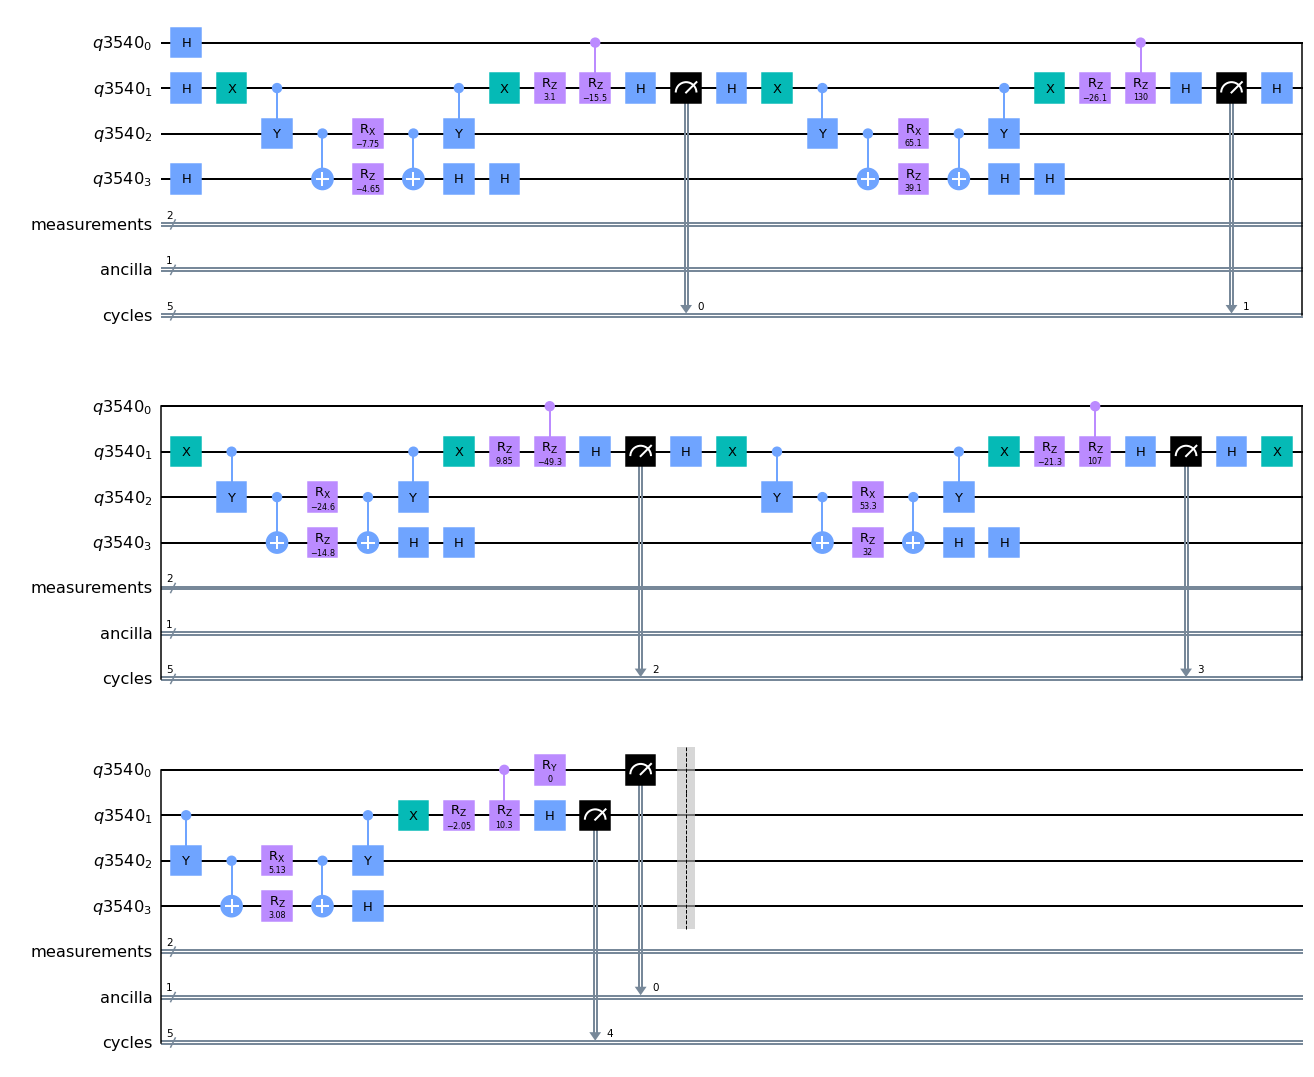

In [14]:
test = test_two_state_circs(5, 5, 2.5, 1.5, -1, 4, np.linspace(0, 2*np.pi, 8))
test[0].draw('mpl')

ancilla 1: 
expected: 
[0.0, 0.6532814824381883, 0.0, 0.27059805007309845, 0.0, 0.6532814824381883, -0.0, -0.27059805007309845]
actual: 
[0j, (0.6642435095368011-2.6631909141115346e-16j), 0j, (0.26598262074658946-1.5183403710707818e-16j), 0j, (0.6498763313842055-2.2647170420879455e-16j), 0j, (-0.256309499249669+1.1933725899028766e-16j)]
diff: 
[0.0, 0.010962027098612825, 0.0, -0.004615429326508991, 0.0, -0.003405151053982758, 0.0, 0.014288550823429447]
ancilla 0: 
expected: 
[0.27059805007309845, 0.0, -0.6532814824381883, -0.0, 0.27059805007309845, 0.0, 0.6532814824381883, 0.0]
actual: 
[(0.2657051988896485-7.579992475644768e-17j), 0j, (-0.6997722141527811+3.6076223442559153e-16j), 0j, (0.2931456312915031-3.918605832730516e-17j), 0j, (0.5947984822084138-3.836620087301216e-16j), 0j]
diff: 
[-0.004892851183449953, 0.0, -0.04649073171459284, 0.0, 0.022547581218404666, 0.0, -0.058483000229774484, 0.0]
counts: 
{'10110 0 11': 3, '01011 1 11': 3, '01101 0 00': 2, '01011 0 10': 5, '11101 0 01

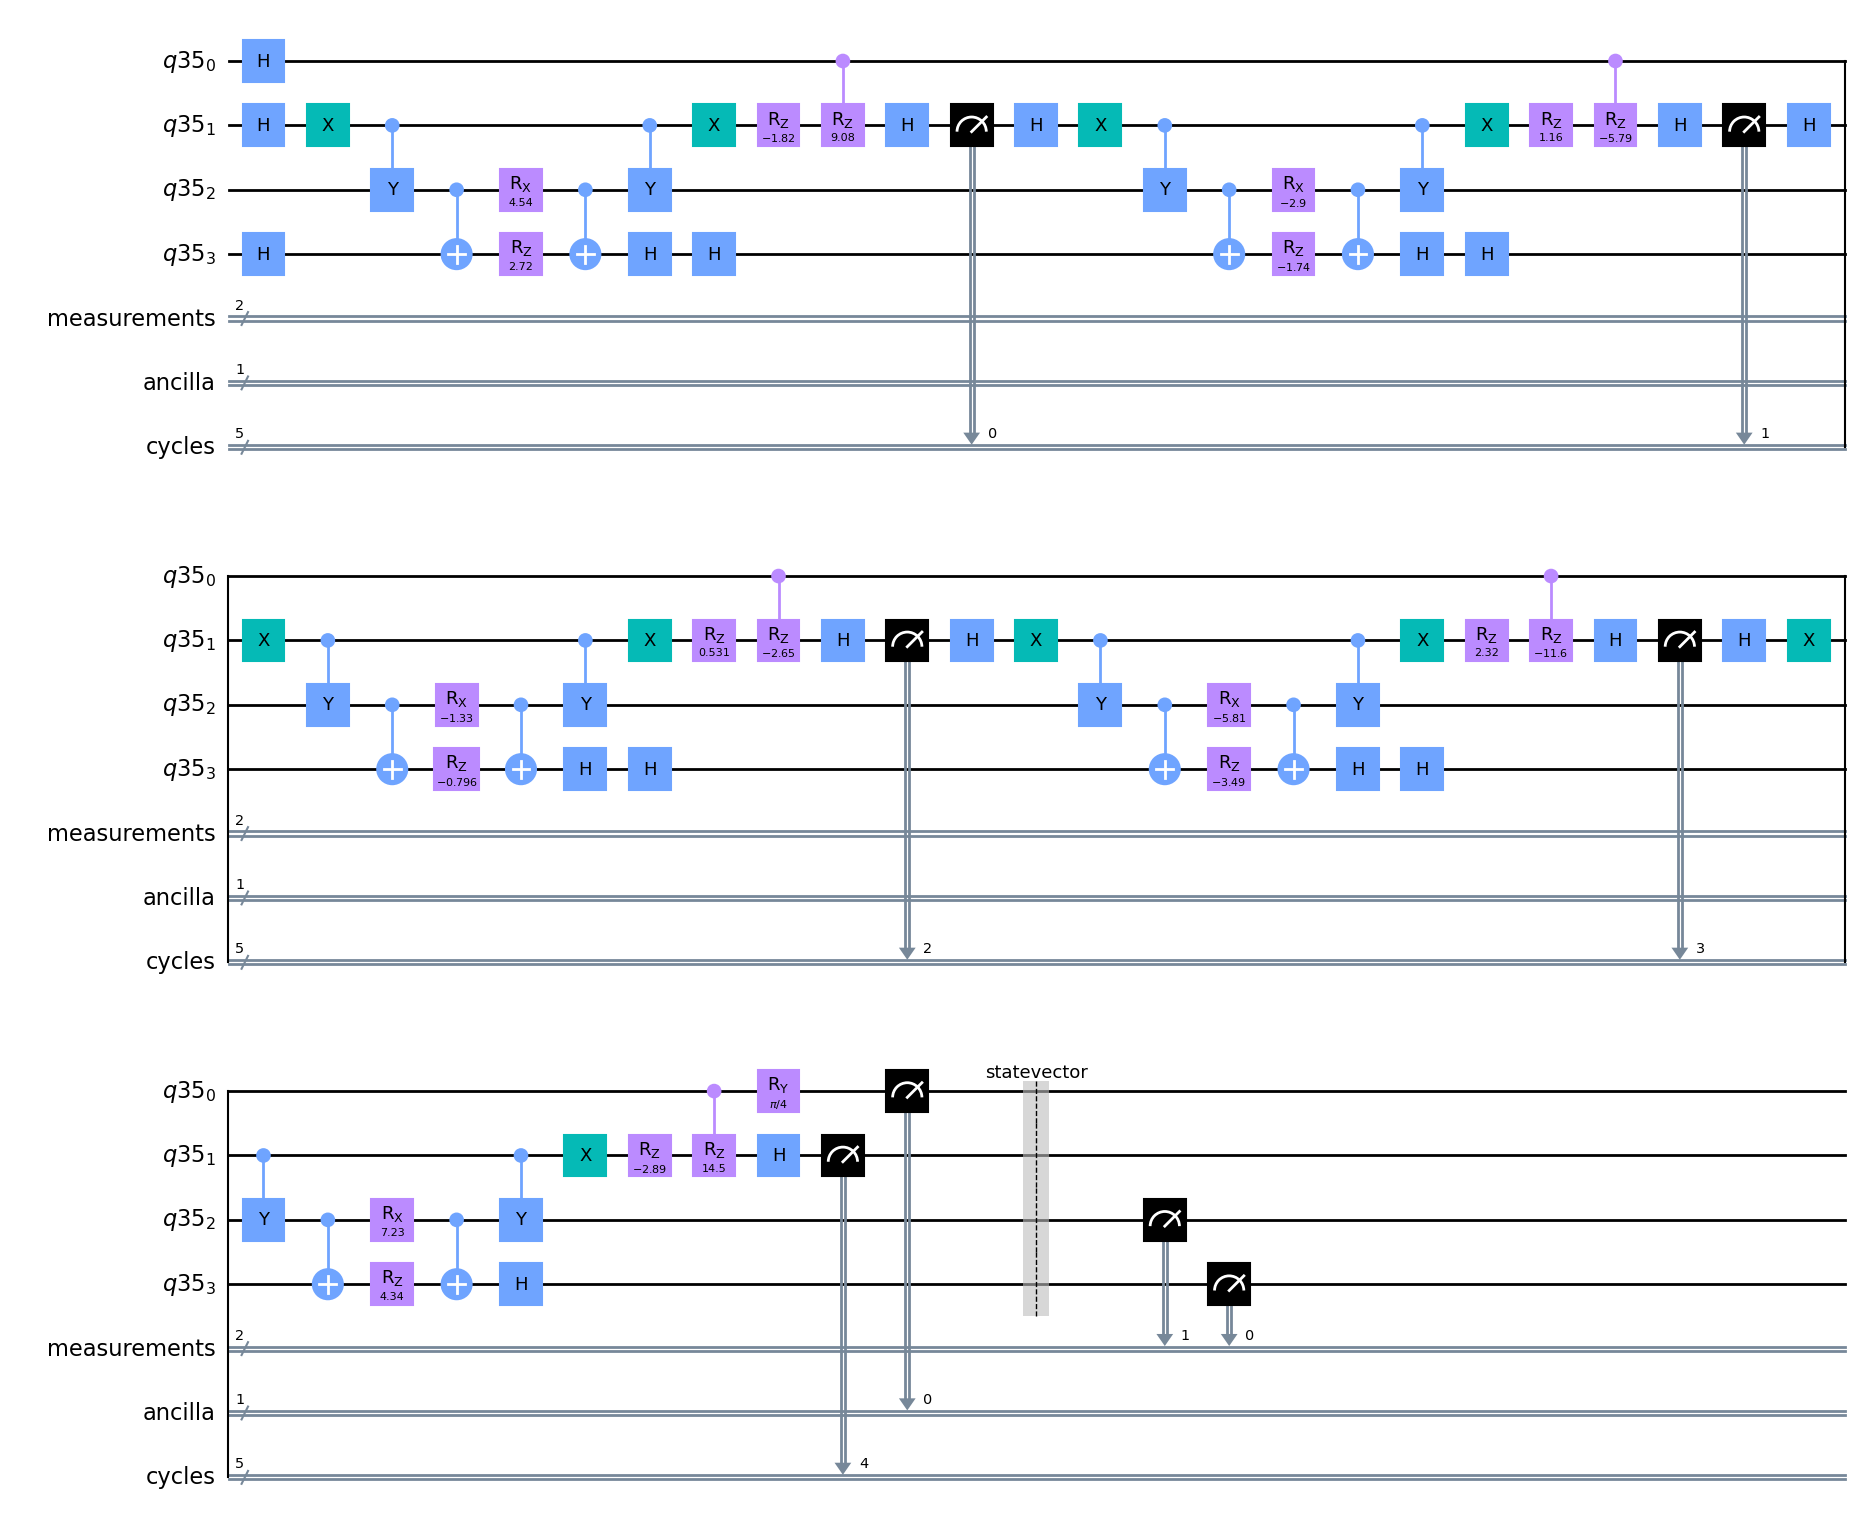

In [15]:
cycles = 5
ea = np.array([0.5, -0.5, 0.5, 0.5]) #-1 eigenstate
eb = np.array([0.5, 0.5, 0.5, -0.5]) #+4 eigenstate
theta = np.pi/4
expected1 = np.sin(theta/2) * ea + np.cos(theta/2) * eb
expected1 = flatten(np.tensordot(expected1, [0,1], 0))
expected0 = np.cos(theta/2) * ea - np.sin(theta/2) * eb
expected0 = flatten(np.tensordot(expected0, [1,0], 0))
# times = np.random.normal(0, 5, cycles)
times = [0.908244, -0.579167, -0.265384, -1.16232, 1.44674]
unTensor = [0, 1, 4, 5, 8, 9, 12, 13]
testCirc = make_two_state_scan(times, cycles, -1, 4, 2.5, 1.5, theta, "y", measureAncilla=True, statevector=True)
transpiledCirc = transpile(testCirc, backend=backendStatevector)
testResult = backendStatevector.run(transpiledCirc).result()
testResultDict = testResult.to_dict()['results'][0]['data']
# print(testResultDict['counts'])
# print(testResultDict['statevector'])
print("ancilla 1: ")
print("expected: ")
print(expected1)
ancilla1Raw = testResultDict['statevector']['0x4']
ancilla1 = list()
for i in unTensor:
    ancilla1.append(ancilla1Raw[i])
print("actual: ")
print(ancilla1)
ancilla1Real = np.real_if_close(ancilla1).tolist()
print("diff: ")
print(np.subtract(ancilla1Real, expected1).tolist())
print("ancilla 0: ")
print("expected: ")
print(expected0)
ancilla0Raw = testResultDict['statevector']['0x0']
ancilla0 = list()
for i in unTensor:
    ancilla0.append(ancilla0Raw[i])
print("actual: ")
print(ancilla0)
ancilla0Real = np.real_if_close(ancilla0).tolist()
print("diff: ")
print(np.subtract(ancilla0Real, expected0).tolist())
print("counts: ")
print(testResult.get_counts())
testCirc.draw('mpl')

0.0
ancilla 1: 
diff: 
0.08977351349630637
ancilla 0: 
diff: 
0.004739217018651419
0.39269908169872414
ancilla 1: 
diff: 
0.04711776358141642
ancilla 0: 
diff: 
0.0045619396130455216
0.7853981633974483
ancilla 1: 
diff: 
0.01683326042175209
ancilla 0: 
diff: 
0.003926016029459845
1.1780972450961724
ancilla 1: 
diff: 
0.005107491305355025
ancilla 0: 
diff: 
0.0026000308700684896
1.5707963267948966
ancilla 1: 
diff: 
7.850462293418876e-17
ancilla 0: 
diff: 
3.925231146709438e-16
1.9634954084936207
ancilla 1: 
diff: 
0.002527243927612682
ancilla 0: 
diff: 
0.005413781233211718
2.356194490192345
ancilla 1: 
diff: 
0.0038565453980901544
ancilla 0: 
diff: 
0.018242046263375992
2.748893571891069
ancilla 1: 
diff: 
0.0045227271546970545
ancilla 0: 
diff: 
0.051747477439428244
3.141592653589793
ancilla 1: 
diff: 
0.004739217018651419
ancilla 0: 
diff: 
0.08977351349630626
3.5342917352885173
ancilla 1: 
diff: 
0.0045619396130455216
ancilla 0: 
diff: 
0.04711776358141643
3.9269908169872414
ancill

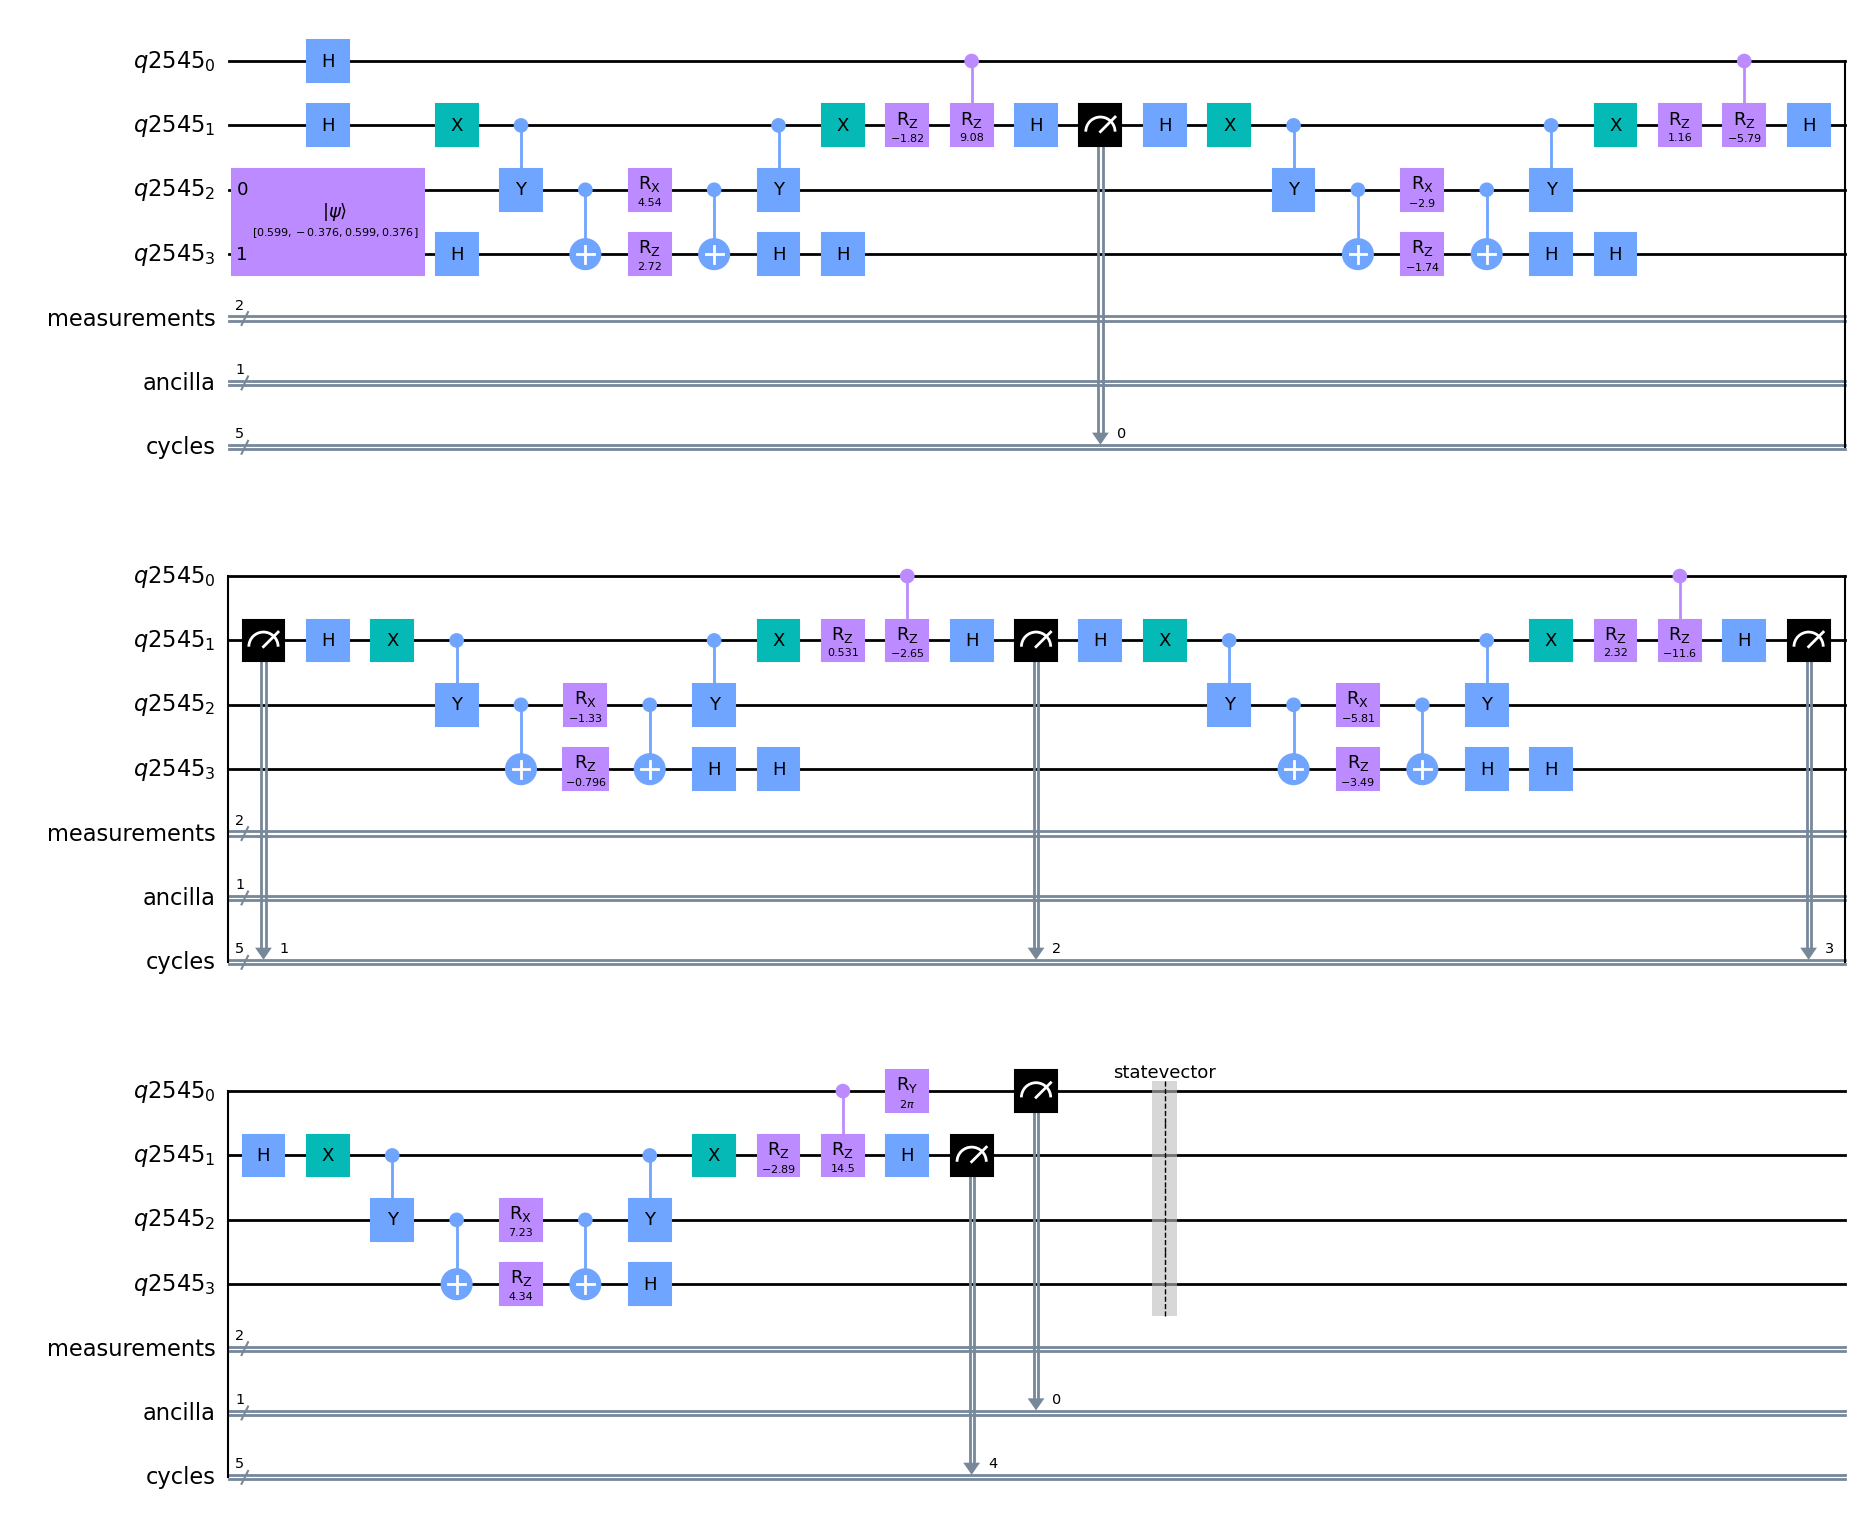

In [24]:
cycles = 5
ea = np.array([0.5, -0.5, 0.5, 0.5]) #-1 eigenstate
eb = np.array([0.5, 0.5, 0.5, -0.5]) #+4 eigenstate
pa = 0.95
pb = 0.05
pa = pa / (pa + pb)
pb = pb / (pa + pb)

operator = np.asarray([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]])
operator = np.tensordot([[1, 0], [0, 1]], operator, axes=0)

initialState = np.sqrt(pa) * ea + np.sqrt(pb) * eb
thetas = np.linspace(0, 2*np.pi, 17)
# theta = np.pi/4

for theta in thetas:
    print(theta)
    expected1 = (np.sin(theta/2) * ea * np.sqrt(pa) + np.cos(theta/2) * eb * np.sqrt(pb))
    expected1 = flatten(np.tensordot(expected1, [0,1], 0))
    expected1 = expected1 / np.linalg.norm(expected1)
    expected0 = (np.cos(theta/2) * ea * np.sqrt(pa) - np.sin(theta/2) * eb * np.sqrt(pb))
    expected0 = flatten(np.tensordot(expected0, [1,0], 0))
    expected0 = expected0 / np.linalg.norm(expected0)
    # times = np.random.normal(0, 5, cycles)
    times = [0.908244, -0.579167, -0.265384, -1.16232, 1.44674]
    unTensor = [0, 1, 4, 5, 8, 9, 12, 13]
    testCirc = make_two_state_scan(times, cycles, -1, 4, 2.5, 1.5, theta, "y", measureAncilla=True, statevector=True, initialState=initialState)
    transpiledCirc = transpile(testCirc, backend=backendStatevector)
    testResult = backendStatevector.run(transpiledCirc).result()
    testResultDict = testResult.to_dict()['results'][0]['data']
    # print(testResultDict['counts'])
    # print(testResultDict['statevector'])
    print("ancilla 1: ")
    # print("expected: ")
    # print(expected1)
    ancilla1Raw = testResultDict['statevector']['0x4']
    ancilla1 = list()
    for i in unTensor:
        ancilla1.append(ancilla1Raw[i])
    # print("actual: ")
    # print(ancilla1)
    ancilla1Real = np.real_if_close(ancilla1).tolist()
    print("diff: ")
    print(np.linalg.norm(np.subtract(ancilla1Real, expected1).tolist()))
    print("ancilla 0: ")
    # print("expected: ")
    # print(expected0)
    ancilla0Raw = testResultDict['statevector']['0x0']
    ancilla0 = list()
    for i in unTensor:
        ancilla0.append(ancilla0Raw[i])
    # print("actual: ")
    # print(ancilla0)
    ancilla0Real = np.real_if_close(ancilla0).tolist()
    print("diff: ")
    print(np.linalg.norm(np.subtract(ancilla0Real, expected0).tolist()))
    # print("counts: ")
    # print(testResult.get_counts())
testCirc.draw('mpl')

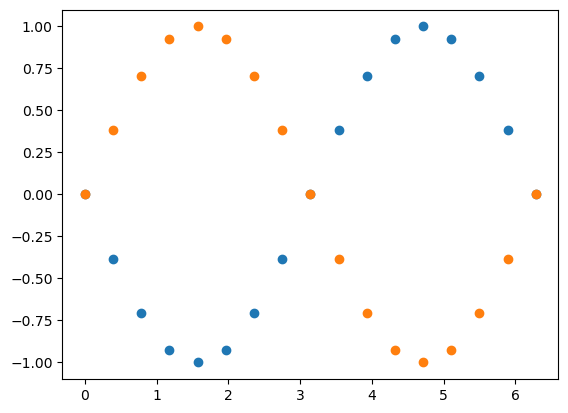

In [32]:
operator = np.asarray([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]])
operator = np.kron(operator, np.identity(2))

def exact_2sra(pa, operator):
    ea = np.array([0.5, -0.5, 0.5, 0.5]) #-1 eigenstate
    eb = np.array([0.5, 0.5, 0.5, -0.5]) #+4 eigenstate
    pa = pa
    pb = 1 - pa

    initialState = np.sqrt(pa) * ea + np.sqrt(pb) * eb
    thetas = np.linspace(0, 2*np.pi, 17)
    # theta = np.pi/4
    ec0, ec1 = list(), list()

    for theta in thetas:
        # print(theta)
        expected1 = (np.sin(theta/2) * ea * np.sqrt(pa) + np.cos(theta/2) * eb * np.sqrt(pb))
        expected1 = np.kron([0,1], expected1)
        expected1 = expected1 / np.linalg.norm(expected1)

        expected0 = (np.cos(theta/2) * ea * np.sqrt(pa) - np.sin(theta/2) * eb * np.sqrt(pb))
        expected0 = np.kron([1,0], expected0)
        expected0 = expected0 / np.linalg.norm(expected0)

        ec0.append(np.matmul(expected0.conj().T, np.matmul(operator, expected0)))
        ec1.append(np.matmul(expected1.conj().T, np.matmul(operator, expected1)))
        # print(np.matmul(expected0.conj().T, np.matmul(operator, expected0)))
        # print(np.matmul(expected1.conj().T, np.matmul(operator, expected1)))

    return [ec0, ec1]

oneToOne = exact_2sra(0.5, operator)
plt.plot(thetas, oneToOne[0], 'o')
plt.plot(thetas, oneToOne[1], 'o')

plt.show()

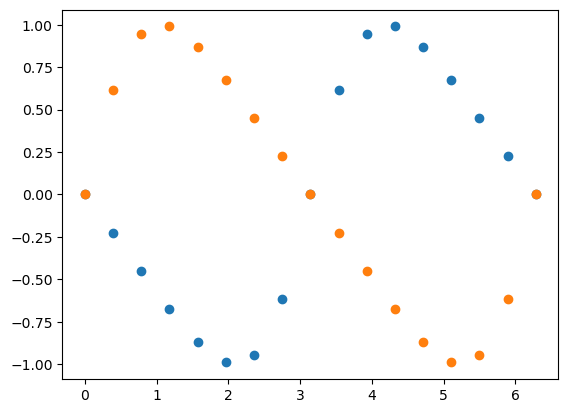

In [33]:
threeToOne = exact_2sra(0.75, operator)
plt.plot(thetas, threeToOne[0], 'o')
plt.plot(thetas, threeToOne[1], 'o')

plt.show()

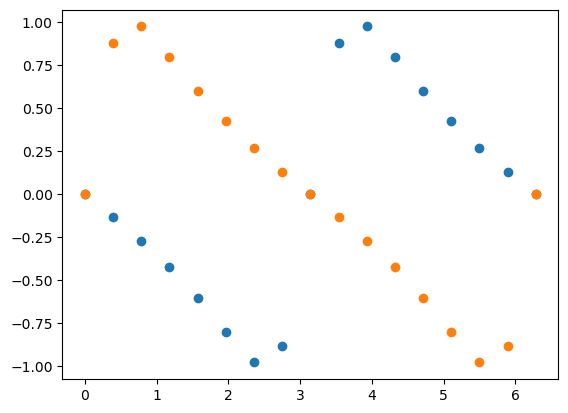

In [34]:
nineToOne = exact_2sra(0.9, operator)
plt.plot(thetas, nineToOne[0], 'o')
plt.plot(thetas, nineToOne[1], 'o')

plt.show()

{'0x86': 2, '0x5': 81, '0x6d': 53, '0xf4': 20, '0x64': 5, '0xb8': 5, '0x1a': 3, '0x6': 26, '0xcd': 1, '0x3': 37, '0x16': 12, '0x0': 22, '0xa9': 13, '0xe5': 5, '0x7a': 5, '0xdd': 1, '0xe7': 3, '0x2': 72, '0x58': 6, '0x6a': 59, '0x73': 8, '0x91': 30, '0xaf': 11, '0x3a': 6, '0x97': 15, '0x62': 3, '0x96': 17, '0xeb': 11, '0x63': 16, '0xf5': 18, '0x3b': 8, '0x94': 30, '0xc': 3, '0x92': 17, '0xdb': 5, '0x4': 28, '0x9e': 13, '0x54': 4, '0xba': 7, '0x1b': 6, '0x98': 13, '0x36': 4, '0x2a': 2, '0x1': 4, '0xa8': 4, '0x7b': 3, '0xe4': 7, '0x8b': 11, '0x55': 7, '0xf8': 10, '0x8f': 3, '0xed': 7, '0x90': 11, '0x72': 9, '0x8e': 1, '0x52': 16, '0x59': 1, '0x17': 5, '0xfe': 2, '0x65': 7, '0x95': 4, '0xea': 10, '0x84': 5, '0x56': 4, '0x8a': 1, '0x80': 1, '0xfa': 4, '0x67': 5, '0xf7': 2, '0xda': 8, '0x3d': 1, '0x23': 1, '0xec': 2, '0xbb': 3, '0xc9': 1, '0xd8': 3, '0x60': 3, '0x6e': 5, '0x39': 4, '0x13': 5, '0x8d': 5, '0x8c': 4, '0x89': 2, '0x76': 5, '0x74': 1, '0x4a': 1, '0xa5': 2, '0xac': 3, '0xd': 6, '0

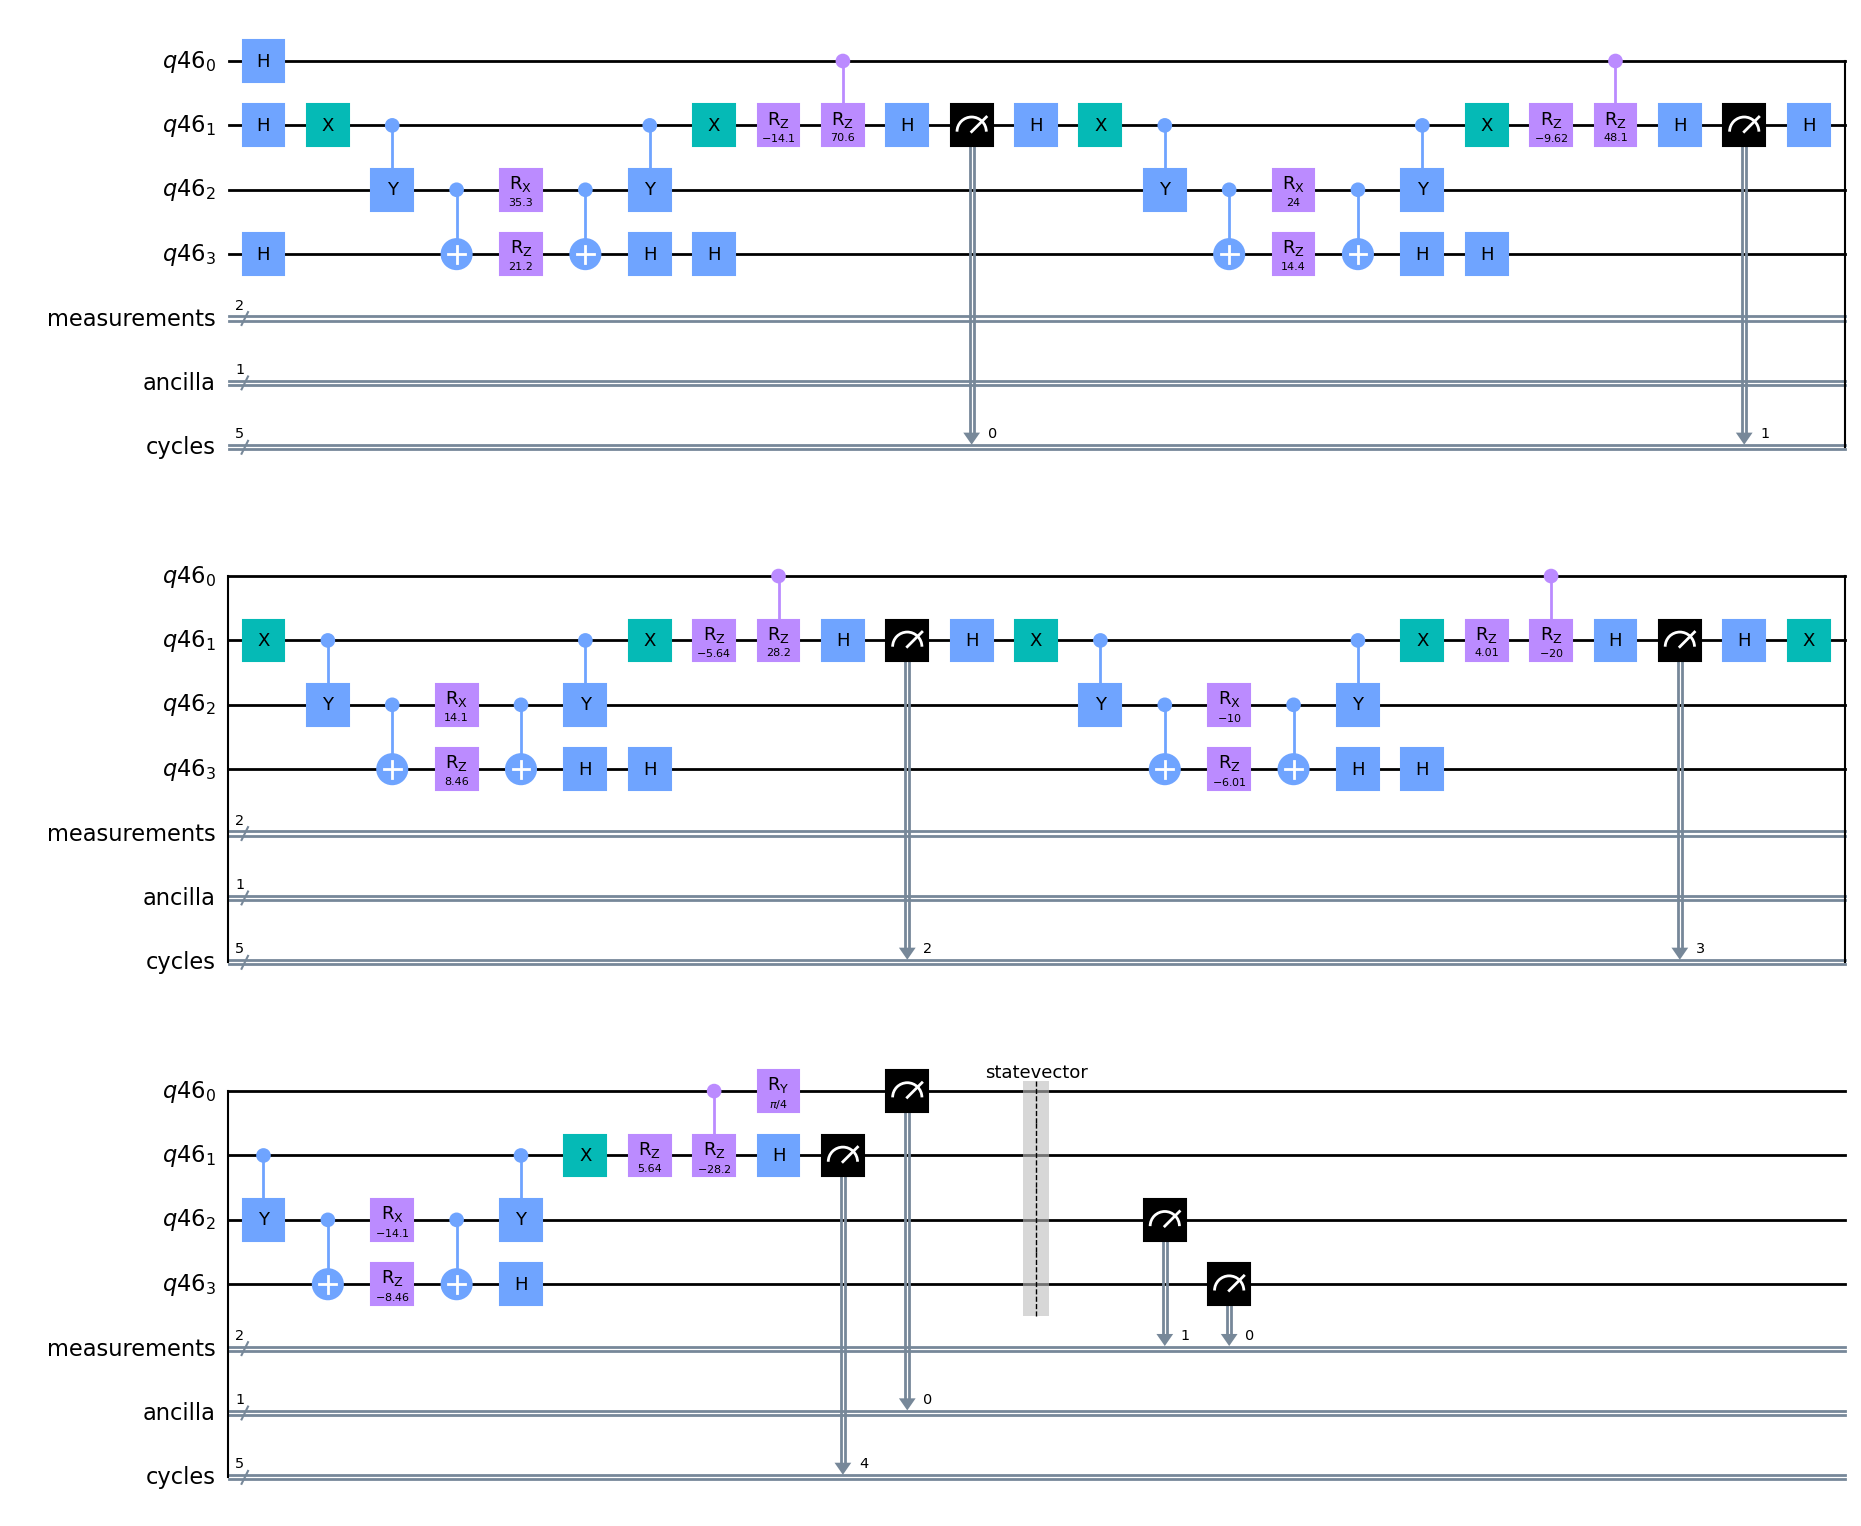

In [16]:
cycles = 5
times = np.random.normal(0, 5, cycles)
unTensor = [0, 1, 4, 5, 8, 9, 12, 13]
testCirc = make_two_state_scan(times, cycles, -1, 4, 2.5, 1.5, np.pi/4, "y", statevector=True)
testCirc.draw('mpl')
transpiledCirc = transpile(testCirc, backend=backendStatevector)
testResult = backendStatevector.run(transpiledCirc).result()
testResultDict = testResult.to_dict()['results'][0]['data']
print(testResultDict['counts'])
# print(testResultDict['statevector'])
print("success statevector: ")
successRaw = testResultDict['statevector']['0x0']
successVector = list()
for i in unTensor:
    successVector.append(successRaw[i])
print(successVector)
print("counts: ")
print(testResult.get_counts())
testCirc.draw('mpl')

In [4]:
optimizedTimes = [0.908244, -0.579167, -0.265384, -1.16232, 1.44674]
optimizedTimesUniformResult = run_fixed_time_cont_two_state(5, 2.5, 1.5, -1, 4, 2*np.pi, 30, optimizedTimes)
optimizedTimesUniformProcessed = process_energy_controlled_two_state(optimizedTimesUniformResult[0], 5, 30, 1, printResults=True)
optimizedTimesUniformFitResults = simultaneous_controlled_two_state_fit(optimizedTimesUniformProcessed, 2 * np.pi, 30, printResults=True)

AttributeError: 'QuantumCircuit' object has no attribute 'get_counts'

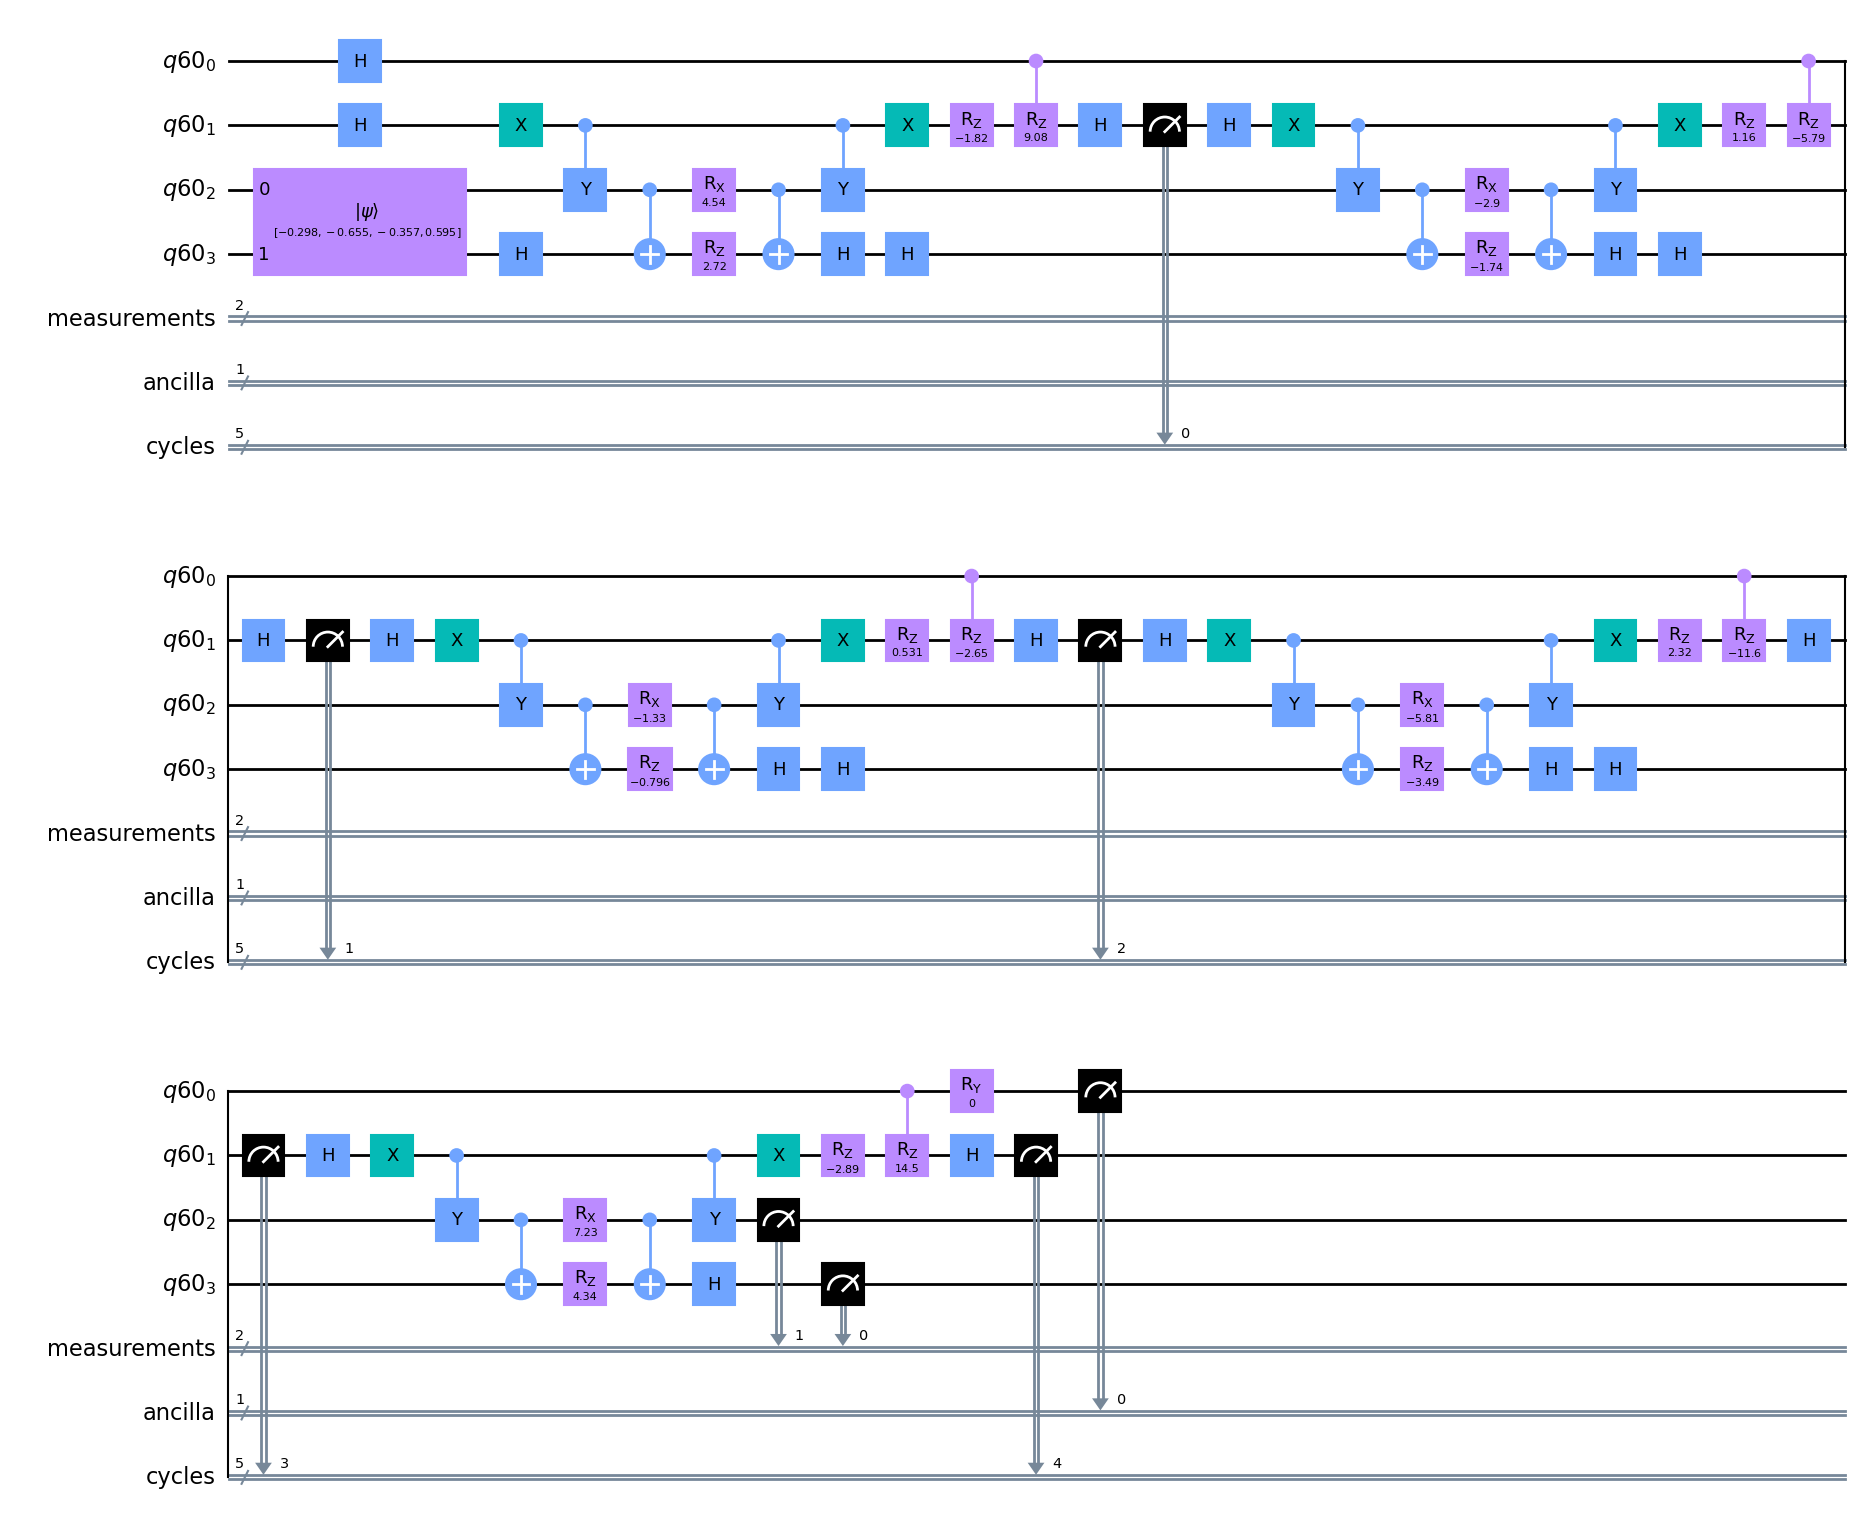

In [8]:
e1 = np.array([0.5, -0.5, 0.5, 0.5])
e4 = np.array([-0.5, -0.5, -0.5, 0.5])
e4Minus = np.array([0.5, -0.5, -0.5, -0.5])
e1Plus = np.array([0.5, -0.5, 0.5, 0.5])
initial = 4 * e4 + e1 + 0.25 * (e4Minus + e1Plus)
normalized = initial / np.linalg.norm(initial)

fourToOneE4toEMinus1MessyOptimizedTimes = run_fixed_time_cont_two_state(5, 2.5, 1.5, -1, 4, 2*np.pi, 30, optimizedTimes, initialState=normalized.tolist(), backend=backendQASM)
fourToOneE4toEMinus1MessyOptimizedTimes[1].draw('mpl')
# fourToOneE4toEMinus1MessyProcessedOptimizedTimes = process_energy_controlled_two_state(fourToOneE4toEMinus1MessyOptimizedTimes[0], 5, 30, 1)
# fourToOneE4toEMinus1MessyFitResultsOptimizedTimes = simultaneous_controlled_two_state_fit(fourToOneE4toEMinus1MessyProcessedOptimizedTimes, 2*np.pi, 30, printResults=True)

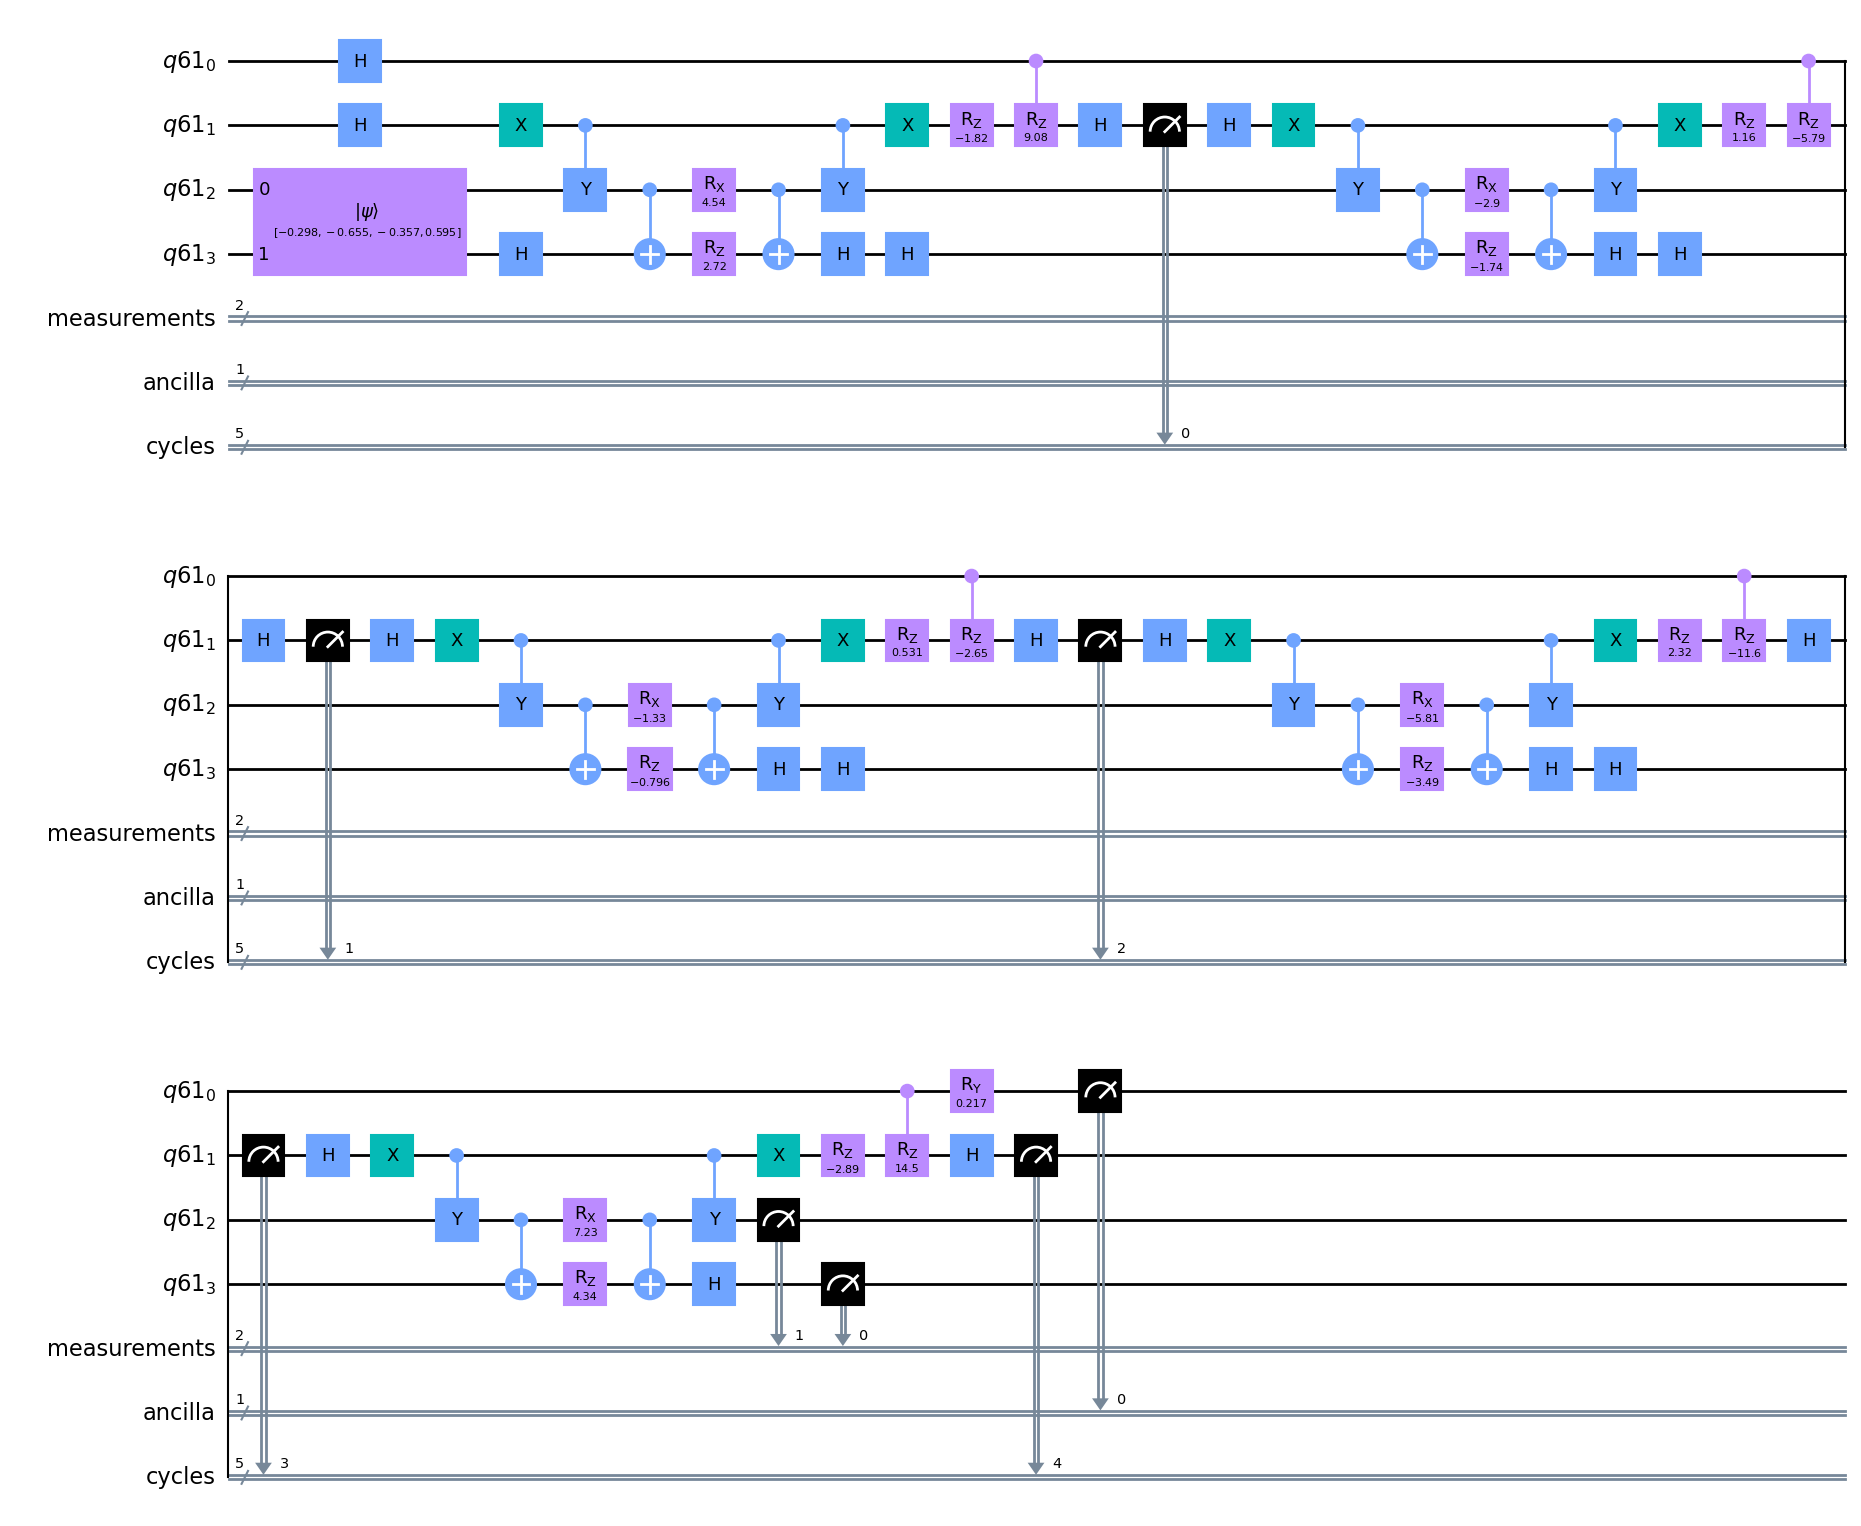

In [9]:
fourToOneE4toEMinus1MessyOptimizedTimes[1].draw('mpl')

In [25]:
fourToOneE4toEMinus1MessyOptimizedTimes[1][0].draw('mpl')

NameError: name 'fourToOneE4toEMinus1MessyOptimizedTimes' is not defined

two state job cl53tj16mcdhud2k5bs0
0.5170201021112764
[[Variables]]
    amplitude_1: -0.92717900 +/- 0.01784323 (1.92%) (init = 1)
    overlap_1:    0.49455283 +/- 0.01923720 (3.89%) (init = 0.5)
    frequency_1:  1 (fixed)
    maa_1:       -0.00234589 +/- 0.01086805 (463.28%) (init = 0)
    mbb_1:       -0.00672928 +/- 0.01040032 (154.55%) (init = 0)
    amplitude_2: -0.92717900 +/- 0.01784323 (1.92%) == 'amplitude_1'
    overlap_2:    0.49455283 +/- 0.01923720 (3.89%) == 'overlap_1'
    frequency_2:  1 (fixed)
    maa_2:       -0.00234589 +/- 0.01086805 (463.28%) == 'maa_1'
    mbb_2:       -0.00672928 +/- 0.01040032 (154.55%) == 'mbb_1'
    shift_2:      3.141593 (fixed)
    shift_1:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.3189


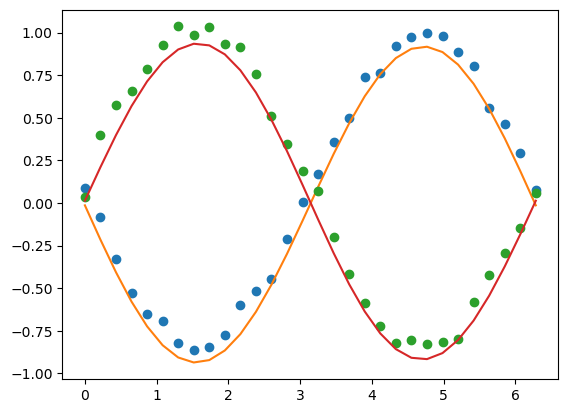

In [17]:
e1 = np.array([0.5, -0.5, 0.5, 0.5])
e4 = np.array([-0.5, -0.5, -0.5, 0.5])
e4Minus = np.array([0.5, -0.5, -0.5, -0.5])
e1Plus = np.array([0.5, -0.5, 0.5, 0.5])
times = [0.908244, -0.579167, -0.265384, -1.16232, 1.44674]
initial = e4 + e1
normalized = initial / np.linalg.norm(initial)
# evenFixedTimes = run_cont_two_state(5, 5, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist(), backend=backendQASM, fixedTimes=times)
evenFixedTimes = run_cont_two_state(5, 5, 2.5, 1.5, -1, 4, 2*np.pi, 30, backend=backendQASM, fixedTimes=times)
evenFixedTimesProcessed = process_energy_controlled_two_state(evenFixedTimes[0], 5, 30, 5)
evenFixedTimesFitResults = simultaneous_controlled_two_state_fit(evenFixedTimesProcessed, 2*np.pi, 30, printResults=True)

two state job ck35gk5p5gfcppj2lv7g
0.16892662580861367
[[Variables]]
    amplitude_1:  0.98048932 +/- 0.01300687 (1.33%) (init = 1)
    overlap_1:    0.10553745 +/- 0.00449506 (4.26%) (init = 0.5)
    frequency_1:  1 (fixed)
    maa_1:        0.01086984 +/- 0.00265654 (24.44%) (init = 0)
    mbb_1:       -0.00797278 +/- 0.00241384 (30.28%) (init = 0)
    amplitude_2:  0.98048932 +/- 0.01300687 (1.33%) == 'amplitude_1'
    overlap_2:    0.10553745 +/- 0.00449506 (4.26%) == 'overlap_1'
    frequency_2:  1 (fixed)
    maa_2:        0.01086984 +/- 0.00265654 (24.44%) == 'maa_1'
    mbb_2:       -0.00797278 +/- 0.00241384 (30.28%) == 'mbb_1'
    shift_2:      3.141593 (fixed)
    shift_1:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude_1, overlap_1) = -0.4385
    C(maa_1, mbb_1)           = -0.1340
    C(overlap_1, maa_1)       = +0.1323
    C(overlap_1, mbb_1)       = -0.1159


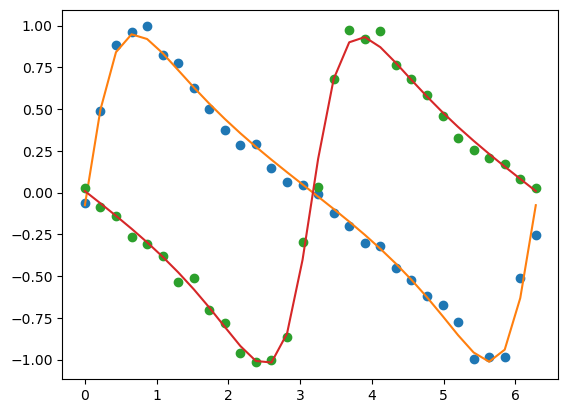

In [123]:
initial = 3 * e4 + e1
normalized = initial / np.linalg.norm(initial)
threeToOneFixedTimes = run_cont_two_state(5, 5, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist(), backend=backendQASM, fixedTimes=times)
threeToOneFixedTimesProcessed = process_energy_controlled_two_state(threeToOneFixedTimes[0], 5, 30, 5)
threeToOneFixedTimesFitResults = simultaneous_controlled_two_state_fit(threeToOneFixedTimesProcessed, 2*np.pi, 30, printResults=True)

two state job ck35i4dp5gfcppj2qdkg
0.37984234892325314
[[Variables]]
    amplitude_1:  0.96386952 +/- 0.02813758 (2.92%) (init = 1)
    overlap_1:    0.02215584 +/- 0.00202848 (9.16%) (init = 0.5)
    frequency_1:  1 (fixed)
    maa_1:        2.7837e-05 +/- 0.00124483 (4471.78%) (init = 0)
    mbb_1:       -0.00459194 +/- 0.00108420 (23.61%) (init = 0)
    amplitude_2:  0.96386952 +/- 0.02813758 (2.92%) == 'amplitude_1'
    overlap_2:    0.02215584 +/- 0.00202848 (9.16%) == 'overlap_1'
    frequency_2:  1 (fixed)
    maa_2:        2.7837e-05 +/- 0.00124483 (4471.78%) == 'maa_1'
    mbb_2:       -0.00459194 +/- 0.00108420 (23.61%) == 'mbb_1'
    shift_2:      3.141593 (fixed)
    shift_1:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude_1, overlap_1) = -0.5921
    C(overlap_1, mbb_1)       = -0.3227
    C(amplitude_1, mbb_1)     = +0.1911


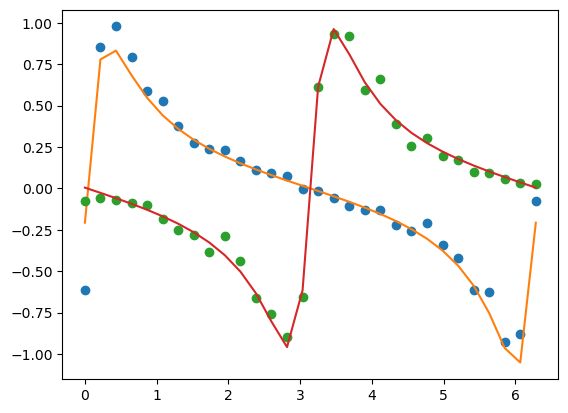

In [128]:
initial = 7 * e4 + e1
normalized = initial / np.linalg.norm(initial)
sevenToOneFixedTimes = run_cont_two_state(5, 5, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist(), backend=backendQASM, fixedTimes=times)
sevenToOneFixedTimesProcessed = process_energy_controlled_two_state(sevenToOneFixedTimes[0], 5, 30, 5)
sevenToOneFixedTimesFitResults = simultaneous_controlled_two_state_fit(sevenToOneFixedTimesProcessed, 2*np.pi, 30, printResults=True)

two state job ck35jj5p5gfcppj2ultg
0.15307512485128522
[[Variables]]
    amplitude_1:  1.05227721 +/- 0.08464723 (8.04%) (init = 1)
    overlap_1:    0.00362677 +/- 7.5224e-04 (20.74%) (init = 0.5)
    frequency_1:  1 (fixed)
    maa_1:        5.2333e-05 +/- 6.5703e-04 (1255.49%) (init = 0)
    mbb_1:       -0.00123297 +/- 2.7798e-04 (22.55%) (init = 0)
    amplitude_2:  1.05227721 +/- 0.08464723 (8.04%) == 'amplitude_1'
    overlap_2:    0.00362677 +/- 7.5224e-04 (20.74%) == 'overlap_1'
    frequency_2:  1 (fixed)
    maa_2:        5.2333e-05 +/- 6.5703e-04 (1255.49%) == 'maa_1'
    mbb_2:       -0.00123297 +/- 2.7798e-04 (22.55%) == 'mbb_1'
    shift_2:      3.141593 (fixed)
    shift_1:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude_1, overlap_1) = -0.9534
    C(overlap_1, mbb_1)       = -0.8814
    C(amplitude_1, maa_1)     = -0.8658
    C(amplitude_1, mbb_1)     = +0.8407
    C(overlap_1, maa_1)       = +0.8361
    C(maa_1, mbb_1)           =

C:\Users\Max\PycharmProjects\pythonProject\RodeoMethods.py:505: RuntimeWarning: invalid value encountered in scalar divide
  expectations1.append(-2 * stateCountsAncilla1["11"] / ancilla1Total + 2 * stateCountsAncilla1["00"] / ancilla1Total)


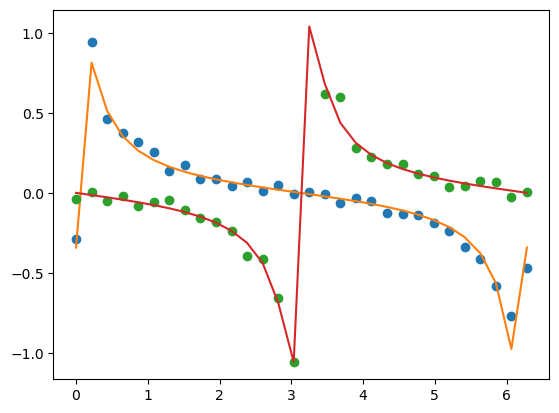

In [130]:
initial = 15 * e4 + e1
normalized = initial / np.linalg.norm(initial)
fifteenToOneFixedTimes = run_cont_two_state(5, 10, 2.5, 1.5, -1, 4, 2*np.pi, 30, initialState=normalized.tolist(), backend=backendQASM, fixedTimes=times)
fifteenToOneFixedTimesProcessed = process_energy_controlled_two_state(fifteenToOneFixedTimes[0], 5, 30, 10)
fifteenToOneFixedTimesFitResults = simultaneous_controlled_two_state_fit(fifteenToOneFixedTimesProcessed, 2*np.pi, 30, printResults=True)

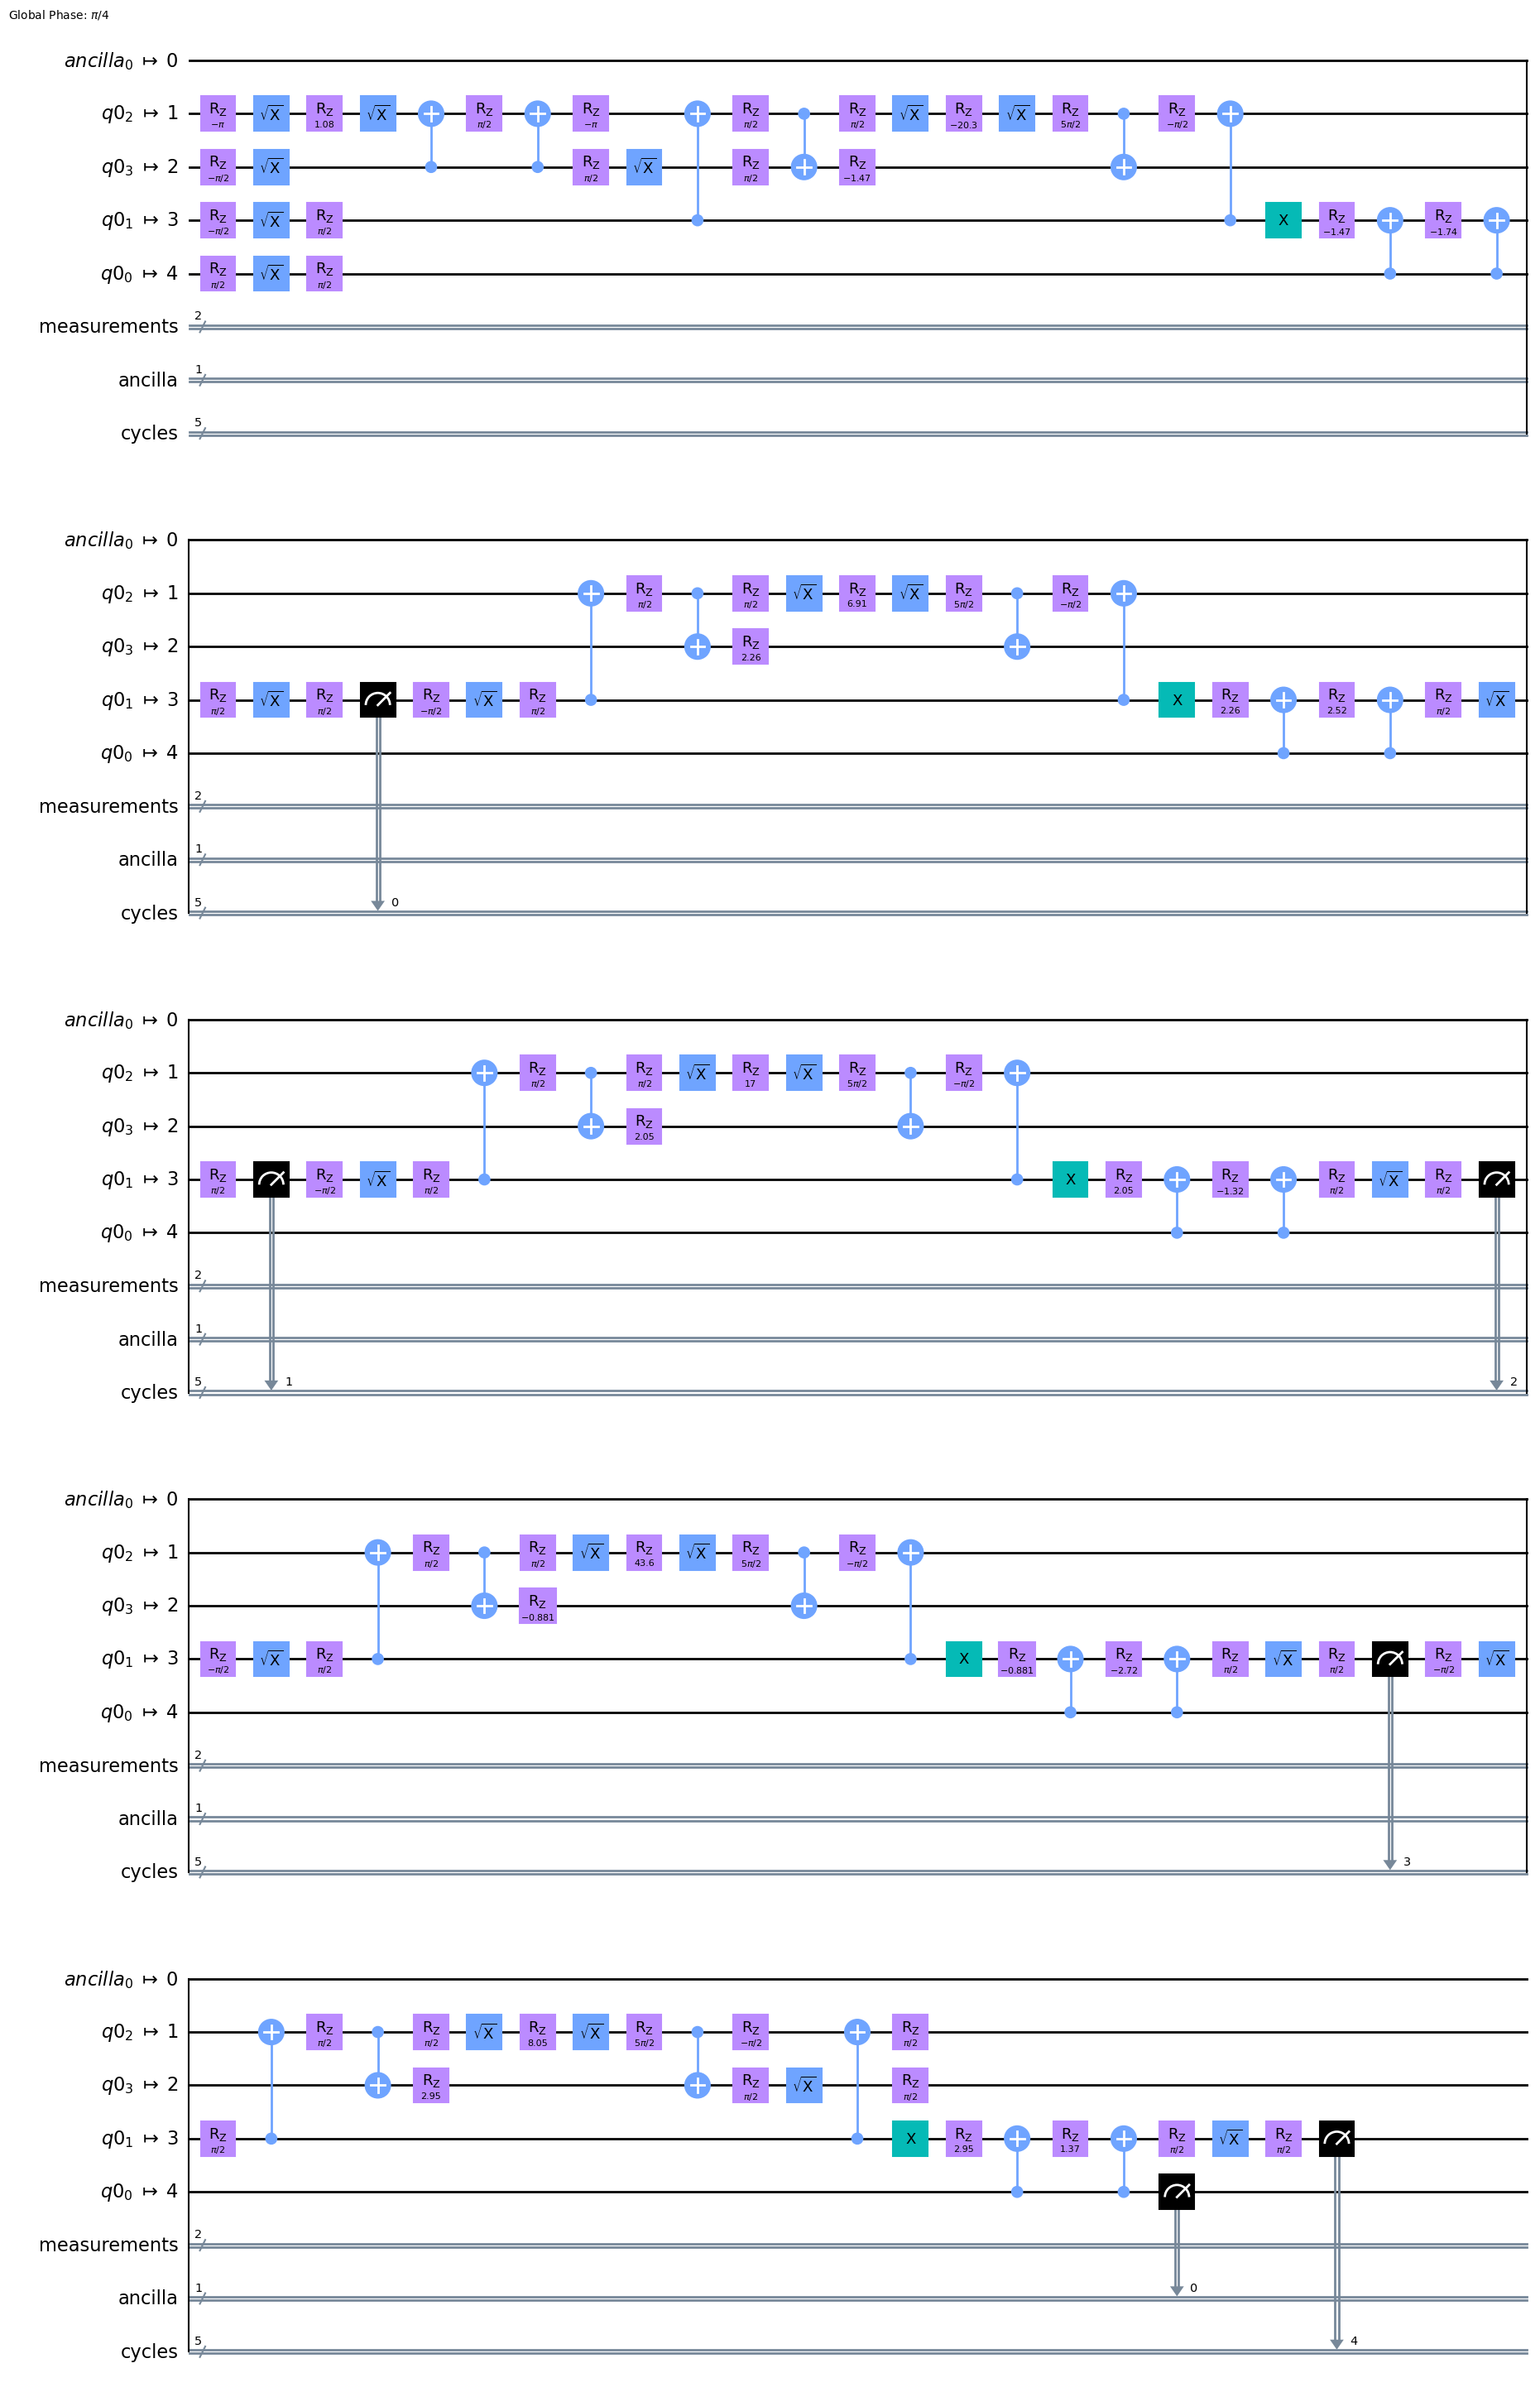

In [4]:
twoToOneE4toEMinus1[1][0].draw('mpl')

0.06762809453436827
[[Variables]]
    amplitude_1:  0.99526465 +/- 0.00645324 (0.65%) (init = 1)
    overlap_1:    0.50411965 +/- 0.00648291 (1.29%) (init = 0.5)
    frequency_1:  1 (fixed)
    maa_1:       -0.00233755 +/- 0.00393082 (168.16%) (init = 0)
    mbb_1:        0.00424452 +/- 0.00376166 (88.62%) (init = 0)
    amplitude_2:  0.99526465 +/- 0.00645324 (0.65%) == 'amplitude_1'
    overlap_2:    0.50411965 +/- 0.00648291 (1.29%) == 'overlap_1'
    frequency_2:  1 (fixed)
    maa_2:       -0.00233755 +/- 0.00393082 (168.16%) == 'maa_1'
    mbb_2:        0.00424452 +/- 0.00376166 (88.62%) == 'mbb_1'
    shift_2:      3.141593 (fixed)
    shift_1:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1) = -0.3190


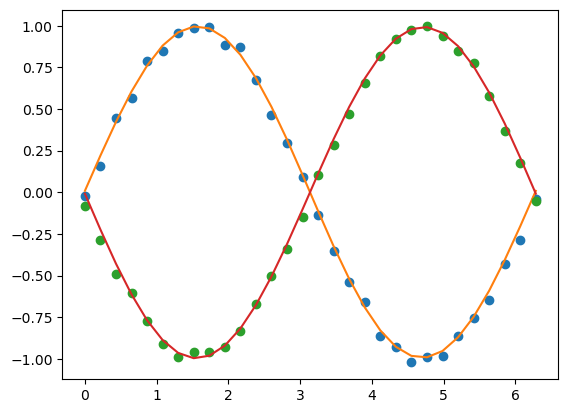

In [116]:
def y_expectation(x, maa, mbb, amplitude, frequency, shift, overlap):
    return (maa + mbb + (mbb - maa) * np.cos(x * frequency) + 2 * np.sqrt(overlap * (1 - overlap)) * amplitude * np.sin(x * frequency)) / (np.cos(shift) - np.cos(x * frequency) + 2 * overlap * np.cos(x * frequency))
    # return -2 * np.sqrt(overlap * (1 - overlap)) * amplitude * np.sin(x * frequency) / (np.cos(shift) - np.cos(x * frequency) + 2 * overlap * np.cos(x * frequency))


def sine_dataset(parameters, i, x):
    """Calculate expectation function lineshape from parameters for data set."""
    amplitude = parameters[f'amplitude_{i + 1}']
    overlap = parameters[f'overlap_{i + 1}']
    frequency = parameters[f'frequency_{i + 1}']
    shift = parameters[f'shift_{i + 1}']
    maa = parameters[f'maa_{i + 1}']
    mbb = parameters[f'mbb_{i + 1}']
    return y_expectation(x, maa, mbb, amplitude, frequency, shift, overlap)


def objective(parameters, x, data):
    """Calculate total residual for fits of the expectation functions to several data sets."""
    ndata, _ = data.shape
    residual = 0.0*data[:]

    # make residual per data set
    for i in range(ndata):
        residual[i, :] = data[i, :] - sine_dataset(parameters, i, x)

    # now flatten this to a 1D array, as minimize() needs
    return residual.flatten()


def simultaneous_controlled_two_state_fit(processedResults, maxAngle, numMeasures, isY=True, printResults=False):
    angles = np.linspace(0, maxAngle, numMeasures)
    data = np.array(processedResults)

    fit_parameters = Parameters()

    for index, y in enumerate(data):
        fit_parameters.add(f'amplitude_{index + 1}', value=1)
        fit_parameters.add(f'overlap_{index + 1}', value=0.5, min=0.001, max=1)
        fit_parameters.add(f'frequency_{index + 1}', value=1, vary=False)
        fit_parameters.add(f'maa_{index + 1}', value=0)
        fit_parameters.add(f'mbb_{index + 1}', value=0)

    fit_parameters[f'maa_{2}'].expr = 'maa_1'
    fit_parameters[f'mbb_{2}'].expr = 'mbb_1'

    fit_parameters[f'amplitude_{2}'].expr = 'amplitude_1'
    fit_parameters[f'overlap_{2}'].expr = 'overlap_1'

    fit_parameters.add(f'shift_{2}', value=np.pi, vary=False)
    fit_parameters.add(f'shift_{1}', value=0, vary=False)

    result = minimize(objective, fit_parameters, args=(angles, data), nan_policy='omit')

    print(result.chisqr)

    # grab the result and display it

    if printResults:
        report_fit(result.params)

        for i in range(2):
            y_fit = sine_dataset(result.params, i, angles)
            plt.plot(angles, data[i, :], 'o', angles, y_fit, '-')

        plt.show()

    # return [[results[0].params, results[0].best_fit, results[0].best_values], [results[1].params, results[1].best_fit, results[1].best_values]]
    return result

twoToOneE4toEMinus1FitResults = simultaneous_controlled_two_state_fit(twoToOneE4toEMinus1Processed, 2*np.pi, 30, printResults=True)

C:\Users\Max\AppData\Local\Temp\ipykernel_5004\3967192148.py:3: UserWarning: name is not a recognized runtime option and may be ignored by the backend.
  quantumTestOneToOne = run_cont_two_state(3, 5, 2.5, 1.5, -1, 4, 2*np.pi, 30, backend=backendNairobi, fixedTimes=times)


two state job cn53g91p1am0008qcyb0
11.510747289702568
[[Variables]]
    amplitude_1: -0.04544416 +/- 0.10223295 (224.96%) (init = 1)
    overlap_1:    0.92798032 +/- 0.07614123 (8.21%) (init = 0.5)
    frequency_1:  1 (fixed)
    maa_1:        0.04627946 +/- 0.04136745 (89.39%) (init = 0)
    mbb_1:       -0.04404835 +/- 0.04092092 (92.90%) (init = 0)
    amplitude_2: -0.04544416 +/- 0.10223295 (224.96%) == 'amplitude_1'
    overlap_2:    0.92798032 +/- 0.07614123 (8.21%) == 'overlap_1'
    frequency_2:  1 (fixed)
    maa_2:        0.04627946 +/- 0.04136745 (89.39%) == 'maa_1'
    mbb_2:       -0.04404835 +/- 0.04092092 (92.90%) == 'mbb_1'
    shift_2:      3.141593 (fixed)
    shift_1:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(overlap_1, mbb_1) = +0.9333
    C(overlap_1, maa_1) = -0.9175
    C(maa_1, mbb_1)     = -0.8687


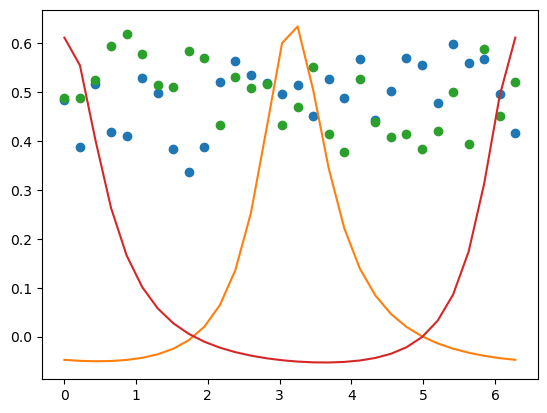

In [15]:
times = [0.908244, -0.579167, -0.265384, -1.16232, 1.44674]
times = times[2:]
quantumTestOneToOne = run_cont_two_state(3, 5, 2.5, 1.5, -1, 4, 2*np.pi, 30, backend=backendNairobi, fixedTimes=times)
quantumTestOneToOneProcessed = process_energy_controlled_two_state(quantumTestOneToOne[0], 3, 30, 5)
quantumTestOneToOneFitResults = simultaneous_controlled_two_state_fit(quantumTestOneToOneProcessed, 2*np.pi, 30, printResults=True)

two state job cl53uo15o5utp99vvt60
20.4638826494986
[[Variables]]
    amplitude_1: -1.54660931 +/- 0.11350658 (7.34%) (init = 1)
    overlap_1:    0.60458661 +/- 0.06933608 (11.47%) (init = 0.5)
    frequency_1:  1 (fixed)
    maa_1:        0.04989261 +/- 0.06552291 (131.33%) (init = 0)
    mbb_1:       -0.04923498 +/- 0.06256710 (127.08%) (init = 0)
    amplitude_2: -1.54660931 +/- 0.11350658 (7.34%) == 'amplitude_1'
    overlap_2:    0.60458661 +/- 0.06933608 (11.47%) == 'overlap_1'
    frequency_2:  1 (fixed)
    maa_2:        0.04989261 +/- 0.06552291 (131.33%) == 'maa_1'
    mbb_2:       -0.04923498 +/- 0.06256710 (127.08%) == 'mbb_1'
    shift_2:      3.141593 (fixed)
    shift_1:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(maa_1, mbb_1)           = -0.3063
    C(amplitude_1, overlap_1) = -0.1044


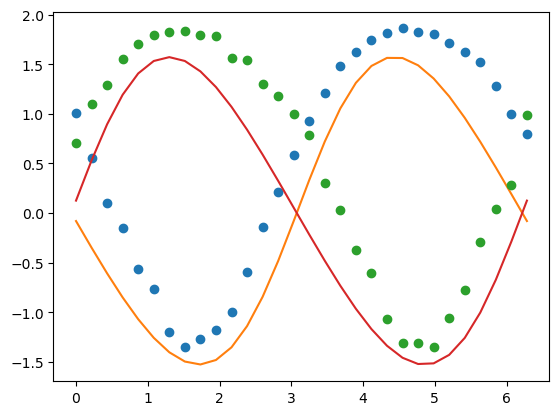

In [18]:
times = [0.908244, -0.579167, -0.265384, -1.16232, 1.44674]
times = times[2:]
quantumTestOneToOne = run_cont_two_state(3, 5, 2.5, 1.5, -1, 4, 2*np.pi, 30, backend=backendQASM, fixedTimes=times)
quantumTestOneToOneProcessed = process_energy_controlled_two_state(quantumTestOneToOne[0], 3, 30, 5)
quantumTestOneToOneFitResults = simultaneous_controlled_two_state_fit(quantumTestOneToOneProcessed, 2*np.pi, 30, printResults=True)